# CO<sub>2</sub>R Technoeconomics Figures and Analysis
Date updated: 2024/06/30 \
Update notes: Reordered and updated optimization \
Contact: Shashwati da Cunha, [shashwati.dacunha@austin.utexas.edu](mailto:shashwati.dacunha@austin.utexas.edu)

### What is this notebook?
This Jupyter notebook is only an integrator - no actual modeling is built in here. It is written to interactively generate plots seen in our paper.

### Instructions
0. Download and locate the entire folder associated with this notebook, including the `Supplementary Workbook.xlsx` Excel template for constants and parameters (data). Please use the associated template and units, since this notebook will directly import the variable names in there as values, and look for those header and product names for model data.
1. Update the Excel sheet with constants, assumptions about efficiencies, and assumptions about costs. To make any changes in how this code calculates process costs (e.g. changing Tafel slopes, changing the cost of deionized water) please change data in the Excel file only. Note that changes in the process itself will require a change in the associated downstream model (see *How does it work?* below).
2. Run this code! Look at the `Run` menu > `Run all`. Enter simulation details when prompted. Please walk through the outputs cell by cell, since not everything is prompted through a user input. In particular, to change electricity prices, there is no user input.

### How does it work?
Constants, assumptions and empirical data are imported from `Supplementary Workbook.xlsx`, mostly directly into global variables. An evaluation of the technoeconomic assessment and emissions is carried out in other `.ipynb` notebook files that contain the model and are imported here. In particular, the file titled `"<version>_SingleRun.ipynb"` contains a function called `singlerun()`, which takes all inputs about the model as arguments, and generates a comprehensive TEA. This function returns information on cost breakdown, emissions, energy requirements etc in dataframes. `singlerun()` calls several other functions, which are split across `"<version>_ElectrolyzerModel.ipynb"` (electrolyzer model - voltage, currents and streams), `"<version>_DownstreamProcessModel.ipynb"` (process stream table and separations requirements), and `"<version>_ProcessEconomics.ipynb"` (all process costing.)

There is no actual modeling in this file. In any file, you can import the product data from `Supplementary Workbook.xlsx`, and `%run` `"<version>_ElectrolyzerModel.ipynb"`, `"<version>_DownstreamProcessModel.ipynb"`, `"<version>_ProcessEconomics.ipynb"`, and `<version>_SingleRun.ipynb` (or `import *` from them as packages). Then just call the `singlerun()` function with all its inputs to run the model.

### Requirements
File naming conventions are written for Windows; other operating systems may require adjustments to file names throughout.

This code was written in Python 3 and tested in Jupyter 7. It uses the following packages:
- `python 3.11.7`
- `numpy 1.26.4`
- `pandas 2.1.4`
- `scipy 1.11.4`
- `matplotlib 3.8.4`
- `openpyxl 3.0.10`
- Jupyter 7 (`notebook 7.0.8`, which includes `ipywidgets 7.6.5`, `ipython 8.20.0`, `jupyter_core 5.5.0` etc)


# 0. Imports and setup

## 0.1. Imports and styling

In [527]:
### Import packages
import pandas as pd
import numpy as np

import matplotlib as mp
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.colors import LinearSegmentedColormap

# import csv

from datetime import datetime
# import timeit

from functools import reduce

from os.path import exists
import os

import openpyxl
from openpyxl.worksheet.dimensions import ColumnDimension, DimensionHolder
import openpyxl.utils.cell
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

from scipy import optimize

from IPython.display import display, HTML, clear_output

### 0.1.1 Import functions from other notebooks

In [528]:
%run "20250115_0_NonAq_ElectrolyzerModel.ipynb"
%run "20250115_1_NonAq_DownstreamProcessModel.ipynb"
%run "20250115_2_NonAq_ProcessEconomics.ipynb"
%run "20250115_3_NonAq_TEA_SingleRun.ipynb"

## 0.2. Matplotlib formatting

In [529]:
# All options at https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# mp.style.use('bmh')

In [530]:
# Plot formatting for Matplotlib - rcParams. All options at https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams

# All fonts and font sizes
SMALL_SIZE = 20 # set smallest font size
MEDIUM_SIZE = 24 # set medium font size
BIGGER_SIZE = 27 # set
mp.rc('font', family = 'Arial') # font group is sans-serif
mp.rc('font', size=MEDIUM_SIZE)     # controls default text sizes if unspecified
mp.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title; I think this is for subplots 
mp.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
mp.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
mp.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
mp.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
mp.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# text padding
mp.rc('axes', labelpad= 18) # padding between axis label and axis
mp.rc('axes', titlepad= 22) # padding between axis title and labels; might be for subplots
mp.rc('legend', handletextpad = 0.3) # padding between each legend entry's icon and text
mp.rc('legend', borderaxespad = 1) # padding between legend border and axes
TICK_PADDING = 8
mp.rcParams['xtick.major.pad'] = TICK_PADDING
mp.rcParams['xtick.minor.pad'] = TICK_PADDING
mp.rcParams['ytick.major.pad'] = TICK_PADDING
mp.rcParams['ytick.minor.pad'] = TICK_PADDING
mp.rcParams['axes.xmargin'] = 1
mp.rcParams['axes.ymargin'] = 1

# figure settings
aspect_ratio = 1/1 # 3/4
mp.rc('figure', figsize = (5, 5*aspect_ratio)) # figure size
mp.rc('figure', dpi = 250) # figure dpi/ pix per inch
mp.rcParams['axes.spines.right'] = True # right border
mp.rcParams['axes.spines.top'] = True # top border

# legend
mp.rc('legend', loc = 'upper left') # legend location 
mp.rc('legend', frameon = False) # legend border - yes or no?
mp.rc('legend', markerscale = 1) # scale up markers in legend

# axes
mp.rc('axes', linewidth = 2) # linewidth of axes

# default axes
mp.rc('axes', autolimit_mode = 'round_numbers') # set default axis limits to be "round" numbers rather than data

# major x-ticks
mp.rcParams['xtick.top'] = False  # top or bottom of plot
mp.rcParams['xtick.direction'] = 'out' # ticks in or out of plot
mp.rcParams['xtick.major.width'] = 2 # linewidth of ticks
mp.rcParams['xtick.major.size'] = 12 # length of ticks

# minor x-ticks
mp.rcParams['xtick.minor.visible'] = True
mp.rcParams['xtick.minor.width'] = 2  # linewidth of ticks
mp.rcParams['xtick.minor.size'] = 6   # length of ticks

# major y-ticks
mp.rcParams['ytick.right'] = False  # right or left of plot
mp.rcParams['ytick.direction'] = 'out' # ticks in or out of plot
mp.rcParams['ytick.major.width'] = 2   # linewidth of ticks
mp.rcParams['ytick.major.size'] = 12  # length of ticks

# minor y-ticks
mp.rcParams['ytick.minor.visible'] = True
mp.rcParams['ytick.minor.right'] = False # right or left of plot
mp.rcParams['ytick.minor.width'] = 2 # linewidth of ticks
mp.rcParams['ytick.minor.size'] = 6  # length of ticks

# format for saving figures
mp.rcParams['savefig.format'] = 'tiff'
mp.rcParams['savefig.bbox'] = 'tight' # 'tight' # or standard; tight may break ffmpeg
# If using standard, be sure to use bbox_inches="tight" argument in savefig

# defaults for scatterplots
mp.rcParams['scatter.marker'] = 'o' # round markers unless otherwise specified
mp.rcParams['lines.markersize'] = 6 # sets the scatter/line marker size; roughly equivalent to s = 40 in my experience

# defaults for lines
mp.rcParams['lines.linestyle'] = '-' # solid lines unless otherwise specified
mp.rcParams['lines.linewidth'] = 2 # default linewidth

# defaults for errorbars
mp.rcParams['errorbar.capsize'] = 4

### Fix random state for reproducibility
rng = np.random.default_rng(seed=19680801)

### Some options for ticks:
# np.arange(min, max, step): returns a list of step-spaced entries between min and max EXCLUDING max
# np.linspace(min, max, n): returns a list of n linearly spaced entries between min and max, including max
# np.logspace(min, max, n, base=10.0): returns a list of n log-spaced entries between min and max
# axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(n)): sets axis ticks to be multiples of 
                                                             #n within the data range


## 0.3 Input file locations

In [531]:
# Prompt user to enter file path
# file_imports = r"{}".format(input('Enter filepath for costs of utilities and raw materials \
#                   \n \n').replace('"', '')

file_imports = r"Supplementary Workbook 1 - TEA inputs.xlsx"

In [532]:
# sheet_cost_imports = input('Enter sheet name for costs of utilities \
#                   \n \n')
# Prompt user to enter sheet name for utility costs

sheet_utility_imports = 'Utilities'

In [533]:
# sheet_constants = input('Enter sheet name for constants \
#                   \n \n').replace('"', '') 
# Prompt user to enter sheet name for constants

sheet_constants =  'Constants and assumptions'

In [534]:
# sheet_products = input('Enter sheet name for products \
#                   \n \n').replace('"', '') 
# Prompt user to enter sheet name for product data

sheet_products =  'Products'

In [535]:
# sheet_solvents = input('Enter sheet name for solvents \
#                   \n \n').replace('"', '') 
# Prompt user to enter sheet name for product data

sheet_solvents =  'Solvents'

In [536]:
# sheet_supporting = input('Enter sheet name for supporting electrolytes \
#                   \n \n').replace('"', '') 
# Prompt user to enter sheet name for product data

sheet_supporting =  'Supporting electrolytes'

## 0.4 Output file locations

In [537]:
root_folder = r'E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R'

In [538]:
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format string
current_time = time_now.strftime("%I-%M%p") # format string

# Output folder - must be written as r"path/folder"; the r at the front indicates a raw string literal
# root_folder = file_imports[::-1].split('\\', 1)[1][::-1] # Take the imports filepath, reverse it and split on the last \ character, and re-reverse it 
OP_folder = root_folder + '\LCA TEA non-aq results on ' + current_date
if not os.path.exists(OP_folder): # check if OP_folder path exists
    os.mkdir(OP_folder) # if path doesn't exist, create the folder
    
# Manually set OP_folder if desired:
# OP_folder = # r"D:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R"

## 0.5 Import Excel data

### 0.5.1 Import constants and product data

In [539]:
df_constants = pd.DataFrame # Create dataframe for constants
xlsx = pd.ExcelFile(file_imports) # Read each data Excel file
df_constants = xlsx.parse(sheet_name = sheet_constants) # Read the sheet with the constants
df_constants.set_index('Variable name', drop = True, inplace = True) # Reset index to variable name
xlsx.close() # close xlsx file

## Update constants as variables 
## NOTE: Modifying globals() is a very frowned on practice in Python - be VERY careful implementing this, it's easy to say 
# overwrite variables that are carelessly named. Consider indexing directly from df_constants (set its index to 'variable name')
# and df_utilities instead

for index, row in df_constants.iterrows(): # for each row in df_constants
    globals()[index] = row['Value'] # save its 'value' to a new variable called the 'variable name' column
    
df_constants

Name  \
Variable name                                                                  
anolyte_conc_M                 Concentration: anolyte supporting electrolyte   
catholyte_conc_M             Concentration: catholyte supporting electrolyte   
CO2_cost_USD_tCO2                                                  Cost: CO2   
water_cost_USD_kg                                             Cost: DI water   
electrolyzer_capex_USD_m2                                 Cost: Electrolyzer   
LL_capex_USD_1000mol_hr                                            Cost: L/L   
PSA_capex_USD_1000m3_hr                                            Cost: PSA   
crossover_neutral                             Crossover: neutral electrolyte   
water_density_kg_m3                               Density: aqueous solutions   
carbon_capture_efficiency                         Efficiency: carbon capture   
LL_second_law_efficiency                Efficiency: separations (second-law)   
PSA_second_law_efficiency               Efficiency: separations (second-law)   
electrolyte_thickness_cm      Electrolyzer assumption: Electrolyte thickness   
R_membrane_ohmcm2          Electrolyzer assumption: Membrane ohmic resist...   
an_E_eqm                                          Equilibrium potential: OER   
F                                                         Faraday's constant   
R                                                               Gas constant   
MW_CO2                                                       Molar mass: CO2   
MW_K2CO3                                                   Molar mass: K2CO3   
MW_O2                                                         Molar mass: O2   
MW_H2O                                                     Molar mass: water   
P                                                                   Pressure   
capacity_factor                          Process assumption: capacity factor   
battery_capacity                Process assumption: default battery capacity   
lifetime_years                            Process assumption: plant lifetime   
product_rate_kg_day                     Process assumption: production basis   
stack_lifetime_years                      Process assumption: stack lifetime   
cathode_outlet_humidity    Ratio: Mole fraction of water in cathode outle...   
excess_solvent_ratio                     Ratio: Solvent feed vs product rate   
excess_water_ratio                         Ratio: Water feed vs product rate   
an_j_ref                                      Reference current density: OER   
an_eta_ref                                      Reference overpotential: OER   
an_Tafel_slope                                            Tafel slope: anode   
T_sep                                               Temperature: separations   
T_streams                                               Temperature: streams   
K_to_C                                              Unit conversion: K to °C   
kJ_per_kWh                                        Unit conversion: kWh to kJ   
kJ_per_mmBtu                                    Unit conversion: mmBtu to kJ   
kWh_per_mmBtu                                  Unit conversion: mmBtu to kWh   

                                  Value                             Unit  \
Variable name                                                              
anolyte_conc_M             1.000000e+00                                M   
catholyte_conc_M           3.000000e-01                                M   
CO2_cost_USD_tCO2          7.500000e+01                          $/t CO2   
water_cost_USD_kg          1.450000e-02                             $/kg   
electrolyzer_capex_USD_m2  5.173975e+03                             $/m2   
LL_capex_USD_1000mol_hr    5.736850e+04                  $/(1000 mol/hr)   
PSA_capex_USD_1000m3_hr    3.469649e+06                   $/(1000 m3/hr)   
crossover_neutral          0.000000e+00                   mol CO2/mol e-   
water_density_kg_m3        1.00

In [540]:
df_products = pd.DataFrame # Create dataframe for product data
xlsx = pd.ExcelFile(file_imports) # Read each data Excel file
df_products = xlsx.parse(sheet_name = sheet_products) # Read the sheet with the product data
df_products.set_index('Product', drop = True, inplace = True) # reset index to product name
xlsx.close() # close xlsx file
    
df_products

Phase Molecular weight (g/mol)  \
Product                                        
H2              gas                 2.015894   
CO              gas                  28.0101   
Oxalic acid  liquid                    90.03   
References        -                        -   

                         n (mol e-/ mol product) z (mol CO2/ mol product)  \
Product                                                                     
H2                                             2                        0   
CO                                             2                        1   
Oxalic acid                                    2                        2   
References   Nitopi, Jaramillo (Chem. Rev. 2019)                        -   

            LHV (kJ/kg product)               Cost ($/kg product)  \
Product                                                             
H2                       120087                                 2   
CO                        10160                          0.845026   
Oxalic acid         2815.728091                               0.7   
References         See comments  See References 2a and 2b columns   

            Standard potential, pH = 0 (V vs SHE) Reference overpotential (V)  \
Product                                                                         
H2                                              0                         NaN   
CO                                          -0.06                      -1.643   
Oxalic acid                                 -0.51                      -1.793   
References           Bui, Weber (Chem. Rev. 2022)                See comments   

            Tafel slope (mV/dec) Reference current density (mA/cm2)  \
Product                                                               
H2                           NaN                                NaN   
CO                          -184                                0.1   
Oxalic acid                 -100                                5.2   
References          See comments                       See comments   

                                      FECO2R at SPC = 0  \
Product                                                   
H2                                                  NaN   
CO                                                 0.89   
Oxalic acid                                         0.7   
References   Literature data (Supplementary Workbook 2)   

             Chosen SPC, no tradeoff  Chosen total current density (mA/cm2)  \
Product                                                                       
H2                               NaN                                    NaN   
CO                             0.667                                  200.0   
Oxalic acid                    0.667                                  200.0   
References                       NaN                                    NaN   

                                                    References  \
Product                                                          
H2                                                         NaN   
CO                                Shin, Jiao (Nat. Sust. 2021)   
Oxalic acid  Gennaro, Saveant (J. Chem. Soc. Faraday Trans....   
References                                                 NaN   

                                                 References 2a  \
Product                                                          
H2                                                         NaN   
CO           George (Kirk-Othmer Encyclopedia 2001) adjuste...   
Oxalic acid  Official Journal of the European Union (2018/931)   
References                                                 NaN   

                                       References 2b  
Product                                               
H2                                               NaN  
CO                                               NaN  
Oxalic acid  Business Analytiq, 2024 (accessed 2025)  
References                        

In [541]:
df_solvents = pd.DataFrame # Create dataframe for product data
xlsx = pd.ExcelFile(file_imports) # Read each data Excel file
df_solvents = xlsx.parse(sheet_name = sheet_solvents) # Read the sheet with the product data
df_solvents.set_index('Solvent', drop = True, inplace = True) # reset index to product name
xlsx.close() # close xlsx file
    
df_solvents

Molecular weight (g/mol)  \
Solvent                                                        
Acetonitrile                                          41.052   
Propylene carbonate                                  102.089   
DMSO                                                  78.133   
DMF                                                   73.094   
References           CRC Handbook of Chem and Phys 105th Ed.   

                    Cost ($/kg solvent)  \
Solvent                                   
Acetonitrile                        2.7   
Propylene carbonate               0.907   
DMSO                               2.66   
DMF                                   1   
References                 See comments   

                                             Density (kg/m3) Viscosity (cP)  \
Solvent                                                                       
Acetonitrile                                           782.5          0.369   
Propylene carbonate                                   1204.7           2.53   
DMSO                                                    1101          1.987   
DMF                                                    944.5          0.794   
References           CRC Handbook of Chem and Phys 105th Ed.   See comments   

                    Henry's constant at 298K, CO2 (mole fraction/atm)  \
Solvent                                                                 
Acetonitrile                                                 0.016474   
Propylene carbonate                                           0.01218   
DMSO                                                         0.009843   
DMF                                                          0.015314   
References                                               See comments   

                                   Conductivity factor relative to ACN  \
Solvent                                                                  
Acetonitrile                                                         1   
Propylene carbonate                                           0.256379   
DMSO                                                          0.276417   
DMF                                                           0.460695   
References           From literature and Debye-Huckel-Onsager relat...   

                    CO2 solubility, 10 bar (mol CO2/ mol solvent)  \
Solvent                                                             
Acetonitrile                                             0.194158   
Propylene carbonate                                      0.136634   
DMSO                                                     0.107589   
DMF                                                      0.178045   
References                                            Henry's law   

                                           Boiling point (K)  \
Solvent                                                        
Acetonitrile                                          354.75   
Propylene carbonate                                   514.75   
DMSO                                                  465.05   
DMF                                                   425.95   
References           CRC Handbook of Chem and Phys 105th Ed.   

                                         Vapor pressure (Pa)  \
Solvent                                                        
Acetonitrile                                           11900   
Propylene carbonate                                       50   
DMSO                                                      84   
DMF                                                      439   
References           CRC Handbook of Chem and Phys 105th Ed.   

                     Solvent loss fraction ((mol/s offgas)/ (mol/s solvent))  \
Solvent                                                                        
Acetonitrile                                                   0.00010         
Propylene carbonate                                            0.00001        

In [542]:
df_supporting = pd.DataFrame # Create dataframe for product data
xlsx = pd.ExcelFile(file_imports) # Read each data Excel file
df_supporting = xlsx.parse(sheet_name = sheet_supporting) # Read the sheet with the product data
df_supporting.set_index('Supporting electrolyte', drop = True, inplace = True) # reset index to product name
xlsx.close() # close xlsx file
    
df_supporting

Molecular weight (g/mol)  \
Supporting electrolyte                            
TEACl                                    165.74   
TBAClO$_4$                               341.91   
TEAClO$_4$                               229.74   
TBABF$_4$                                329.27   
References                                    -   

                                                   Cost ($/kg supporting)  \
Supporting electrolyte                                                      
TEACl                                                                  10   
TBAClO$_4$                                                             10   
TEAClO$_4$                                                             10   
TBABF$_4$                                                              10   
References              Chen, Hallett (Green Chem. 2014);\nSeo, Baldea...   

                                        Conductivity in ACN, 0.3 M (S/cm)  
Supporting electrolyte                                                     
TEACl                                                            0.029542  
TBAClO$_4$                                                       0.016753  
TEAClO$_4$                                                       0.020932  
TBABF$_4$                                                        0.021827  
References              From literature and Debye-Huckel-Onsager relat...

### 0.5.2 Import utility cost and LCA database

In [543]:
df_utility_imports = pd.DataFrame # Create dataframe for costs
xlsx = pd.ExcelFile(file_imports) # Read each data Excel file
df_utility_imports = xlsx.parse(sheet_name = sheet_utility_imports) # Read the sheet with the costing
df_utility_imports.set_index('Utility', drop = True, inplace = True) # reset index to utility name
xlsx.close() # close xlsx file
    
df_utility_imports

Cost ($/kWh)  CO2 emissions (g CO2/kWh)  \
Utility                                                                         
NaN                                            NaN                        NaN   
Electricity - solar                       0.024000                  50.000000   
Electricity - onshore wind                0.024000                  20.000000   
Electricity - wind + storage              0.042000                        NaN   
Electricity - current California mix      0.160500                 230.930614   
Electricity - current US mix              0.081500                 414.104338   
Heat - NG                                 0.007569                 254.376000   
Shin, Jiao assumption                     0.030000                        NaN   
NaN                                            NaN                        NaN   
Electric utility chosen                   0.081500                 414.104338   
Heat utility chosen                       0.007569                 254.376000   
NaN                                            NaN                        NaN   
Battery storage                         200.000000                        NaN   

                                                                             References  \
Utility                                                                                   
NaN                                                                                 NaN   
Electricity - solar                                    Lazard (April 2023); NREL (2021)   
Electricity - onshore wind                             Lazard (April 2023); NREL (2021)   
Electricity - wind + storage                          Lazard (April 2023); GREET (2022)   
Electricity - current California mix  U.S. Energy Information Administration (April ...   
Electricity - current US mix          U.S. Energy Information Administration (2024) ...   
Heat - NG                             Henry Hub (via U.S. Energy Information Adminis...   
Shin, Jiao assumption                                      Shin, Jiao (Nat. Sust. 2021)   
NaN                                                                                 NaN   
Electric utility chosen                                                             NaN   
Heat utility chosen                                                                 NaN   
NaN                                                                                 NaN   
Battery storage                                                               NREL 2021   

                                                                             Unnamed: 4  \
Utility                                                                                   
NaN                                                                                 NaN   
Electricity - solar                   https://www.nrel.gov/analysis/life-cycle-asses...   
Electricity - onshore wind                                                          NaN   
Electricity - wind + storage                                                        NaN   
Electricity - current California mix                                                NaN   
Electricity - current US mix                                                        NaN   
Heat - NG                                                                           NaN   
Shin, Jiao assumption                                                               NaN   
NaN                                                                                 NaN   
Electric utility chosen                                                             NaN   
Heat utility chosen                                                                 NaN   
NaN                                                                                 NaN   
Battery storage                                                                     NaN   

                                                       Unnamed: 5  
Utility               

## 0.6 Manually adjust inputs

### 0.6.1 Check results

In [544]:
# Extract constants to use for costing and emissions calculations
electricity_cost_USD_kWh = df_utility_imports.loc['Electric utility chosen', 'Cost ($/kWh)'] 
heat_cost_USD_kWh = df_utility_imports.loc['Heat utility chosen', 'Cost ($/kWh)']

electricity_emissions_kgCO2_kWh = 0.001 * df_utility_imports.loc['Electric utility chosen', 'CO2 emissions (g CO2/kWh)'] # convert g CO2 to kg CO2
heat_emissions_kgCO2_kWh = 0.001 * df_utility_imports.loc['Heat utility chosen', 'CO2 emissions (g CO2/kWh)'] # convert g CO2 to kg CO2

battery_capex_USD_kWh = df_utility_imports.loc['Battery storage', 'Cost ($/kWh)']

In [545]:
# Have user verify electricity costs and say if they want to modify
print('Costs of utilities: \n    \
        Electricity ${:.3f}/kWh \n   \
         Heat ${:.3f}/kWh '.format(electricity_cost_USD_kWh, heat_cost_USD_kWh))
print('Carbon intensity of utilities: \n    \
        Electricity {:.3f} kg CO2/kWh \n   \
         Heat {:.3f} kg CO2/kWh '.format(electricity_emissions_kgCO2_kWh, heat_emissions_kgCO2_kWh))
display(df_utility_imports)

answer = input('Do you want to manually modify any of these? y/n \n \n')

if answer.lower() == 'y':
    clear_output()
    print('Uncomment the next code block as you need!')
else:
    print('Using chosen utility prices and carbon intensity')

Costs of utilities: 
            Electricity $0.082/kWh 
            Heat $0.008/kWh 
Carbon intensity of utilities: 
            Electricity 0.414 kg CO2/kWh 
            Heat 0.254 kg CO2/kWh 


Cost ($/kWh)  CO2 emissions (g CO2/kWh)  \
Utility                                                                         
NaN                                            NaN                        NaN   
Electricity - solar                       0.024000                  50.000000   
Electricity - onshore wind                0.024000                  20.000000   
Electricity - wind + storage              0.042000                        NaN   
Electricity - current California mix      0.160500                 230.930614   
Electricity - current US mix              0.081500                 414.104338   
Heat - NG                                 0.007569                 254.376000   
Shin, Jiao assumption                     0.030000                        NaN   
NaN                                            NaN                        NaN   
Electric utility chosen                   0.081500                 414.104338   
Heat utility chosen                       0.007569                 254.376000   
NaN                                            NaN                        NaN   
Battery storage                         200.000000                        NaN   

                                                                             References  \
Utility                                                                                   
NaN                                                                                 NaN   
Electricity - solar                                    Lazard (April 2023); NREL (2021)   
Electricity - onshore wind                             Lazard (April 2023); NREL (2021)   
Electricity - wind + storage                          Lazard (April 2023); GREET (2022)   
Electricity - current California mix  U.S. Energy Information Administration (April ...   
Electricity - current US mix          U.S. Energy Information Administration (2024) ...   
Heat - NG                             Henry Hub (via U.S. Energy Information Adminis...   
Shin, Jiao assumption                                      Shin, Jiao (Nat. Sust. 2021)   
NaN                                                                                 NaN   
Electric utility chosen                                                             NaN   
Heat utility chosen                                                                 NaN   
NaN                                                                                 NaN   
Battery storage                                                               NREL 2021   

                                                                             Unnamed: 4  \
Utility                                                                                   
NaN                                                                                 NaN   
Electricity - solar                   https://www.nrel.gov/analysis/life-cycle-asses...   
Electricity - onshore wind                                                          NaN   
Electricity - wind + storage                                                        NaN   
Electricity - current California mix                                                NaN   
Electricity - current US mix                                                        NaN   
Heat - NG                                                                           NaN   
Shin, Jiao assumption                                                               NaN   
NaN                                                                                 NaN   
Electric utility chosen                                                             NaN   
Heat utility chosen                                                                 NaN   
NaN                                                                                 NaN   
Battery storage                                                                     NaN   

                                                       Unnamed: 5  
Utility               

Using chosen utility prices and carbon intensity


In [546]:
# Adjust utility costs if desired

if answer.lower() == 'y':
    print('Manually entering inputs')
#     Uncomment lines below as needed

    # electricity_cost_USD_kWh = df_utility_imports.loc['Electricity - wind + storage', 'Cost ($/kWh)'] 
#     electricity_cost_USD_kWh = df_utility_imports.loc['Electricity - onshore wind', 'Cost ($/kWh)'] 
    electricity_cost_USD_kWh = df_utility_imports.loc['Electricity - solar', 'Cost ($/kWh)'] # 0.02 # $/kWh

    # electricity_emissions_kgCO2_kWh = 0.001 *df_utility_imports.loc['Electricity - wind + storage','CO2 emissions (g CO2/kWh)']  # df_utility_imports.loc['Electricity - current California mix','CO2 emissions (g CO2/kWh)']
#     electricity_emissions_kgCO2_kWh = 0.001 *df_utility_imports.loc['Electricity - onshore wind','CO2 emissions (g CO2/kWh)']  # df_utility_imports.loc['Electricity - current California mix','CO2 emissions (g CO2/kWh)']
    electricity_emissions_kgCO2_kWh = 0.001 *df_utility_imports.loc['Electricity - solar','CO2 emissions (g CO2/kWh)']  # df_utility_imports.loc['Electricity - current California mix','CO2 emissions (g CO2/kWh)']

#     heat_emissions_kgCO2_kWh = 0.001 * df_utility_imports.loc['Heat utility chosen', 'CO2 emissions (g CO2/kWh)'] # convert g CO2 to kg CO2

#     heat_cost_USD_kWh =  df_utility_imports.loc['Heat utility chosen', 'Cost ($/kWh)'] 

    print('Costs of utility_imports: \n    \
            Electricity ${:.3f}/kWh \n   \
             Heat ${:.3f}/kWh '.format(electricity_cost_USD_kWh, heat_cost_USD_kWh))
    print('Carbon intensity of utility_imports: \n    \
            Electricity {:.3f} kg CO2/kWh \n   \
             Heat {:.3f} kg CO2/kWh '.format(electricity_emissions_kgCO2_kWh, heat_emissions_kgCO2_kWh))


### 0.6.2 Set defaults for 'override' commands and modeling options

In [547]:
override_one = False
override_onebyone = False
overridde_multivbl = False
override_optimization = False
override_animation = False
override_single = False
override_2files = False
override_MC = False
cell_E_V = np.NaN
BV_eta_cat_V = np.NaN
BV_eta_an_V = np.NaN
model_FE = 'Kas'
is_battery = False

# 1. Output file setup

## 1.1 Excel file formatting

In [548]:
# Function to format sheets once written, otherwise they are hard to read

def book_format(writer):
        book  = writer.book # Get workbook
        for i in writer.sheets:
            sheet = writer.sheets[i] # Get worksheet

            # Note that when reading, openpyxl indexes from 1

            # General column and cell formatting
            for i in range(1, 100): # (1, df_expt.shape[1]+2) # Iterate through columns
                col = openpyxl.utils.cell.get_column_letter(i) # Get column's letter index (openpyxl col indexing starts at 1 = 'A')
                # Column formatting              
                sheet.column_dimensions[col].width = 25         

                # Cell formatting
                for row in range(1,200): # Iterate through rows; this takes a lot of time in large output files 
                    sheet[col + str(row)].alignment= Alignment(horizontal='center',
                                         vertical='center',
                                         text_rotation=0,
                                         wrap_text=True) # Format cell contents

    #         # Row formatting - text wrapping will take care of this so not necessary
    #         for row in range(1,50): # Iterate through rows, add 2 because indexing at 0 + range stops 1 before end; row 1 defined above
    #             sheet.row_dimensions[row].height = 15 # Set row height ## TODO: throws error on indexing

            # Specific formatting

    #         First 2 column widths
            sheet.column_dimensions['A'].width = 10
            sheet.column_dimensions['B'].width = 40

## 1.2 Define color scheme

In [549]:
## Theme colors 
theme_colors = ['#bf5700',  '#ffc919', '#8f275d', '#73a3b3', '#193770', '#e35555', '#191f24' ] #ffffff (white)

## Import colormaps
# summer = mp.colormaps['summer']
# summer_r = mp.colormaps['summer_r']
# PuOr = mp.colormaps['PuOr']
viridis = mp.colormaps['viridis']
# viridis_r = mp.colormaps['viridis_r']
# wistia = mp.colormaps['Wistia']
# greys = mp.colormaps['gist_yarg'] # 'Gray'
RdBu = mp.colormaps['RdBu'] # seismic
RdYlBu = mp.colormaps['RdYlBu']
# inferno = mp.colormaps['inferno_r']
# Blues = mp.colormaps['Blues']
# winter = mp.colormaps['winter_r']
# cool = mp.colormaps['cool_r']

## Custom colormaps
# Endpoint colors
colors = [ '#fff01f', '#00503d']  # gold to sherwood green
bright_summer_r = LinearSegmentedColormap.from_list('custom_cmap', colors) # create colormap

colors = ['#abd5e2', '#190033', '#a60027', theme_colors[1]  ] #  
diverging = LinearSegmentedColormap.from_list('diverging_cmap', colors) # create colormap

# colors = ['#a60027', theme_colors[1], theme_colors[3], '#012469'  ] #  
# RdYlBu = LinearSegmentedColormap.from_list('diverging_cmap', colors)

# colors = ['#a60027', '#ef7a7a', '#fde7cd', theme_colors[3], '#012469'  ] #  
# RdBu = LinearSegmentedColormap.from_list('diverging_cmap', colors)


## 1.3 Choose product and catholyte

In [550]:
# Choose a product
answer = input('Enter product number of choice: \n \
                (1) CO \n \
                (2) oxalic acid \n \
                (3) formic acid \n'
)

if answer != '1' and answer != '2' and answer != '3' and answer != '4' :
    print('Using default product, CO')
    answer = 1
               
product_name = ['CO', 'Oxalic acid', 'Formic acid'][int(answer)-1] # fix indexing from 0 to extract product name from this list

In [551]:
# Choose a solvent
answer = input('Enter solvent number of choice: \n \
                (1) DMF \n \
                (2) DMSO \n \
                (3) Acetonitrile \n \
                (4) Propylene carbonate \n' 
)

if answer != '1' and answer != '2' and answer != '3' and answer != '4' :
    print('Using default solvent, DMF')
    answer = 1
               
solvent_name = ['DMF', 'DMSO', 'Acetonitrile', 'Propylene carbonate',  ][int(answer)-1] # fix indexing from 0 to extract product name from this list

In [552]:
# Choose a supporting electrolyte
answer = input('Enter supporting electrolyte number of choice: \n \
                (1) TEACl \n \
                (2) TBAClO4   \n \
                (3) TEAClO4 \n \
                (4) TBABF4 \n '
                )

if answer != '1' and answer != '2' and answer != '3' and answer != '4' :
    print('Using default supporting electrolyte, TEACl')
    answer = 1
               
supporting_electrolyte_name = ['TEACl', 'TBAClO$_4$', 'TEAClO$_4$', 'TBABF$_4$'][int(answer)-1] # fix indexing from 0 to extract product name from this list

Using default supporting electrolyte, TEACl


### 1.3.1. Extract product- and electrolyte-dependent variables

In [553]:
ACN_CO2_solubility_mol_mol = df_solvents.loc['Acetonitrile', 'CO2 solubility, 10 bar (mol CO2/ mol solvent)']

In [554]:
def reset_constants():
    ### Reset variables to their original or default values by overwriting globals()    
       
    ## Constants
    for index, row in df_constants.iterrows(): # for each row in df_constants
        globals()[index] = row['Value'] # save its 'value' to a new variable called the 'variable name' column
        
    ## Product costs
    globals()['product_cost_USD_kgprod'] = df_products.loc[product_name, 'Cost ($/kg product)']
    globals()['H2_cost_USD_kgH2'] =  df_products.loc['H2', 'Cost ($/kg product)'] # assume H2 is not sold
    globals()['electricity_cost_USD_kWh'] = df_utility_imports.loc['Electric utility chosen', 'Cost ($/kWh)'] 
    globals()['electrolyte_cost_USD_kg'] = df_supporting.loc[supporting_electrolyte_name, 'Cost ($/kg supporting)']
    globals()['solvent_cost_USD_kg'] = df_solvents.loc[solvent_name, 'Cost ($/kg solvent)']

    ## Electrolyzer and product properties
    # Set default inputs for TEA. These can always be modified later
    globals()['cat_Tafel_slope'] = df_products.loc[product_name, 'Tafel slope (mV/dec)']
    globals()['crossover_ratio'] = crossover_neutral
    globals()['FE_product_specified'] =  df_products.loc[product_name, 'FECO2R at SPC = 0']  # 0.9 # 0.90 # %/100 # np.NaN
    globals()['FE_CO2R_0'] = df_products.loc[product_name, 'FECO2R at SPC = 0']
    globals()['j_total_mA_cm2'] = df_products.loc[product_name, 'Chosen total current density (mA/cm2)'] # 300 # mA/cm2
    globals()['SPC'] = df_products.loc[product_name, 'Chosen SPC, no tradeoff']  #0.3 # 0.5 # %/100

    # Save variables that may be adjusted
    globals()['SPC_original'] = SPC

    # Defaults
    globals()['avbl_renewables'] = 0
    globals()['electricity_emissions_kgCO2_kWh'] = 0.001 *df_utility_imports.loc['Electricity - solar','CO2 emissions (g CO2/kWh)'] 

    globals()['scaling'] = 4.7306 ## TODO: Move this option for modeling elsewhere
    globals()['exponent'] = 5.4936 ## TODO: Move this option for modeling elsewhere

    ## Solvent
    globals()['MW_solvent'] =  df_solvents.loc[solvent_name, 'Molecular weight (g/mol)']
    globals()['electrolyte_density_kg_m3'] = df_solvents.loc[solvent_name, 'Density (kg/m3)']
    globals()['viscosity_cP'] = df_solvents.loc[solvent_name, 'Viscosity (cP)']
    globals()['CO2_solubility_mol_mol'] = df_solvents.loc[solvent_name, 'CO2 solubility, 10 bar (mol CO2/ mol solvent)']
    globals()['solvent_loss_fraction'] = df_solvents.loc[solvent_name, 'Solvent loss fraction ((mol/s offgas)/ (mol/s solvent))']

    ## Supporting electrolyte
    globals()['MW_supporting'] =  df_supporting.loc[supporting_electrolyte_name, 'Molecular weight (g/mol)']
    globals()['kappa_electrolyte_S_cm'] = df_supporting.loc[supporting_electrolyte_name, 'Conductivity in ACN, 0.3 M (S/cm)'] * df_solvents.loc[solvent_name, 'Conductivity factor relative to ACN']

reset_constants()

## 1.4 Function for generating variable ranges

In [555]:
def generate_range(vbl):
    
        print('NOTE: cathodic overpotentials are NEGATIVE if they are higher!')
        vbl_min = float(input('Minimum {}: ({})\n'.format(vbl_name, vbl_unit)))
        vbl_max = float(input('Maximum {}: ({}) \n'.format(vbl_name, vbl_unit)))

        # Reorder potential limits defined and generate a range of the chosen independent variable
        vbl_limits = [vbl_min, vbl_max]
        vbl_min = min(vbl_limits)
        vbl_max = max(vbl_limits)

        # Generate range
        answer_range = int(input('How should the points be spaced: \n \
                    (1) linear, defined step size \n \
                    (2) linear, defined number of points \n \
                    (3) logspace \n '
        ))

        # Linearly space points based on step size
        if answer_range == 1:
            vbl_step = float(input('Step for {}: ({}) \n'.format(vbl_name, vbl_unit)))
            vbl_range = np.arange(start = vbl_min, stop = vbl_max+vbl_step, step = vbl_step) # include the last point as close as possible

        # Linearly space points based on defined # of points
        elif answer_range == 2:
            vbl_num = int(
                input('Number of points: \n'))
            vbl_range = np.linspace(start = vbl_min, stop = vbl_max, num = vbl_num, endpoint = True)

        # Log space points
        elif answer_range == 3:
            vbl_num = int(input('Number of points: \n'))
            vbl_range = np.logspace(start = np.log10(vbl_min), stop = np.log10(vbl_max), num = vbl_num, base = 10, endpoint = True)

        return vbl_min, vbl_max, vbl_range, answer_range

#### 1.4.1 Flags for variables

In [556]:
# Create flags for selecting variable
dict_flags = {   # Formatted as 'override_parameter': 'parameter name', 'unit', 'variable name', 'default value', 'minimum value', 'maximum value'
    'override_cell_voltage':[ 'Cell voltage', 'V', 'cell_E_V',                                             cell_E_V,                          1.34, 15 ],
    'override_eta_cat': ['Cathodic overpotential', 'V', 'BV_eta_cat_V',                                    BV_eta_cat_V,                      0, -6],
    'override_Tafel'  : ['Cathodic Tafel slope', 'mV/dec', 'cat_Tafel_slope',                              df_products.loc[product_name, 'Tafel slope (mV/dec)'],               -50, -250 ] ,
    'override_eta_an': ['Anodic overpotential', 'V', 'BV_eta_an_V',                                        BV_eta_an_V,                       0, 3 ],
    'override_ohmic' : ['Membrane specific resistance', '$\Omega$.cm$^2$', 'R_membrane_ohmcm2',            R_membrane_ohmcm2,                 0, 25],
    'override_electrolyte_conductivity' : ['Electrolyte conductivity', 'S/cm', 'kappa_electrolyte_S_cm',   df_supporting.loc[supporting_electrolyte_name, 'Conductivity in ACN, 0.3 M (S/cm)'] * df_solvents.loc[solvent_name, 'Conductivity factor relative to ACN'],  
                                                                                                                                              0.0001, 0.1],
    'override_electrolye_thickness' : ['Electrolyte thickness', 'cm', 'electrolyte_thickness_cm',          electrolyte_thickness_cm,          0, 0.5],
    # 'override_catholyte_M': ['Catholyte concentration', 'M', 'catholyte_conc_M',                           catholyte_conc_M,                  1e-6, 10 ] ,
    'override_CO2_solubility' : ['CO$_2$ solubility, 10 bar', 'mol CO$_2$/mol solvent', 'CO2_solubility_mol_mol', CO2_solubility_mol_mol,     0, 1],
    'override_solvent_loss': ['Solvent loss fraction', 'mol offgas/mol solvent', 'solvent_loss_fraction', solvent_loss_fraction,     0, 1e-3 ], 
    # 'override_viscosity' : ['Solvent viscosity', 'cP', 'viscosity_cP',                                   viscosity_cP,                      0, 1.5],    # TODO
    
    'override_j': ['Current density', 'mA/cm$^2$', 'j_total_mA_cm2',                                       df_products.loc[product_name, 'Chosen total current density (mA/cm2)'], 25, 600],
    'override_FE_specified': ['FE$_{{{} , specified}}$'.format(product_name), '', 'FE_product_specified',  df_products.loc[product_name, 'FECO2R at SPC = 0'],                  1e-3, 1 ],
    # 'override_FE_CO2R_0': ['FE$_{CO_2R,0}$', '', 'FE_CO2R_0',                                            df_products.loc[product_name, 'FECO2R at SPC = 0'],                  1e-3, 1 ],
    'override_SPC':['Single-pass conversion', '', 'SPC',                                                   df_products.loc[product_name, 'Chosen SPC, no tradeoff'],            1e-4, 1],
    'override_crossover': ['Crossover', 'mol CO$_2$ per mol e$^-$', 'crossover_ratio',                     crossover_ratio,                    1e-4, 0.5],
    
    'override_rate': ['{} production rate'.format(product_name), 'kg/day', 'product_rate_kg_day',          product_rate_kg_day,                1e2, 1.25e6],
    'override_capacity': ['Capacity factor' , '', 'capacity_factor',                                       capacity_factor,                    1e-4, 1 ],
    'override_lifetime': ['Plant lifetime' , 'years', 'lifetime_years',                                    lifetime_years,                     1e-3, 50],
    'override_stack_lifetime': ['Stack lifetime' , 'years', 'stack_lifetime_years',                        stack_lifetime_years,               1e-3, 30],
    'override_solvent_ratio': ['Excess solvent ratio' , 'mol solvent/ mol product', 'excess_solvent_ratio', excess_solvent_ratio,               1e-3, 2500],
    'override_gas_separation': ['PSA second-law separation efficiency', '', 'PSA_second_law_efficiency',   PSA_second_law_efficiency,          0.01, 0.5],
    'override_liq_separation': ['Liquid second-law separation efficiency', '', 'LL_second_law_efficiency', LL_second_law_efficiency,           0.01, 0.5],
    
    'override_electricity_cost': [ 'Electricity cost' , '$/kWh', 'electricity_cost_USD_kWh',               electricity_cost_USD_kWh,           0, 0.1 ],
    'override_CO2_cost': ['CO$_2$ cost'  , '\$/t CO$_2$', 'CO2_cost_USD_tCO2',                             CO2_cost_USD_tCO2,                  0, 200],
    'override_H2_cost': ['H$_2$ cost'  , '\$/kg H$_2$', 'H2_cost_USD_kgH2',                                H2_cost_USD_kgH2,                   0, 10],
    'override_water_cost': ['Water cost' , '\$/kg', 'water_cost_USD_kg',                                   water_cost_USD_kg,                  0, 0.30],
    'override_solvent_cost': ['{} cost'.format(solvent_name)  , '\$/kg', 'solvent_cost_USD_kg',            solvent_cost_USD_kg,                0, 10],
    'override_supporting_cost': ['{} cost'.format(supporting_electrolyte_name) , '\$/kg', 'electrolyte_cost_USD_kg', electrolyte_cost_USD_kg,  0, 5000],
    'override_electrolyzer_capex': ['Electrolyzer capital cost' , '\$/m$^2$', 'electrolyzer_capex_USD_m2', electrolyzer_capex_USD_m2,          3000, 10000],
    'override_PSA_capex': ['PSA capital cost', '\$/1000 m$^3_{{gas}}$/hr', 'PSA_capex_USD_1000m3_hr', PSA_capex_USD_1000m3_hr,                 1e5, 10e6],
    'override_LL_capex': ['Liquid separation capital cost', '\$/1000 mol$_{{inlet}}$/hr', 'LL_capex_USD_1000mol_hr', LL_capex_USD_1000mol_hr,10000, 100000],

    'override_carbon_intensity': ['Grid CO$_2$ intensity', 'kg CO$_2$/kWh', 'electricity_emissions_kgCO2_kWh',electricity_emissions_kgCO2_kWh, 0, 0.5],

    'override_battery_capacity': ['Renewables capacity factor' , '', 'avbl_renewables',                    avbl_renewables,                    1e-4, 1 ],
    }
# Note that percentages here are expressed directly as decimals. E.g. entering 0.01 above for default FE will result in default FE = 1%

df_flags = pd.DataFrame(dict_flags).T
df_flags.reset_index(inplace = True, drop = False)
df_flags.set_index(0, inplace = True, drop = True) # Set independent variable name as index
df_flags.index.name = 'Independent variable'
df_flags.columns = ['Old flag name', 'Unit', 'Python variable', 'Default value', 'Range min', 'Range max']

df_flags['T/F?'] = False # add column for truth value of given override
    

----

# 2. Single model run

In [557]:
## Run single TEA? 

answer = input('Do you want to run a single TEA with default settings? y/n \n \n')
if answer == 'y':
    override_single = True
    print('Running single TEA')
else:
    override_single = False

Running single TEA


In [558]:
## Required assessments in manuscript - uncomment one at a time
# j_total_mA_cm2 = 100
# solvent_loss_fraction = 1e-5
# product_rate_kg_day = 17500 # Production rate for full scale plant, 6,000 t/year

In [559]:
## Waterfall chart - uncomment sequentially
# electrolyte_thickness_cm = 50e-6/1e-2
# excess_solvent_ratio = 250
# electricity_cost_USD_kWh = 0.05
# j_total_mA_cm2 = 400
# FE_product_specified = 0.95
# product_rate_kg_day = 16000
# stack_lifetime_years = 2
# lifetime_years = 20
# LL_capex_USD_1000mol_hr = 40000

In [560]:
## Best case cost evaluation 
# FE_product_specified = 1
# catholyte_conc_M = 0.1
# solvent_loss_fraction = 0
# solvent_cost_USD_kg = 0.91
# LL_capex_USD_1000mol_hr = 10000
# LL_second_law_efficiency = 0.5
# CO2_solubility_mol_mol = 0.11
# # TODO electrolyte conductivity


In [561]:
## Make decisions about FE-SPC tradeoff
if override_single:
    answer = input('Do you want to model the FE-SPC tradeoff using catholyte model? y/n \n \n')

    if answer.lower() == 'y':
        model_FE = 'Kas'
        print('Using Kas and Smith model for FE-SPC tradeoff')

    else:
        # model_FE = 'Hawks'
        # print('Using Hawks and Baker model for FE-SPC tradeoff')
        # SPC = 0.410 # Uncomment for Fig 4i
        
        # SPC = 0.187 # Uncomment for Fig S_d-f, S_g-i        
        
        # SPC = 0.362 # Uncomment for Fig 4f
        # R_ohmcm2 = 16.67 # Uncomment for Fig 4f, S_d-f
        # j_total_mA_cm2 = 126 # Uncomment for Fig 4f, S_d-f
                
        model_FE = None
        print('Using manually specified selectivity - NO model')
        
        SPC_original = SPC # Uncomment for Fig 4f, 4i, S_d-f, S_g-i

Using manually specified selectivity - NO model


In [562]:
## Make decisions about battery

if override_single:
    answer = input('Do you want to include a battery system? y/n \n \n')

    if answer.lower() == 'y':
                
        # Handle battery to flatten curve and maximize capacity
        is_battery = True
        avbl_renewables = float(input('What is the minimum fraction of time when renewables power the electrolyzer? \n \n'))
        # 0.23625

    else:
        is_battery = False
        battery_capacity = 0

In [563]:
# Single run of electrolyzer model    

if override_single:
    ### Generate modeling results 

    ### Handle battery to flatten curve
    if is_battery:
        battery_capacity = 1 - avbl_renewables # assumes daily storage battery
        capacity_factor = 350/365 # capacity is re-maximized
    else:
        battery_capacity = 0
 
    ### Generate physical and costing model
    df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,                   
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = '', # No overrides per run
                                                                        overridden_value = np.NaN, # No overrides per run
                                                                        overridden_unit = '', # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)

    df_emissions = pd.concat([ df_energy['Emissions (kg CO2/kg {})'.format(product_name)],pd.Series(df_outlet_assumptions.loc['Carbon capture loss', 'Value']) ])
    df_emissions.index = np.append(df_energy.index, 'Carbon capture')
    opex_USD_kg = df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
    capex_USD = df_capex_totals.loc['Total permanent investment', 'Cost ($)'] # All capex except working capital, which is recovered during operation
    levelized_USD_kg = df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]

    ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
    reset_constants()

    print('Done with single run')

    ### Write model results to Excel
    current_date = date_now.strftime("%Y%m%d") # format as string
    current_time = time_now.strftime("%I-%M%p") # format as string
    
    excel_file_name = os.path.join(OP_folder, '{} {} single run at {}'.format(current_date, product_name, current_time) )
    excel_file_name = excel_file_name.replace(".", ",") + '.xlsx'

    # Define Excel sheet names
    streams_sheet_name = 'Streams'
    econ_sheet_name = 'Economics'
    params_sheet_name = 'Parameters'
 
    # With an ExcelWriter object, write to Excel using openpyxl        
    with pd.ExcelWriter(excel_file_name, engine='openpyxl', mode = 'w',  
                        datetime_format = 'YYYY-MM-DD HH:MM:SS') as writer_obj:  
        
        # Write constants and imports first
        df_constants.reset_index(inplace = False).to_excel(writer_obj, 
                                                           sheet_name = params_sheet_name, 
                                                           startcol = 0, startrow = 0) # write to Excel - file names
        df_utility_imports.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + 4) # write to Excel - constants
        df_solvents.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + 4 + 4) # write to Excel - constants
        df_supporting.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + df_solvents.shape[0] + 4 + 4 + 4) # write to Excel - constants
        
        # Economics writing
        row = 0 # row counter
        for df in [df_costing_assumptions,df_capex_BM, 
                   df_capex_totals, 
                   df_opex, 
                   df_opex_totals, 
                   df_sales,  
                   df_feedstocks, 
                   df_utilities, 
                   df_operations, 
                   df_maintenance,
                   df_replacement, 
                   df_overhead, 
                   df_taxes, 
                   df_depreciation, 
                   df_general]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                    sheet_name = econ_sheet_name, 
                                                    startrow = row, 
                                                    startcol = 0) # write to Excel - output sheet
#             df.fillna(-1e-20) # replace NaNs with approximately 0 to plot 
            row += (2 + df.shape[0])

        # Stream and energy table writing            
        row = 0 # row counter
        for df in [df_streams_formatted, 
                   df_electrolyzer_assumptions, 
                   df_outlet_assumptions, 
                   df_energy, 
                   df_potentials]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                sheet_name = streams_sheet_name, 
                                                startrow = row, 
                                                startcol = 0) # write to Excel - output sheet
            row += (2 + df.shape[0])
        book_format(writer = writer_obj) # apply sheet formatting

    print('Written single run to file {}'.format(excel_file_name))
    
    CO2_captured_ton_yr = df_streams.loc['Fresh CO2 feed', 'Mass flow rate (kg/day)'] *  capacity_factor * 365 / 1000
    CO2_captured_ton_total = CO2_captured_ton_yr * lifetime_years

Using manually specified FE_product = 0.89
Done with single run


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852925148761878e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)


Written single run to file E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO single run at 04-44PM.xlsx


## 2.1 Cost breakdowns

In [564]:
### Define colors
## WARNING: HARDCODED!

if override_single == True:
    if is_battery:
        # Capex colors for bare modules - was originally summer_r
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_BM.index)-1)] # battery gets its own color, so 1 less than capex length for other units
        BM_capex_colors.append('#cccccc') # add in battery 
    else:
        # Capex colors
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_BM.index))]
        
    # Blues from 0.2 to 1 not bad but low contrast; YlGnbu not but looks jank with PuOr; winter_r is best
    # Opex colors
    opex_colors = [diverging(i) for i in np.linspace(0, 1, len(df_opex.index))]
    levelized_colors = opex_colors + BM_capex_colors
    #PuOr okay but low contrast at ends
    
    # Potentials colors
    potentials_colors = [RdYlBu(i) for i in np.linspace(0, 1, np.shape(df_potentials.iloc[2:7])[0] )  ] # last rows are totals

    # Emissions colors
    emissions_colors = [RdYlBu(i) for i in np.linspace(0, 1, sum(~df_energy['Emissions (kg CO2/kg {})'.format(product_name)].iloc[:-3].isnull()) + 1)  ] # len(df_energy_vs_vbl.index) - 2)] # last rows are totals
    
    # Energy colors
    # energy_colors = [RdYlBu(i) for i in np.linspace(0, 1,  sum(~df_energy['Energy (kJ/kg {})'.format(product_name)].iloc[:-3].isnull()))  ] # last rows are totals
    energy_colors = emissions_colors # energy is 1 shorter than emissions

In [565]:
def opex_pie_label(cost):
    percentage = cost/df_opex_totals.loc[ 'Production cost', 'Cost ($/kg {})'.format(product_name)] / 100
    if percentage >= 0.03:
        text_percentage = '{:.1%}'.format(percentage)
    else:
        text_percentage = ''
    return text_percentage

### 2.1.1 Capex pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO capex single run 04-44PM


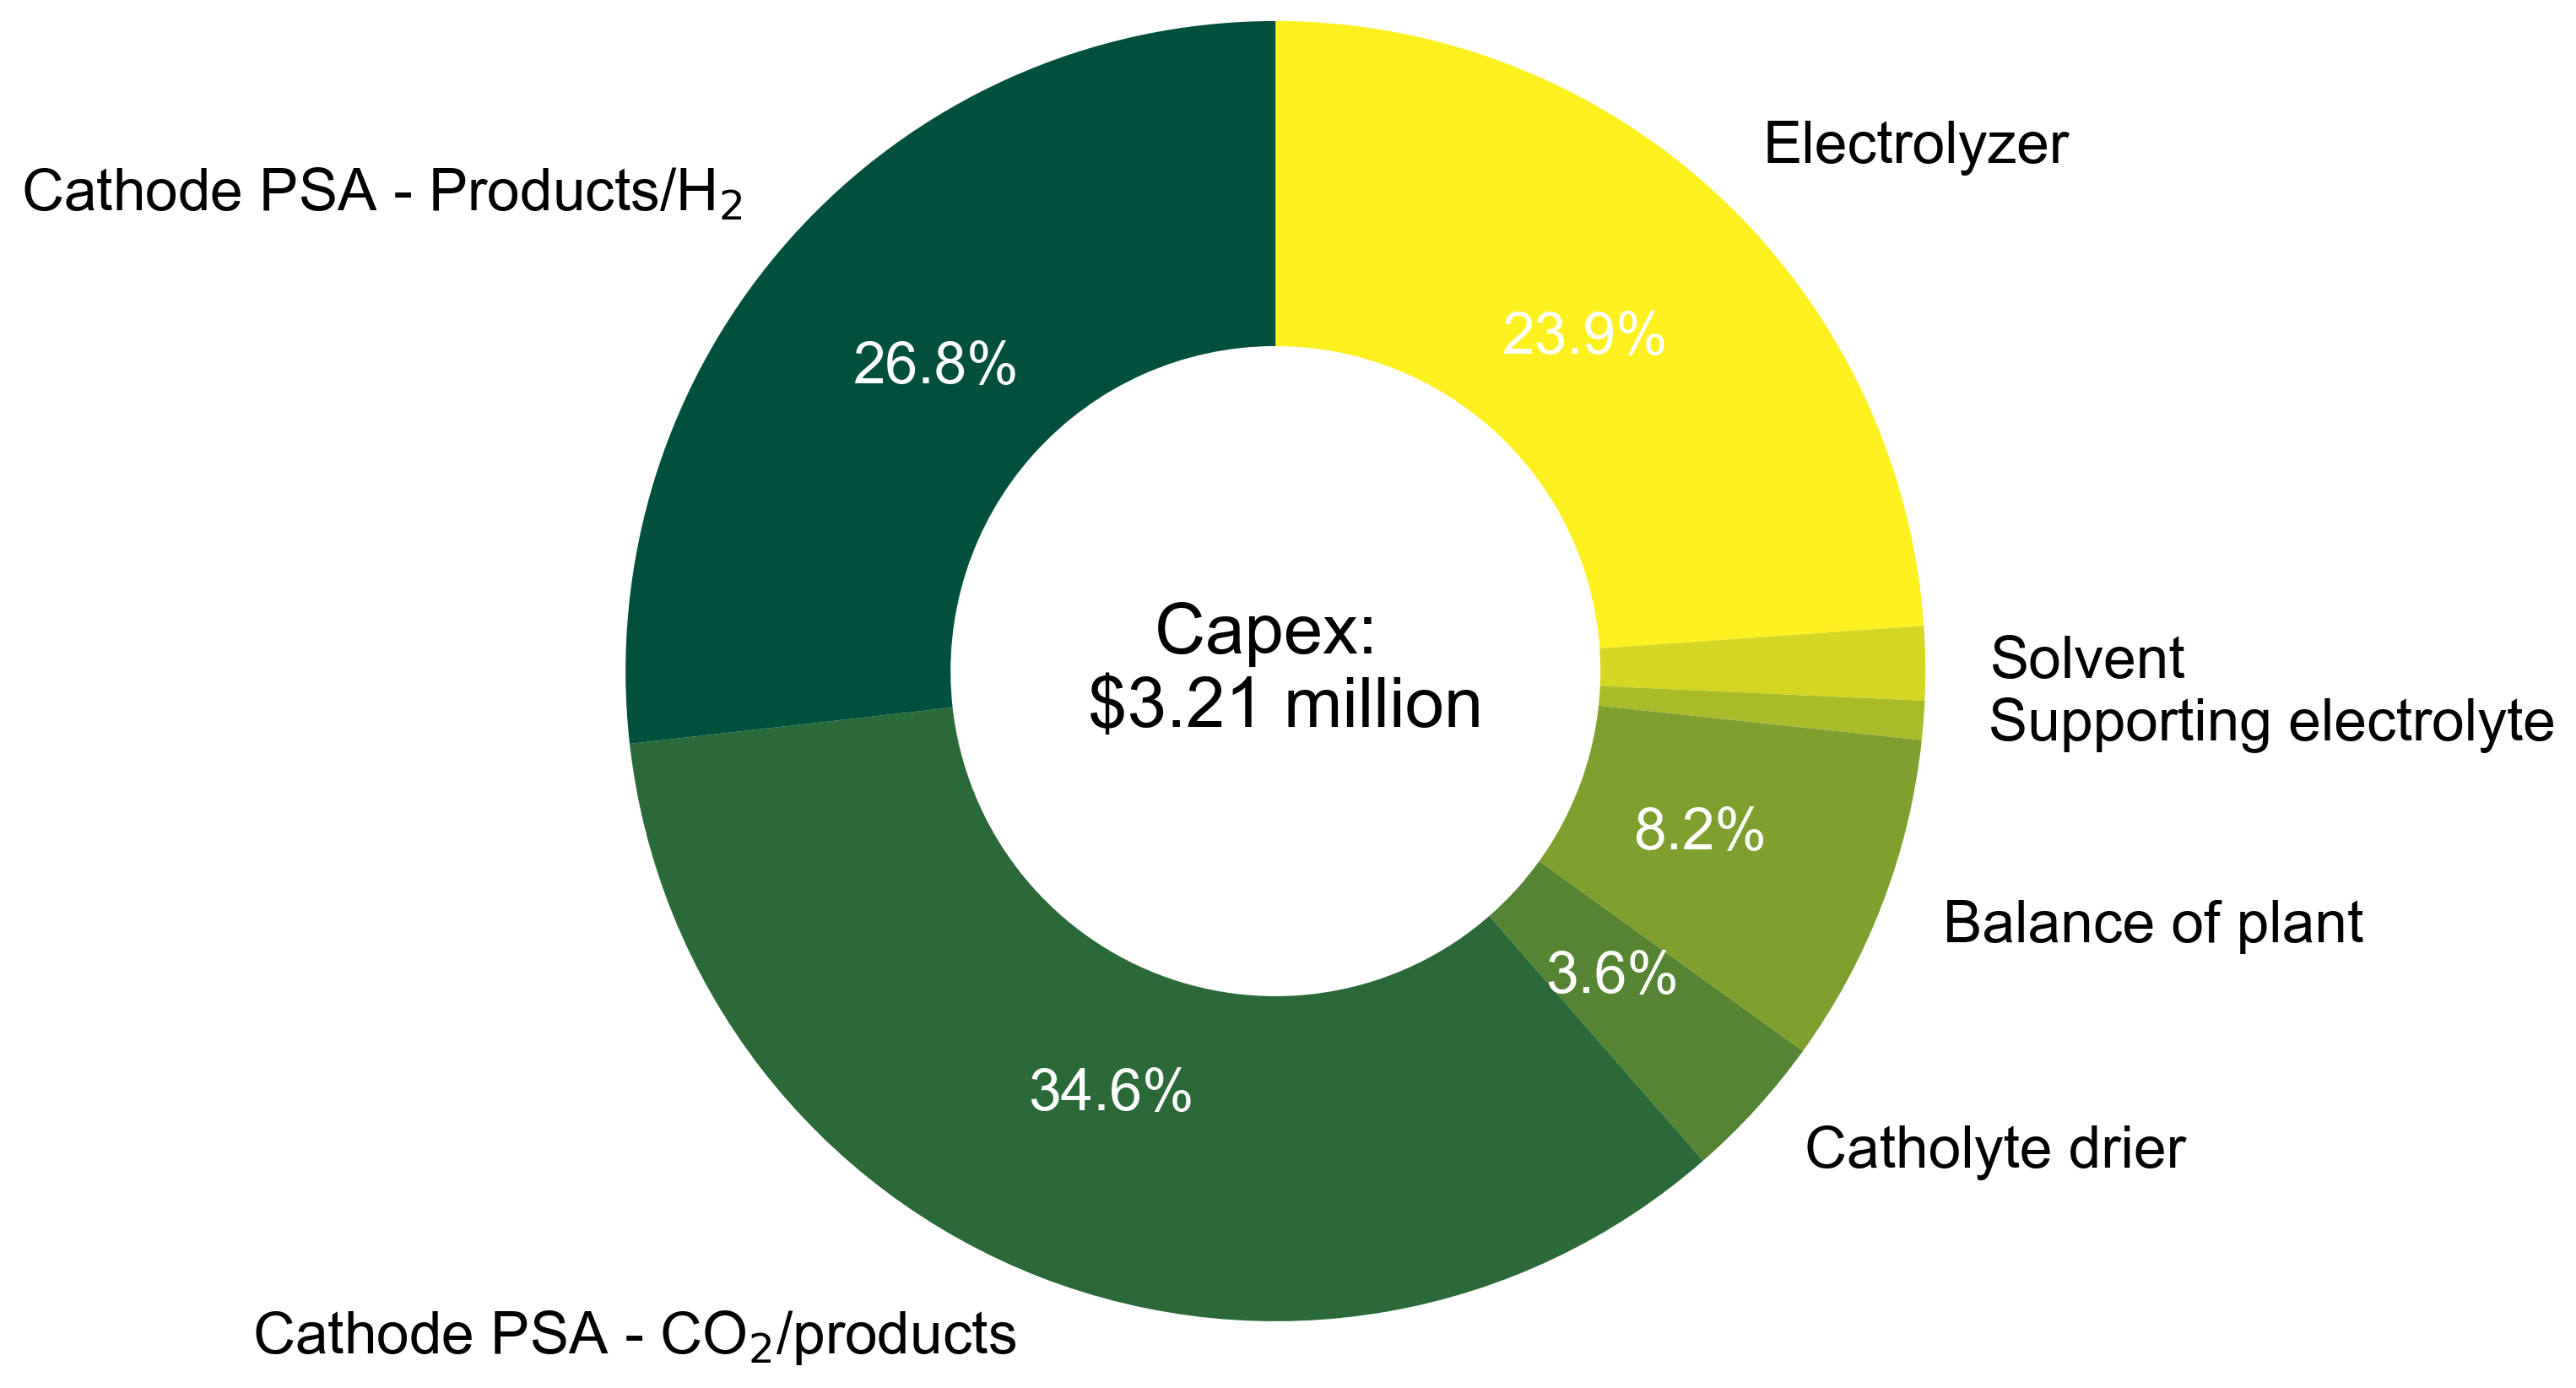

In [566]:
if override_single == True:
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot

    __, __, autopercents = axs.pie(df_capex_BM.loc[:, 'Cost ($)'], 
            labels = df_capex_BM.index, labeldistance = 1.1,
            autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
            pctdistance = 0.7,
            colors = BM_capex_colors, startangle = 90, 
            textprops = {'fontsize' : SMALL_SIZE}, 
            radius = 2, wedgeprops= {'width' : 1}, # donut
            counterclock = False,
              )   
    plt.setp(autopercents, color="white")

    axs.text(0, 0,  
     'Capex: \n ${:.2f} million'.format(df_capex_totals.loc[ 'Total permanent investment', 'Cost ($)']/1e6 ), # All capex except working capital, which is recovered during operation
     ha='center', va='center',
      fontsize = MEDIUM_SIZE)  
         
    ## Save figure 
    capex_pie_fig_name = os.path.join(OP_folder, '{} {} capex single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(capex_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(capex_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(capex_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + capex_pie_fig_name)
    
    plt.show()

### 2.1.2 Opex pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO opex single run 04-44PM


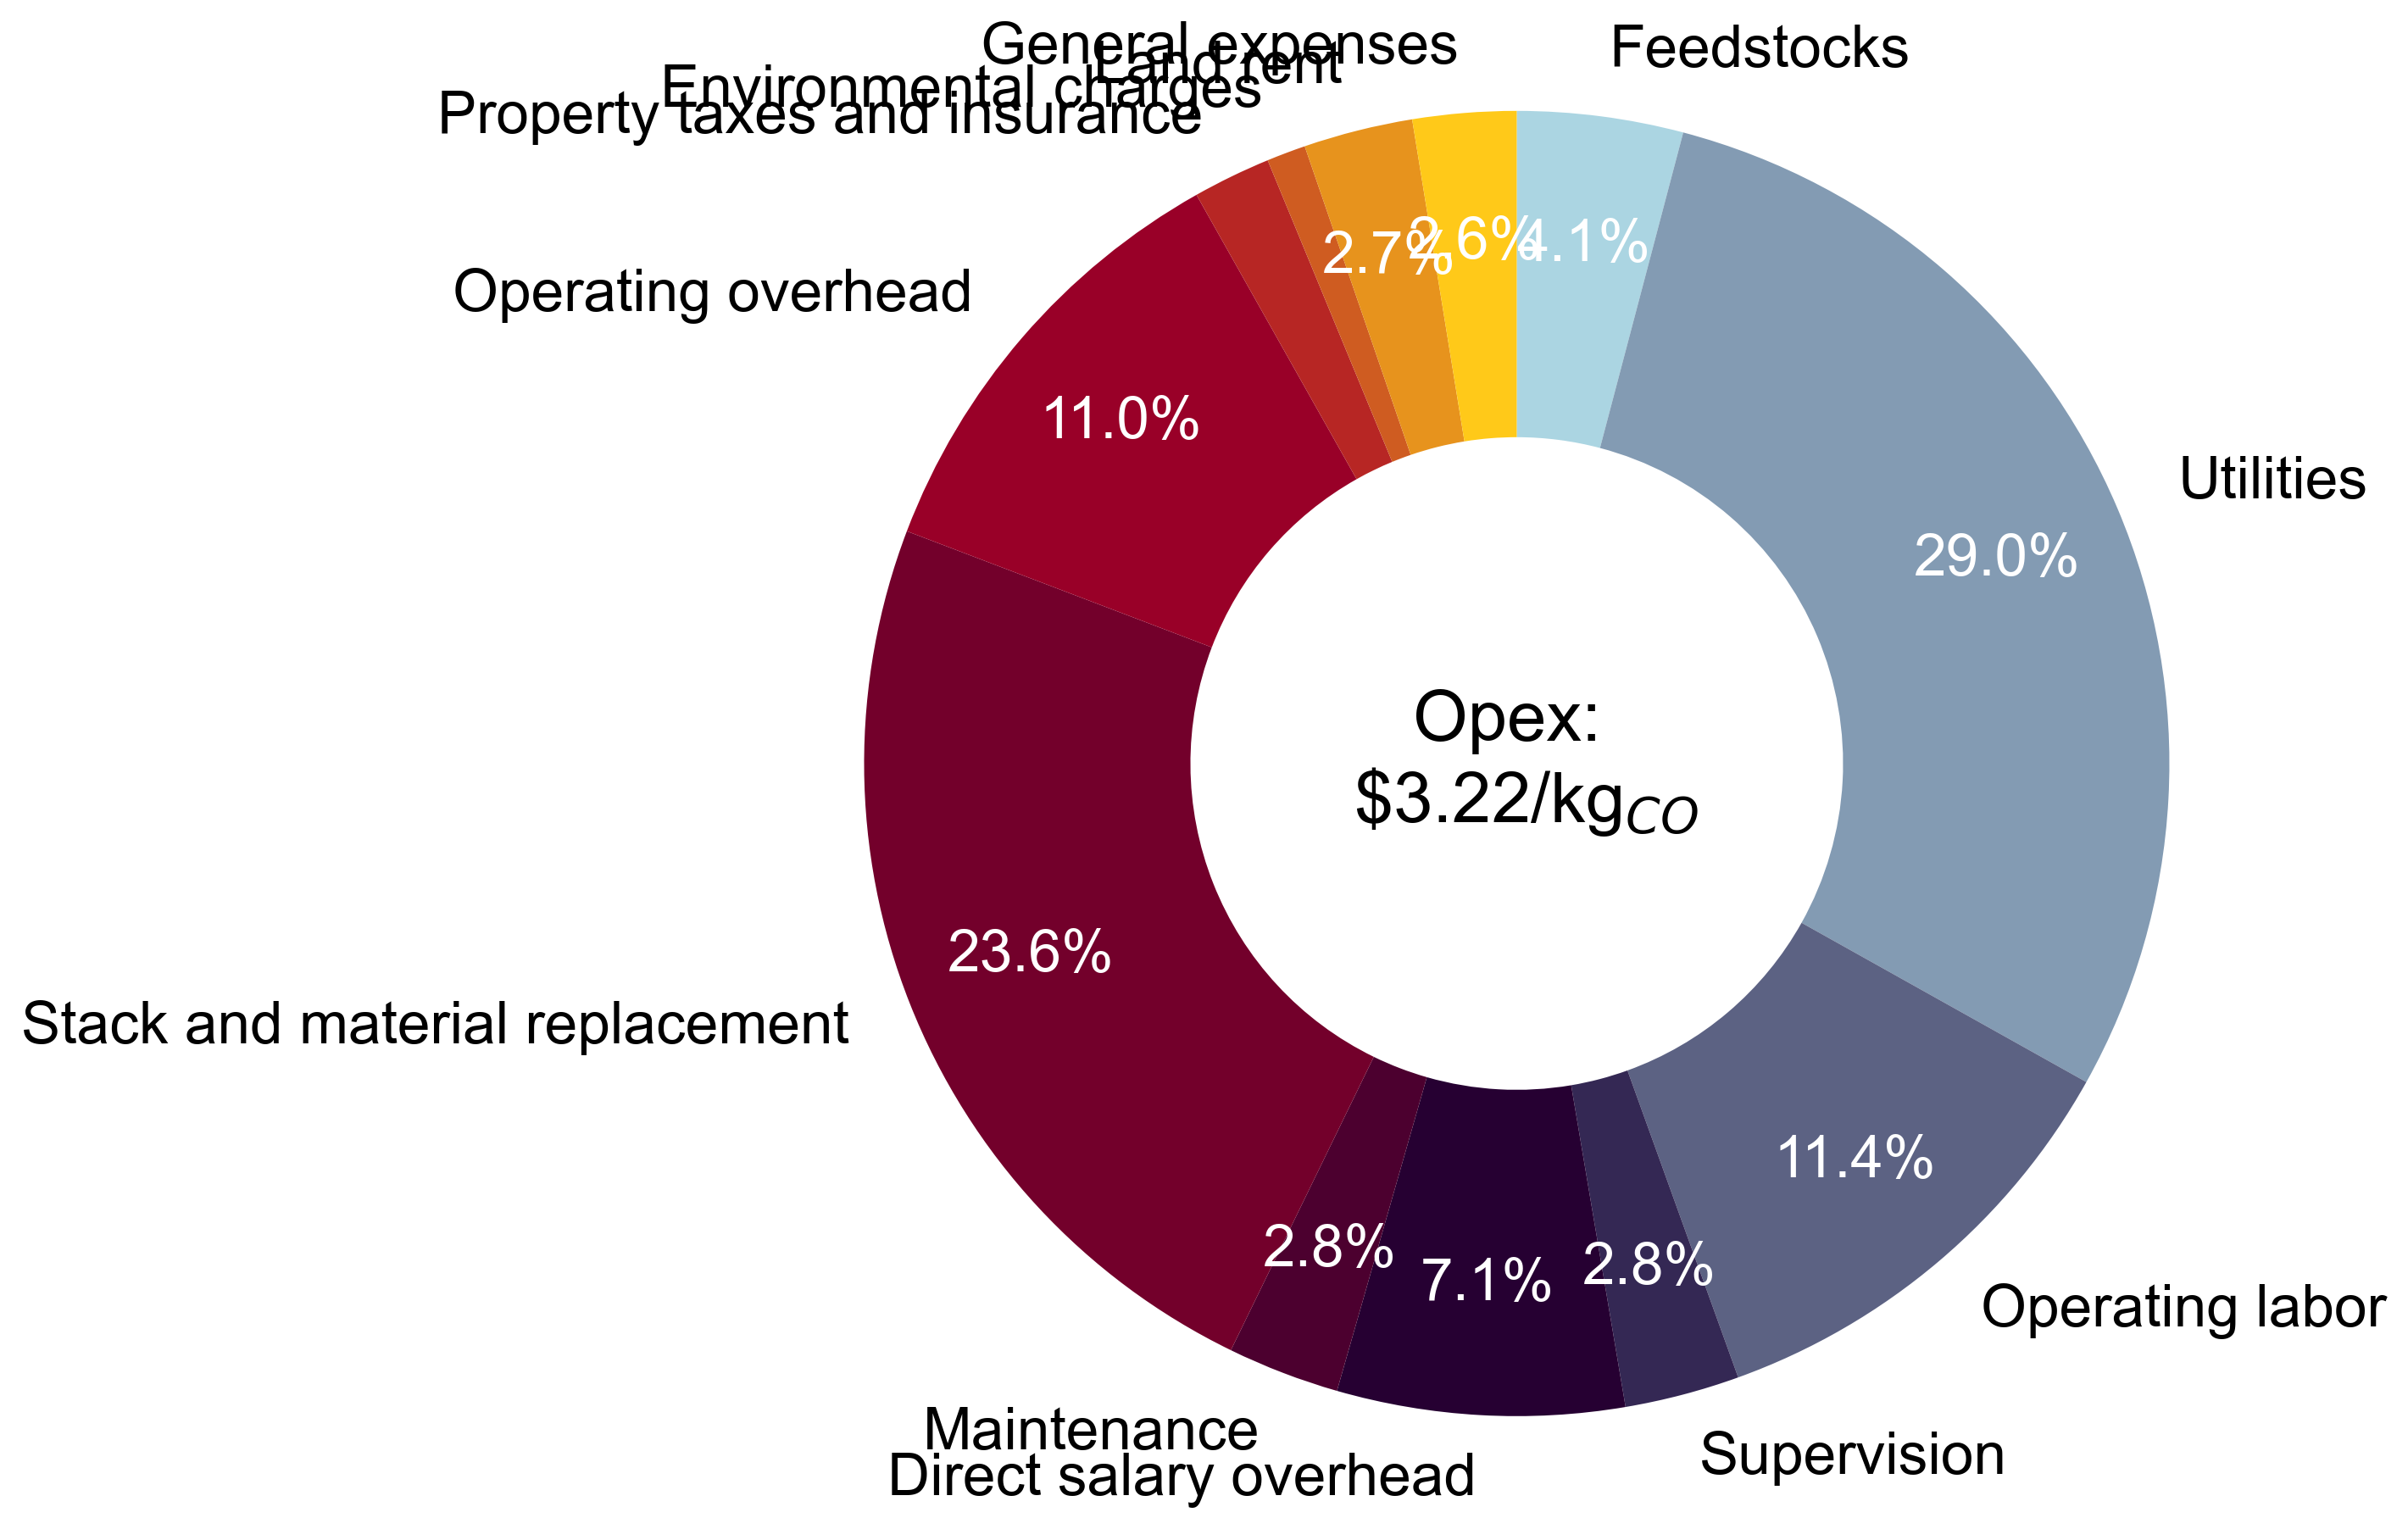

In [567]:
if override_single == True:
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot
    
    __, __, autopercents = axs.pie(df_opex.loc[:, 'Cost ($/kg {})'.format(product_name)], 
            labels = df_opex.index, labeldistance = 1.1,
            autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
            pctdistance = 0.8,
            colors = opex_colors, startangle = 90, 
            textprops = {'fontsize' : SMALL_SIZE}, 
            radius = 2, wedgeprops= {'width' : 1}, # donut
            counterclock = False,
            # explode = 0.2*np.ones(len(df_opex.index),
              )   
    plt.setp(autopercents, color="white")
    axs.text(0, 0,  
     'Opex: \n \${:.2f}/kg$_{{{}}}$'.format(df_opex_totals.loc[ 'Production cost', 'Cost ($/kg {})'.format(product_name)], product_name), # All capex except working capital, which is recovered during operation
     ha='center', va='center', 
      fontsize = MEDIUM_SIZE)  
         
    ## Save figure 
    opex_pie_fig_name = os.path.join(OP_folder, '{} {} opex single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(opex_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(opex_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + opex_pie_fig_name)
    
    plt.show()

### 2.1.3 Levelized cost pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO levelized single run 04-44PM


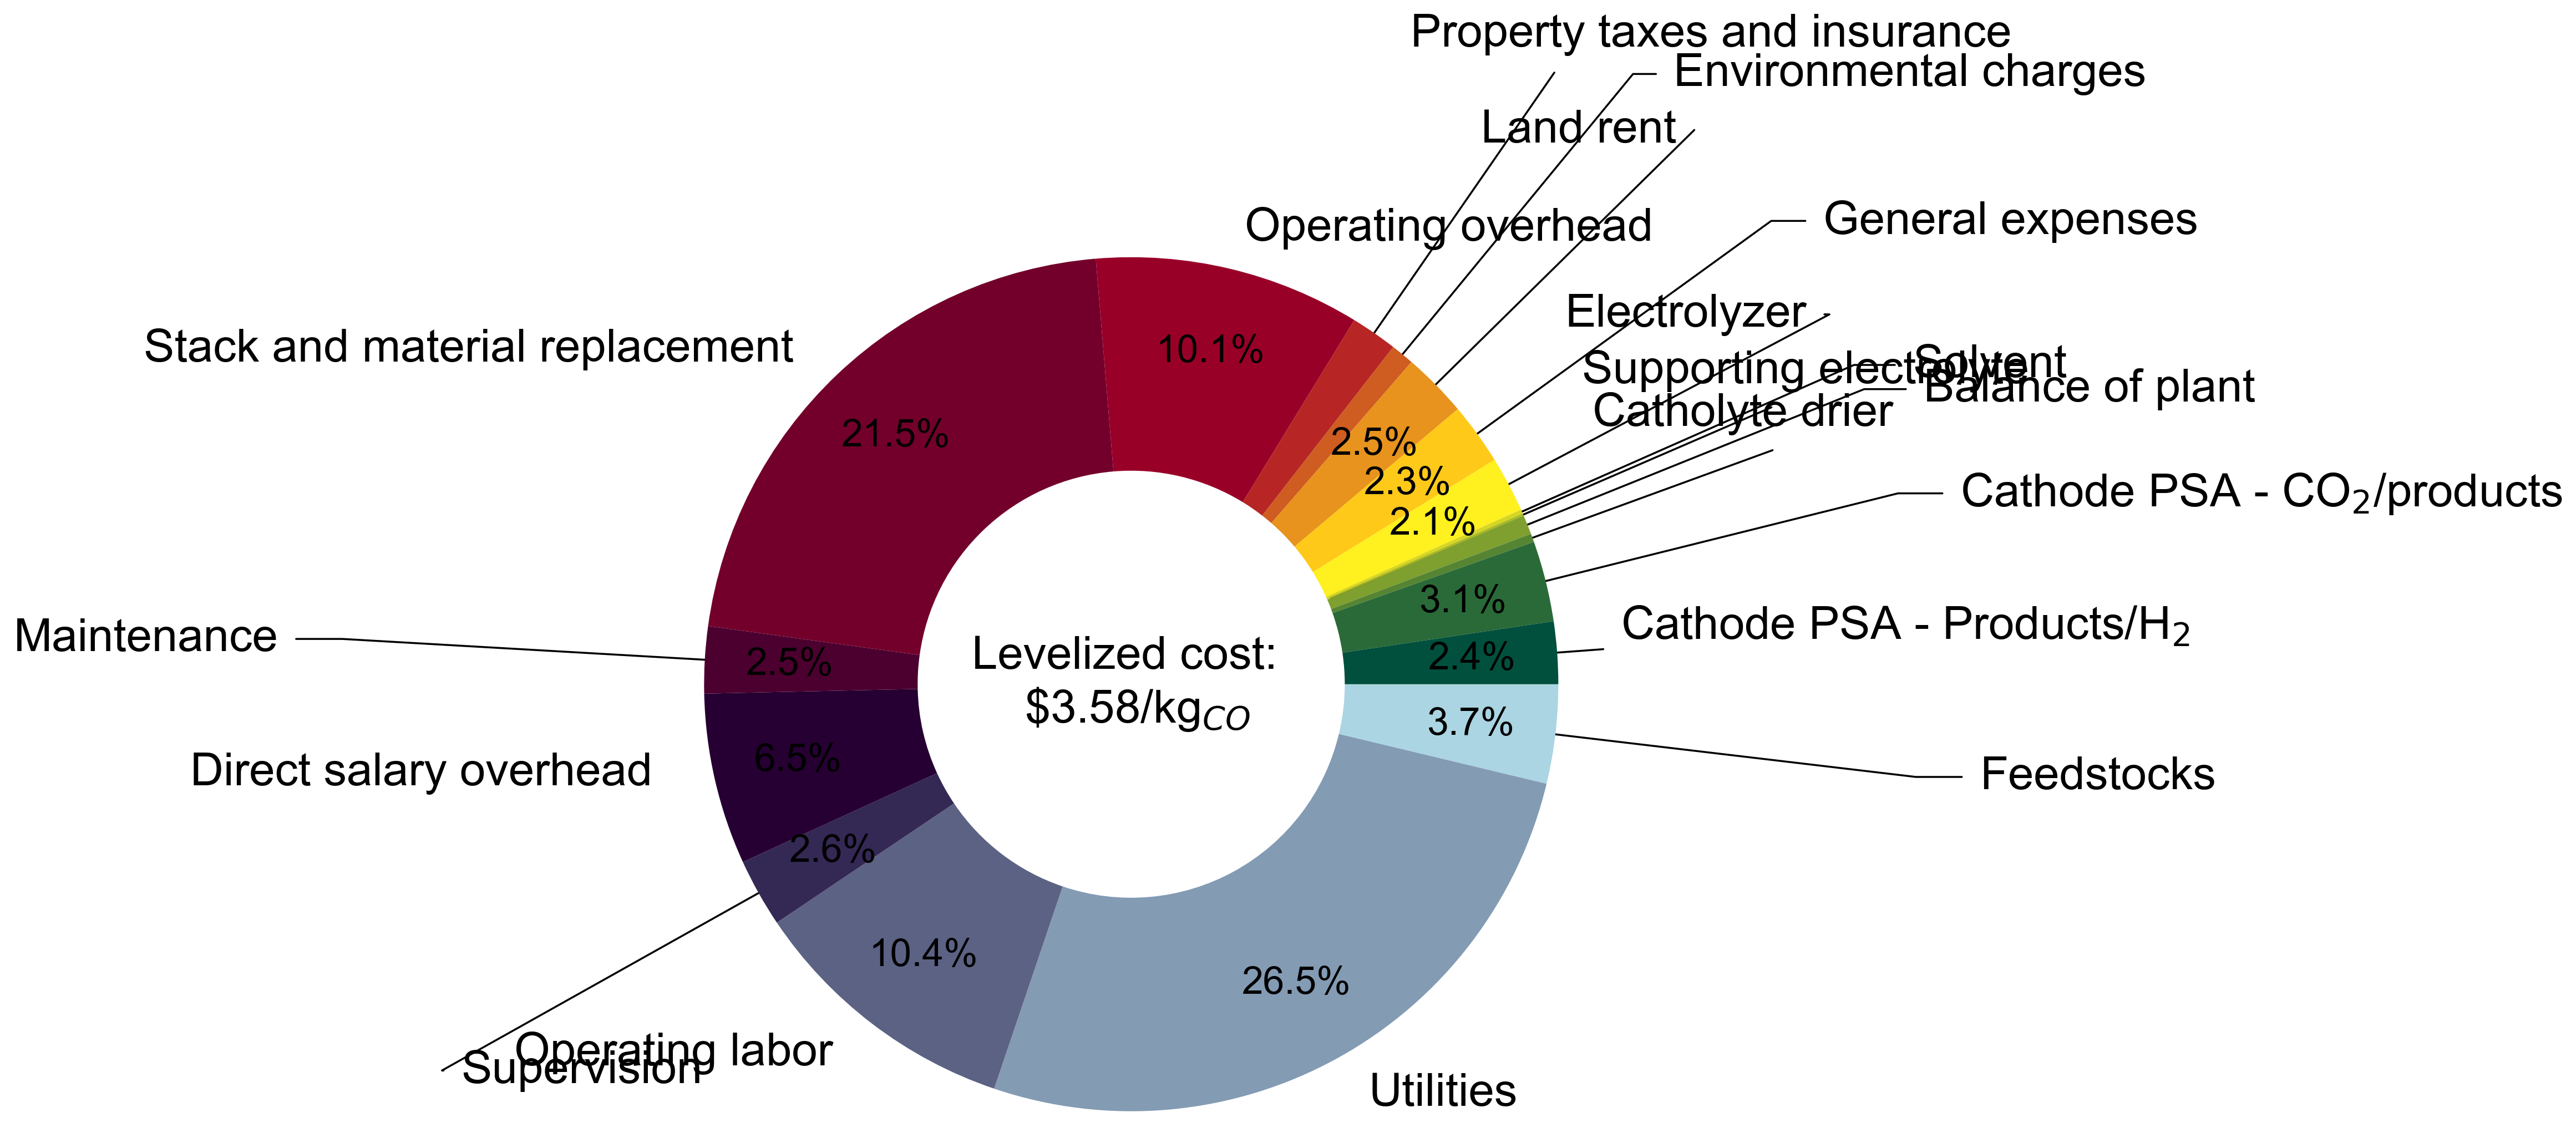

In [568]:
if override_single == True:
    alternating = 1
    flag = False
    far_near = {1: 2.3, -1: 4.0}
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot
    
    full_list_of_costs = pd.concat([df_opex.loc[:, 'Cost ($/kg {})'.format(product_name)],
                          df_capex_BM.loc[:,'Cost ($)']/(365*capacity_factor*lifetime_years*product_rate_kg_day)], axis = 0)

    wedges, __, autopercents = axs.pie(full_list_of_costs, 
                    # labels = full_list_of_costs.index, 
                    # labeldistance = 1.1,
                    autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
                    pctdistance = 0.8,
                    colors = levelized_colors, startangle = 0, 
                    textprops = {'fontsize' : SMALL_SIZE}, 
                    radius = 2, wedgeprops= {'width' : 1}, # donut
                    counterclock = False,
                    # explode = 0.2*np.ones(len(df_opex.index),
                    )   
    axs.text(0, 0,  
    'Levelized cost: \n \${:.2f}/kg$_{{{}}}$'.format(df_opex_totals.loc[ 'Levelized cost', 'Cost ($/kg {})'.format(product_name)], product_name), # All capex except working capital, which is recovered during operation
    ha='center', va='center', 
    fontsize = MEDIUM_SIZE)
    
    box_properties = dict(boxstyle="square,pad=0.3", fc="none", lw=0)
    label_properties_away = dict(arrowprops=dict(arrowstyle="-"),
                        bbox=box_properties, zorder=0, va="center")
    label_properties_near = dict(arrowprops=dict(arrowstyle="-",alpha = 0),
                        bbox=box_properties, zorder=0, va="center")
    for i, wedge in enumerate(wedges):
        middle_angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1 # in degrees
        y_posn = np.sin(np.deg2rad(middle_angle))
        x_posn = np.cos(np.deg2rad(middle_angle))
        verticalalignment = {-1: "bottom", 1: "top"}[int(np.sign(y_posn))]
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x_posn))]
        if (wedge.theta2 - wedge.theta1) <22:
            alternating = -alternating
            connectionstyle = f"angle,angleA=0,angleB={middle_angle}"
            label_properties_away["arrowprops"].update({"connectionstyle": connectionstyle})
            axs.annotate(full_list_of_costs.index[i], xy=(x_posn, y_posn), 
                        xytext=(far_near[alternating]*1*x_posn, 3.7*y_posn),
                        horizontalalignment=horizontalalignment, 
                        **label_properties_away)
        else:                            
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x_posn))]
            axs.text(2.3*x_posn, 2.3*y_posn,
                    full_list_of_costs.index[i],
                    horizontalalignment=horizontalalignment, 
                    verticalalignment = verticalalignment)
 
    ## Save figure 
    levelized_pie_fig_name = os.path.join(OP_folder, '{} {} levelized single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(levelized_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(levelized_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(levelized_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + levelized_pie_fig_name)
    
    plt.show()

In [569]:
# levelized_USD_kg

### 2.1.4 Emissions pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO emissions single run 04-44PM


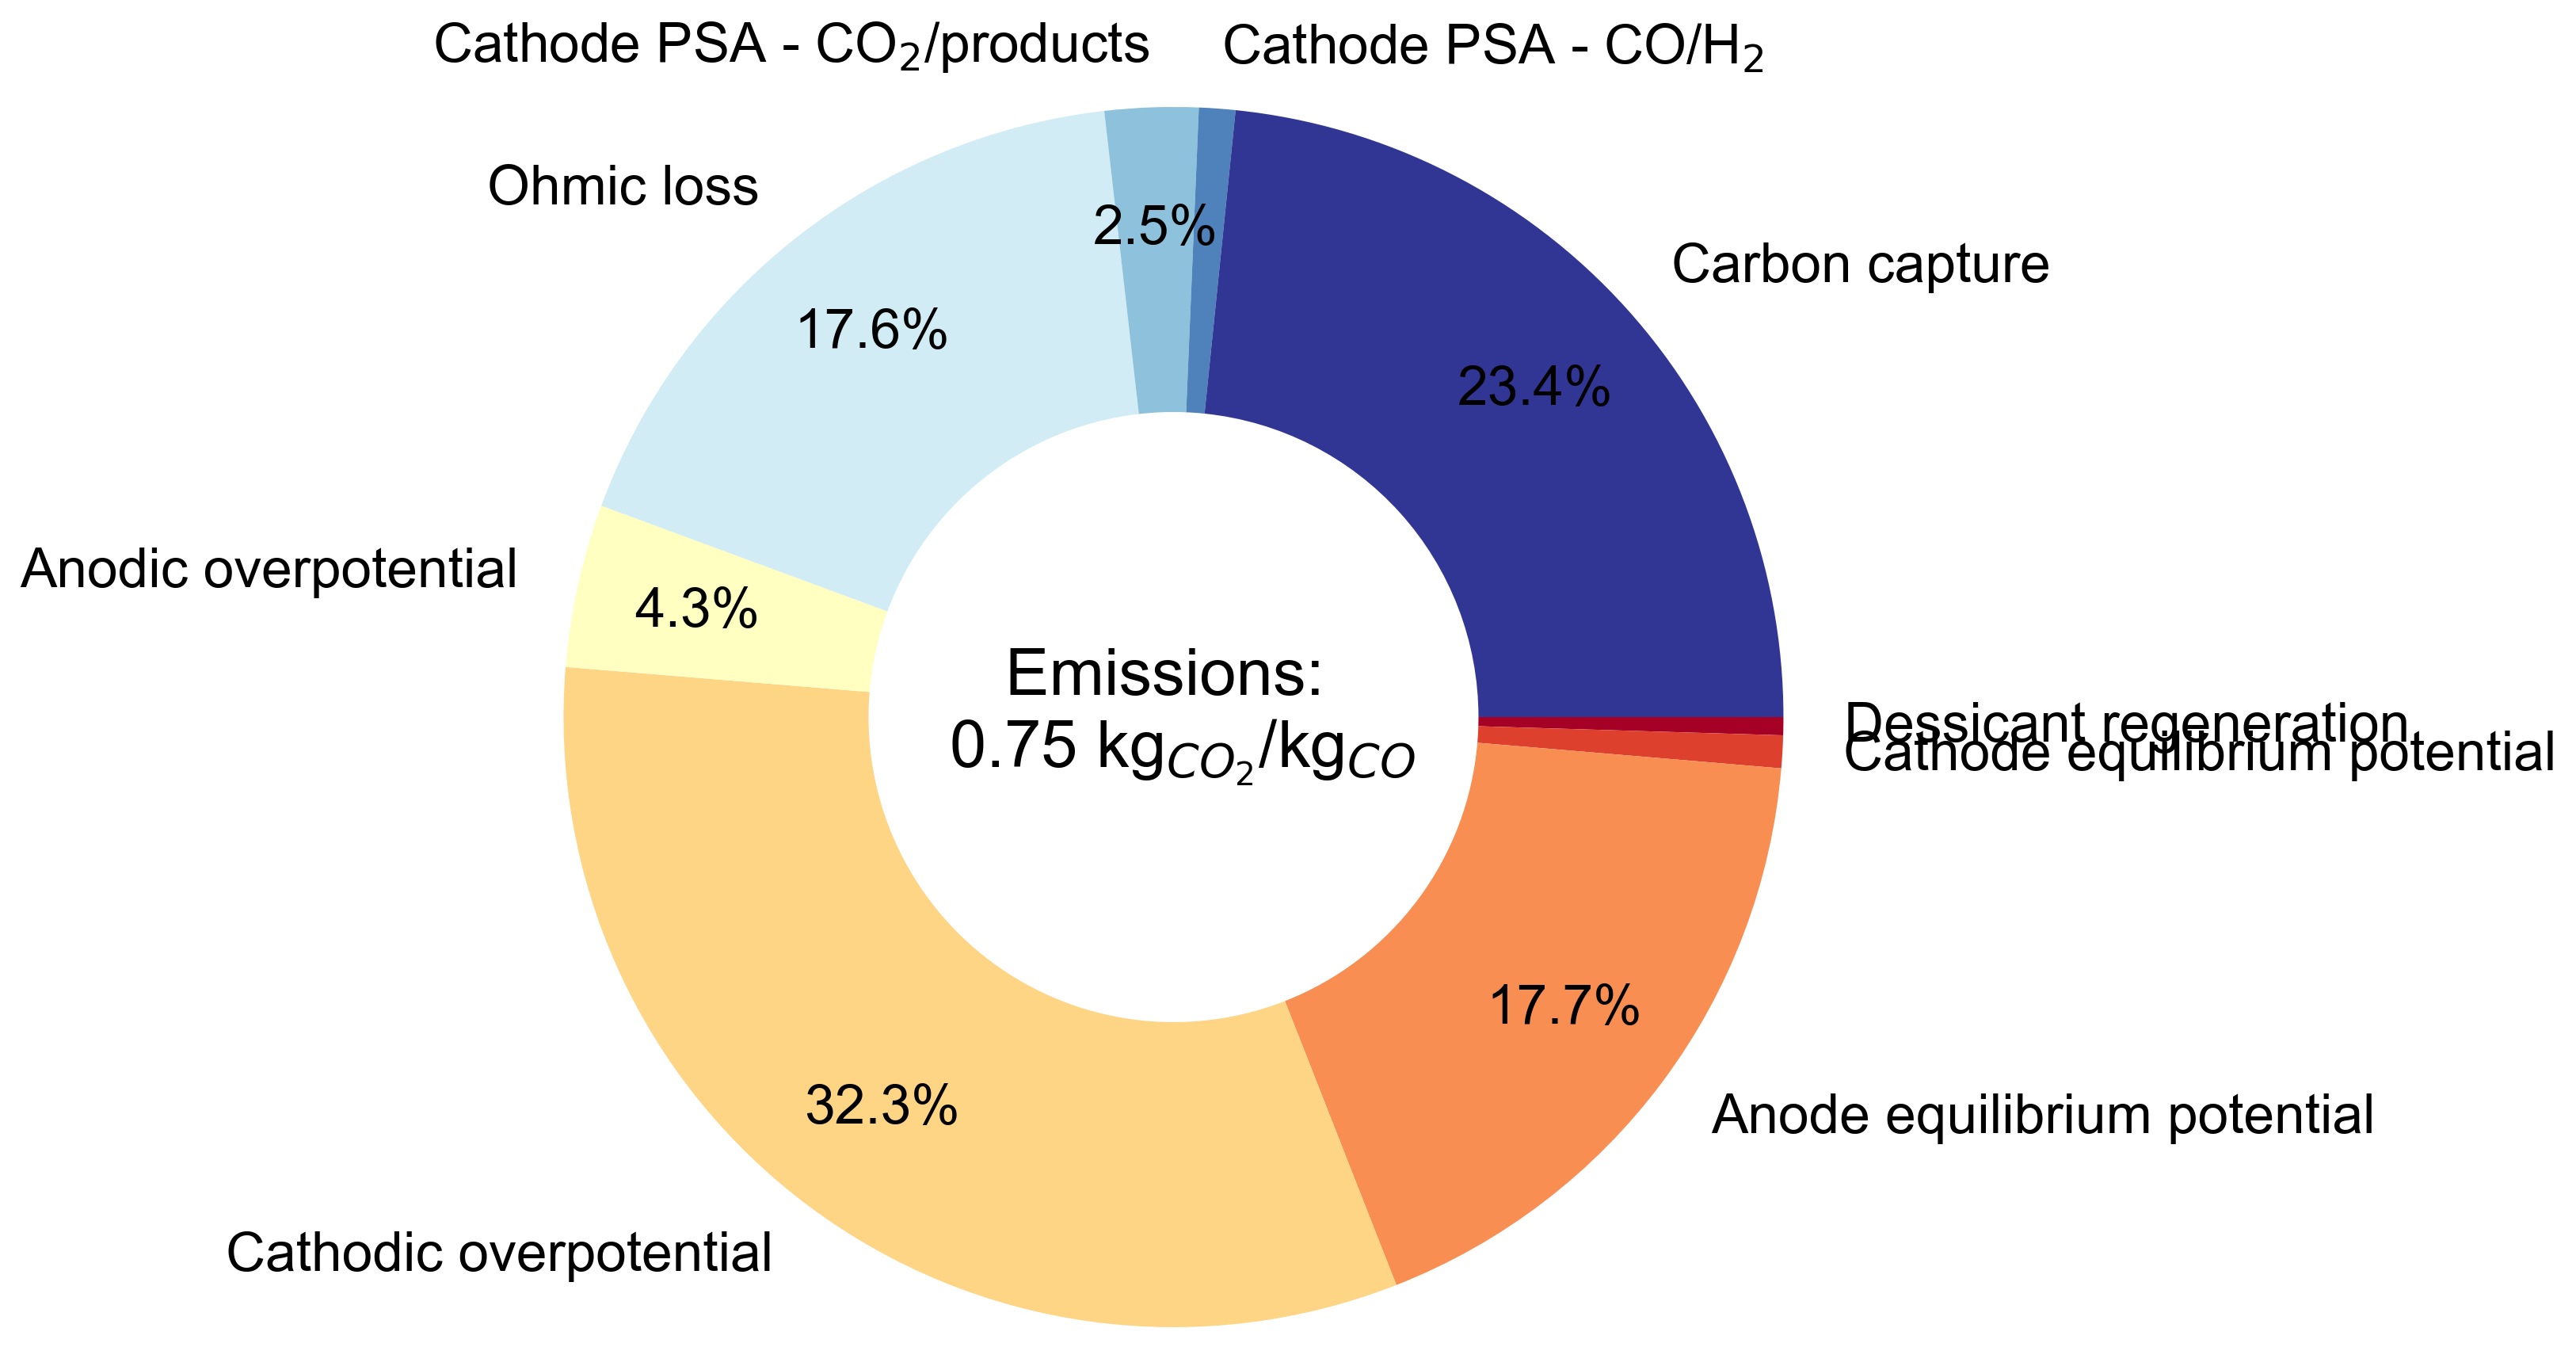

In [570]:
if override_single == True:
    alternating = 1
    flag = False
    far_near = {1: 3.5, -1: 4.5}
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot
    
    wedges, __, __ = axs.pie(df_emissions.drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore').loc[~np.isnan(df_emissions)], 
                  labels = df_emissions.drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore').loc[~np.isnan(df_emissions)].index, 
                  labeldistance = 1.1,
                  autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
                  pctdistance = 0.8,
                  colors = emissions_colors, startangle = 0, 
                  textprops = {'fontsize' : SMALL_SIZE}, 
                  radius = 2, wedgeprops= {'width' : 1}, # donut
                  counterclock = False,
                  # explode = 0.2*np.ones(len(df_opex.index),
                  )   
    axs.text(0, 0,  
    'Emissions: \n {:.2f} kg$_{{CO_2}}$/kg$_{{{}}}$'.format(sum(df_emissions.fillna(0).drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore')), product_name), # All capex except working capital, which is recovered during operation
    ha='center', va='center', 
    fontsize = MEDIUM_SIZE)  
                            
    # Label pie chart with arrows
    # box_properties = dict(boxstyle="square,pad=0.3", fc="none", lw=0)
    # label_properties_away = dict(arrowprops=dict(arrowstyle="-"),
    #                     bbox=box_properties, zorder=0, va="center")
    # for i, wedge in enumerate(wedges):
    #     middle_angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1 # in degrees
    #     y_posn = np.sin(np.deg2rad(middle_angle))
    #     x_posn = np.cos(np.deg2rad(middle_angle))
    #     verticalalignment = {-1: "bottom", 1: "top"}[int(np.sign(y_posn))]
    #     if (wedge.theta2 - wedge.theta1) < 15:
    #         alternating = -alternating
    #         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x_posn))]
    #         connectionstyle = f"angle,angleA=0,angleB={middle_angle}"
    #         label_properties_away["arrowprops"].update({"connectionstyle": connectionstyle})
    #         axs.annotate(df_emissions.drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore').loc[~np.isnan(df_emissions)].index[i], xy=(x_posn, y_posn), 
    #                       xytext=(far_near[alternating]*0.7*np.sign(x_posn), 3.5*y_posn),
    #                     horizontalalignment=horizontalalignment, verticalalignment = 'center',
    #                     **label_properties_away)
    #     else:                            
    #         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x_posn))]
    #         axs.text(2.3*x_posn, 2.3*y_posn,
    #                     df_emissions.drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore').loc[~np.isnan(df_emissions)].index[i],
    #                     horizontalalignment=horizontalalignment,
    #                     verticalalignment=verticalalignment)
                     
    ## Save figure 
    emissions_pie_fig_name = os.path.join(OP_folder, '{} {} emissions single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(emissions_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(emissions_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(emissions_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + emissions_pie_fig_name)
    
    plt.show()

### 2.1.5 Energy pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO energy single run 04-44PM


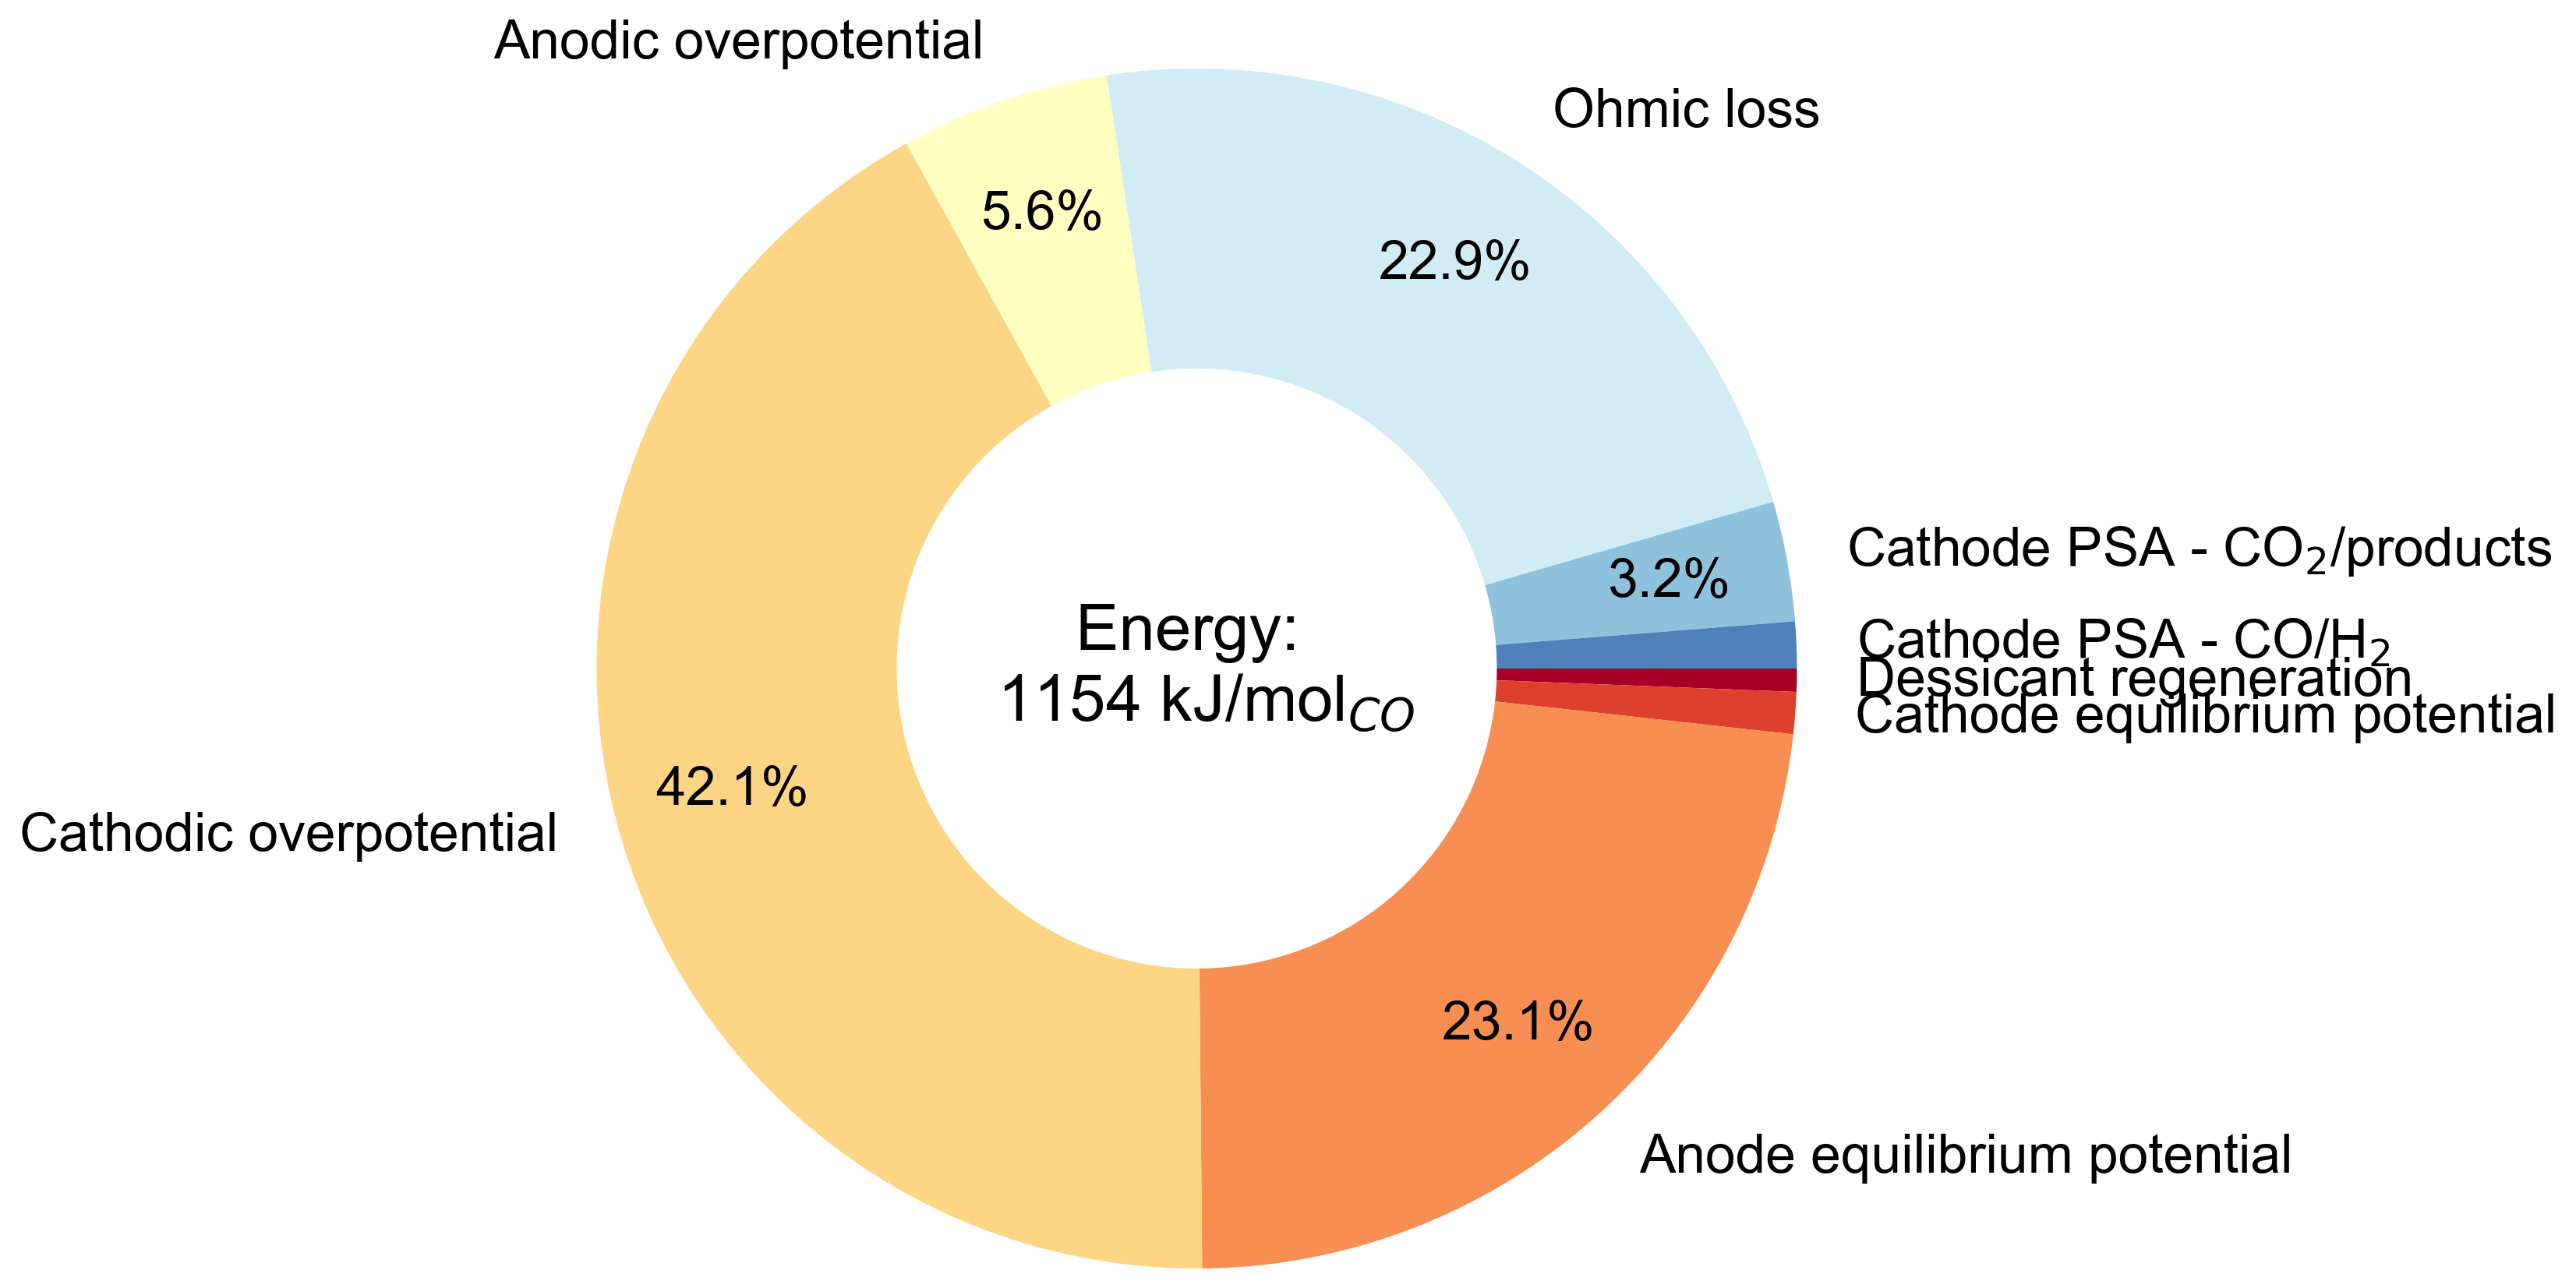

In [571]:
if override_single == True:
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot

    axs.pie((abs(df_energy.iloc[2:-3].loc[:, 'Energy (kJ/kg {})'.format(product_name)])/1000)*df_products.loc[product_name, 'Molecular weight (g/mol)'],
            labels = df_energy.iloc[2:-3].index, labeldistance = 1.1,
            autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
            pctdistance = 0.8,
            colors = energy_colors, startangle = 0, 
            textprops = {'fontsize' : SMALL_SIZE}, 
            radius = 2, wedgeprops= {'width' : 1}, # donut
            counterclock = False,
            # explode = 0.2*np.ones(len(df_opex.index),
          )   
    axs.text(0, 0,  
            'Energy: \n {:.0f} kJ/mol$_{{{}}}$'.format(df_energy.loc['Total', 'Energy (kJ/kg {})'.format(product_name)]*(df_products.loc[product_name, 'Molecular weight (g/mol)']/1000), product_name),
            ha='center', va='center', 
            fontsize = MEDIUM_SIZE)  
         
    ## Save figure 
    energy_pie_fig_name = os.path.join(OP_folder, '{} {} energy single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(energy_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(energy_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#     fig.savefig(energy_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + energy_pie_fig_name)
    
    plt.show()

### 2.1.5 Potentials pie chart

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO potential single run 04-44PM


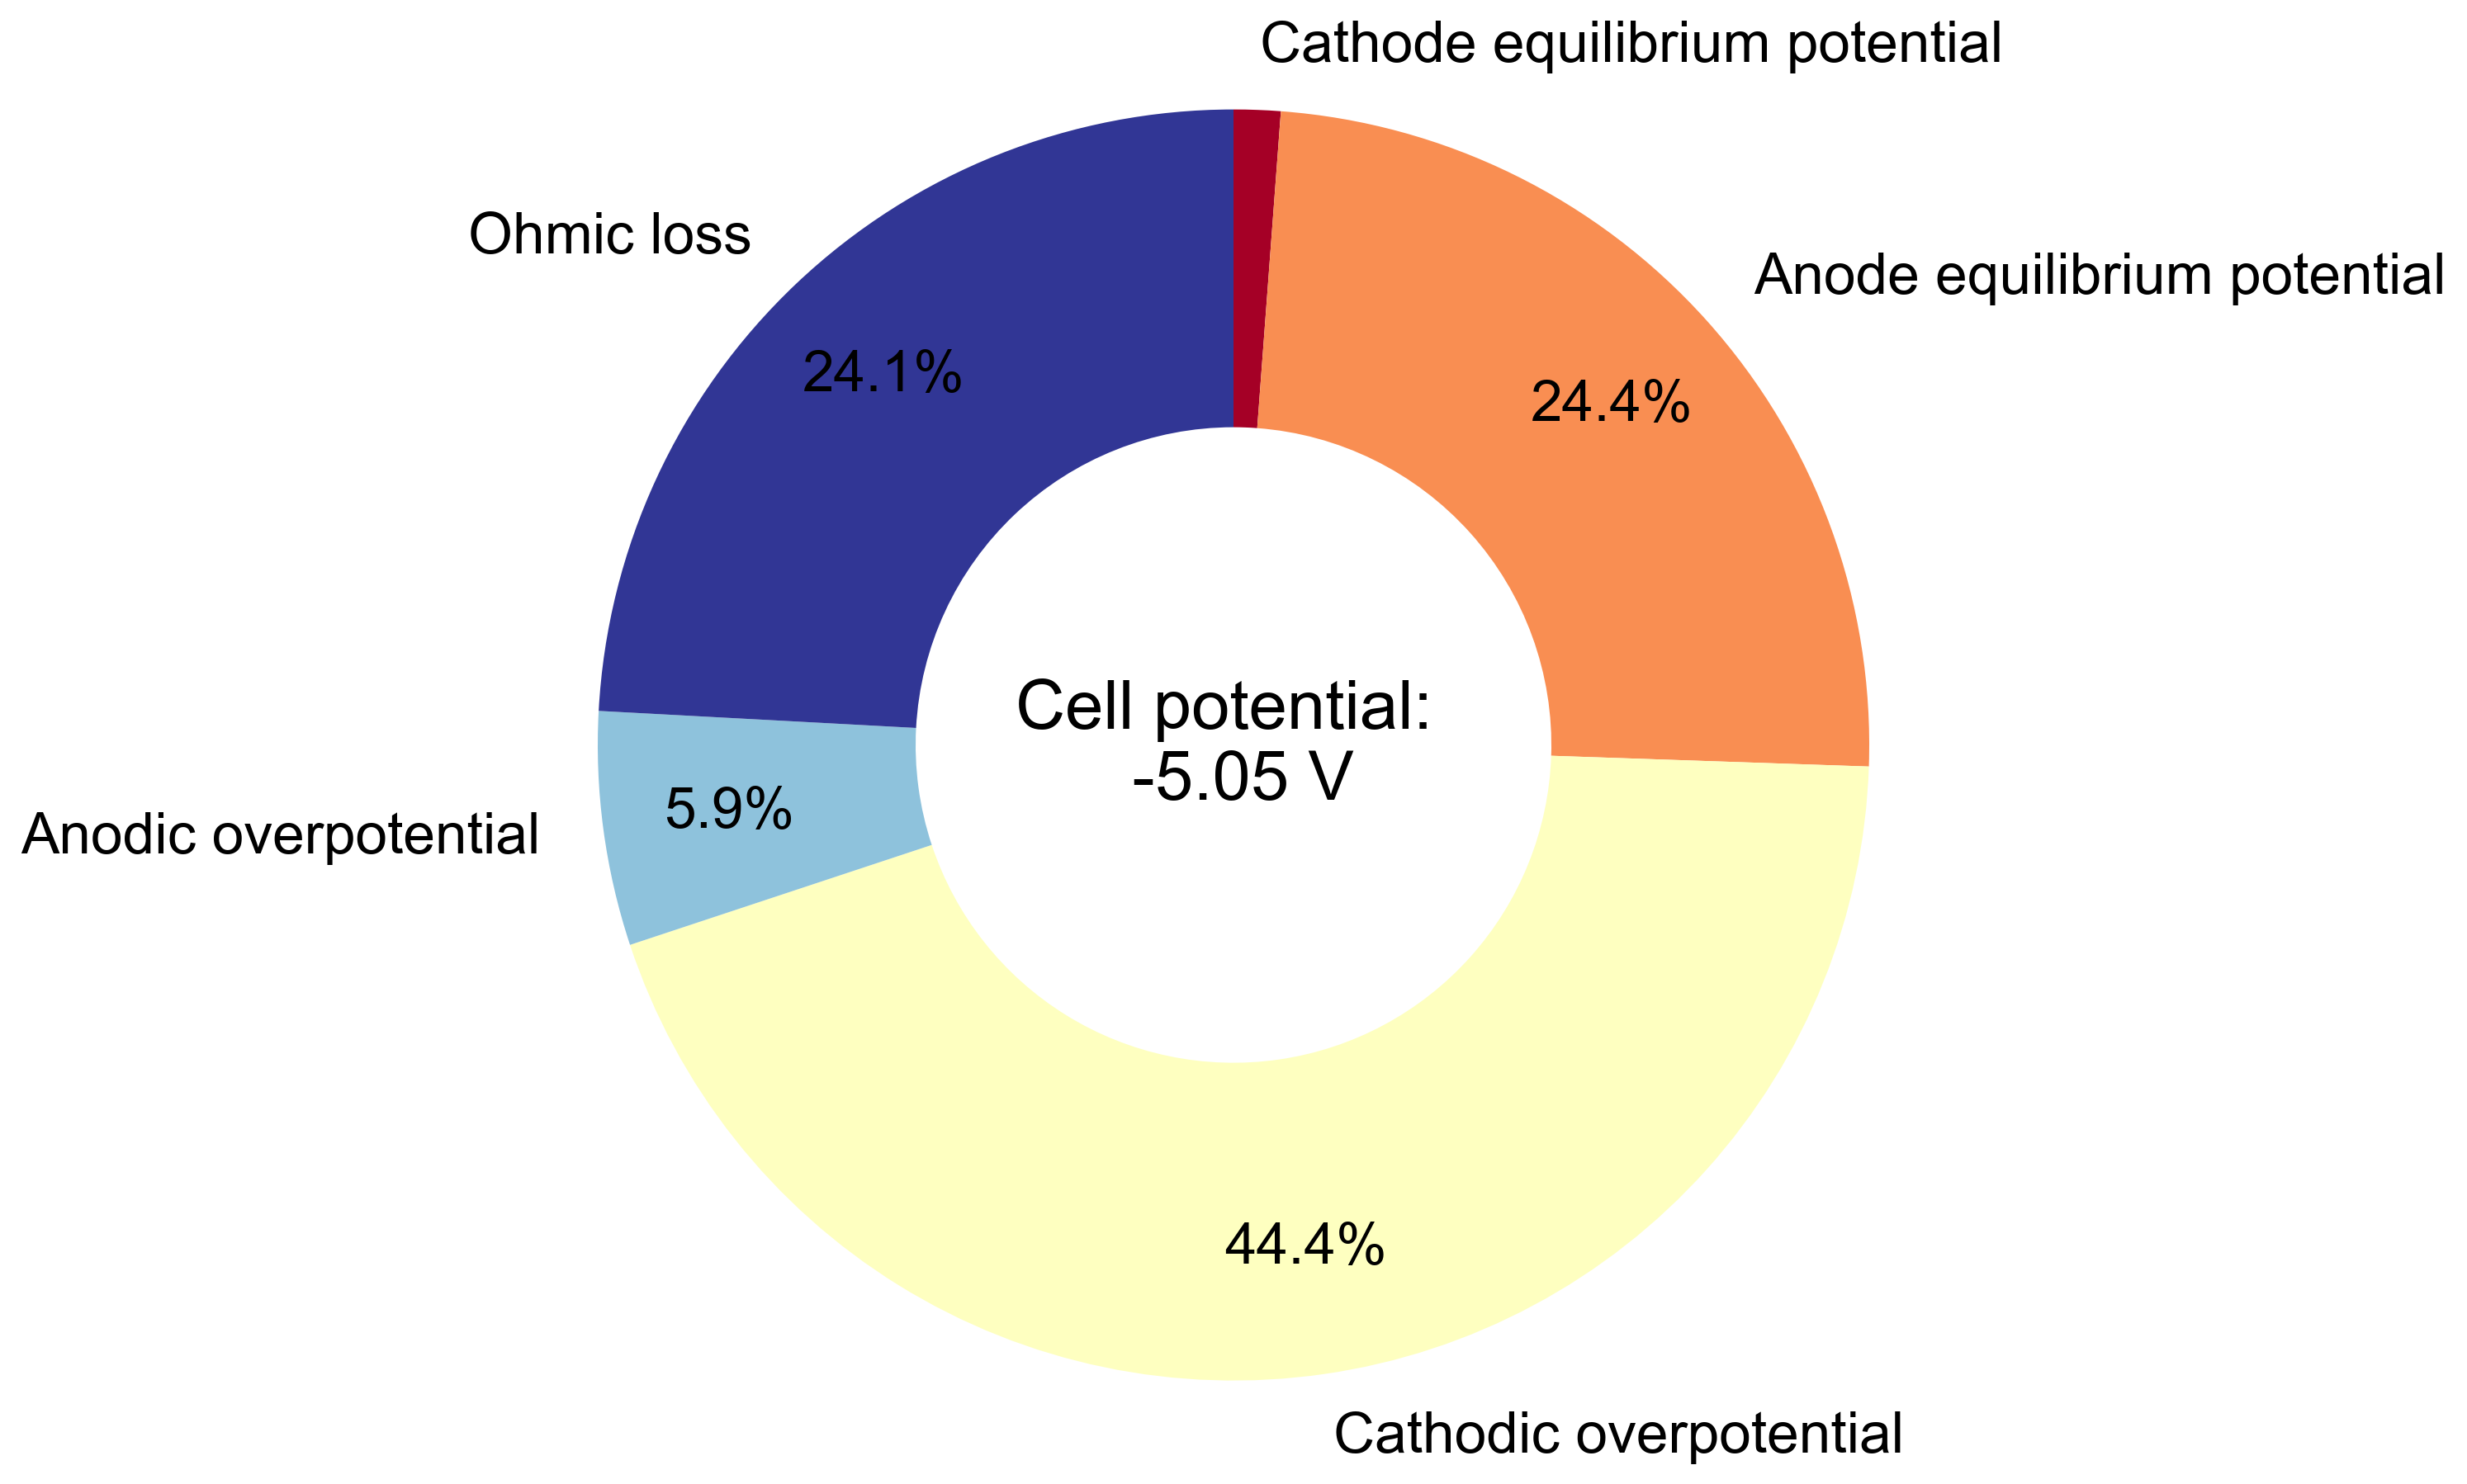

In [572]:
if override_single == True:
  
    fig, axs = plt.subplots(figsize = (5, 5)) # Set up plot
    
    ## WARNING: HARDCODED!
    axs.pie(abs(df_potentials.iloc[2:7].loc[:,'Value']),
            labels = df_potentials.iloc[2:7].index, labeldistance = 1.1,
            autopct = lambda val: '{:.1f}%'.format(val) if val > 2 else '', 
            pctdistance = 0.8,
            colors = potentials_colors, startangle = 90, 
            textprops = {'fontsize' : SMALL_SIZE}, 
            radius = 2, wedgeprops= {'width' : 1}, # donut
            counterclock = False,
            # explode = 0.2*np.ones(len(df_opex.index),
              )   
    axs.text(0, 0,  
     'Cell potential: \n {:.2f} V'.format(df_potentials.loc['Cell potential', 'Value']),
     ha='center', va='center', 
      fontsize = MEDIUM_SIZE)  
         
    ## Save figure 
    potentials_pie_fig_name = os.path.join(OP_folder, '{} {} potential single run {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(potentials_pie_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(potentials_pie_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(potentials_pie_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + potentials_pie_fig_name)
    
    plt.show()

## 2.2 Profitability metrics

### 2.2.1 Plot formatting

In [573]:
if override_single == True:
    x_axis_max = lifetime_years # round to nearest 0.01)
    x_axis_min = 0 # round to nearest 0.01)
#     x_axis_step = 0.02
    x_axis_num = 6
#     x_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
#     x_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) 
    barwidth = 1/(2.5*lifetime_years) * (x_axis_max - x_axis_min)
    

### 2.2.2 Discounted cash flow

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Discounted cash flow 04-44PM


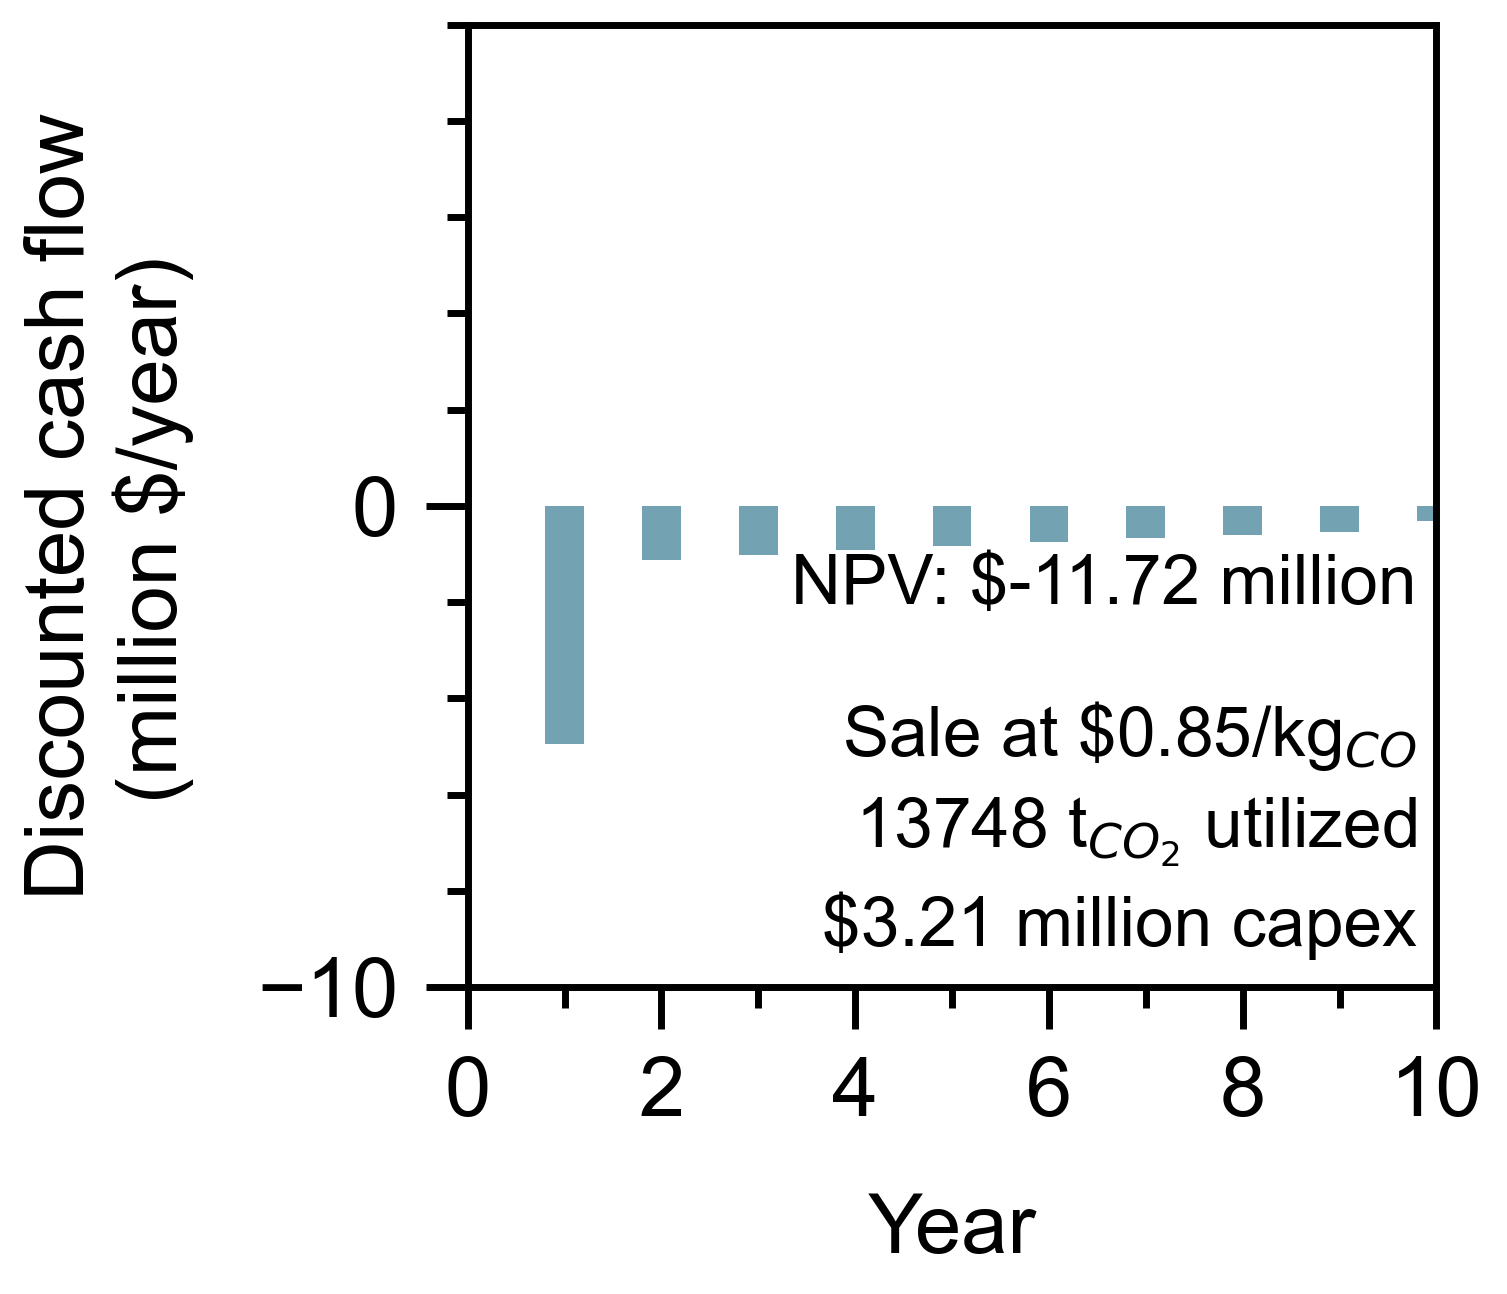

In [574]:
if override_single == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    y_axis_max = max(10, (np.ceil(max(df_cashflows['Discounted cash flow'])/10e6) * 10e6) / 1e6) # round to nearest 0.01) # max(30 # max(10
    y_axis_min = np.floor(min(df_cashflows['Discounted cash flow'])/10e6) * 10e6 / 1e6 # round to nearest 0.01)
    y_axis_step = 10 # 10 # 30
    # y_axis_num = 6
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    # y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Discounted cash flow\n(million \$/year)  ')
    axs.set_xlabel('Year')

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    
    axs.bar(df_cashflows['Year'], df_cashflows['Discounted cash flow']/1e6,  
                width = barwidth, color = theme_colors[3],
               )
    
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.45 + y_axis_min,  
     'NPV: ${:.2f} million'.format(NPV/1e6 ), # All capex except working capital, which is recovered during operation
     ha='right', va='top', 
      fontsize = SMALL_SIZE)    
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.3 + y_axis_min,  
         'Sale at \${:.2f}/kg$_{{{}}}$'.format(product_cost_USD_kgprod, product_name),
         ha='right', va='top', 
          fontsize = SMALL_SIZE)        
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.2 + y_axis_min,  
         '{:.0f} t$_{{CO_2}}$ utilized'.format(CO2_captured_ton_total),
         ha='right', va='top', 
          fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.1 + y_axis_min,  
     '${:.2f} million capex'.format(df_capex_totals.loc[ 'Total permanent investment', 'Cost ($)']/1e6 ), # All capex except working capital, which is recovered during operation
     ha='right', va='top', 
      fontsize = SMALL_SIZE)  

    ## Save figure 
    DCF_fig_name = os.path.join(OP_folder, '{} Discounted cash flow {}'.format(current_date, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(DCF_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(DCF_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(DCF_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + DCF_fig_name)
    
    plt.show()

### 2.2.3 Cumulative value

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Cumulative cash flow 04-44PM


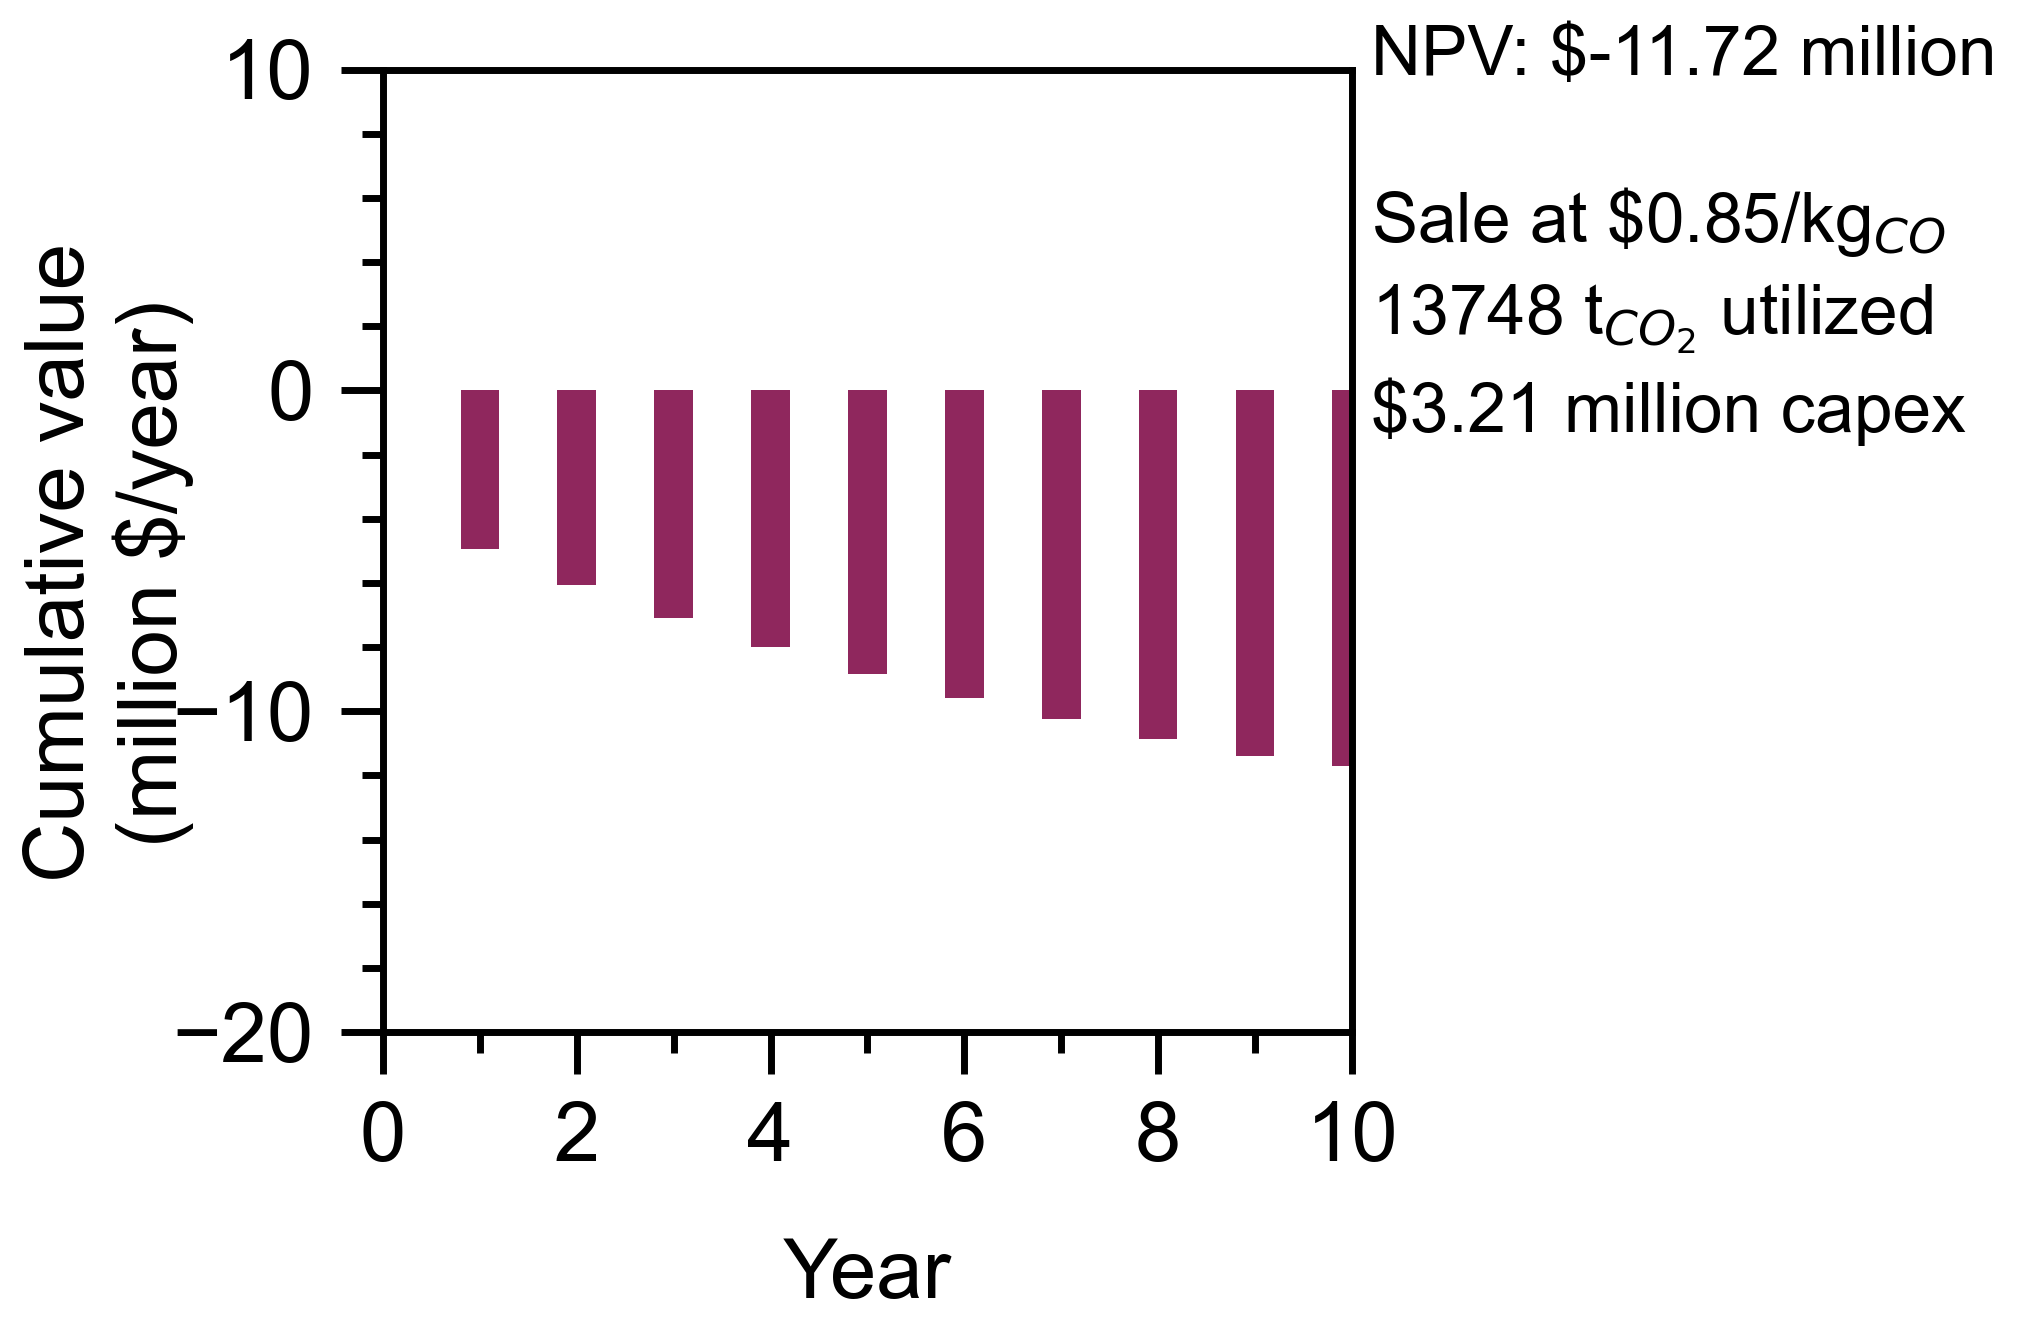

In [575]:
if override_single == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    y_axis_max = max(10, (np.ceil(max(df_cashflows['Cumulative'])/10e6) * 10e6) / 1e6) # round to nearest 0.01) # max(30 # max(10
    y_axis_min = np.floor(min(df_cashflows['Cumulative'])/10e6) * 10e6 / 1e6 # round to nearest 0.01)
    y_axis_step = 10 # 30 # 10
    # y_axis_num = 6
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Cumulative value \n (million \$/year)   ', fontsize = MEDIUM_SIZE, va = 'bottom')
    axs.yaxis.label.set_va('center')
    axs.set_xlabel('Year')

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    
    axs.bar(df_cashflows['Year'], df_cashflows['Cumulative']/1e6, 
                width = barwidth, color = theme_colors[2],
               )
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.98 + y_axis_min,  
     'NPV: ${:.2f} million'.format(NPV/1e6 ), # All capex except working capital, which is recovered during operation
     ha='left', va='bottom', 
      fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.88 + y_axis_min, 
         'Sale at \${:.2f}/kg$_{{{}}}$'.format(product_cost_USD_kgprod, product_name),
         ha='left', va='top', 
          fontsize = SMALL_SIZE)        
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.78 + y_axis_min, 
         '{:.0f} t$_{{CO_2}}$ utilized'.format(CO2_captured_ton_total),
         ha='left', va='top', 
          fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.68 + y_axis_min,  
     '${:.2f} million capex'.format(df_capex_totals.loc[ 'Total permanent investment', 'Cost ($)']/1e6 ), # All capex except working capital, which is recovered during operation
     ha='left', va='top', 
      fontsize = SMALL_SIZE)  
         
    ## Save figure 
    cumulative_fig_name = os.path.join(OP_folder, '{} Cumulative cash flow {}'.format(current_date, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(cumulative_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(cumulative_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(cumulative_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + cumulative_fig_name)
    
    plt.show()

## 2.3 Profitability measures at breakeven price

In [576]:
if override_single == True:
    # Calculate NPV at 15% interest rate
    df_cashflows, cashflows, NPV = cashflow_years(    
        plant_lifetime = int(lifetime_years),
        depreciation_schedule = 'linear', # 'MACRS' or 'linear'
        D = 0, # optional, used for MACRS only - depreciation%
        depreciation_lifetime = 12, # at roughly 8% depreciation per year, used elsewhere. optional, used for linear only - total time before salvage value is recovered
        salvage_value = 0, # conservative assumption. optional, used for linear only - fraction of original capital that is recovered
        interest = 0.15, # typical assumption
        f = 0.03, # typical inflation %
        sales = (product_rate_kg_day * capacity_factor * 365 * breakeven_price_USD_kgprod) + (df_streams.loc['H2 outlet', 'Mass flow rate (kg/day)'] * capacity_factor * 365 * H2_cost_USD_kgH2),
        production_cost = df_opex_totals.loc['Production cost', 'Cost ($/yr)'], 
        C_TDC = df_capex_totals.loc['Total depreciable capital', 'Cost ($)'], # df_capex_totals.loc['Total depreciable capital', 'Cost ($)'] 
        C_WC = df_capex_totals.loc['Working capital', 'Cost ($)'],
        t = 0.26, # tax in % per year,
        )

### 2.3.1 Discounted cash flow

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Discounted cash flow at breakeven cost 04-44PM


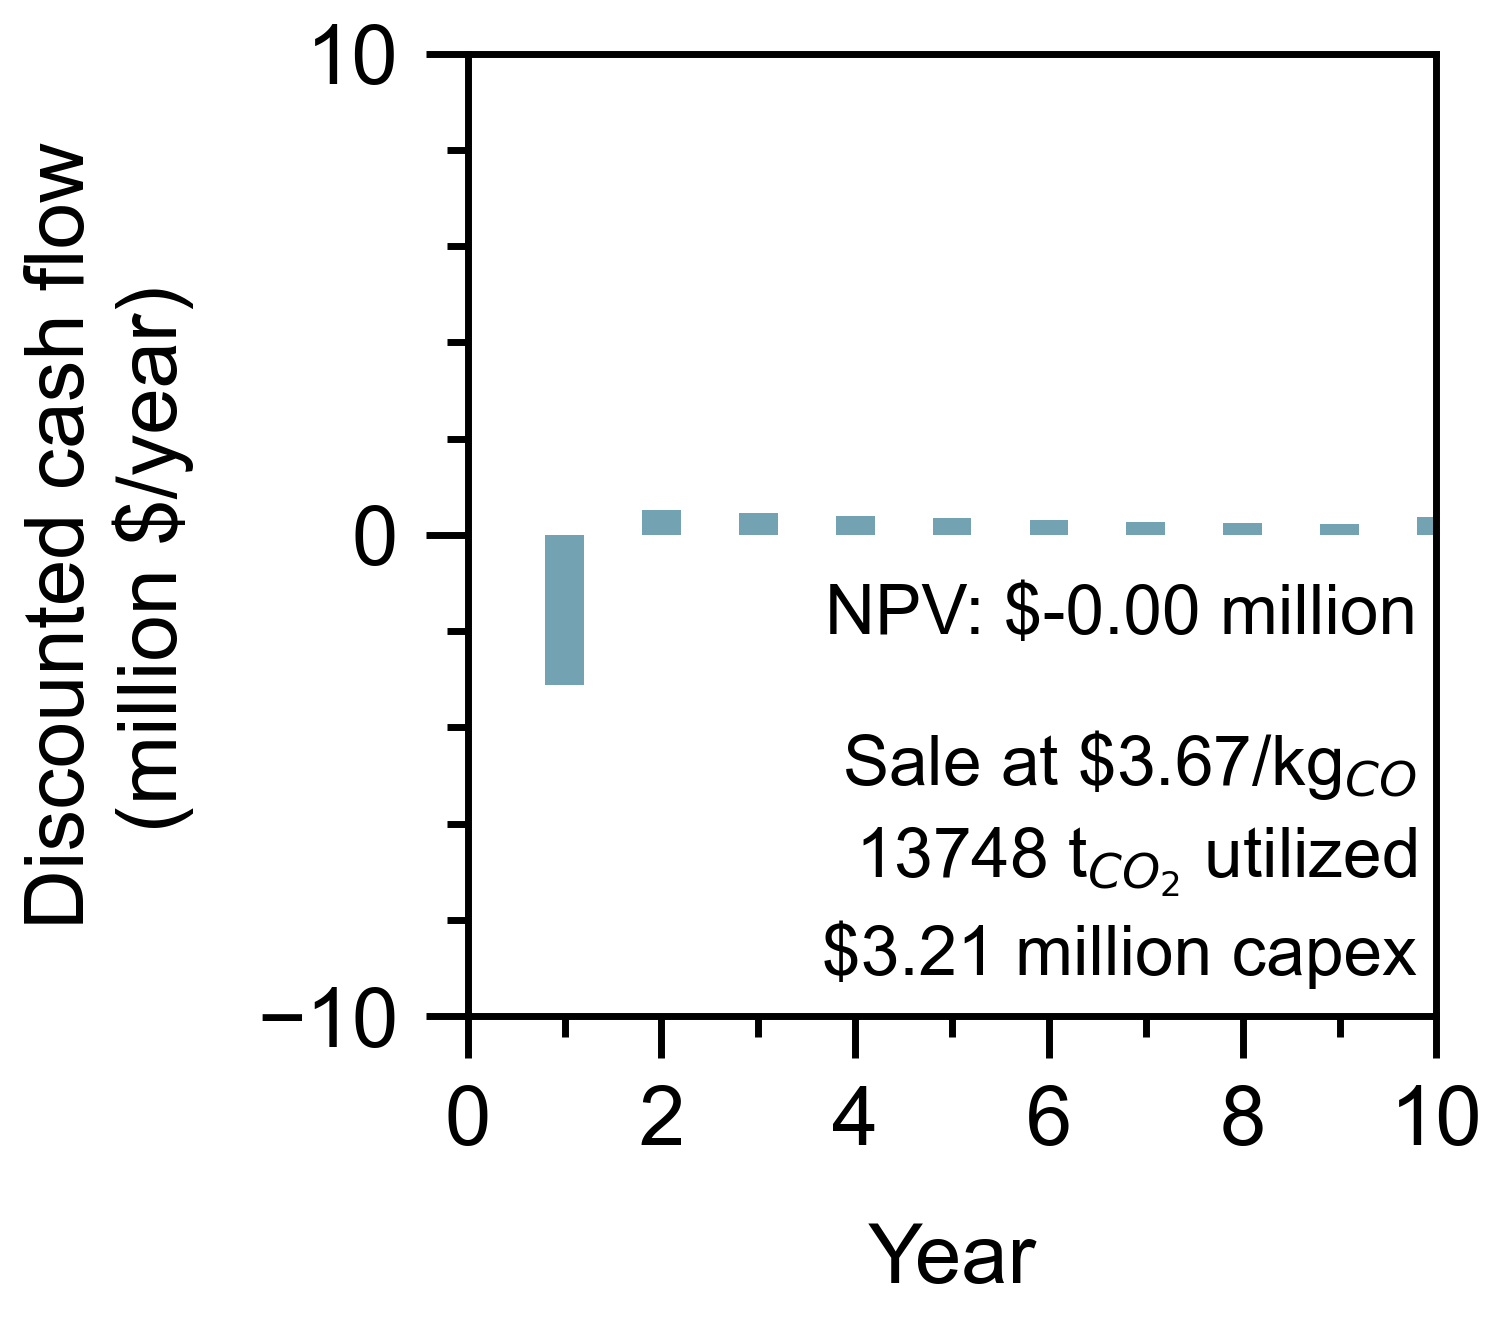

In [577]:
if override_single == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    y_axis_max = max(10, (np.ceil(max(df_cashflows['Discounted cash flow'])/10e6) * 10e6) / 1e6) # round to nearest 0.01) # max(20 # max(10
    y_axis_min = np.floor(min(df_cashflows['Discounted cash flow'])/10e6) * 10e6 / 1e6 # round to nearest 0.01)
    y_axis_step = 10 # 20 # 10
    # y_axis_num = 6
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_sticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Discounted cash flow\n(million \$/year)  ')
    axs.set_xlabel('Year')

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    
    axs.bar(df_cashflows['Year'], df_cashflows['Discounted cash flow']/1e6, 
                width = barwidth, color = theme_colors[3],
               )
    
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.45 + y_axis_min,  
     'NPV: ${:.2f} million'.format(NPV/1e6 ), # All capex except working capital, which is recovered during operation
     ha='right', va='top', 
      fontsize = SMALL_SIZE)    
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.3 + y_axis_min,  
         'Sale at \${:.2f}/kg$_{{{}}}$'.format(breakeven_price_USD_kgprod, product_name),
         ha='right', va='top', 
          fontsize = SMALL_SIZE)        
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.2 + y_axis_min,  
         '{:.0f} t$_{{CO_2}}$ utilized'.format(CO2_captured_ton_total),
         ha='right', va='top', 
          fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 0.98, (y_axis_max - y_axis_min )* 0.1 + y_axis_min,  
     '${:.2f} million capex'.format(df_capex_totals.loc[ 'Total permanent investment', 'Cost ($)']/1e6 ), # All capex except working capital, which is recovered during operation
     ha='right', va='top', 
      fontsize = SMALL_SIZE)    
    
    ## Save figure 
    DCF_breakeven_fig_name = os.path.join(OP_folder, '{} Discounted cash flow at breakeven cost {}'.format(current_date, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(DCF_breakeven_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(DCF_breakeven_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(DCF_breakeven_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + DCF_breakeven_fig_name)
    
    plt.show()

### 2.3.2 Cumulative cash flow

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Cumulative cash flow at breakeven price 04-44PM


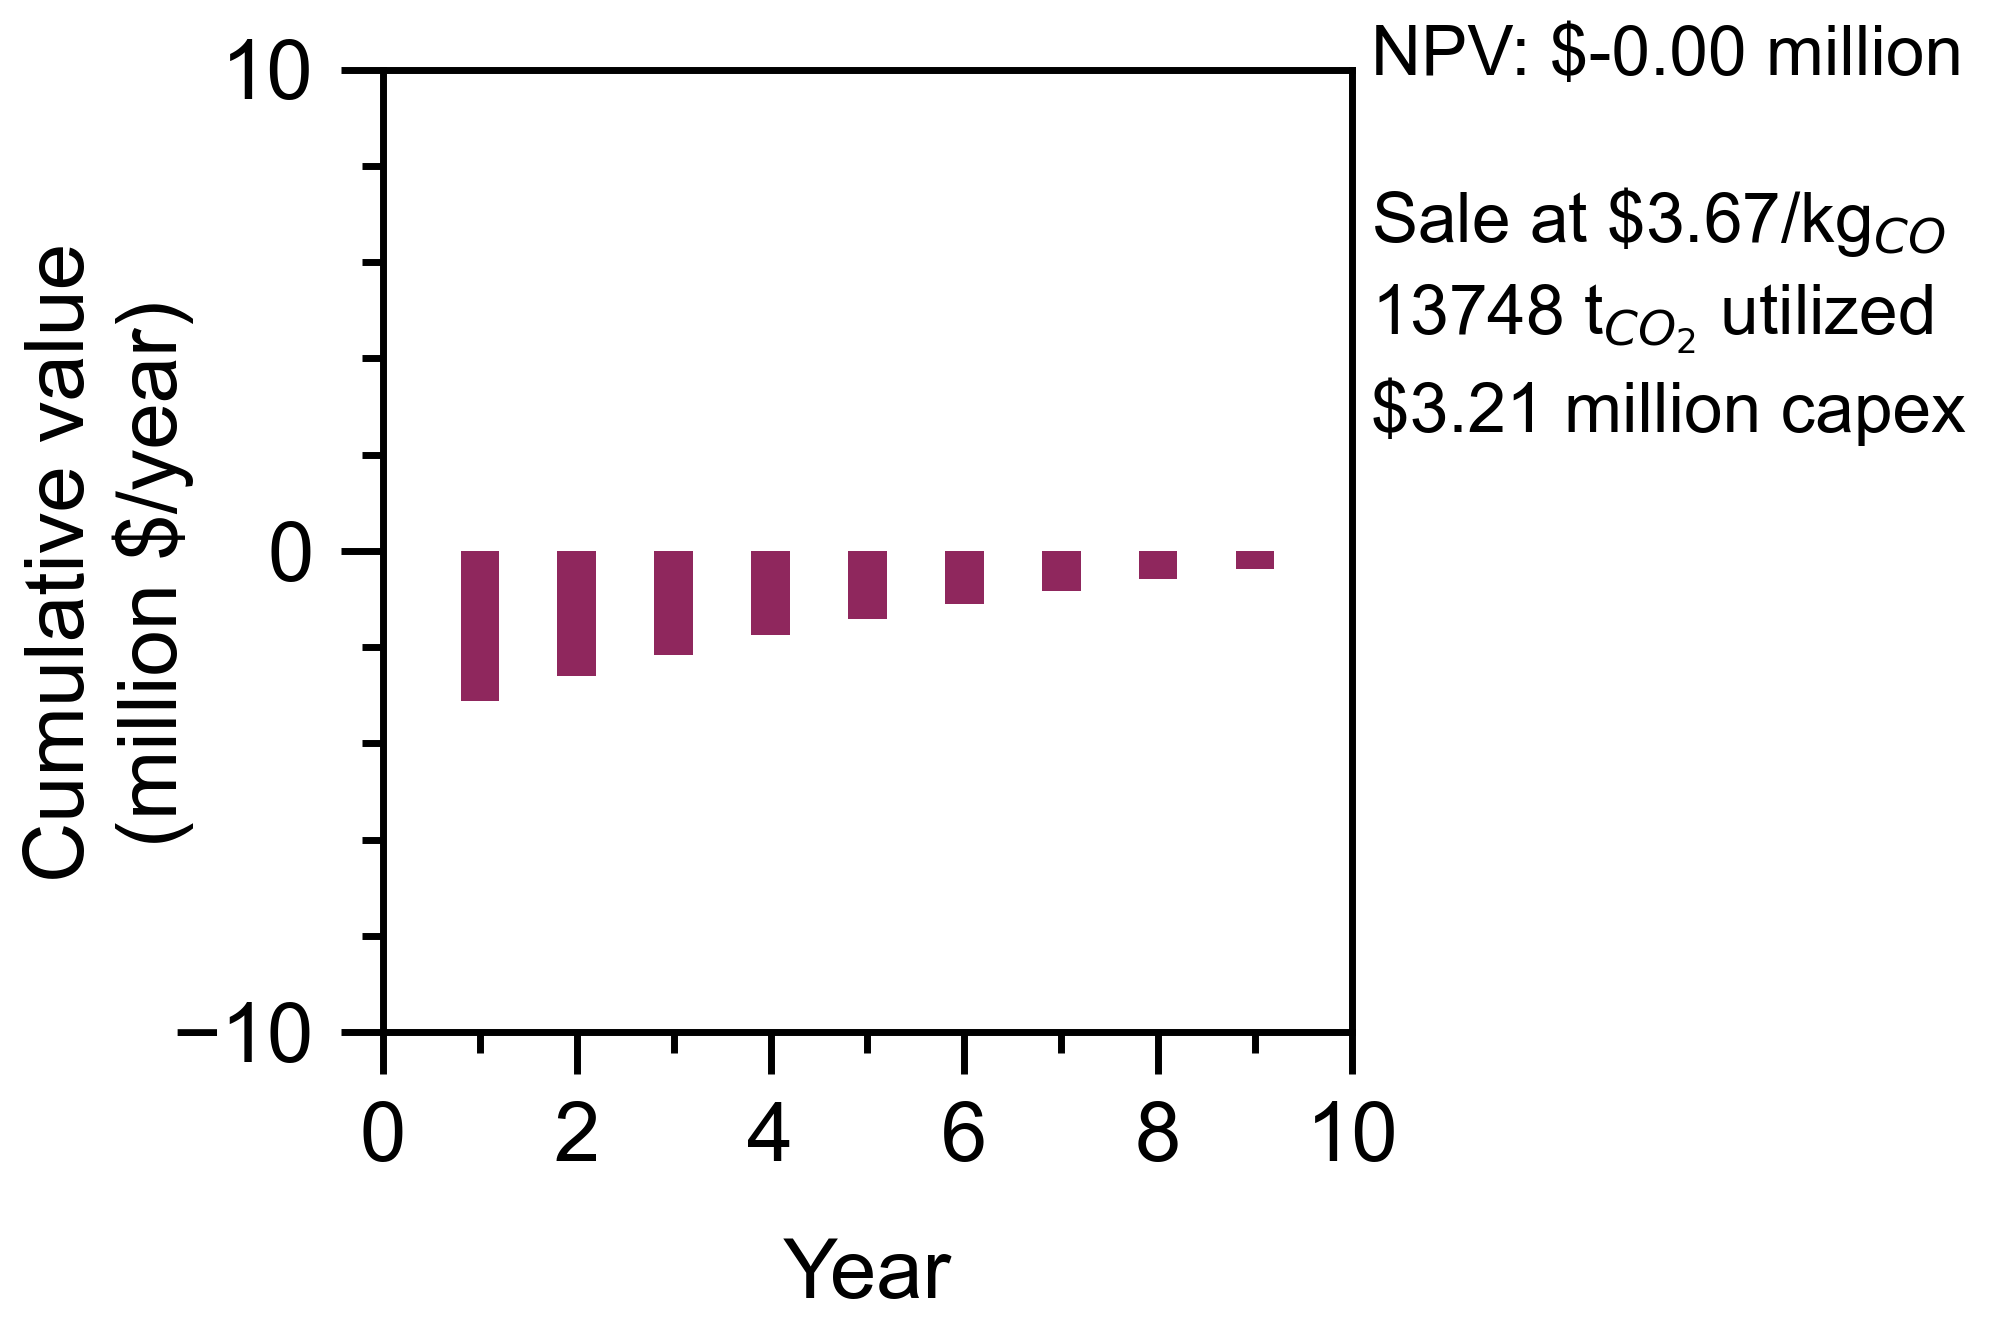

In [578]:
if override_single == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    y_axis_max = max(10, (np.ceil(max(df_cashflows['Cumulative'])/10e6) * 10e6) / 1e6) # round to nearest 0.01) # max(20 # max(10
    y_axis_min = np.floor(min(df_cashflows['Cumulative'])/10e6) * 10e6 / 1e6 # round to nearest 0.01)
    y_axis_step = 10 # 20 # 10
    # y_axis_num = 5
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Cumulative value \n (million \$/year)   ', fontsize = MEDIUM_SIZE, va = 'bottom')
    axs.yaxis.label.set_va('center')
    axs.set_xlabel('Year')

    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.98 + y_axis_min,  
     'NPV: ${:.2f} million'.format(NPV/1e6 ), # All capex except working capital, which is recovered during operation
     ha='left', va='bottom', 
      fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.88 + y_axis_min, 
         'Sale at \${:.2f}/kg$_{{{}}}$'.format(breakeven_price_USD_kgprod, product_name),
         ha='left', va='top', 
          fontsize = SMALL_SIZE)        
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.78 + y_axis_min, 
         '{:.0f} t$_{{CO_2}}$ utilized'.format(CO2_captured_ton_total),
         ha='left', va='top', 
          fontsize = SMALL_SIZE)   
    axs.text(x_axis_max * 1.02, (y_axis_max - y_axis_min )* 0.68 + y_axis_min,  
     '${:.2f} million capex'.format(df_capex_totals.loc[ 'Total permanent investment', 'Cost ($)']/1e6 ), # All capex except working capital, which is recovered during operation
     ha='left', va='top', 
      fontsize = SMALL_SIZE) 
    
    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    
    axs.bar(df_cashflows['Year'], df_cashflows['Cumulative']/1e6, 
                width = barwidth, color = theme_colors[2],
               )
        
    ## Save figure 
    cumulative_breakeven_fig_name = os.path.join(OP_folder, '{} Cumulative cash flow at breakeven price {}'.format(current_date, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(cumulative_breakeven_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(cumulative_breakeven_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(cumulative_breakeven_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    
    print('Saved at ' + cumulative_breakeven_fig_name)
    
    plt.show()

# 3. Coarse optimization framework

In [579]:
## Run optimization? 

answer = input('Do you want to run an optimization? y/n \n \n')
if answer == 'y':
    override_optimization = True
    print('Running optimization')
else:
    override_optimization = False

## 3.1 Setup

In [580]:
## Make decisions about FE-SPC tradeoff
if override_optimization:
    answer = input('Do you want to model the FE-SPC tradeoff using catholyte model? y/n \n \n')

    if answer.lower() == 'y':
        model_FE = 'Kas'
        print('Using Kas and Smith model for FE-SPC tradeoff')

    else:
        # model_FE = 'Hawks'
        # print('Using Hawks and Baker model for FE-SPC tradeoff')
        # SPC = 0.410 # Uncomment for Fig 4i
        
        # SPC = 0.187 # Uncomment for Fig S_d-f, S_g-i        
        
        # SPC = 0.362 # Uncomment for Fig 4f
        # R_ohmcm2 = 16.67 # Uncomment for Fig 4f, S_d-f
        # j_total_mA_cm2 = 126 # Uncomment for Fig 4f, S_d-f
                
        model_FE = None
        print('Using manually specified selectivity - NO model')
        
        SPC_original = SPC # Uncomment for Fig 4f, 4i, S_d-f, S_g-i

In [581]:
## Make decisions about battery

if override_optimization:
    answer = input('Do you want to include a battery system? y/n \n \n')

    if answer.lower() == 'y':
                
        # Handle battery to flatten curve and maximize capacity
        is_battery = True
        avbl_renewables = float(input('What is the minimum fraction of time when renewables power the electrolyzer? \n \n'))
        
    else:
        is_battery = False
        battery_capacity = 0

## 3.2 Cost functions

### 3.2.1 Levelized cost 

In [582]:
def levelized_vs_j(X):
    __, __, __, __, __, __,\
    __, __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __ = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = SPC, 
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down

In [583]:
def levelized_vs_SPC(X):
    __, __, __, __, __, __,\
    __, __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __ = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                             
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = j_total_mA_cm2,
                            SPC = X[0],  # MODIFIED
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr, 
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down

In [584]:
def levelized_vs_multi(X):
    __, __, __, __, __, __,\
    __, __, __,  __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __ = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = X[1], # MODIFIED
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[1]*1e12 # large number, but linearly dependent on SPC - this will bring it down
    # return X[0]**2 + X[1]**3

### 3.2.2 Opex

In [585]:
def opex_vs_j(X):
    __, __, __, __, __, __,\
    __, __, __,  __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __  = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                             
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = SPC, 
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down
    

In [586]:
def opex_vs_SPC(X):
    __, __, __, __, __, __,\
    __, __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __  = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = j_total_mA_cm2,
                            SPC = X[0],  # MODIFIED
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down
    

In [587]:
def opex_vs_multi(X):
    __, __, __, __, __, __,\
    __, __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __  = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                             
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = X[1],  # MODIFIED
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return 1e3*df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
    else:
        return X[1]*1e12 # large number, but linearly dependent on X - this will bring it down
    

### 3.2.3 Capex

In [588]:
def capex_vs_j(X):
    __, df_capex_totals, __, __, __, __,\
    __, __, __, __, __, __, __, __, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __ = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = SPC, 
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return df_capex_totals.loc['Total permanent investment', 'Cost ($)']
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down
    

In [589]:
def capex_vs_SPC(X):
    __, df_capex_totals, __, __, __, __,\
    __, __, __, __, __, __, __, __, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __  = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                             
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = j_total_mA_cm2,
                            SPC = X[0],  # MODIFIED
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return df_capex_totals.loc['Total permanent investment', 'Cost ($)']
    else:
        return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down
    

In [590]:
def capex_vs_multi(X):
    __, df_capex_totals, __, __, __, __,\
    __, __, __, __, __, __, __, __, df_outlet_assumptions,\
    __, __, __, __, __, __, __, __, \
    __, __, __, __  = single_run_nonaq(product_name = product_name,  
                            solvent_name = solvent_name, 
                            supporting_electrolyte_name = supporting_electrolyte_name,
                            df_products = df_products, 
                            
                            product_rate_kg_day = product_rate_kg_day, 
                            model_FE = model_FE,  
                            FE_CO2R_0 = FE_CO2R_0, 
                            FE_product_specified = FE_product_specified, 
                            j_total_mA_cm2 = X[0], # MODIFIED
                            SPC = X[1], # MODIFIED 
                            crossover_ratio = crossover_ratio, 
                            P = P, 
                            T_streams = T_streams, 

                            R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                            electrolyte_thickness_cm = electrolyte_thickness_cm,
                            
                            an_E_eqm = an_E_eqm,
                            an_eta_ref = an_eta_ref, 
                            an_Tafel_slope = an_Tafel_slope, 
                            an_j_ref = an_j_ref, 

                            cathode_outlet_humidity = cathode_outlet_humidity,
                            excess_water_ratio = excess_water_ratio,
                            excess_solvent_ratio = excess_solvent_ratio,
                            catholyte_conc_M = catholyte_conc_M, 
                            anolyte_conc_M = anolyte_conc_M,  
                            water_density_kg_m3 = water_density_kg_m3,
                            electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                            solvent_loss_fraction = solvent_loss_fraction,
                            
                            LL_second_law_efficiency = LL_second_law_efficiency, 
                            PSA_second_law_efficiency = PSA_second_law_efficiency, 
                            T_sep = T_sep, 
                            CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                            
                            carbon_capture_efficiency = carbon_capture_efficiency,
                            electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                            heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                            
                            electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                            heat_cost_USD_kWh = heat_cost_USD_kWh,
                            product_cost_USD_kgprod = product_cost_USD_kgprod,
                            H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                            water_cost_USD_kg = water_cost_USD_kg,
                            CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                            electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                            PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                            LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                            solvent_cost_USD_kg = solvent_cost_USD_kg,
                            electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                            
                            lifetime_years = lifetime_years,
                            stack_lifetime_years = stack_lifetime_years,
                            capacity_factor = capacity_factor,
                            
                            battery_capex_USD_kWh = battery_capex_USD_kWh,               
                            battery_capacity = battery_capacity, 
                            
                            viscosity_cP = viscosity_cP,              
                            kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                            
                            overridden_vbl = '', # No overrides per run
                            overridden_value = np.NaN, # No overrides per run
                            overridden_unit = '', # No overrides per run
                            override_optimization =  override_optimization, # No overrides per run
                            exponent = exponent, 
                            scaling = scaling,
                            
                            MW_CO2 = MW_CO2, 
                            MW_H2O = MW_H2O, 
                            MW_O2 = MW_O2,  
                            MW_MX = MW_K2CO3, # Anode salt specified here
                            MW_solvent = MW_solvent, 
                            MW_supporting = MW_supporting,
                            ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                            R = R,
                            F = F) 
    if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
        return df_capex_totals.loc['Total permanent investment', 'Cost ($)']
    else:
        return X[1]*1e12 # large number, but linearly dependent on X - this will bring it down

## 3.3 Optimization

### 3.3.1 Define constraints, bounds and initial guess

In [591]:
if override_optimization == True:
    j0 = [j_total_mA_cm2] # Initial guess on current density
    SPC0 = [SPC] # Initial guess on single-pass conversion
    multi0 = [j_total_mA_cm2,
              SPC]

In [592]:
if override_optimization == True:
    j_bounds = [
          (1, 2000), # SPC,
         ]
    SPC_bounds = [ 
          (1e-5, 0.9999), # SPC,
         ]
    multi_bounds = [
          (1, 2000), # j_total_mA_cm2, 
          (5e-3, 0.9999), # SPC,
         ]

### 3.3.2 Run univariate minimization

In [593]:
## Get optimal current density
if override_optimization == True:

    # Define the inequality constraint
    def ineq_constraint(x):
        return x[0] - x[1] + 1

    # Initial guess
    x0 = np.array([0.5, 0.5])

    # constraints = (
    #                 # {'type': 'eq', 'fun': eq_constraint},
    #                 {'type': 'ineq', 'fun': ineq_constraint}
    #                 )

    j_optim_result = optimize.minimize(fun = levelized_vs_j, # opex_vs_j # capex_vs_j # levelized_vs_j
                                        x0 = j0,
                                        bounds = j_bounds,)
                                        # constraints = constraints)
    print(j_optim_result)

    j_total_mA_cm2_optim = j_optim_result.x[0]
    j_total_mA_cm2_optim

In [594]:
## Get optimal single-pass conversion
if override_optimization == True:
    SPC_optim_result = optimize.minimize(fun = levelized_vs_SPC,  # opex_vs_SPC # capex_vs_SPC # levelized_vs_SPC
                                        x0 = SPC0,
                                        bounds = SPC_bounds)
    print(SPC_optim_result)

    SPC_optim = SPC_optim_result.x[0]
    SPC_optim

### 3.3.3 Run bivariate minimimization

In [595]:
## Get optimal single-pass conversion
if override_optimization == True:
    multi_optim_result = optimize.minimize(fun = levelized_vs_multi,  # opex_vs_multi # capex_vs_multi # levelized_vs_multi
                                        x0 = multi0,
                                        bounds = multi_bounds)
    print(multi_optim_result)

    j_total_mA_cm2_optim = multi_optim_result.x[0]
    SPC_optim = multi_optim_result.x[1]

## 3.4 Testing optimization against a single variable change

In [596]:
# # Test optimization over a range of values 
# if override_optimization:
#         # Clear flags
#     df_flags['T/F?'] = False # add column for truth value of given override
    
#     display(df_flags.reset_index(inplace = False, drop = False)) # print df_flags

#     vbl_row = input('Enter a row number from the below table: \n ')
#     vbl_row = int(vbl_row) # convert input into integer
#     vbl_name = df_flags.index[vbl_row] # set vbl_name from that row
#     vbl_unit = df_flags['Unit'].iloc[vbl_row] # set vbl_unit from that row
#     df_flags.iloc[vbl_row, 6] = True # set that flag to be True
    
#     override_one = True # are you varying any basis? set to true by default, below will falsify if needed

In [597]:
# ### Get user to input variables to calculate process costs over

# if override_optimization == True:
#     answer = input('Change from default range? (y/n) \n \n')
    
#     default_vbl_num = 41 # Number of datapoints to generate in general. In paper, this is 41
    
#     if answer.lower() != 'y':
#         vbl_min = df_flags.loc[vbl_name, 'Range min']
#         vbl_max = df_flags.loc[vbl_name, 'Range max']
#         vbl_unit = df_flags['Unit'].loc[vbl_name] # set vbl_unit from that row
#         vbl_range = np.linspace(start = vbl_min, stop = vbl_max, num = default_vbl_num, endpoint = True)
#         answer_range = 2

#     else:  
#         vbl_min, vbl_max, vbl_range, answer_range = generate_range(vbl_name)
        
#     vbl_range_text = ['{} {}'.format(x, vbl_unit) for x in vbl_range]
#     print(vbl_range_text)

In [598]:
# ### Generate modeling results for variable range 

# if override_optimization == True:
#     #### Create empty variables     
#     # # Storage for individual runs
#     dict_stream_tables = {}
#     dict_econ_tables = {}

#     # Storage for summary results across varied independent variable
#     df_potentials_vs_vbl = pd.DataFrame()
#     df_energy_vs_vbl = pd.DataFrame()
#     df_emissions_vs_vbl = pd.DataFrame()
#     df_electrolyzer_assumptions_vs_vbl = pd.DataFrame()
#     df_outlet_assumptions_vs_vbl = pd.DataFrame()
#     df_opex_vs_vbl = pd.DataFrame()
#     df_opex_totals_vs_vbl = pd.DataFrame()
#     df_capex_BM_vs_vbl = pd.DataFrame()
#     df_capex_totals_vs_vbl = pd.DataFrame()
#     df_costing_assumptions_vs_vbl = pd.DataFrame()
#     df_sales_vs_vbl = pd.DataFrame()

#     #### Loop through variable
  
#     for vbl in vbl_range:
        
#         ### Update variable in its place
#         if vbl_name != 'Cell voltage' and vbl_name != 'Cathodic overpotential' and vbl_name != 'Anodic overpotential':
#             value_original = globals()[df_flags.loc[vbl_name,'Python variable']] # Save the original value of the adjusted variable
#             globals()[df_flags.loc[vbl_name,'Python variable']] = vbl # Overwrite the global variable whose override flag is True

#         ### Generate physical and costing model
        
#         # Handle battery to flatten curve
#         if is_battery:
#             battery_capacity = 1 - avbl_renewables # assumes daily storage battery
#             capacity_factor = 350/365 # capacity is re-maximized
#         else:
#             battery_capacity = 0

#         # TODO: give these as arguments rather than redefining the function itself
#         def levelized_vs_multi(X):
#             df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
#             df_energy, df_feedstocks, df_general, df_maintenance,  df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
#             df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
#             cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  solvent_name = solvent_name, supporting_electrolyte_name = supporting_electrolyte_name,
#                                                                 product_rate_kg_day = product_rate_kg_day, 
#                                                                 df_products = df_products, 
#                                                                 FE_CO2R_0 = FE_CO2R_0, 
#                                                                 FE_product_specified = FE_product_specified, 
#                                                                 j_total_mA_cm2 = X[0], # MODIFIED
#                                                                 SPC = X[1], # MODIFIED
#                                                                 crossover_ratio = crossover_ratio, 
#                                                                 model_FE = model_FE, 
#                                                                 overridden_vbl = '', 
#                                                                 overridden_value = np.NaN, overridden_unit = '', 
#                                                                 override_optimization = override_optimization, 
#                                                                 P = P, T_streams = T_streams,         R_membrane_ohmcm2 = R_membrane_ohmcm2, viscosity_cP = viscosity_cP,   kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
#                                                                 an_E_eqm = an_E_eqm,
#                                                                 an_eta_ref = an_eta_ref,
#                                                                 an_Tafel_slope = an_Tafel_slope,
#                                                                 an_j_ref = an_j_ref,
#                                                                 MW_CO2 = MW_CO2, MW_H2O = MW_H2O, 
#                                                                 MW_O2 = MW_O2,  MW_MX = MW_K2CO3,
#                                                                 ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
#                                                                 cathode_outlet_humidity = cathode_outlet_humidity,
#                                                                 excess_water_ratio = excess_water_ratio, 
#                                                                 excess_solvent_ratio = excess_solvent_ratio,
#                                                                 catholyte_conc_M = catholyte_conc_M, anolyte_conc_M = anolyte_conc_M,  
#                                                                 density_kgm3 = density_kgm3,
#                                                                 PSA_second_law_efficiency = PSA_second_law_efficiency, 
#                                                                 T_sep = T_sep, CO2_solubility_mol_mol = CO2_solubility_mol_mol,electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
#                                                                 heat_cost_USD_kWh = heat_cost_USD_kWh,
#                                                                 electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
#                                                                 heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
#                                                                 product_cost_USD_kgprod = product_cost_USD_kgprod,
#                                                                 H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
#                                                                 water_cost_USD_kg = water_cost_USD_kg,
#                                                                 CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
#                                                                 lifetime_years = lifetime_years,
#                                                                 stack_lifetime_years = stack_lifetime_years,
#                                                                 electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
#                                                                 PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
#                                                                 LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
#                                                                 capacity_factor = capacity_factor,
#                                                                 battery_capex_USD_kWh = battery_capex_USD_kWh,               
#                                                                 battery_capacity = battery_capacity,
#                                                                 carbon_capture_efficiency = carbon_capture_efficiency,
#                                                                 exponent=exponent, 
#                                                                 scaling=scaling,
#                                                                 R = R,
#                                                                 F = F)
#             if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
#                 return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
#             else:
#                 return X[1]*1e12 # large number, but linearly dependent on SPC - this will bring it down
#             # return X[0]**2 + X[1]**3

#         # Extract optimal jtotal and SPC
#         multi_optim_result = optimize.minimize(fun = levelized_vs_multi,  # opex_vs_multi # capex_vs_multi # levelized_vs_multi
#                                         x0 = multi0,
#                                         bounds = multi_bounds)

#         j_total_mA_cm2_optim = multi_optim_result.x[0]
#         SPC_optim = multi_optim_result.x[1]
        
#         ### Generate physical and costing model
#         df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
#             df_energy, df_feedstocks, df_general, df_maintenance,  df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
#             df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
#             cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  solvent_name = solvent_name, supporting_electrolyte_name = supporting_electrolyte_name,
#                                                                         product_rate_kg_day = product_rate_kg_day, 
#                                                                         df_products = df_products, FE_CO2R_0 = FE_CO2R_0, 
#                                                                         FE_product_specified = FE_product_specified, 
#                                                                         j_total_mA_cm2 = j_total_mA_cm2_optim,
#                                                                         SPC = SPC_optim, 
#                                                                         crossover_ratio = crossover_ratio, 
#                                                                         model_FE = model_FE, 
#                                                                         overridden_vbl = vbl_name, 
#                                                                         overridden_value = vbl, overridden_unit = vbl_unit, 
#                                                                         override_optimization =  override_optimization, 
#                                                                         P = P, T_streams = T_streams,         R_membrane_ohmcm2 = R_membrane_ohmcm2,                     viscosity_cP = viscosity_cP,                   
#                                                                         kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
#                                                                         an_E_eqm = an_E_eqm,
#                                                                         an_eta_ref = an_eta_ref,
#                                                                         an_Tafel_slope = an_Tafel_slope,
#                                                                         an_j_ref = an_j_ref,
#                                                                         MW_CO2 = MW_CO2, MW_H2O = MW_H2O, 
#                                                                         MW_O2 = MW_O2,  MW_MX = MW_K2CO3,
#                                                                         ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
#                                                                         cathode_outlet_humidity = cathode_outlet_humidity,
#                                                                         excess_water_ratio = excess_water_ratio,
#                                                                         excess_solvent_ratio = excess_solvent_ratio,
#                                                                         catholyte_conc_M = catholyte_conc_M, anolyte_conc_M = anolyte_conc_M,  
#                                                                         density_kgm3 = density_kgm3,
#                                                                         PSA_second_law_efficiency = PSA_second_law_efficiency, 
#                                                                         T_sep = T_sep, CO2_solubility_mol_mol = CO2_solubility_mol_mol,
#                                                                         electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
#                                                                         heat_cost_USD_kWh = heat_cost_USD_kWh,
#                                                                         electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
#                                                                         heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
#                                                                         product_cost_USD_kgprod = product_cost_USD_kgprod,
#                                                                         H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
#                                                                         water_cost_USD_kg = water_cost_USD_kg,
#                                                                         CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
#                                                                         electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
#                                                                         PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
#                                                                         LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
#                                                                         lifetime_years = lifetime_years,
#                                                                         stack_lifetime_years = stack_lifetime_years,
#                                                                         capacity_factor = capacity_factor,
#                                                                         battery_capex_USD_kWh = battery_capex_USD_kWh,               
#                                                                         battery_capacity = battery_capacity,
#                                                                         carbon_capture_efficiency = carbon_capture_efficiency,
#                                                                         exponent=exponent, 
#                                                                         scaling=scaling,
#                                                                         R = R,
#                                                                         F = F)
        
#         ### Store results of models                             
#         dict_stream_tables[vbl] = {
#             df_streams_formatted.index.name: df_streams_formatted, 
#             df_electrolyzer_assumptions.index.name: df_electrolyzer_assumptions, 
#             df_outlet_assumptions.index.name: df_outlet_assumptions, 
#             df_energy.index.name: df_energy,
#             df_potentials.index.name: df_potentials
#             }
        
#         dict_econ_tables[vbl] = {
#              df_costing_assumptions.index.name: df_costing_assumptions, 
#              df_capex_BM.index.name: df_capex_BM,
#              df_capex_totals.index.name: df_capex_totals, 
#              df_opex.index.name: df_opex, 
#              df_opex_totals.index.name: df_opex_totals, 
#              df_sales.index.name: df_sales, 
#              df_feedstocks.index.name: df_feedstocks, 
#              df_utilities.index.name: df_utilities, 
#              df_operations.index.name: df_operations, 
#              df_replacement.index.name: df_replacement, 
#              df_maintenance.index.name: df_maintenance, 
#              df_overhead.index.name: df_overhead,
#              df_taxes.index.name: df_taxes, 
#              df_depreciation.index.name: df_depreciation, 
#              df_general.index.name: df_general,
#             }
        
#         df_potentials_vs_vbl = pd.concat([df_potentials_vs_vbl, 
#                                           df_potentials['Value']], axis = 1)  # Store cell voltages
#         df_energy_vs_vbl = pd.concat([df_energy_vs_vbl, 
#                                     df_energy['Energy (kJ/kg {})'.format(product_name)]], axis = 1) # Store energy utility for plotting
#         df_emissions_vs_vbl = pd.concat([df_emissions_vs_vbl, 
#                                          pd.concat([df_energy['Emissions (kg CO2/kg {})'.format(product_name)], pd.Series(df_outlet_assumptions.loc['Carbon capture loss', 'Value'])]) ], 
#                                         axis = 1) # Store emissions for plotting
#         df_electrolyzer_assumptions_vs_vbl = pd.concat([df_electrolyzer_assumptions_vs_vbl, 
#                                                         df_electrolyzer_assumptions['Value']], axis = 1) # Store assumptions
#         df_outlet_assumptions_vs_vbl = pd.concat([df_outlet_assumptions_vs_vbl, 
#                                                   df_outlet_assumptions['Value']], axis = 1) # Store assumptions
#         df_opex_vs_vbl = pd.concat([df_opex_vs_vbl, 
#                                     df_opex['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
#         df_opex_totals_vs_vbl = pd.concat([df_opex_totals_vs_vbl, 
#                                     df_opex_totals['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
#         df_capex_BM_vs_vbl = pd.concat([df_capex_BM_vs_vbl, 
#                                     df_capex_BM['Cost ($)']], axis = 1) # Store capex for plotting
#         df_capex_totals_vs_vbl = pd.concat([df_capex_totals_vs_vbl, 
#                                     df_capex_totals['Cost ($)']], axis = 1) # Store capex for plotting
#         df_costing_assumptions_vs_vbl = pd.concat([df_costing_assumptions_vs_vbl, 
#                                     df_costing_assumptions['Cost']], axis = 1) # Store costing assumptions for plotting
#         df_sales_vs_vbl = pd.concat([df_sales_vs_vbl, 
#                                     df_sales['Earnings ($/yr)']], axis = 1) # Store costing assumptions for plotting

#         ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
#         reset_constants()

#         print('Done testing {} = {:.2f} \n'.format(vbl_name, vbl))


In [599]:
# # Format completed "summary" dataframes

# if override_one == True:
    
#     for df in [df_energy_vs_vbl, df_potentials_vs_vbl,  df_emissions_vs_vbl,
#                    df_electrolyzer_assumptions_vs_vbl, df_outlet_assumptions_vs_vbl, df_costing_assumptions_vs_vbl, 
#                    df_capex_BM_vs_vbl, df_capex_totals_vs_vbl, df_opex_vs_vbl, df_opex_totals_vs_vbl, 
#                    df_sales_vs_vbl
#                   ]:
#         df.columns = vbl_range_text # rename columns
    
#     ## Rename index (rows) for collected dataframes; columns will be renamed in the next section
#     ## Add in units column but only after duplicating the df, otherwise indexing for plots is very complicated
#     df_electrolyzer_assumptions_vs_vbl.index = df_electrolyzer_assumptions.index
#     df_electrolyzer_assumptions_vs_vbl_2 = df_electrolyzer_assumptions_vs_vbl.copy()
#     df_electrolyzer_assumptions_vs_vbl_2.insert(0, 'Units', df_electrolyzer_assumptions['Units'])

#     df_outlet_assumptions_vs_vbl.index = df_outlet_assumptions.index
#     df_outlet_assumptions_vs_vbl_2 = df_outlet_assumptions_vs_vbl.copy()
#     df_outlet_assumptions_vs_vbl_2.insert(0, 'Units', df_outlet_assumptions['Units'])

#     df_costing_assumptions_vs_vbl.index = df_costing_assumptions.index
#     df_costing_assumptions_vs_vbl_2 = df_costing_assumptions_vs_vbl.copy()
#     df_costing_assumptions_vs_vbl_2.insert(0, 'Units', df_costing_assumptions['Units'])

#     df_potentials_vs_vbl.index = df_potentials.index
#     df_potentials_vs_vbl_2 = df_potentials_vs_vbl.copy()
#     df_potentials_vs_vbl_2.insert(0, 'Units', df_potentials['Units'])
    
#     df_opex_vs_vbl.index = df_opex.index
#     df_opex_vs_vbl_2 = df_opex_vs_vbl.copy()
#     df_opex_vs_vbl_2.insert(0, 'Units', '$/kg {}'.format(product_name))
    
#     df_sales_vs_vbl.index = df_sales.index
#     df_sales_vs_vbl_2 = df_sales_vs_vbl.copy()
#     df_sales_vs_vbl_2.insert(0, 'Units', '$/yr')

#     try:
#         df_capex_BM_vs_vbl.index = df_capex_BM.index 
#     except:
#         df_capex_BM_vs_vbl.index = np.append(df_capex_BM.index, 'Battery storage')
#     df_capex_BM_vs_vbl_2 = df_capex_BM_vs_vbl.copy()
#     df_capex_BM_vs_vbl_2.insert(0, 'Units', '$')

#     df_opex_totals_vs_vbl.index = df_opex_totals.index
#     df_opex_totals_vs_vbl_2 = df_opex_totals_vs_vbl.copy()
#     df_opex_totals_vs_vbl_2.insert(0, 'Units', '$/kg {}'.format(product_name))
   
#     df_capex_totals_vs_vbl.index = df_capex_totals.index
#     df_capex_totals_vs_vbl_2 = df_capex_totals_vs_vbl.copy()
#     df_capex_totals_vs_vbl_2.insert(0, 'Units', '$')
    
#     df_energy_vs_vbl.index = df_energy_vs_vbl.index    
#     df_energy_vs_vbl_2 = df_energy_vs_vbl.copy()    
#     df_energy_vs_vbl_2.index.name  = 'Energy'
#     df_energy_vs_vbl_2.insert(0, 'Units', 'kJ/kg {}'.format(product_name))
    
#     df_emissions_vs_vbl.index = np.append(df_energy.index, 'Carbon capture')
#     df_emissions_vs_vbl_2 = df_emissions_vs_vbl.copy()  
#     df_emissions_vs_vbl_2.index.name  = 'Emissions'
#     df_emissions_vs_vbl_2.insert(0, 'Units', 'kg CO2/kg {}'.format(product_name))

----

# 4. Single independent variable analysis

## 4.1 Choose independent variable

In [600]:
# Choose a variable to vary independently

answer = input('Do you want to vary a single assumption? y/n \n \n')

if answer.lower() == 'y':
    override_one = True # are you varying any basis? set to true by default, below will falsify if needed
else:
    override_one = False

In [601]:
if override_one:
    # Clear flags
    df_flags['T/F?'] = False # add column for truth value of given override
    
    display(df_flags.reset_index(inplace = False, drop = False)) # print df_flags

    vbl_row = input('Enter a row number from the below table: \n ')
    vbl_row = int(vbl_row) # convert input into integer
    vbl_name = df_flags.index[vbl_row] # set vbl_name from that row
    vbl_unit = df_flags['Unit'].iloc[vbl_row] # set vbl_unit from that row
    df_flags.iloc[vbl_row, 6] = True # set that flag to be True
    
    override_one = True # are you varying any basis? set to true by default, below will falsify if needed

## 4.2 Define variable range

In [602]:
### Get user to input variables to calculate process costs over

if override_one == True:
    answer = input('Change from default range? (y/n) \n \n')
    
    default_vbl_num = 41 # Number of datapoints to generate in general. In paper, this is 41
    
    if answer.lower() != 'y':
        vbl_min = df_flags.loc[vbl_name, 'Range min']
        vbl_max = df_flags.loc[vbl_name, 'Range max']
        vbl_unit = df_flags['Unit'].loc[vbl_name] # set vbl_unit from that row
        vbl_range = np.linspace(start = vbl_min, stop = vbl_max, num = default_vbl_num, endpoint = True)
        answer_range = 2

    else:  
        vbl_min, vbl_max, vbl_range, answer_range = generate_range(vbl_name)
        
    vbl_range_text = ['{} {}'.format(x, vbl_unit) for x in vbl_range]
    print(vbl_range_text)

In [603]:
## Make decisions about FE-SPC model
if override_one:
    answer = input('Do you want to model the FE-SPC tradeoff using catholyte model? y/n \n \n')

    if answer.lower() == 'y':
        model_FE = 'Kas'
        print('Using Kas and Smith model for FE-SPC tradeoff')

    else:
        # model_FE = 'Hawks'
        # print('Using Hawks and Baker model for FE-SPC tradeoff')
        # SPC = 0.410 # Uncomment for Fig 4i
        
        # SPC = 0.187 # Uncomment for Fig S_d-f, S_g-i        
        
        # SPC = 0.362 # Uncomment for Fig 4f
        # R_ohmcm2 = 16.67 # Uncomment for Fig 4f, S_d-f
        # j_total_mA_cm2 = 126 # Uncomment for Fig 4f, S_d-f
                
        model_FE = None
        print('Using manually specified selectivity - NO model')
        
        SPC_original = SPC # Uncomment for Fig 4f, 4i, S_d-f, S_g-i

In [604]:
## Make decisions about battery

if override_one:
    answer = input('Do you want to include a battery system? y/n \n \n')

    if answer.lower() == 'y':
                
        # Handle battery to flatten curve and maximize capacity
        is_battery = True
        avbl_renewables = float(input('What is the minimum fraction of time when renewables power the electrolyzer? \n \n'))
        #  0.23625
        
    else:
        is_battery = False
        battery_capacity = 0

## 4.3 Generate model over variable range

In [605]:
### Generate modeling results for variable range 

if override_one == True:
    #### Create empty variables
    # Storage for individual runs
    dict_stream_tables = {}
    dict_econ_tables = {}

    # Storage for summary results across varied independent variable
    df_potentials_vs_vbl = pd.DataFrame()
    df_energy_vs_vbl = pd.DataFrame()
    df_emissions_vs_vbl = pd.DataFrame()
    df_electrolyzer_assumptions_vs_vbl = pd.DataFrame()
    df_outlet_assumptions_vs_vbl = pd.DataFrame()
    df_opex_vs_vbl = pd.DataFrame()
    df_opex_totals_vs_vbl = pd.DataFrame()
    df_capex_BM_vs_vbl = pd.DataFrame()
    df_capex_totals_vs_vbl = pd.DataFrame()
    df_costing_assumptions_vs_vbl = pd.DataFrame()
    df_sales_vs_vbl = pd.DataFrame()

    #### Loop through variable

    for vbl in vbl_range:
        
        ### Update variable in its place
        if vbl_name != 'Cell voltage' and vbl_name != 'Cathodic overpotential' and vbl_name != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
            value_original = globals()[df_flags.loc[vbl_name,'Python variable']] # Save the original value of the adjusted variable
            globals()[df_flags.loc[vbl_name,'Python variable']] = vbl # Overwrite the global variable whose override flag is True

        ### Generate physical and costing model
        
        # Handle battery to flatten curve
        if is_battery:
            battery_capacity = 1 - avbl_renewables # assumes daily storage battery
            capacity_factor = 350/365 # capacity is re-maximized
        else:
            battery_capacity = 0
        
        ### Generate physical and costing model
        df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # MODIFIED
                                                                        overridden_value = vbl, # MODIFIED
                                                                        overridden_unit = vbl_unit, # MODIFIED
                                                                        override_optimization =  override_optimization, # MODIFIED
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
        
        
        ### Store results of models                             
        dict_stream_tables[vbl] = {
            df_streams_formatted.index.name: df_streams_formatted, 
            df_electrolyzer_assumptions.index.name: df_electrolyzer_assumptions, 
            df_outlet_assumptions.index.name: df_outlet_assumptions, 
            df_energy.index.name: df_energy,
            df_potentials.index.name: df_potentials
            }
        
        dict_econ_tables[vbl] = {
             df_costing_assumptions.index.name: df_costing_assumptions, 
             df_capex_BM.index.name: df_capex_BM,
             df_capex_totals.index.name: df_capex_totals, 
             df_opex.index.name: df_opex, 
             df_opex_totals.index.name: df_opex_totals, 
             df_sales.index.name: df_sales, 
             df_feedstocks.index.name: df_feedstocks, 
             df_utilities.index.name: df_utilities, 
             df_operations.index.name: df_operations, 
             df_maintenance.index.name: df_maintenance,  
             df_replacement.index.name : df_replacement,
             df_overhead.index.name: df_overhead,
             df_taxes.index.name: df_taxes, 
             df_depreciation.index.name: df_depreciation, 
             df_general.index.name: df_general,
            }
        
        df_potentials_vs_vbl = pd.concat([df_potentials_vs_vbl, 
                                          df_potentials['Value']], axis = 1)  # Store cell voltages
        df_energy_vs_vbl = pd.concat([df_energy_vs_vbl, 
                                    df_energy['Energy (kJ/kg {})'.format(product_name)]], axis = 1) # Store energy utility for plotting
        df_emissions_vs_vbl = pd.concat([df_emissions_vs_vbl, 
                                         pd.concat([df_energy['Emissions (kg CO2/kg {})'.format(product_name)], pd.Series(df_outlet_assumptions.loc['Carbon capture loss', 'Value'])]) ], 
                                        axis = 1) # Store emissions for plotting
        df_electrolyzer_assumptions_vs_vbl = pd.concat([df_electrolyzer_assumptions_vs_vbl, 
                                                        df_electrolyzer_assumptions['Value']], axis = 1) # Store assumptions
        df_outlet_assumptions_vs_vbl = pd.concat([df_outlet_assumptions_vs_vbl, 
                                                  df_outlet_assumptions['Value']], axis = 1) # Store assumptions
        df_opex_vs_vbl = pd.concat([df_opex_vs_vbl, 
                                    df_opex['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
        df_opex_totals_vs_vbl = pd.concat([df_opex_totals_vs_vbl, 
                                    df_opex_totals['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
        df_capex_BM_vs_vbl = pd.concat([df_capex_BM_vs_vbl, 
                                    df_capex_BM['Cost ($)']], axis = 1) # Store capex for plotting
        df_capex_totals_vs_vbl = pd.concat([df_capex_totals_vs_vbl, 
                                    df_capex_totals['Cost ($)']], axis = 1) # Store capex for plotting
        df_costing_assumptions_vs_vbl = pd.concat([df_costing_assumptions_vs_vbl, 
                                    df_costing_assumptions['Cost']], axis = 1) # Store costing assumptions for plotting
        df_sales_vs_vbl = pd.concat([df_sales_vs_vbl, 
                                    df_sales['Earnings ($/yr)']], axis = 1) # Store costing assumptions for plotting

        ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
        if vbl_name != 'Cell voltage' and vbl_name != 'Cathodic overpotential' and vbl_name != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
            globals()[df_flags.loc[vbl_name,'Python variable']] = value_original
            
        reset_constants()

        print('Done testing {} = {:.2f} \n'.format(vbl_name, vbl))

        ### End loop through variable value

In [606]:
# Format completed "summary" dataframes

if override_one == True:
    
    for df in [df_energy_vs_vbl, df_potentials_vs_vbl,  df_emissions_vs_vbl,
                   df_electrolyzer_assumptions_vs_vbl, df_outlet_assumptions_vs_vbl, df_costing_assumptions_vs_vbl, 
                   df_capex_BM_vs_vbl, df_capex_totals_vs_vbl, df_opex_vs_vbl, df_opex_totals_vs_vbl, 
                   df_sales_vs_vbl
                  ]:
        df.columns = vbl_range_text # rename columns
    
    ## Rename index (rows) for collected dataframes; columns will be renamed in the next section
    ## Add in units column but only after duplicating the df, otherwise indexing for plots is very complicated
    df_electrolyzer_assumptions_vs_vbl.index = df_electrolyzer_assumptions.index
    df_electrolyzer_assumptions_vs_vbl_2 = df_electrolyzer_assumptions_vs_vbl.copy()
    df_electrolyzer_assumptions_vs_vbl_2.insert(0, 'Units', df_electrolyzer_assumptions['Units'])

    df_outlet_assumptions_vs_vbl.index = df_outlet_assumptions.index
    df_outlet_assumptions_vs_vbl_2 = df_outlet_assumptions_vs_vbl.copy()
    df_outlet_assumptions_vs_vbl_2.insert(0, 'Units', df_outlet_assumptions['Units'])

    df_costing_assumptions_vs_vbl.index = df_costing_assumptions.index
    df_costing_assumptions_vs_vbl_2 = df_costing_assumptions_vs_vbl.copy()
    df_costing_assumptions_vs_vbl_2.insert(0, 'Units', df_costing_assumptions['Units'])

    df_potentials_vs_vbl.index = df_potentials.index
    df_potentials_vs_vbl_2 = df_potentials_vs_vbl.copy()
    df_potentials_vs_vbl_2.insert(0, 'Units', df_potentials['Units'])
    
    df_opex_vs_vbl.index = df_opex.index
    df_opex_vs_vbl_2 = df_opex_vs_vbl.copy()
    df_opex_vs_vbl_2.insert(0, 'Units', '$/kg {}'.format(product_name))
    
    df_sales_vs_vbl.index = df_sales.index
    df_sales_vs_vbl_2 = df_sales_vs_vbl.copy()
    df_sales_vs_vbl_2.insert(0, 'Units', '$/yr')

    try:
        df_capex_BM_vs_vbl.index = df_capex_BM.index 
    except:
        df_capex_BM_vs_vbl.index = np.append(df_capex_BM.index, 'Battery storage')
    df_capex_BM_vs_vbl_2 = df_capex_BM_vs_vbl.copy()
    df_capex_BM_vs_vbl_2.insert(0, 'Units', '$')

    df_opex_totals_vs_vbl.index = df_opex_totals.index
    df_opex_totals_vs_vbl_2 = df_opex_totals_vs_vbl.copy()
    df_opex_totals_vs_vbl_2.insert(0, 'Units', '$/kg {}'.format(product_name))
   
    df_capex_totals_vs_vbl.index = df_capex_totals.index
    df_capex_totals_vs_vbl_2 = df_capex_totals_vs_vbl.copy()
    df_capex_totals_vs_vbl_2.insert(0, 'Units', '$')
    
    df_energy_vs_vbl.index = df_energy_vs_vbl.index    
    df_energy_vs_vbl_2 = df_energy_vs_vbl.copy()    
    df_energy_vs_vbl_2.index.name  = 'Energy'
    df_energy_vs_vbl_2.insert(0, 'Units', 'kJ/kg {}'.format(product_name))
    
    df_emissions_vs_vbl.index = np.append( df_energy.index, 'Carbon capture')
    df_emissions_vs_vbl_2 = df_emissions_vs_vbl.copy()  
    df_emissions_vs_vbl_2.index.name  = 'Emissions'
    df_emissions_vs_vbl_2.insert(0, 'Units', 'kg CO2/kg {}'.format(product_name))

In [607]:
# vbl_range_text.insert(0, 'Units')

## 4.4. Plot formatting

### 4.4.1 Colors

In [608]:
### Define colors
## WARNING: HARDCODED!

if override_one == True:
    if is_battery:
        # Capex colors for bare modules
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_BM_vs_vbl.index)-1)] # battery gets its own color, so 1 less than capex length for other units
        BM_capex_colors.append('#cccccc') # add in battery 
    else:
        # Capex colors
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_BM_vs_vbl.index))]
        
    # Blues from 0.2 to 1 not bad but low contrast; YlGnbu not but looks jank with PuOr; winter_r is best
    # Opex colors
    opex_colors = [diverging(i) for i in np.linspace(0, 1, len(df_opex_vs_vbl.index))]
    #PuOr okay but low contrast at ends
    # Emissions colors
    emissions_colors = [RdYlBu(i) for i in np.linspace(0, 1, sum(~df_emissions_vs_vbl.T.isnull().all()) - 1 )  ] # len(df_energy_vs_vbl.index) - 2)] # last rows are totals

    # Potentials colors
    potentials_colors = [RdYlBu(i) for i in np.linspace(0, 1, np.shape(df_potentials_vs_vbl.iloc[2:7])[0] )  ] # last rows are totals

    # Energy colors
    energy_colors = emissions_colors # [RdYlBu(i) for i in np.linspace(0, 1, sum(~df_energy_vs_vbl.iloc[:-3].T.isnull().all())  )  ] # len(df_energy_vs_vbl.index) - 2)] # last rows are totals


### 4.4.2 x-axis ticks

In [609]:
if override_one == True:
    ## Define axis limits and ticks - see note below for options
    x_axis_max = max(vbl_range)
    x_axis_min = min(vbl_range)

    if answer_range != 3:
        if len(vbl_range) < 7:
            x_axis_major_ticks = vbl_range
        else:
            x_axis_step = (x_axis_max - x_axis_min) / 5 # Generate 6 linearly spaced ticks
            x_axis_major_ticks = np.arange(x_axis_min, x_axis_max, step = x_axis_step)
            x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
    else:
        if len(vbl_range) < 7:
            x_axis_major_ticks = vbl_range
        else:
            x_axis_major_ticks = np.logspace(np.log10(x_axis_min), np.log10(x_axis_max), 6, endpoint = True)

    # Some options for ticks:
    # np.arange(min, max, step): returns a list of step-spaced entries between min and max EXCLUDING max
    # np.linspace(min, max, n): returns a list of n linearly spaced entries between min and max, including max
    # np.logspace(min, max, n, base=10.0): returns a list of n log-spaced entries between min and max
    # axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(n)): sets axis ticks to be multiples of 
                                                                 #n within the data range


In [610]:
# Manually override ranges - if yes, then code in next block will be executed
if override_one == True:
    answer = input('Do you want to change axis parameters? y/n \n')

In [611]:
if override_one == True:
    if answer.lower() == 'y':
        x_axis_min = 0 #1 # 0 
        x_axis_max =  400 # 0.5 # 50000 #0.1 # 1200 # 1000 # 0.9 #  0.5 # 1
        x_axis_step = 100 # 0.1 # 10000 # 0.02 # 300 # 0.2 # 0.1 # 0.2
        x_axis_major_ticks = np.arange(x_axis_min, x_axis_max, x_axis_step)
        x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max)    


### 4.4.3 x-axis labels

In [612]:
if override_one == True:
    if vbl_unit == '':
        x_axis_label = vbl_name
    else:
        x_axis_label = '{} ({})'.format(vbl_name, vbl_unit)

### 4.4.4 Bar width for bar charts

In [613]:
if override_one == True:
    barwidth = 1/(1.5*len(vbl_range)) * (x_axis_max - x_axis_min)
    # To get a target of 1/(2.5) spacing, calculate linewidth, which will be drawn on top of bars
    #linewidth_calc = (0.2*barwidth) * (0.8 / 1) * (mp.rcParams['figure.figsize'][0]/(x_axis_max - x_axis_min)) * 72 # convert barwidth fraction in x-data units into points
    # Fix linewidth to be uniform in all plots
linewidth_calc = 1.4 # 1.4769 

### 4.4.5 Current timestamp

In [635]:
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format string
current_time = time_now.strftime("%I-%M%p") # format string

## 4.5 Plot SPC-FE tradeoff

In [615]:
## Define axis limits and ticks

if override_one == True:
    fig, axs = plt.subplots() # Set up plot
    
    ## Axis labels
    axs.set_ylabel('FE$_{{{}}}$'.format(product_name))
    axs.set_xlabel('Single-pass conversion') 

    ## Draw axis ticks
    axs.xaxis.set_major_locator(mp.ticker.MultipleLocator(0.2))
    axs.yaxis.set_major_locator(mp.ticker.MultipleLocator(0.2))
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)

    ## Apply axis limits
    axs.set_xlim([0,1])
    axs.set_ylim([0,1])

    # Plot FE vs SPC
    axs.scatter(df_outlet_assumptions_vs_vbl.loc['Single-pass conversion'],
                df_outlet_assumptions_vs_vbl.loc['FE {}'.format(product_name)],
                            color = theme_colors[3], 
                            label = 'FE$_{{CO_2R, 0}}$ > {}'.format(min(df_electrolyzer_assumptions_vs_vbl.loc['FE {} at 0% SPC'.format(product_name)])),
                            s = 200, 
                            alpha = 1, marker = 'o') 
#     axs.scatter(df_products.loc[product_name, 'Typical SPC']*100, df_products.loc[product_name, 'FECO2R at SPC = 0']*100, 
#                 marker = 'X', c = 'k', s = 200, alpha = 1, label = 'Limits')
    
    # axs.legend(loc= 'lower right') # bbox_to_anchor = (1,1)
    
    ## Save figure 
    SPC_FE_fig_name = os.path.join(OP_folder,'{} SPC vs FE {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(SPC_FE_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(SPC_FE_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + SPC_FE_fig_name)
    
    plt.show()

## 4.6 Generate cost plots

### 4.6.1 Opex ($/kg) vs variable

In [616]:
if override_one == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    if product_name == 'CO':
        y_axis_max = 6 #  min(8, np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)], axis = 0))/0.5) * 0.5) # round to nearest 0.01)
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1
        # y_axis_num = 8
    elif product_name == 'Oxalic acid':
        y_axis_max = 5 #  min(8, np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)], axis = 0))/0.5) * 0.5) # round to nearest 0.01)
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1
        # y_axis_num = 6

    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Operating cost (\$/kg$_{{{}}}$)'.format(product_name))
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    
    ## Plot series
    axs.plot([x_axis_min, x_axis_max], 
             [df_costing_assumptions_vs_vbl.loc[product_name][0],df_costing_assumptions_vs_vbl.loc[product_name][-1]], 
             alpha = 1, c = theme_colors[6]) # Plot line for cost 
    axs.text(x_axis_max * 1.025, product_cost_USD_kgprod, 'Market price', ha='left', va='center', 
              fontsize = SMALL_SIZE)
    
    cumsum = 0
    for i, category in enumerate(df_opex.index):
        axs.bar(vbl_range, df_opex_vs_vbl.loc[category], label=category , bottom = cumsum, width = barwidth, color = opex_colors[i],
               edgecolor = 'w', linewidth = linewidth_calc)
        cumsum += df_opex_vs_vbl.loc[category]

    if df_flags.loc['Electricity cost', 'T/F?'] == True:
        axs.text(df_utility_imports.loc['Electricity - current US mix','Cost ($/kWh)'], 
                 y_axis_max*1.025, 'U.S. average', ha='center', va='bottom', 
              fontsize = SMALL_SIZE, rotation = 90)
        axs.plot([df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)']], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
    
    if df_flags.loc['{} production rate'.format(product_name), 'T/F?'] == True:
        plt.xticks(rotation=35)  # Rotate text labels

    ## Legend
    axs.legend(bbox_to_anchor=(1.4, 1.1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    opex_fig_name = os.path.join(OP_folder, '{} Opex per kg vs {} {}'.format(current_date, vbl_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(opex_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(opex_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
     
    print('Saved at ' + opex_fig_name)
    
    plt.show()

### 4.6.2 Opex ($/day) vs variable

In [617]:
if override_one == True:
    # Plot operating costs per day over voltage range - bar chart. Not designed for variable product cost or production rate

    fig, axs = plt.subplots() # Set up plot 
    
    if product_name == 'CO':        
        y_axis_max = 20 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 5
        y_axis_num = 6
    elif product_name == 'Oxalic acid':
        y_axis_max = 14 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 2
        # y_axis_num = 6

    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    if y_axis_max // 10 == y_axis_max/10:
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('   Operating cost \n (thousand \$/day)')
    axs.yaxis.set_label_coords(-0.25, 0.4) # WARNING: manually placed y-label may cause misalignment issues
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min, y_axis_max])

    ## Plot series   
    cumsum = 0
    for i, category in enumerate(df_opex.index):
        axs.bar(vbl_range, df_opex_vs_vbl.fillna(0).loc[category]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate']/1000, label=category , bottom = cumsum, 
                width = barwidth, color = opex_colors[i],
               edgecolor = 'w', linewidth = linewidth_calc)
        cumsum += df_opex_vs_vbl.loc[category]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate']/1000

    axs.plot([x_axis_min, x_axis_max], 
             [df_costing_assumptions_vs_vbl.loc[product_name][0]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'][0]/1000,
             df_costing_assumptions_vs_vbl.loc[product_name][-1]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'][-1]/1000],
             alpha = 1, c = theme_colors[6]) # Plot line for cost 
    axs.text(x_axis_max * 1.025, product_cost_USD_kgprod*product_rate_kg_day/1000, 'Market price', ha='left', va='center', 
              fontsize = SMALL_SIZE)

    if df_flags.loc['Electricity cost', 'T/F?'] == True:
        axs.text(df_utility_imports.loc['Electricity - current US mix','Cost ($/kWh)'], 
                 y_axis_max*1.025, 'U.S. average', ha='center', va='bottom', 
              fontsize = SMALL_SIZE, rotation = 90)
        axs.plot([df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)']], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
    
    if df_flags.loc['{} production rate'.format(product_name), 'T/F?'] == True:
        plt.xticks(rotation=35)  # Rotate text labels
        
    ## Legend
    axs.legend(bbox_to_anchor=(1.4, 1.1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    opex2_fig_name = os.path.join(OP_folder, '{} Opex per day vs {} {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(opex2_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(opex2_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex2_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + opex2_fig_name)
    
    plt.show()

### 4.6.3 Bare-module capex vs variable

In [618]:
if override_one == True:
    # Plot capital costs for lifetime over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    if product_name == 'CO':
        y_axis_max = 6 #np.ceil(max(np.sum(df_capex_BM_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)], axis = 0))/1e6 / 5) * 5  # round to nearest 5 million
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1
    #     y_axis_num = 6
    elif product_name == 'Oxalic acid':
        y_axis_max = 6 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1
        y_axis_num = 6
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    if y_axis_max // y_axis_step == y_axis_max/y_axis_step:
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
#     y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Capital cost (million \$)')
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series
    if df_flags.loc['Capacity factor', 'T/F?'] == True or df_flags.loc['Renewables capacity factor', 'T/F?'] == True:
        axs.plot([0.23625,0.23625], [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
        axs.text(0.23625, y_axis_max*1.025, 'Average solar', ha='center', va='bottom', 
              fontsize = SMALL_SIZE, rotation = 90)
    if df_flags.loc['{} production rate'.format(product_name), 'T/F?'] == True:
        axs.text(x_axis_max*0.1, y_axis_max*0.975, 'Lifetime sales', #.format(product_cost_USD_kgprod*product_rate_kg_day*capacity_factor*365*20/1e6), 
                 ha='left', va='top', c = 'grey',
              fontsize = SMALL_SIZE)
        axs.plot(vbl_range, df_sales_vs_vbl.loc['Total']*lifetime_years/1e6,
             alpha = 1, c = 'grey', label = 'Lifetime sales') # Plot line for cost 
        plt.xticks(rotation=35)  # Rotate text labels
    else:
        axs.text(x_axis_max*0.975, y_axis_max*0.975, 'Lifetime sales > ${:.0f} million'.format(min(df_sales_vs_vbl.loc['Total', df_sales_vs_vbl.loc['Total'] > 0]*lifetime_years)/1e6), ha='right', va='top', 
              fontsize = SMALL_SIZE)
    
    cumsum = 0
    for i, category in enumerate(df_capex_BM_vs_vbl.index):
        axs.bar(vbl_range, df_capex_BM_vs_vbl.fillna(0).loc[category]/1e6, label=category , bottom = cumsum, width = barwidth, color = BM_capex_colors[i],
               edgecolor = 'w', linewidth = linewidth_calc)
        cumsum += df_capex_BM_vs_vbl.fillna(0).loc[category]/1e6
    axs.plot(vbl_range[df_capex_totals_vs_vbl.loc['Total permanent investment'] > 0], 
            df_capex_totals_vs_vbl.loc['Total permanent investment', df_capex_totals_vs_vbl.loc['Total permanent investment'] > 0]/1e6, # All capex except working capital, which is recovered during operation
            label = 'Total permanent investment', alpha = 1, c = theme_colors[6]) # Plot line for Total permanent investment cost 

    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    capex_fig_name = os.path.join(OP_folder, '{} Capex vs {} {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(capex_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(capex_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(capex_fig_name + '.jpg', transparent = True,  dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + capex_fig_name)

    plt.show()

### 4.6.4 Levelized capex and opex per kg vs variable

In [619]:
if override_one == True:
    # Plot capex and opex per kg product over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    if product_name == 'CO':
        y_axis_max = 8 # 4.5 # min ( 2, np.ceil( max(df_opex_totals_vs_vbl.loc['Levelized cost', ~np.isinf(df_opex_totals_vs_vbl).any(axis=0)]) / 0.5 ) * 0.5 ) # round to nearest 0.5
        y_axis_min = 0 # 3 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 2 # 0.5
        y_axis_num = 5
    elif product_name == 'Oxalic acid':
        y_axis_max = 5 # 4.5 # 5 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # 2.5 # 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1 # 0.5 # 1
        # y_axis_num = 6
    y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
    y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Levelized cost (\$/kg$_{{{}}}$)'.format(product_name))
    axs.set_xlabel(x_axis_label)
    
    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series
    axs.plot([x_axis_min, x_axis_max],
             [df_costing_assumptions_vs_vbl.loc[product_name][0],df_costing_assumptions_vs_vbl.loc[product_name][-1]],
             alpha = 1, 
             c = theme_colors[6]) # Plot line for cost 
    axs.text(x_axis_max * 1.025, product_cost_USD_kgprod, 'Market price', ha='left', va='center', 
              fontsize = SMALL_SIZE)
    
    # Additional lines
    if df_flags.loc['Capacity factor', 'T/F?'] == True or df_flags.loc['Renewables capacity factor', 'T/F?'] == True:
        axs.plot([0.23625,0.23625], [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for solar 
        axs.text(0.23625, y_axis_max*1.025, 'Average solar', ha='center', va='bottom', 
              fontsize = SMALL_SIZE, rotation = 90)
#     axs.plot([0.0677,0.0677], [y_axis_min, y_axis_max], alpha = 1,
#              c = theme_colors[6]) # Plot line for solar 
#     axs.text(0.0677, y_axis_max*0.975, 'Texas (EIA, Jul 2023)', ha='right', va='top', 
#               fontsize = SMALL_SIZE, rotation = 90)
        # axs.plot([capacity_factor,capacity_factor], [y_axis_min, y_axis_max], alpha = 1,
        #      c = theme_colors[6]) # Plot line for operating capacity 
        # axs.text(capacity_factor, y_axis_max*1.025, 'Operating capacity', ha='center', va='bottom', 
        #       fontsize = SMALL_SIZE, rotation = 90)
        
    axs.plot(vbl_range[df_opex_totals_vs_vbl.loc['Levelized cost'] > 0], 
             df_opex_totals_vs_vbl.loc['Levelized cost', df_opex_totals_vs_vbl.loc['Levelized cost'] > 0],
             label = 'Levelized cost', alpha = 1, c = theme_colors[6]) # Plot line for total levelized cost
            # Levelized cost includes all capex except working capital, which is recovered during operation
    
    cumsum = 0
    for i, category in enumerate(df_opex.index):
        axs.bar(vbl_range, df_opex_vs_vbl.fillna(0).loc[category], label=category , bottom = cumsum, width = barwidth, color = opex_colors[i],
               edgecolor = 'w', linewidth = linewidth_calc)
        cumsum += df_opex_vs_vbl.fillna(0).loc[category]
        
    for i, category in enumerate(df_capex_BM_vs_vbl.index):
        axs.bar(vbl_range, df_capex_BM_vs_vbl.fillna(0).loc[category]/(df_costing_assumptions_vs_vbl.loc['Plant lifetime']*365*df_costing_assumptions_vs_vbl.loc['Capacity factor']*df_electrolyzer_assumptions_vs_vbl.loc['Production rate']),
                label=category , bottom = cumsum, width = barwidth, color = BM_capex_colors[i],
               edgecolor = 'w', linewidth = linewidth_calc)
        cumsum += df_capex_BM_vs_vbl.fillna(0).loc[category]/(df_costing_assumptions_vs_vbl.loc['Plant lifetime']*365*df_costing_assumptions_vs_vbl.loc['Capacity factor']*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'])
    
    if df_flags.loc['{} production rate'.format(product_name), 'T/F?'] == True:
        plt.xticks(rotation=35)  # Rotate text labels

    if df_flags.loc['Electricity cost', 'T/F?'] == True:
        axs.text(df_utility_imports.loc['Electricity - current US mix','Cost ($/kWh)'], 
                 y_axis_max*1.025, 'U.S. average industrial', ha='center', va='bottom', 
              fontsize = SMALL_SIZE, rotation = 90)
        axs.plot([df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)']], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 

    ## Legend
    axs.legend(ncol = 1, bbox_to_anchor=(1.4, 1.15), loc='upper left', reverse = True, fontsize = 16) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position
#     axs.legend(bbox_to_anchor=(1, 1), loc='upper left') # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    opex_capex_fig_name = os.path.join(OP_folder, '{} Levelized per kg vs {} {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(opex_capex_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(opex_capex_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_capex_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + opex_capex_fig_name)
    
    plt.show()

## 4.7 Generate emissions plots

In [620]:
if override_one == True:
    # Plot emissions per kg product over voltage range - bar chart
    ## TODO: figure out why this gives 0 when the SPC = np.NaN, FE = np.NaN

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)
    if product_name == 'CO':
        y_axis_max = 1 # np.ceil(max(df_emissions_vs_vbl.loc['Total'])/1) * 1 # round to nearest 1
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
    #     y_axis_step = 0.02
        y_axis_num = 6
    elif product_name == 'Oxalic acid':
        y_axis_max = 1 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 1
        y_axis_num = 6
#     y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
#     y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Emissions (kg CO$_2$ /kg$_{{{}}}$)'.format(product_name))
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series
    axs.plot([x_axis_min, x_axis_max], [MW_CO2/df_products.loc[product_name, 'Molecular weight (g/mol)'],MW_CO2/df_products.loc[product_name, 'Molecular weight (g/mol)']], alpha = 1,
             c = theme_colors[6]) # Plot line for negative emissions
    axs.text(x_axis_max * 0.975, MW_CO2/df_products.loc[product_name, 'Molecular weight (g/mol)']*0.95, 'Negative emissions', ha='right', va='top', 
              fontsize = SMALL_SIZE)
    if df_flags.loc['Grid CO$_2$ intensity', 'T/F?'] == True:
        axs.plot([df_utility_imports.loc['Electricity - current US mix', 'CO2 emissions (g CO2/kWh)']/1000,df_utility_imports.loc['Electricity - current US mix', 'CO2 emissions (g CO2/kWh)']/1000], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
        axs.text(df_utility_imports.loc['Electricity - current US mix','CO2 emissions (g CO2/kWh)']/1000, 
                 y_axis_max*0.975, 'U.S. mix', ha='right', va='top', 
              fontsize = SMALL_SIZE, rotation = 90)
        
        axs.plot([df_utility_imports.loc['Electricity - current California mix', 'CO2 emissions (g CO2/kWh)']/1000,df_utility_imports.loc['Electricity - current California mix', 'CO2 emissions (g CO2/kWh)']/1000], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
        axs.text(df_utility_imports.loc['Electricity - current California mix', 'CO2 emissions (g CO2/kWh)']/1000, 
                 y_axis_max*0.975, 'California mix', ha='right', va='top', 
              fontsize = SMALL_SIZE, rotation = 90)
        
        axs.plot([df_utility_imports.loc['Electricity - solar', 'CO2 emissions (g CO2/kWh)']/1000,df_utility_imports.loc['Electricity - solar', 'CO2 emissions (g CO2/kWh)']/1000], 
                 [y_axis_min, y_axis_max], alpha = 1,
             c = theme_colors[6]) # Plot line for cost 
        axs.text(df_utility_imports.loc['Electricity - solar', 'CO2 emissions (g CO2/kWh)']/1000, 
                         y_axis_max*0.975, 'Solar', ha='right', va='top', 
              fontsize = SMALL_SIZE, rotation = 90)
   
    cumsum = 0
    counter = 0
    for i, category in enumerate(df_emissions_vs_vbl.drop(['Total', 'Cell potential', 'Efficiency vs LHV'], inplace = False, errors = 'ignore').index):
        if not df_emissions_vs_vbl.loc[category].isnull().all():
            axs.bar(vbl_range, abs(df_emissions_vs_vbl.fillna(0).loc[category]), label=category , 
                    bottom = cumsum, width = barwidth, color = emissions_colors[counter],
            edgecolor = 'w', linewidth = linewidth_calc)
            cumsum += abs(df_emissions_vs_vbl.fillna(0).loc[category])
            counter += 1
            
    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    emissions_fig_name = os.path.join(OP_folder,'{} Emissions per kg vs {} {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(emissions_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(emissions_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(emissions_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + emissions_fig_name)
    
    plt.show()

## 4.8 Generate energy plots

### 4.8.1 Plot cell voltages vs variable

In [621]:
if override_one == True:
    # Plot emissions per kg product over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    if product_name == 'CO':
        y_axis_max = 8 # np.ceil(max(abs(df_potentials_vs_vbl.fillna(0).loc['Cell potential']))/1) * 1 # round to nearest 1
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
    #     y_axis_step = 0.02
        y_axis_num = 5 # 6
    elif product_name == 'Oxalic acid':
        y_axis_max = 8 #  np.ceil(max(np.sum(df_opex_vs_vbl.loc[:, ~np.isinf(df_opex_vs_vbl).any(axis=0)]*df_electrolyzer_assumptions_vs_vbl.loc['Production rate'], axis = 0))/1000 / 10) * 10  # round to nearest 10
        y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        y_axis_step = 5
        y_axis_num = 5
#     y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
#     y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    # Some options for ticks:
    # np.arange(min, max, step): returns a list of step-spaced entries between min and max EXCLUDING max
    # np.linspace(min, max, n): returns a list of n linearly spaced entries between min and max, including max
    # np.logspace(min, max, n, base=10.0): returns a list of n log-spaced entries between min and max
    # axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(n)): sets axis ticks to be multiples of 
                                                                 #n within the data range

    ## Axis labels
    axs.set_ylabel('Cell potential (V)')
    axs.set_xlabel(x_axis_label)

    ## Hide or show plot borders 
    axs.spines['right'].set_visible(True)
    axs.spines['top'].set_visible(True)

    ## Draw axis ticks
    plt.minorticks_on()
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])
    #axs.set_ylim([i_.iloc[:,0].min(axis=0),i_.iloc[:,0].max(axis=0)])

    ## Plot title
    # axs.set_title('Chronoamperometry at {:.3f} V for {:.2f} hrs'.format(vbl_we_avg, expt_time) )

    ## Plot series
    cumsum = 0
    counter = 0
    for i, category in enumerate(df_potentials_vs_vbl.iloc[2:7].index):
        if not df_potentials_vs_vbl.loc[category].isnull().all():
            axs.bar(vbl_range, abs(df_potentials_vs_vbl.fillna(0).loc[category]), label=category , bottom = cumsum, 
                    width = barwidth, color = potentials_colors[counter],
               edgecolor = 'w', linewidth = linewidth_calc)
            cumsum += abs(df_potentials_vs_vbl.fillna(0).loc[category])
            counter += 1
            
    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    E_fig_name = os.path.join(OP_folder,'{} Potentials vs {} {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(E_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(E_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(E_fig_name + '.jpg', transparent = True, dpi = 80, ) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + E_fig_name)
    
    plt.show()

### 4.8.2 Generate energy plots

In [622]:
if override_one == True:
    
    ## TODO: figure out why this gives 0 when the SPC = np.NaN, FE = np.NaN
    # Plot emissions per kg product over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    y_axis_max = np.ceil(max(abs(df_energy_vs_vbl.loc['Total']))/1e4) * 1e4 # round to nearest 1e3
    y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
#     y_axis_step = 0.02
    y_axis_num = 6
#     y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
#     y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Energy (kJ/kg$_{{{}}}$)'.format(product_name))
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series
    cumsum = 0
    counter = 0
    for i, category in enumerate(df_energy_vs_vbl.iloc[:-3].index):
        if not df_energy_vs_vbl.loc[category].isnull().all():
            axs.bar(vbl_range, abs(df_energy_vs_vbl.fillna(0).loc[category]), label=category , 
                    bottom = cumsum, width = barwidth, color = energy_colors[counter],
               edgecolor = 'w', linewidth = linewidth_calc)
            cumsum += abs(df_energy_vs_vbl.fillna(0).loc[category])
            counter += 1
            
    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) 
    # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    energy_fig_name = os.path.join(OP_folder,'{} Energy vs {}, kg {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(energy_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(energy_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(energy_fig_name + '.jpg', transparent = True, dpi = 80, ) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + energy_fig_name)
    
    plt.show()

In [623]:
if override_one == True:
    
    ## TODO: figure out why this gives 0 when the SPC = np.NaN, FE = np.NaN
    # Plot emissions per kg product over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    y_axis_max = 2500 # np.ceil(max(abs(df_energy_vs_vbl.loc['Total'])/1000)*df_products.loc[product_name, 'Molecular weight (g/mol)']/100) * 100 # round to nearest 1e3
    y_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
#     y_axis_step = 0.02
    y_axis_num = 6
#     y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
#     y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_ylabel('Energy (kJ/mol$_{{{}}}$)'.format(product_name))
    axs.set_xlabel(x_axis_label)

    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
    plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series
    cumsum = 0
    counter = 0
    for i, category in enumerate(df_energy_vs_vbl.iloc[:-3].index):
        if not df_energy_vs_vbl.loc[category].isnull().all():
            axs.bar(vbl_range, 
                    (abs(df_energy_vs_vbl.fillna(0).loc[category])/1000)*df_products.loc[product_name, 'Molecular weight (g/mol)'], # energy kJ/kg * 0.001 g/kg * MW g/mol
                    label=category , 
                    bottom = cumsum, width = barwidth, color = energy_colors[counter],
                    edgecolor = 'w', linewidth = linewidth_calc)
            cumsum += (abs(df_energy_vs_vbl.fillna(0).loc[category])/1000)*df_products.loc[product_name, 'Molecular weight (g/mol)'] # energy kJ/kg * 0.001 g/kg * MW g/mol
            counter += 1
            
    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) 
    # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    energy_fig_name = os.path.join(OP_folder,'{} Energy vs {}, mol {}'.format(current_date, vbl_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(energy_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(energy_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(energy_fig_name + '.jpg', transparent = True, dpi = 80, ) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + energy_fig_name)
    
    plt.show()

## 4.9 Save results to Excel
Both compiled ('Results') and at each point in the range ('Economics' and 'Streams')

In [624]:
# # CHANGE the output file and sheet name below. {} will be replaced with variables in the format.
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format as string
current_time = time_now.strftime("%I-%M%p") # format as string

params_sheet_name = 'Parameters'
if override_one == True:
    excel_file_name = os.path.join(OP_folder, '{} {} {} at {}'.format(current_date, product_name, vbl_name, current_time) )

    # Sheet name skeletons
    results_sheet_name = 'Results vs {}'.format(vbl_name)[:30]  # Name results sheet
    streams_sheet_name_skeleton = 'Streams {}'.format(vbl_unit).replace('.', ',').replace('/','_').replace('\\', '').replace('$', '')  
    econ_sheet_name_skeleton = 'Economics {}'.format(vbl_unit).replace('.', ',').replace('/','_').replace('\\', '').replace('$', '')    
    
    excel_file_name = excel_file_name.replace(".", ",") + '.xlsx'


In [625]:
# # # Find location of minimum levelized cost
if override_one:   
    min_cost = df_opex_totals_vs_vbl.loc['Levelized cost', df_opex_totals_vs_vbl.loc['Levelized cost'] >0].min()
    display(df_opex_totals_vs_vbl.loc['Levelized cost', df_opex_totals_vs_vbl.loc['Levelized cost']==min_cost])
    display(df_opex_totals_vs_vbl.loc['Levelized cost'])

In [626]:
### Save modeled results to Excel

if override_one == True:
    print('Writing new file {} \n'.format(excel_file_name)) # Print
    
    # With an ExcelWriter object, write to Excel using openpyxl        
    with pd.ExcelWriter(excel_file_name, engine='openpyxl', mode = 'w', 
                    datetime_format = 'YYYY-MM-DD HH:MM:SS') as writer_obj:  
        # Open a writer object in mode write ('w'); it will close itself at the end of with loop
        
        # Write constants and imports first
        df_constants.reset_index(inplace = False).to_excel(writer_obj, 
                                                           sheet_name = params_sheet_name, 
                                                           startcol = 0, startrow = 0) # write to Excel - file names
        df_utility_imports.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + 4) # write to Excel - constants
        df_solvents.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + 4) # write to Excel - constants
        df_supporting.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + df_solvents.shape[0] + 4) # write to Excel - constants
        
        # Iterate through vbl range and save each stream and econ table
        for i in vbl_range:
            # Name sheets
            streams_sheet_name = '{:.2f} {}'.format(i, streams_sheet_name_skeleton).replace('.', ',')[:30]
            econ_sheet_name = '{:.2f} {}'.format(i, econ_sheet_name_skeleton).replace('.', ',')[:30]      
            
            # Economics writing
            row = 0 # row counter
            for df in [dict_econ_tables[i][df_costing_assumptions.index.name], 
                       dict_econ_tables[i][df_capex_BM.index.name], 
                       dict_econ_tables[i][df_capex_totals.index.name], 
                       dict_econ_tables[i][df_opex.index.name], 
                       dict_econ_tables[i][df_opex_totals.index.name], 
                       dict_econ_tables[i][df_sales.index.name],  
                       dict_econ_tables[i][df_feedstocks.index.name], 
                       dict_econ_tables[i][df_utilities.index.name], 
                       dict_econ_tables[i][df_operations.index.name], 
                       dict_econ_tables[i][df_maintenance.index.name], 
                       dict_econ_tables[i][df_replacement.index.name], 
                       dict_econ_tables[i][df_overhead.index.name], 
                       dict_econ_tables[i][df_taxes.index.name], 
                       dict_econ_tables[i][df_depreciation.index.name], 
                       dict_econ_tables[i][df_general.index.name]]:

                df.reset_index(inplace=False).to_excel(writer_obj, 
                                                        sheet_name = econ_sheet_name, 
                                                        startrow = row, 
                                                        startcol = 0) # write to Excel - output sheet
                row += (2 + df.shape[0])

            # Stream and energy table writing            
            row = 0 # row counter
            for df in [dict_stream_tables[i][df_streams_formatted.index.name], 
                       dict_stream_tables[i][df_electrolyzer_assumptions.index.name], 
                       dict_stream_tables[i][df_outlet_assumptions.index.name], 
                       dict_stream_tables[i][df_energy.index.name], 
                       dict_stream_tables[i][df_potentials.index.name]]:
                df.reset_index(inplace=False).to_excel(writer_obj, 
                                                    sheet_name = streams_sheet_name, 
                                                    startrow = row, 
                                                    startcol = 0) # write to Excel - output sheet
                row += (2 + df.shape[0])
            print('Done writing sheets for {:.2f} {}'.format(i, vbl_unit))

        # Write completed "summary" dataframes
  
        row = 0 # row counter
        for df in [df_energy_vs_vbl_2, df_potentials_vs_vbl_2,  df_emissions_vs_vbl_2,
                   df_electrolyzer_assumptions_vs_vbl_2, df_outlet_assumptions_vs_vbl_2, df_costing_assumptions_vs_vbl_2, 
                   df_capex_BM_vs_vbl_2, df_capex_totals_vs_vbl_2, df_opex_vs_vbl_2, df_sales_vs_vbl_2
                  ]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                   sheet_name = results_sheet_name, 
                                                   startrow = row, 
                                                   startcol = 0) # write to Excel - output sheet
            row += (2 + df.shape[0])
                
        print('Done writing results sheet \n')
        
        # Format all sheets
        # book_format(writer = writer_obj) # apply sheet formatting
        
        # print('\n')
        # print('Done formatting sheets \n')
        
        ## Write figure to Excel
        book  = writer_obj.book # Get workbook
        try:
            sheet = writer_obj.sheets[results_sheet_name] # Get worksheet   
        except KeyError: 
            sheet = book.create_sheet(results_sheet_name) # Create worksheet
            
        counter = 1
        for fig_name in [opex_fig_name, capex_fig_name, opex_capex_fig_name, opex2_fig_name, 
                         E_fig_name, emissions_fig_name, energy_fig_name]:
                img = openpyxl.drawing.image.Image(fig_name + '.jpg') # Image cannot be a .svg
                img.width = 300*aspect_ratio #px
                img.height = 300
                sheet.add_image(img, 'G' + str(counter)) # Add to the sheet
                
                counter += 20
                
        print('Saved figures \n')
            
    print('Written to file ', excel_file_name) # Print 

----

# 5. Single-variable sensitivity analysis

## 5.1 Range in variables

### 5.1.1 Choose variables

In [627]:
# Choose variables to vary independently
answer = input('Do you want to vary multiple assumptions independently (univariate sensitivity)? (y/n) \n ')

if answer.lower() == 'y':
    override_onebyone = True # are you varying any basis? set to true by default, below will falsify if needed
else:
    override_onebyone = False

In [628]:
if override_onebyone == True:
    display(df_flags.reset_index(inplace = False, drop = False)) # print df_flags

    answer = input('Enter comma-separated row numbers from the below table: \n')

    vbl_rows = answer.split(',')

    # Clear flags
    df_flags['T/F?'] = False # add column for truth value of given override

    try:
        vbl_rows = [int(vbl_row) for vbl_row in vbl_rows] # convert input into integer
        vbl_names = df_flags.index[vbl_rows] # set vbl_name from those rows
        vbl_units = df_flags['Unit'].loc[vbl_names] # set vbl_unit from that row
        df_flags.iloc[vbl_rows, df_flags.keys()=='T/F?'] = True # set those flags to be True

    except ValueError:
        print('Valid values were not entered')

# Electrolyzer and process variables - CO - capex
# 0,  6,  8,9,10,11,  13,14,15,16,17,18     # skip - 7,12,19
# Electrolyzer and process variables - oxalic acid - capex
# 0,  6,7,8,9,10,11,  13,14,15,16,17,18,19  # skip - 12

# Electrolyzer and process variables - CO - opex and levelized
# 0,1,2,3,4,5,6,  8,9,10,11,  13,14,15,16,17,18     # skip - 8,12,19
# Electrolyzer and process variables - oxalic acid - opex and levelized
# 0,1,2,3,4,5,6,7,8,9,10,11,  13,14,15,16,17,18,19  # skip - 12
# TODO: FE-SPC model, conductivity model

# Market variables - CO
# 20,21,22,23,24,25,26,27      # skip - 28
# Market variables - oxalic acid
# 20,21,22,23,24,25,26,27,28

# Relevant - CO
# 0,1,2,3,4,5,6,  8,9,10,11,  13,14,15,16,17,18,   20,21,22,23,24,25,26,27 # skip - 8,12,19,28
# Relevant - oxalic acid
# 0,1,2,3,4,5,6,7,8,9,10,11,  13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28

# All - CO
# 0,1,2,3,4,5,6,  8,9,10,11,  13,14,15,16,17,18,   20,21,22,23,24,25,26,27 # skip - 8,12,19,28
# All - oxalic acid
# 0,1,2,3,4,5,6,7,8,9,10,11,  13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28

Independent variable  \
0                              Cell voltage   
1                    Cathodic overpotential   
2                      Cathodic Tafel slope   
3                      Anodic overpotential   
4              Membrane specific resistance   
5                  Electrolyte conductivity   
6                     Electrolyte thickness   
7                 CO$_2$ solubility, 10 bar   
8                     Solvent loss fraction   
9                           Current density   
10                    FE$_{CO , specified}$   
11                   Single-pass conversion   
12                                Crossover   
13                       CO production rate   
14                          Capacity factor   
15                           Plant lifetime   
16                           Stack lifetime   
17                     Excess solvent ratio   
18     PSA second-law separation efficiency   
19  Liquid second-law separation efficiency   
20                         Electricity cost   
21                              CO$_2$ cost   
22                               H$_2$ cost   
23                               Water cost   
24                                 DMF cost   
25                               TEACl cost   
26                Electrolyzer capital cost   
27                         PSA capital cost   
28           Liquid separation capital cost   
29                    Grid CO$_2$ intensity   
30               Renewables capacity factor   

                        Old flag name                        Unit  \
0               override_cell_voltage                           V   
1                    override_eta_cat                           V   
2                      override_Tafel                      mV/dec   
3                     override_eta_an                           V   
4                      override_ohmic             $\Omega$.cm$^2$   
5   override_electrolyte_conductivity                        S/cm   
6       override_electrolye_thickness                          cm   
7             override_CO2_solubility      mol CO$_2$/mol solvent   
8               override_solvent_loss      mol offgas/mol solvent   
9                          override_j                   mA/cm$^2$   
10              override_FE_specified                               
11                       override_SPC                               
12                 override_crossover    mol CO$_2$ per mol e$^-$   
13                      override_rate                      kg/day   
14                  override_capacity                               
15                  override_lifetime                       years   
16            override_stack_lifetime                       years   
17             override_solvent_ratio    mol solvent/ mol product   
18            override_gas_separation                               
19            override_liq_separation                               
20          override_electricity_cost                       $/kWh   
21                  override_CO2_cost                 \$/t CO$_2$   
22                   override_H2_cost                 \$/kg H$_2$   
23                override_water_cost                       \$/kg   
24              override_solvent_cost                       \$/kg   
25           override_supporting_cost                       \$/kg   
26        override_electrolyzer_capex                    \$/m$^2$   
27                 override_PSA_capex    \$/1000 m$^3_{{gas}}$/hr   
28                  override_LL_capex  \$/1000 mol$_{{inlet}}$/hr   
29          override_carbon_intensity               kg CO$_2$/kWh   
30          override_battery_capacity                               

                    Python variable   Default value Range min   Range max  \
0                          cell_E_V             NaN      1.34          15   
1                      BV_eta_cat_V             NaN         0          -6   
2                   cat_Tafel_slope            -184       -50        -250   
3

In [629]:
### Get user to input variables to calculate process costs over

print('NOTE: cathodic overpotentials are NEGATIVE if they are higher!')

dict_sensitivity = {}

if override_onebyone == True:
    answer = input('Change from default values? y/n \n \n')
    default_vbl_num = 51 # In the paper, this is 51 and 11 for optimization

    for i, vbl_name in enumerate(vbl_names):
        
        if answer.lower() != 'y':
            vbl_min = df_flags.loc[vbl_name, 'Range min']
            vbl_max = df_flags.loc[vbl_name, 'Range max']
            vbl_range = np.linspace(start = vbl_min, stop = vbl_max, num = default_vbl_num, endpoint = True)
            answer_range = 2

        else:    
            vbl_unit = vbl_units[i]
            vbl_min, vbl_max, vbl_range, answer_range = generate_range(vbl_name)
            
        vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in vbl_range]
        print(vbl_range_text, '\n')
        dict_sensitivity[vbl_name] = {'Range': vbl_range}

NOTE: cathodic overpotentials are NEGATIVE if they are higher!
['1.34 V', '1.6132 V', '1.8864 V', '2.1596 V', '2.4328000000000003 V', '2.7060000000000004 V', '2.9792 V', '3.2523999999999997 V', '3.5256 V', '3.7988 V', '4.072 V', '4.3452 V', '4.6184 V', '4.8916 V', '5.1648 V', '5.438 V', '5.7112 V', '5.9844 V', '6.2576 V', '6.5308 V', '6.804 V', '7.0771999999999995 V', '7.3504 V', '7.6236 V', '7.8968 V', '8.17 V', '8.443200000000001 V', '8.7164 V', '8.9896 V', '9.2628 V', '9.536 V', '9.8092 V', '10.0824 V', '10.355599999999999 V', '10.6288 V', '10.902 V', '11.1752 V', '11.4484 V', '11.7216 V', '11.9948 V', '12.268 V', '12.5412 V', '12.8144 V', '13.0876 V', '13.3608 V', '13.634 V', '13.9072 V', '14.1804 V', '14.4536 V', '14.726799999999999 V', '15.0 V'] 

['0.0 V', '-0.12 V', '-0.24 V', '-0.36 V', '-0.48 V', '-0.6 V', '-0.72 V', '-0.84 V', '-0.96 V', '-1.08 V', '-1.2 V', '-1.3199999999999998 V', '-1.44 V', '-1.56 V', '-1.68 V', '-1.7999999999999998 V', '-1.92 V', '-2.04 V', '-2.16 V', '-

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\1566189836.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in vbl_range]


## 5.2 Generate and save sensitivity results

### 5.2.1 Process model over variable range

In [630]:
## Make decisions about FE-SPC tradeoff

if override_onebyone:
    answer = input('Do you want to model the FE-SPC tradeoff using catholyte model? y/n \n \n')

    if answer.lower() == 'y':
        model_FE = 'Kas'
        print('Using Kas and Smith model for FE-SPC tradeoff')

    else:
        # model_FE = 'Hawks'
        # print('Using Hawks and Baker model for FE-SPC tradeoff')
        # SPC = 0.410 # Uncomment for Fig 4i
        
        # SPC = 0.187 # Uncomment for Fig S_d-f, S_g-i        
        
        # SPC = 0.362 # Uncomment for Fig 4f
        # R_ohmcm2 = 16.67 # Uncomment for Fig 4f, S_d-f
        # j_total_mA_cm2 = 126 # Uncomment for Fig 4f, S_d-f
                
        model_FE = None
        print('Using manually specified selectivity - NO model')
        
        SPC_original = SPC # Uncomment for Fig 4f, 4i, S_d-f, S_g-i

Using manually specified selectivity - NO model


In [631]:
## Make decisions about battery

if override_onebyone:
    answer = input('Do you want to include a battery system? y/n \n \n')

    if answer.lower() == 'y':
                
        # Handle battery to flatten curve and maximize capacity
        is_battery = True
        avbl_renewables = float(input('What is the minimum fraction of time when renewables power the electrolyzer? \n \n'))
        battery_capacity = 1 - avbl_renewables # assumes daily storage battery
        capacity_factor = 350/365 # capacity is re-maximized
        
    else:
        is_battery = False
        battery_capacity = 0

In [632]:
if override_onebyone:
    answer = input('Do you want to run an internal optimization for each datapoint in the sensitivity analysis (multivariate sensitivity)? (y/n) \n ')

    if answer.lower() == 'y':
        override_optimization = True # are you varying any basis? set to true by default, below will falsify if needed
        j0 = [j_total_mA_cm2] # Initial guess on current density
        SPC0 = [SPC] # Initial guess on single-pass conversion
        multi0 = [j_total_mA_cm2,
                SPC]
        j_bounds = [
            (1, 2000), # SPC,
            ]
        SPC_bounds = [ 
            (1e-5, 0.5), # SPC,
            ]
        multi_bounds = [
            (1, 2000), # j_total_mA_cm2, 
            (5e-3, 0.5), # SPC,
            ]
    else:
        override_optimization = False

In [633]:
### Generate modeling results for variable range 

if override_onebyone == True:
    
    #### Iterate through variables being changed
    for i, vbl_name in enumerate(vbl_names):
        
        df_flags.iloc[vbl_rows[i], df_flags.keys()=='T/F?'] = True # set those flags to be True
        vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]

        # Storage for individual runs
        dict_stream_tables = {}
        dict_econ_tables = {}

        # Storage for summary results across varied independent variable
        df_potentials_vs_vbl = pd.DataFrame()
        df_energy_vs_vbl = pd.DataFrame()
        df_emissions_vs_vbl = pd.DataFrame()
        df_electrolyzer_assumptions_vs_vbl = pd.DataFrame()
        df_outlet_assumptions_vs_vbl = pd.DataFrame()
        df_opex_vs_vbl = pd.DataFrame()
        df_opex_totals_vs_vbl = pd.DataFrame()
        df_capex_BM_vs_vbl = pd.DataFrame()
        df_capex_totals_vs_vbl = pd.DataFrame()
        df_costing_assumptions_vs_vbl = pd.DataFrame()
        df_sales_vs_vbl = pd.DataFrame()

        if vbl_name != 'Cell voltage' and vbl_name != 'Cathodic overpotential' and vbl_name != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
            value_original = globals()[df_flags.loc[vbl_name,'Python variable']] # Save the original value of the adjusted variable

        #### Loop through variable
        for vbl in dict_sensitivity[vbl_name]['Range']:
            ### Update variable in its place
            globals()[df_flags.loc[vbl_name,'Python variable']] = vbl # Overwrite the global variable whose override flag is True

            ## Handle battery to flatten curve
            if is_battery:
                battery_capacity = 1 - avbl_renewables # assumes daily storage battery
                capacity_factor = 350/365 # capacity is re-maximized
            else:
                battery_capacity = 0
        
            if override_optimization:
                # TODO: give these as arguments rather than redefining the function itself
                # TODO: make these a single bivariate optimization rather than consecutive univariate optimizations
                def levelized_vs_j(X):
                        __, __, __, __, __, __,\
                        __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
                        __, __, __, __, __, __, __, __, \
                        __, __, __, __  = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = X[0],
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)

                        if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
                                return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
                        else:
                                return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down
                j_optim_result = optimize.minimize(fun = levelized_vs_j, # opex_vs_j # capex_vs_j # levelized_vs_j
                                        x0 = j0,
                                        bounds = j_bounds) 
                j_total_mA_cm2_optim = j_optim_result.x[0]       
                        
                def levelized_vs_SPC(X):
                        __, __, __, __, __, __,\
                        __, __, __, __, __, __, df_opex_totals, df_outlet_assumptions,\
                        __, __, __, __, __, __, __, __, \
                        __, __, __, __  = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2_optim,
                                                                        SPC = X[0], 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
                        if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
                                return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
                        else:
                                return X[0]*1e12 # large number, but linearly dependent on X - this will bring it down     
                
                SPC_optim_result = optimize.minimize(fun = levelized_vs_SPC,  # opex_vs_SPC # capex_vs_SPC # levelized_vs_SPC
                                        x0 = SPC0,
                                        bounds = SPC_bounds)
                SPC_optim = SPC_optim_result.x[0]

                ### Generate physical and costing model
                df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
                df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
                df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
                cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2_optim,
                                                                        SPC = SPC_optim, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)

            else:    
                ### Generate physical and costing model            
                df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
                        df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
                        df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
                        cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                          
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
            
            ### Store results of models                             
            dict_sensitivity[vbl_name][vbl] = { 'Streams' : {
                df_streams_formatted.index.name: df_streams_formatted, 
                df_electrolyzer_assumptions.index.name: df_electrolyzer_assumptions, 
                df_outlet_assumptions.index.name: df_outlet_assumptions, 
                df_energy.index.name: df_energy,
                df_potentials.index.name: df_potentials
                }
                }

            dict_sensitivity[vbl_name][vbl]['Economics']= {
             df_costing_assumptions.index.name: df_costing_assumptions, 
             df_capex_BM.index.name: df_capex_BM,
             df_capex_totals.index.name: df_capex_totals, 
             df_opex.index.name: df_opex, 
             df_opex_totals.index.name: df_opex_totals, 
             df_sales.index.name: df_sales, 
             df_feedstocks.index.name: df_feedstocks, 
             df_utilities.index.name: df_utilities, 
             df_operations.index.name: df_operations, 
             df_maintenance.index.name: df_maintenance, 
             df_replacement.index.name: df_replacement, 
             df_overhead.index.name: df_overhead,
             df_taxes.index.name: df_taxes, 
             df_depreciation.index.name: df_depreciation, 
             df_general.index.name: df_general,
            }

            df_potentials_vs_vbl = pd.concat([df_potentials_vs_vbl, 
                                          df_potentials['Value']], axis = 1)  # Store cell voltages
            df_energy_vs_vbl = pd.concat([df_energy_vs_vbl, 
                                        df_energy['Energy (kJ/kg {})'.format(product_name)]], axis = 1) # Store energy utility for plotting
            df_emissions_vs_vbl = pd.concat([df_emissions_vs_vbl, 
                                         pd.concat([df_energy['Emissions (kg CO2/kg {})'.format(product_name)], pd.Series(df_outlet_assumptions.loc['Carbon capture loss', 'Value'])]) ], 
                                        axis = 1) # Store emissions for plotting
            df_electrolyzer_assumptions_vs_vbl = pd.concat([df_electrolyzer_assumptions_vs_vbl, 
                                                            df_electrolyzer_assumptions['Value']], axis = 1) # Store assumptions
            df_outlet_assumptions_vs_vbl = pd.concat([df_outlet_assumptions_vs_vbl, 
                                                      df_outlet_assumptions['Value']], axis = 1) # Store assumptions
            df_opex_vs_vbl = pd.concat([df_opex_vs_vbl, 
                                        df_opex['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
            df_opex_totals_vs_vbl = pd.concat([df_opex_totals_vs_vbl, 
                                        df_opex_totals['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
            df_capex_BM_vs_vbl = pd.concat([df_capex_BM_vs_vbl, 
                                        df_capex_BM['Cost ($)']], axis = 1) # Store capex for plotting
            df_capex_totals_vs_vbl = pd.concat([df_capex_totals_vs_vbl, 
                            df_capex_totals['Cost ($)']], axis = 1) # Store capex for plotting
            df_costing_assumptions_vs_vbl = pd.concat([df_costing_assumptions_vs_vbl, 
                                        df_costing_assumptions['Cost']], axis = 1) # Store costing assumptions for plotting
            df_sales_vs_vbl = pd.concat([df_sales_vs_vbl, 
                                    df_sales['Earnings ($/yr)']], axis = 1) # Store costing assumptions for plotting

            ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
            reset_constants()

            print('Done testing {} = {:.1f}; levelized cost = ${}/ kg {} \n'.format(vbl_name, vbl, df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)], product_name))

            ### End inner loop (vbl values)

        df_flags['T/F?'] = False # set those flags to be True

        ### Format completed "summary" dataframes
        for df in [df_energy_vs_vbl, df_potentials_vs_vbl,  df_emissions_vs_vbl,
                       df_electrolyzer_assumptions_vs_vbl, df_outlet_assumptions_vs_vbl, df_costing_assumptions_vs_vbl, 
                       df_capex_BM_vs_vbl, df_capex_totals_vs_vbl, df_opex_vs_vbl, df_opex_totals_vs_vbl, df_sales_vs_vbl
                      ]:
            df.columns = vbl_range_text # rename columns   
  
        ## Rename index (rows) for collected dataframes; columns will be renamed in the next section
        ## Add in units column but only after duplicating the df, otherwise indexing for plots is very complicated
        df_electrolyzer_assumptions_vs_vbl.index = df_electrolyzer_assumptions.index
#         df_electrolyzer_assumptions_vs_vbl_2 = df_electrolyzer_assumptions_vs_vbl.copy()
#         df_electrolyzer_assumptions_vs_vbl_2.insert(0, 'Units', df_electrolyzer_assumptions['Units'])

        df_outlet_assumptions_vs_vbl.index = df_outlet_assumptions.index
#         df_outlet_assumptions_vs_vbl_2 = df_outlet_assumptions_vs_vbl.copy()
#         df_outlet_assumptions_vs_vbl_2.insert(0, 'Units', df_outlet_assumptions['Units'])

        df_costing_assumptions_vs_vbl.index = df_costing_assumptions.index
#         df_costing_assumptions_vs_vbl_2 = df_costing_assumptions_vs_vbl.copy()
#         df_costing_assumptions_vs_vbl_2.insert(0, 'Units', df_costing_assumptions['Units'])

        df_potentials_vs_vbl.index = df_potentials.index
#         df_potentials_vs_vbl_2 = df_potentials_vs_vbl.copy()
#         df_potentials_vs_vbl_2.insert(0, 'Units', df_potentials['Units'])

        df_opex_vs_vbl.index = df_opex.index
#         df_opex_vs_vbl_2 = df_opex_vs_vbl.copy()
#         df_opex_vs_vbl_2.insert(0, 'Units', '\$/kg {}'.format(product_name))

        df_sales_vs_vbl.index = df_sales.index
#         df_sales_vs_vbl_2 = df_sales_vs_vbl.copy()
#         df_sales_vs_vbl_2.insert(0, 'Units', '\$/yr'.format(product_name))

        df_opex_totals_vs_vbl.index = df_opex_totals_vs_vbl.index
#         df_opex_vs_vbl_2 = df_opex_vs_vbl.copy()
#         df_opex_vs_vbl_2.insert(0, 'Units', '\$/kg {}'.format(product_name))

        try:
                df_capex_BM_vs_vbl.index = df_capex_BM.index 
        except:
                df_capex_BM_vs_vbl.index = np.append(df_capex_BM.index, 'Battery storage')
#         df_capex_BM_vs_vbl_2 = df_capex_BM_vs_vbl.copy()
#         df_capex_BM_vs_vbl_2.insert(0, 'Units', '\$')

        df_capex_totals_vs_vbl.index = df_capex_totals.index
#         df_capex_totals_vs_vbl_2 = df_capex_totals_vs_vbl.copy()
#         df_capex_totals_vs_vbl_2.insert(0, 'Units', '\$')

        df_energy_vs_vbl.index = df_energy.index    
#         df_energy_vs_vbl_2 = df_energy_vs_vbl.copy()    
#         df_energy_vs_vbl_2.index.name  = 'Energy'
#         df_energy_vs_vbl_2.insert(0, 'Units', 'kJ/kg {}'.format(product_name))

        df_emissions_vs_vbl.index = np.append(df_energy.index, 'Carbon capture')
#         df_emissions_vs_vbl_2 = df_emissions_vs_vbl.copy()  
#         df_emissions_vs_vbl_2.index.name  = 'Emissions'
#         df_emissions_vs_vbl_2.insert(0, 'Units', 'kg CO2/kg {}'.format(product_name))
        
        # Levelized cost includes all capex except working capital, which is recovered during operation
        dict_sensitivity[vbl_name]['Potentials vs vbl'] = df_potentials_vs_vbl
        dict_sensitivity[vbl_name]['Energy vs vbl'] = df_energy_vs_vbl
        dict_sensitivity[vbl_name]['Emissions vs vbl'] = df_emissions_vs_vbl
        dict_sensitivity[vbl_name]['Electrolyzer assumptions vs vbl'] = df_electrolyzer_assumptions_vs_vbl
        dict_sensitivity[vbl_name]['Opex vs vbl'] = df_opex_vs_vbl
        dict_sensitivity[vbl_name]['Opex totals vs vbl'] = df_opex_totals_vs_vbl
        dict_sensitivity[vbl_name]['Bare-module investment vs vbl'] = df_capex_BM_vs_vbl        
        dict_sensitivity[vbl_name]['Capex vs vbl'] = df_capex_totals_vs_vbl
        dict_sensitivity[vbl_name]['Costing assumptions vs vbl'] = df_costing_assumptions_vs_vbl

        ### End outer loop (vbls of choice)

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1058599259043394e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: F

Using manually specified FE_product = 0.89
Done testing Cell voltage = 1.3; levelized cost = $2.9314326048569717/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6043974297701165e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 1.6; levelized cost = $2.9793091087044754/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.839921901464615e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 1.9; levelized cost = $3.0271856125519796/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9207607314270392e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 2.2; levelized cost = $3.0750621163994842/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.715584496852565e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 2.4; levelized cost = $3.122938620246988/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8069652036416165e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 2.7; levelized cost = $3.170815124094492/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.018541874196272e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 3.0; levelized cost = $3.218691627941996/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1014086318644614e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 3.3; levelized cost = $3.2665681317895/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.710099703122623e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 3.5; levelized cost = $3.314444635637004/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 3.8; levelized cost = $3.362321139484508/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9511561598412686e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1768864223042466e+32 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cell voltage = 4.1; levelized cost = $3.410197643332012/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 4.3; levelized cost = $3.4580741471795164/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.873692012566187e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0907

Done testing Cell voltage = 4.6; levelized cost = $3.5059506510270206/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.271823145934948e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 4.9; levelized cost = $3.5538271548745244/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.242345382826526e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 5.2; levelized cost = $3.601703658722028/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 5.4; levelized cost = $3.6495801625695323/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9994835855592767e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.687800982106735e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

Done testing Cell voltage = 5.7; levelized cost = $3.6974566664170365/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 6.0; levelized cost = $3.745333170264541/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.818398029855691e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.456276267216802e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

Done testing Cell voltage = 6.3; levelized cost = $3.793209674112045/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2818411921633841e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 6.5; levelized cost = $3.8410861779595487/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.83891052193059e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 6.8; levelized cost = $3.888962681807053/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7260243643969714e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 7.1; levelized cost = $3.936839185654557/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0708832924738967e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 7.4; levelized cost = $3.984715689502061/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1729272959376008e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 7.6; levelized cost = $4.032592193349565/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.763819617563919e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 7.9; levelized cost = $4.080468697197069/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.967778702433171e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 8.2; levelized cost = $4.1283452010445725/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3657738123412677e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 8.4; levelized cost = $4.176221704892078/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.432680104176749e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 8.7; levelized cost = $4.224098208739582/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.805674448255163e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 9.0; levelized cost = $4.2719747125870855/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.4894001970231195e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 9.3; levelized cost = $4.319851216434589/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.468648896450693e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 9.5; levelized cost = $4.367727720282093/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.2203152110834416e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 9.8; levelized cost = $4.415604224129597/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 10.1; levelized cost = $4.463480727977101/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4389535541575328e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.436891131100732e+25 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cell voltage = 10.4; levelized cost = $4.511357231824606/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 10.6; levelized cost = $4.55923373567211/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.259604450638429e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1975

Done testing Cell voltage = 10.9; levelized cost = $4.6071102395196135/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cell voltage = 11.2; levelized cost = $4.654986743367118/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.753626563835534e+41 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cell voltage = 11.4; levelized cost = $4.702863247214622/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2119421241613945e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 11.7; levelized cost = $4.750739751062126/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.45386116223375e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 12.0; levelized cost = $4.79861625490963/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9832685015937622e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 12.3; levelized cost = $4.846492758757135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.407855567151517e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 12.5; levelized cost = $4.894369262604639/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0076850227822901e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 12.8; levelized cost = $4.942245766452142/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.452703922018972e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 13.1; levelized cost = $4.990122270299646/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.642896903805299e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 13.4; levelized cost = $5.03799877414715/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6592341683235128e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 13.6; levelized cost = $5.085875277994655/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0710057080000785e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 13.9; levelized cost = $5.133751781842158/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.364310174654962e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 14.2; levelized cost = $5.181628285689663/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.326324146915721e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 14.5; levelized cost = $5.229504789537167/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5582147567698245e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 14.7; levelized cost = $5.277381293384671/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5953955256358752e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cell voltage = 15.0; levelized cost = $5.325257797232175/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1802413168800215e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = 0.0; levelized cost = $3.189033442261529/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.301508420546262e+33 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.1; levelized cost = $3.2100626533219256/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.559618238124014e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.2; levelized cost = $3.2310918643823228/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.872822396951224e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.4; levelized cost = $3.25212107544272/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8244540497748382e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.5; levelized cost = $3.273150286503117/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1726593404291504e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.6; levelized cost = $3.2941794975635137/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.587989933990123e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.7; levelized cost = $3.3152087086239113/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.9495188186660016e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -0.8; levelized cost = $3.336237919684308/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.25885878176053e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.0; levelized cost = $3.357267130744705/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1617011413524135e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.1; levelized cost = $3.3782963418051026/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4449855911844291e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.2; levelized cost = $3.3993255528654993/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.729477996924392e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.3; levelized cost = $3.420354763925896/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.596320448062615e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.4; levelized cost = $3.4413839749862936/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.505696258735651e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.6; levelized cost = $3.4624131860466907/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0987237030696813e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.7; levelized cost = $3.4834423971070883/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1442656240876903e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -1.8; levelized cost = $3.504471608167485/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4937002683033803e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0472291949172602e+31 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cathodic overpotential = -1.9; levelized cost = $3.525500819227882/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cathodic overpotential = -2.0; levelized cost = $3.546530030288279/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.386200214112681e+30 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cathodic overpotential = -2.2; levelized cost = $3.5675592413486763/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.239763396938508e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.3; levelized cost = $3.588588452409073/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.739035503027761e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.4; levelized cost = $3.60961766346947/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6828633002194886e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.5; levelized cost = $3.6306468745298672/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.935959046375144e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.6; levelized cost = $3.651676085590265/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4042187268063947e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.8; levelized cost = $3.672705296650662/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0239097303908613e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -2.9; levelized cost = $3.6937345077110586/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.503573841694621e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.0; levelized cost = $3.7147637187714557/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.526523455371891e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.1; levelized cost = $3.735792929831853/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cathodic overpotential = -3.2; levelized cost = $3.7568221408922504/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.089962077611683e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0410128630397654e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

Done testing Cathodic overpotential = -3.4; levelized cost = $3.7778513519526475/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.2714835453915628e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.5; levelized cost = $3.7988805630130447/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7043156783015765e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.6; levelized cost = $3.819909774073441/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2843542798598088e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.7; levelized cost = $3.8409389851338385/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.72036606064842e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -3.8; levelized cost = $3.8619681961942356/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.386985269963055e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -4.0; levelized cost = $3.8829974072546327/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.636965869571216e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -4.1; levelized cost = $3.90402661831503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.318582455366985e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -4.2; levelized cost = $3.925055829375428/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.3214303724497164e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.56422964077647e+28 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Cathodic overpotential = -4.3; levelized cost = $3.9460850404358245/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cathodic overpotential = -4.4; levelized cost = $3.967114251496221/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cathodic overpotential = -4.6; levelized cost = $3.988143462556619/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9870588747200154e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.545

Done testing Cathodic overpotential = -4.7; levelized cost = $4.009172673617016/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2061756329250252e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -4.8; levelized cost = $4.030201884677413/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.446851506814594e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -4.9; levelized cost = $4.051231095737809/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.42414320862618e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.0; levelized cost = $4.072260306798207/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.853943287296048e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.2; levelized cost = $4.093289517858604/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.630874542945562e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.3; levelized cost = $4.114318728919001/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.675069668372673e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.4; levelized cost = $4.135347939979398/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.92564710039826e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.5; levelized cost = $4.156377151039795/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.33617402229247e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.6; levelized cost = $4.177406362100192/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8710592812900998e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.8; levelized cost = $4.19843557316059/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5029506474728425e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -5.9; levelized cost = $4.219464784220986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2107326835193746e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic overpotential = -6.0; levelized cost = $4.240493995281383/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1086969449134234e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -50.0; levelized cost = $3.5054391271399195/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0276964414194558e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -54.0; levelized cost = $3.5077175860820358/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.949010468140453e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -58.0; levelized cost = $3.5099960450241525/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8739127769876178e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -62.0; levelized cost = $3.512274503966269/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8019124346185595e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -66.0; levelized cost = $3.514552962908385/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7325934822736955e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -70.0; levelized cost = $3.5168314218505015/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6664054012472482e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -74.0; levelized cost = $3.5191098807926178/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6026757298677887e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -78.0; levelized cost = $3.521388339734734/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5415664085773618e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -82.0; levelized cost = $3.5236667986768504/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.482736590393571e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -86.0; levelized cost = $3.5259452576189663/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.426112996338698e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -90.0; levelized cost = $3.5282237165610835/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3722338118242234e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -94.0; levelized cost = $3.5305021755032/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3203536401907956e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -98.0; levelized cost = $3.5327806344453156/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2704077828720761e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -102.0; levelized cost = $3.535059093387432/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2223326881524054e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -106.0; levelized cost = $3.5373375523295483/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.176230142490315e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -110.0; levelized cost = $3.5396160112716646/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.131857585516205e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -114.0; levelized cost = $3.541894470213781/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0895993103537313e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -118.0; levelized cost = $3.544172929155897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0486291818903547e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -122.0; levelized cost = $3.5464513880980135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0094693219851388e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -126.0; levelized cost = $3.5487298470401303/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.71773158127094e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -130.0; levelized cost = $3.5510083059822466/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.353711262538245e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -134.0; levelized cost = $3.553286764924363/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.005725589326918e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -138.0; levelized cost = $3.555565223866479/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.671863327633265e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -142.0; levelized cost = $3.557843682808595/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.350483763610321e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -146.0; levelized cost = $3.560122141750712/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.041150961927876e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -150.0; levelized cost = $3.562400600692828/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.745277438418429e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -154.0; levelized cost = $3.564679059634944/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.459554488816374e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -158.0; levelized cost = $3.5669575185770603/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.185383110669343e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -162.0; levelized cost = $3.569235977519177/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.920682852730819e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -166.0; levelized cost = $3.5715144364612934/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.667444373226765e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -170.0; levelized cost = $3.5737928954034097/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.422955909273034e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -174.0; levelized cost = $3.576071354345526/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.188330194966361e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -178.0; levelized cost = $3.5783498132876423/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.962492780255775e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -182.0; levelized cost = $3.5806282722297587/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.745730941990349e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -186.0; levelized cost = $3.582906731171875/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.537068459416364e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -190.0; levelized cost = $3.5851851901139913/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.33621050024227e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -194.0; levelized cost = $3.587463649056108/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.143391310026477e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -198.0; levelized cost = $3.5897421079982244/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.957269185012511e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -202.0; levelized cost = $3.5920205669403407/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7785927278740975e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -206.0; levelized cost = $3.594299025882457/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.6061415916295097e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -210.0; levelized cost = $3.5965774848245733/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440583082934168e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -214.0; levelized cost = $3.5988559437666896/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.281209732074286e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -218.0; levelized cost = $3.601134402708806/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1281741242528784e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -222.0; levelized cost = $3.6034128616509227/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.9808333365586016e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -226.0; levelized cost = $3.605691320593039/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.8382836775636504e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -230.0; levelized cost = $3.6079697795351553/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7020672227316574e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -234.0; levelized cost = $3.610248238477271/ kg CO 

Using manually specified FE_product = 0.89
Done testing Cathodic Tafel slope = -238.0; levelized cost = $3.6125266974193875/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.570272183813665e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.443100067458311e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

Done testing Cathodic Tafel slope = -242.0; levelized cost = $3.614805156361504/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.321256878407203e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -246.0; levelized cost = $3.61708361530362/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.203671056262104e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Cathodic Tafel slope = -250.0; levelized cost = $3.6193620742457364/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4042755305146362e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.0; levelized cost = $3.529134500523468/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.175666775185516e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.1; levelized cost = $3.539649106053667/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.855159680155365e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.1; levelized cost = $3.5501637115838656/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.274480101819787e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.2; levelized cost = $3.560678317114064/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.957956620380016e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.2; levelized cost = $3.5711929226442627/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.859518280049522e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.3; levelized cost = $3.581707528174461/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.9415540490717945e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.4; levelized cost = $3.59222213370466/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.17324934295553e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.4; levelized cost = $3.6027367392348584/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5295881199144755e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.5; levelized cost = $3.6132513447650565/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9890247986466155e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.5; levelized cost = $3.623765950295255/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5350999710282983e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.6; levelized cost = $3.6342805558254536/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.15269462621327e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.7; levelized cost = $3.6447951613556526/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8307163120374968e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.7; levelized cost = $3.655309766885851/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5589001323600055e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.8; levelized cost = $3.6658243724160497/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3291706871187343e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.8; levelized cost = $3.6763389779462483/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1347869045532026e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 0.9; levelized cost = $3.6868535834764464/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.700657554752854e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.0; levelized cost = $3.6973681890066454/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.302866176646073e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.0; levelized cost = $3.707882794536844/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.114836929219731e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.1; levelized cost = $3.7183974000670426/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.10498750327666e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.1; levelized cost = $3.728912005597241/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.244676929188033e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.2; levelized cost = $3.7394266111274392/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.5110857230233885e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.3; levelized cost = $3.749941216657638/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.884502627644997e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.3; levelized cost = $3.760455822187837/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.348991559542999e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.4; levelized cost = $3.7709704277180354/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8905851516542846e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.4; levelized cost = $3.781485033248234/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4977741354950542e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.5; levelized cost = $3.791999638778432/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1608202215744682e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.6; levelized cost = $3.80251424430863/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8713725993677303e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.6; levelized cost = $3.8130288498388296/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.622538527226036e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.7; levelized cost = $3.823543455369028/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4082598566773525e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.7; levelized cost = $3.8340580608992267/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2236381626185402e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.8; levelized cost = $3.844572666429425/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0642946386839288e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.9; levelized cost = $3.8550872719596243/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.267375785471937e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 1.9; levelized cost = $3.8656018774898224/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.077728150212385e+28 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.0; levelized cost = $3.876116483020021/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.047795309235719e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.0; levelized cost = $3.8866310885502195/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.155672487937208e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.1; levelized cost = $3.8971456940804177/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.381868571899882e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.2; levelized cost = $3.907660299610617/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.709932342676398e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.2; levelized cost = $3.9181749051408152/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.12589205143641e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.3; levelized cost = $3.928689510671014/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.617874386895156e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.3; levelized cost = $3.9392041162012124/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1753260293559173e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.4; levelized cost = $3.9497187217314105/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.78966823557812e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.5; levelized cost = $3.960233327261609/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4530763369050402e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.5; levelized cost = $3.970747932791808/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1591188874018797e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.6; levelized cost = $3.981262538322006/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.902106846614834e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.6; levelized cost = $3.991777143852205/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6771965376439494e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.7; levelized cost = $4.002291749382403/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4802508168262246e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.8; levelized cost = $4.012806354912602/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3075558865670516e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.8; levelized cost = $4.023320960442801/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1560152233569976e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.9; levelized cost = $4.033835565972999/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0229375259791084e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 2.9; levelized cost = $4.044350171503198/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.059525010171988e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Anodic overpotential = 3.0; levelized cost = $4.054864777033396/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.638783614770252e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 0.0; levelized cost = $3.574056790978671/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.99265017404256e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 0.5; levelized cost = $3.591581133529002/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.769745965301533e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 1.0; levelized cost = $3.609105476079333/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.857777733150769e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 1.5; levelized cost = $3.626629818629664/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.174333446438532e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 2.0; levelized cost = $3.644154161179995/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6606724197273412e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 2.5; levelized cost = $3.6616785037303257/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.273004873348393e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 3.0; levelized cost = $3.6792028462806567/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.793142425825823e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 3.5; levelized cost = $3.696727188830988/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.560261655209371e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 4.0; levelized cost = $3.7142515313813185/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.8568341529094746e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 4.5; levelized cost = $3.7317758739316496/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.552442404443995e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 5.0; levelized cost = $3.7493002164819806/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5501543554474405e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 5.5; levelized cost = $3.7668245590323113/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7775724854298864e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 6.0; levelized cost = $3.7843489015826424/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1798834101920087e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 6.5; levelized cost = $3.8018732441329735/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.716151304764628e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 7.0; levelized cost = $3.819397586683304/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.355206663754704e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 7.5; levelized cost = $3.836921929233635/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0733872304370618e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 8.0; levelized cost = $3.8544462717839663/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.52637681840942e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 8.5; levelized cost = $3.871970614334297/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.792053028456622e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 9.0; levelized cost = $3.889494956884628/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.425874894539549e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 9.5; levelized cost = $3.9070192994349586/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.346501963093647e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 10.0; levelized cost = $3.9245436419852897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4911750078107182e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 10.5; levelized cost = $3.9420679845356212/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8117203793937697e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 11.0; levelized cost = $3.9595923270859514/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.27030049730061e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 11.5; levelized cost = $3.9771166696362825/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8378425029213152e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 12.0; levelized cost = $3.9946410121866136/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4915126536811747e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 12.5; levelized cost = $4.012165354736944/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2134238309322322e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 13.0; levelized cost = $4.029689697287275/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.895682498854239e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 13.5; levelized cost = $4.047214039837606/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.089200973253583e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 14.0; levelized cost = $4.0647383823879375/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.627962456453722e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 14.5; levelized cost = $4.082262724938268/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.443119231339368e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 15.0; levelized cost = $4.099787067488599/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4801573028264086e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 15.5; levelized cost = $4.11731141003893/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.6956765723959855e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 16.0; levelized cost = $4.134835752589261/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.055171002548425e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 16.5; levelized cost = $4.152360095139592/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5310728144533047e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 17.0; levelized cost = $4.169884437689923/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1012835096114858e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 17.5; levelized cost = $4.187408780240253/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7480541162027852e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 18.0; levelized cost = $4.204933122790584/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4571635334738175e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 18.5; levelized cost = $4.2224574653409155/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.217084064204026e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 19.0; levelized cost = $4.239981807891247/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0185533100409585e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 19.5; levelized cost = $4.257506150441578/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.540511588554877e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 20.0; levelized cost = $4.275030492991909/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.174662634599786e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 20.5; levelized cost = $4.292554835542239/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.0385132660422196e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 21.0; levelized cost = $4.31007917809257/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.091571743955239e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 21.5; levelized cost = $4.327603520642901/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.300846303801809e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 22.0; levelized cost = $4.345127863193232/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.6393546993846875e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 22.5; levelized cost = $4.362652205743563/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0849806667854655e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 23.0; levelized cost = $4.3801765482938935/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6195307063236804e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 23.5; levelized cost = $4.3977008908442246/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.2280615719040235e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 24.0; levelized cost = $4.415225233394556/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8982451954434984e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 24.5; levelized cost = $4.432749575944886/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6198900864623454e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Membrane specific resistance = 25.0; levelized cost = $4.450273918495218/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3397325716506327e+36 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.552713678800501e-15 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $31.41469628545005/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.63038867775981e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $4.712209028587389/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.511746410206897e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $4.0602928357928905/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3747371553218416e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.8358556561928148/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.726148584790705e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.72225028204033/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.878334934358104e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.6536366893658756/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.854406158919524e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.607705088445816/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.557328174827873e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.5748036364166094/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.870343402666439e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.5500764073610855/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3649887640116265e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.5308137290911974/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7763312089560558e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.5153844005407553/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.209838764073272e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.5027476979930112/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6552943256870233e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4922083647500015/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.107165830299922e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.483284248797744/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.558404996288844e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4756304651105627/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.004351434590033e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4689937921521468/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.444763430484222e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4631841163604333/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.874667842841146e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4580559254646195/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.293157879513359e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.45349595359109/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.699254055951058e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.449414717664347/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.092287505282324e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4457405865494692/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.476584091432189e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4424155406962544/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.843914996558451e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.439392085619085/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.1964999395963365e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.4366309688076115/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.542508537847415e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.0; levelized cost = $3.434099466221949/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.874265836653046e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.431770079207361/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.192207150265725e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.429619531543186/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.499845008332416e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4276279889573895/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.796295389896519e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.42577844558958/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.083468990159972e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4240562371740073/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.354922595411766e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.422448651423802/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.624652029576582e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4209446137031567/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.8804219659384e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.41953443154394/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0124569530440924e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.418209585543494/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0366657604227695e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.416962557108573/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0593058626805237e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4157866856867307/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0820832504501503e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4146760497594424/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1032098116016091e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4136253671075627/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1241126247832955e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.412629910803638/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1444290473069977e+32 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.411685438111906/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1637566840539037e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.410788130039971/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1824705474522903e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4099345397257896/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2005653071152747e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.409121548189168/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.218459226883456e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.40834632625029/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2357381426273585e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.407606301635275/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2515130114448261e+32 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4068991304627834/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.268419888582074e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.406222672445727/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.283806622440802e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4055749692553436/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2985465039841402e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4049542255869456/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3131021533339446e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.4043587925417897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.327486445803014e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte conductivity = 0.1; levelized cost = $3.403787153001118/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.272218653847135e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.0; levelized cost = $3.3757482049205887/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3869236790851635e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.0; levelized cost = $3.4015006170181175/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.559186213096468e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.0; levelized cost = $3.427253029115646/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.339332685014586e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.0; levelized cost = $3.453005441213174/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.36692436977942e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.0; levelized cost = $3.4787578533107033/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.143390335323224e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.504510265408231/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3776782013208154e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.53026267750576/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.938953445945045e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.5560150896032883/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852925148761878e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.581767501700817/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.866224504833512e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.6075199137983454/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.575097350435726e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.633272325895874/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7293785796281357e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.659024737993403/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.170640122642838e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.684777150090931/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.985278594552612e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.71052956218846/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.487782284126794e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.7362819742859883/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.798777632154661e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.1; levelized cost = $3.7620343863835166/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.647924173517465e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.787786798481045/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.858439081146521e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.813539210578574/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3129098777794418e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.839291622676103/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.33538214638753e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.8650440347736312/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.6791429374168875e+28 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.89079644687116/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.80769201085576e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.9165488589686883/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.481084917961066e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.9423012710662166/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5350098105923783e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.968053683163745/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8563464472338684e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $3.9938060952612737/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3667608895249545e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.2; levelized cost = $4.019558507358802/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0116093677415286e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.04531091945633/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.525945879038102e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.07106333155386/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.627060602107106e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.096815743651388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.227817308983967e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.122568155748916/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.191588918927296e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.148320567846445/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.42050607405997e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.174072979943974/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8440014162261688e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.199825392041502/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4109816227096783e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.22557780413903/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0842870795646423e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.3; levelized cost = $4.25133021623656/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.367178423065879e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.277082628334088/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.48311351005629e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.302835040431616/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.04330313358834e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.3285874525291455/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.938526036918544e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.354339864626674/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0874199573264625e+26 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Electrolyte thickness = 0.4; levelized cost = $4.380092276724202/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4292108444985156e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.405844688821731/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.918250606764251e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.43159710091926/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5201215628559394e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.457349513016787/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2087831661656022e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.483101925114316/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.644570840947124e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.4; levelized cost = $4.5088543372118455/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.720566904719882e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.534606749309373/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.200318454498946e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.560359161406901/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.9951321299016256e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.58611157350443/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.036615586448527e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.611863985601959/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.947047822340813e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.637616397699488/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.395776653483845e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyte thickness = 0.5; levelized cost = $4.663368809797015/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.245989956072674e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.5687209315501955/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7391025951633094e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.594814071851153/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1264197368807974e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.620907212150967/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0805261351468315e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.647000352449637/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3959448923372653e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.6730934927471637/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.440673138110044e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.6991866330435474/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.434449071856727e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.725279773338787/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.418486790167545e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.751372913632883/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0565006771765684e+29 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Solvent loss fraction = 0.0; levelized cost = $3.7774660539258353/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1293646048292624e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.803559194217645/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4936224369927144e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.829652334508311/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.054690486327027e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.855745474797832/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.49579695724178e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.8818386150862105/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.360820217704542e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.9079317553734447/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.857438900440158e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.934024895659535/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7921171322437242e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.960118035944482/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0327564585219202e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $3.9862111762282844/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4882192775296204e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.012304316510944/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0955047001500545e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.038397456792459/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.1070617478187e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.064490597072831/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.030578986524876e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.090583737352058/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.5085502782048025e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.116676877630142/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.387236304031894e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.142770017907082/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.556954424435713e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.1688631581828774/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9391871891284796e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.194956298457529/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4773552387533066e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.221049438731037/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1304853111986402e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.247142579003401/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.687892144854006e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.273235719274621/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.70488323561324e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.299328859544696/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.195708062158267e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.325421999813628/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0423568163647334e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.351515140081415/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.157319239622603e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.377608280348058/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4754603462335286e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.403701420613557/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9480848890462665e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.4297945608779115/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5386400475235386e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.455887701141122/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2195660456991413e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.481980841403188/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.700189455805985e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.5080739816641096/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.741479057401067e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.534167121923888/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.198753095773218e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.560260262182521/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.979552628093401e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.58635340244001/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.012811844016652e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.612446542696355/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9217400520171934e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.638539682951555/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.368953926511486e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.66463282320561/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9264490885920645e+41 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.690725963458521/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5711404271176985e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.716819103710288/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2849992402289961e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.7429122439609115/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0538897922487679e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.769005384210388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.666947622697107e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.79509852445872/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.146460701194413e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.82119166470591/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9693615741888788e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.847284804951953/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6322528165671245e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Solvent loss fraction = 0.0; levelized cost = $4.873377945196853/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.305075287578442e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 25.0; levelized cost = $9.317269258359605/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.963885185763102e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 36.5; levelized cost = $7.190648047877314/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.249441899455774e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 48.0; levelized cost = $6.09023644218601/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.197491635214252e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 59.5; levelized cost = $5.420745298215658/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.896207303728033e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 71.0; levelized cost = $4.972652132455838/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.434250805229143e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 82.5; levelized cost = $4.653296401968304/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.8941097556040955e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 94.0; levelized cost = $4.415380882476144/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.336379106166462e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 105.5; levelized cost = $4.232241358631453/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8045507636181685e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 117.0; levelized cost = $4.087703336746516/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3200784051307652e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 128.5; levelized cost = $3.9713864810052577/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.896198153428774e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 140.0; levelized cost = $3.8763238615605426/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5339010184642482e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 151.5; levelized cost = $3.7976658138095716/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2312354891650476e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 163.0; levelized cost = $3.7319326477454187/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.81950767923029e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 174.5; levelized cost = $3.6765629542470393/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.793409699866418e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 186.0; levelized cost = $3.6296295420774807/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.162339467734634e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 197.5; levelized cost = $3.5896546605914836/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.858887490238994e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 209.0; levelized cost = $3.5554862545265333/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.823120548289842e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 220.5; levelized cost = $3.5262129617196125/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.004129850398587e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 232.0; levelized cost = $3.5011044056659246/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3586633346393652e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 243.5; levelized cost = $3.4795684172460053/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8512870762002378e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 255.0; levelized cost = $3.4611198390506694/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4531591865303063e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 266.5; levelized cost = $3.4453574120416284/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1409686508741158e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 278.0; levelized cost = $3.4319464030385367/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.964953414269716e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 289.5; levelized cost = $3.420605375897564/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.05087506279209e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 301.0; levelized cost = $3.4110959975930837/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.551705403368343e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 312.5; levelized cost = $3.403215096972352/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.376798653582906e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 324.0; levelized cost = $3.3967884161613955/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.455533045985644e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 335.5; levelized cost = $3.391665648236167/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7325422745637803e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 347.0; levelized cost = $3.3877164625678557/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.164469309118042e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 358.5; levelized cost = $3.3848272959142425/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.71752157623167e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 370.0; levelized cost = $3.38289874253894/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3653291751449454e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 381.5; levelized cost = $3.3818434168661455/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0874608103237263e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 393.0; levelized cost = $3.3815841918061325/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.678019344253621e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 404.5; levelized cost = $3.3820527379302496/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.93898097579913e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 416.0; levelized cost = $3.3831883052309446/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.559718781905683e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 427.5; levelized cost = $3.384936701748716/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.463721961462322e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 439.0; levelized cost = $3.387249432934961/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5911549757622965e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 450.5; levelized cost = $3.390082973003082/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8951772557823434e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 462.0; levelized cost = $3.3933981452486544/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3389090519044433e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 473.5; levelized cost = $3.3971595927951905/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8934749982015885e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 485.0; levelized cost = $3.401335324742005/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5360619108495652e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 496.5; levelized cost = $3.4058963254765846/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.248698339586744e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 508.0; levelized cost = $3.410816217131759/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0171945095562628e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 519.5; levelized cost = $3.4160709669438054/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.303225186949876e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 531.0; levelized cost = $3.421638632697034/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.79174890586777e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 542.5; levelized cost = $3.4274991405970003/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.566753364167904e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 554.0; levelized cost = $3.4336340908548513/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.571934808278026e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 565.5; levelized cost = $3.4400265870334334/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7624175174059956e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 577.0; levelized cost = $3.446661085836057/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.102403990106101e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 588.5; levelized cost = $3.4535232645381844/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.563232153142027e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Current density = 600.0; levelized cost = $3.460599903691938/ kg CO 

Using manually specified FE_product = 0.001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9455780718288758e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.0; levelized cost = $1532.1493708981247/ kg CO 

Using manually specified FE_product = 0.020980000000000002


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.256238497077692e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.0; levelized cost = $79.6434205359909/ kg CO 

Using manually specified FE_product = 0.04096


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1838918265541064e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.0; levelized cost = $42.36691758300344/ kg CO 

Using manually specified FE_product = 0.06094000000000001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.187854011802726e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.1; levelized cost = $29.342919167813296/ kg CO 

Using manually specified FE_product = 0.08092


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5633311846253646e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.1; levelized cost = $22.68328939968327/ kg CO 

Using manually specified FE_product = 0.1009


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.696883453143682e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.1; levelized cost = $18.628898701241813/ kg CO 

Using manually specified FE_product = 0.12088000000000002


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.712870245335714e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.1; levelized cost = $15.896596170587374/ kg CO 

Using manually specified FE_product = 0.14086


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.170438700388001e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.1; levelized cost = $13.928014055150031/ kg CO 

Using manually specified FE_product = 0.16084


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6733727575179293e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.2; levelized cost = $12.440851042873481/ kg CO 

Using manually specified FE_product = 0.18082


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.283518824119555e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.2; levelized cost = $11.276903506031367/ kg CO 

Using manually specified FE_product = 0.2008


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0014213795119963e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.2; levelized cost = $10.340569734181116/ kg CO 

Using manually specified FE_product = 0.22078


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.8257645158771684e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.2; levelized cost = $9.570643281949025/ kg CO 

Using manually specified FE_product = 0.24076000000000003


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7534860973808125e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.2; levelized cost = $8.926105021603217/ kg CO 

Using manually specified FE_product = 0.26074


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.779169509226639e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.3; levelized cost = $8.378424877129072/ kg CO 

Using manually specified FE_product = 0.28072


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.897226769538193e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.3; levelized cost = $7.907139075983002/ kg CO 

Using manually specified FE_product = 0.3007


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.101508629144193e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.3; levelized cost = $7.497183910817842/ kg CO 

Using manually specified FE_product = 0.32068


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.383812437395273e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.3; levelized cost = $7.137222288287323/ kg CO 

Using manually specified FE_product = 0.34066


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0737621587813458e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.3; levelized cost = $6.818556770934408/ kg CO 

Using manually specified FE_product = 0.36064


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2155857651319582e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.4; levelized cost = $6.53440241462775/ kg CO 

Using manually specified FE_product = 0.38062


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3629937660245074e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.4; levelized cost = $6.279387643305137/ kg CO 

Using manually specified FE_product = 0.4006


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5153747458516738e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.4; levelized cost = $6.049203825552066/ kg CO 

Using manually specified FE_product = 0.42058


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6718208134951763e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.4; levelized cost = $5.84035428083664/ kg CO 

Using manually specified FE_product = 0.44056


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8320150022013525e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.4; levelized cost = $5.649971266231293/ kg CO 

Using manually specified FE_product = 0.46054


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9953168401878928e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.5; levelized cost = $5.475680376089607/ kg CO 

Using manually specified FE_product = 0.48052000000000006


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1611735578810758e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.5; levelized cost = $5.315498607270534/ kg CO 

Using manually specified FE_product = 0.5005000000000001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3291070023010013e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.5; levelized cost = $5.167756718809374/ kg CO 

Using manually specified FE_product = 0.52048


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4984956850642887e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.5; levelized cost = $5.031039383378587/ kg CO 

Using manually specified FE_product = 0.54046


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.669485361531621e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.5; levelized cost = $4.904138544577428/ kg CO 

Using manually specified FE_product = 0.56044


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8412591981470935e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.6; levelized cost = $4.786016697518764/ kg CO 

Using manually specified FE_product = 0.58042


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.013973352943509e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.6; levelized cost = $4.675777710925767/ kg CO 

Using manually specified FE_product = 0.6004


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.187300496969689e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.6; levelized cost = $4.572643440669992/ kg CO 

Using manually specified FE_product = 0.62038


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.361017739924554e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.6; levelized cost = $4.475934833782681/ kg CO 

Using manually specified FE_product = 0.64036


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.535330922518464e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.6; levelized cost = $4.38505654526316/ kg CO 

Using manually specified FE_product = 0.66034


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.710006921033293e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.7; levelized cost = $4.299484325425441/ kg CO 

Using manually specified FE_product = 0.68032


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.885581085838716e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.7; levelized cost = $4.218754608756985/ kg CO 

Using manually specified FE_product = 0.7003


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0613453652349457e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.7; levelized cost = $4.142455863931917/ kg CO 

Using manually specified FE_product = 0.72028


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.238087332231665e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.7; levelized cost = $4.070221360936949/ kg CO 

Using manually specified FE_product = 0.74026


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4164561129176993e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.7; levelized cost = $4.001723083754726/ kg CO 

Using manually specified FE_product = 0.76024


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.5959771976646574e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.8; levelized cost = $3.9366665716444564/ kg CO 

Using manually specified FE_product = 0.78022


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7779878015747635e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.8; levelized cost = $3.8747865128075953/ kg CO 

Using manually specified FE_product = 0.8002


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.963183156982688e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.8; levelized cost = $3.815842943639407/ kg CO 

Using manually specified FE_product = 0.82018


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.150874088147529e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.8; levelized cost = $3.7596179258556894/ kg CO 

Using manually specified FE_product = 0.84016


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.343546933692783e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.8; levelized cost = $3.7059125815673806/ kg CO 

Using manually specified FE_product = 0.86014


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.542545452206804e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.9; levelized cost = $3.6545443582881214/ kg CO 

Using manually specified FE_product = 0.88012


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.748343898360287e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.9; levelized cost = $3.6053443592397336/ kg CO 

Using manually specified FE_product = 0.9001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.962910634723576e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.9; levelized cost = $3.558154475043965/ kg CO 

Using manually specified FE_product = 0.92008


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.192244764739493e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.9; levelized cost = $3.5128237908665394/ kg CO 

Using manually specified FE_product = 0.94006


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.43708300436864e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 0.9; levelized cost = $3.4692029764033476/ kg CO 

Using manually specified FE_product = 0.9600400000000001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.707056074571351e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 1.0; levelized cost = $3.427132617089518/ kg CO 

Using manually specified FE_product = 0.9800200000000001


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.020429851087072e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 1.0; levelized cost = $3.386407161618814/ kg CO 

Using manually specified FE_product = 1.0
0.0


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.44614240710715e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing FE$_{CO , specified}$ = 1.0; levelized cost = $3.3464291928144068/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -6.375188354303377e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.0; levelized cost = $120.66192723235226/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.078438150510259e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.0; levelized cost = $6.31598665433404/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.556138934553706e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.0; levelized cost = $5.197814646261874/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.21289868840832e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.1; levelized cost = $4.74988949054915/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2530068867089316e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.1; levelized cost = $4.498636063140484/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.910959853901405e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.1; levelized cost = $4.334439817668547/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.182560298304969e+39 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Single-pass conversion = 0.1; levelized cost = $4.217199576660005/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3453192652826829e+38 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Single-pass conversion = 0.1; levelized cost = $4.128480645768733/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6549922587419017e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.2; levelized cost = $4.058526473959523/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.948138184666817e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.2; levelized cost = $4.001649913942255/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.78937951919678e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.2; levelized cost = $3.9542931892175734/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9228600576559348e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.2; levelized cost = $3.914106936791082/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.47283421142533e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.2; levelized cost = $3.8794719363541366/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4743330419994273e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.3; levelized cost = $3.849232744791388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0551320710274656e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.3; levelized cost = $3.8225407836022507/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.95298281813081e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.3; levelized cost = $3.7987575410018963/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5049974706879004e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.3; levelized cost = $3.777392507741144/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3522213139637645e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.3; levelized cost = $3.758062055560246/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.72236773953781e+32 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.4; levelized cost = $3.74046141055749/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.6246110457020396e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.4; levelized cost = $3.7243450757164407/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8899712073396875e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.4; levelized cost = $3.7095128565323567/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.874895886988533e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.4; levelized cost = $3.695799693135947/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2563023117395229e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.4; levelized cost = $3.683068134363278/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.66666499233633e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.5; levelized cost = $3.6712026809121796/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.135758954546386e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.5; levelized cost = $3.6601054737215897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.44583309644519e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.5; levelized cost = $3.649692965650438/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.289814826675768e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.5; levelized cost = $3.639893322043478/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4813544986787006e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.5; levelized cost = $3.6306443684874847/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9034661819759697e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.6; levelized cost = $3.621891954079539/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.483697231770246e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.6; levelized cost = $3.61358863346202/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1733823903741437e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.6; levelized cost = $3.605692595610412/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.403010155017274e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.6; levelized cost = $3.5981667850767556/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.625848963622726e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.6; levelized cost = $3.590978174204196/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.255725198193427e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.7; levelized cost = $3.5840971541495295/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.185953746962421e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.7; levelized cost = $3.5774970193312274/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3401394258809984e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.7; levelized cost = $3.571153524792254/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.6657295128032274e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.7; levelized cost = $3.5650444993307073/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.122282690717618e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.7; levelized cost = $3.559149499318721/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6805523955482126e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.8; levelized cost = $3.5534494889280013/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.318760956178133e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.8; levelized cost = $3.5479265318031987/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.020037967084855e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.8; levelized cost = $3.542563476500229/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7716699758009425e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.8; levelized cost = $3.5373436119858983/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5638417774938888e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.8; levelized cost = $3.532250257526016/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3889156532018156e+30 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Single-pass conversion = 0.9; levelized cost = $3.527266227557683/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2409792518432605e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.9; levelized cost = $3.5223730630410124/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1153514724472525e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.9; levelized cost = $3.5175498114564587/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0083230105017479e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.9; levelized cost = $3.5127708673422995/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.17163753309955e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 0.9; levelized cost = $3.508001611433751/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.397513152875117e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 1.0; levelized cost = $3.5031878297782413/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.75080042130845e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3220394239.py:102: RuntimeWarning: divide by zero encountered in scalar divide
  min_FE = (n_product*crossover_ratio/z_product)*(SPC/(1-SPC))
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3220394239.py:102: RuntimeWarning: invalid value encountered in scalar multiply
  min_FE = (n_product*crossover_ratio/z_product)*(SPC/(1-SPC))


Done testing Single-pass conversion = 1.0; levelized cost = $3.498220594034764/ kg CO 

Using manually specified FE_product = 0.89
0.0


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.267198815269674e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Single-pass conversion = 1.0; levelized cost = $3.492591074636928/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.082730107618137e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 100.0; levelized cost = $28.076102566672485/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.351070416964622e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 25098.0; levelized cost = $2.453216469024558/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1817131156829165e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 50096.0; levelized cost = $2.359049938835886/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.632638088428886e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 75094.0; levelized cost = $2.32022785685048/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5357608439785708e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 100092.0; levelized cost = $2.2976592206906887/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.888707755489277e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 125090.0; levelized cost = $2.2824020674177605/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.60798324238856e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 150088.0; levelized cost = $2.2711663698224487/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.945619833009966e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 175086.0; levelized cost = $2.262422968441877/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0124832823611778e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 200084.0; levelized cost = $2.255351986234367/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4462951544367662e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 225082.0; levelized cost = $2.24946893204713/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0812753374777516e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 250080.0; levelized cost = $2.2444665085526005/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.346992267599995e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 275078.0; levelized cost = $2.240139011152326/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.613965565389663e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 300076.0; levelized cost = $2.236342766838825/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.355507815084041e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 325074.0; levelized cost = $2.2329739217205966/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4167577777458534e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 350072.0; levelized cost = $2.2299552458921807/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7006299942324095e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 375070.0; levelized cost = $2.2272279241396147/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1426433533754383e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 400068.0; levelized cost = $2.22474624746993/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.700264510143847e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 425066.0; levelized cost = $2.2224740661012383/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.344343678317653e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 450064.0; levelized cost = $2.220382351735873/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.054092112546054e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 475062.0; levelized cost = $2.218447480701937/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8145377370541913e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 500060.0; levelized cost = $2.216649998559019/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6144866861507146e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 525058.0; levelized cost = $2.2149737141134356/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.446007456626374e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 550056.0; levelized cost = $2.213405023676951/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.302796886113853e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 575054.0; levelized cost = $2.211932399356087/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.180037580841171e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 600052.0; levelized cost = $2.2105459962211125/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0742347580940484e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 625050.0; levelized cost = $2.2092373469769337/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.821754518200966e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 650048.0; levelized cost = $2.2079991219524344/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.01742115046342e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 675046.0; levelized cost = $2.2068249384783067/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.310331704141625e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 700044.0; levelized cost = $2.205709208049837/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.685554586483875e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 725042.0; levelized cost = $2.204647012711219/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.130561162136105e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 750040.0; levelized cost = $2.2036340042650755/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.635710979996201e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 775038.0; levelized cost = $2.202666321476108/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.192675378112034e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 800036.0; levelized cost = $2.201740521582255/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.794010196428147e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 825034.0; levelized cost = $2.2008535232729756/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.434243272762475e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 850032.0; levelized cost = $2.2000025589267396/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.108707772688118e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 875030.0; levelized cost = $2.1991851343770135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.812828866180449e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 900028.0; levelized cost = $2.198398994839536/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.5433016463896096e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 925026.0; levelized cost = $2.197642095912892/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.296768732972012e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 950024.0; levelized cost = $2.1969125787806045/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0709986004024166e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 975022.0; levelized cost = $2.1962087489117184/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.863729088640589e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1000020.0; levelized cost = $2.195529057689395/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.672732350783415e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1025018.0; levelized cost = $2.194872086501999/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4964733668817716e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1050016.0; levelized cost = $2.194236532914662/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.333359660344541e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1075014.0; levelized cost = $2.193621198606246/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.182115747977127e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1100012.0; levelized cost = $2.1930249788105405/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.041819986059794e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1125010.0; levelized cost = $2.1924468530442316/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9112498411103854e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1150008.0; levelized cost = $2.1918858769396974/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7895254862316056e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1175006.0; levelized cost = $2.191341175029861/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6758641835143954e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1200004.0; levelized cost = $2.190811934356206/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.569567738276501e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1225002.0; levelized cost = $2.1902973987908476/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4699357286965676e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO production rate = 1250000.0; levelized cost = $2.1897968639799488/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.096898232463088e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.0; levelized cost = $23346.21508197324/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.68991100499902e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.0; levelized cost = $117.30338452830293/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.576701010983357e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.0; levelized cost = $59.370145059415925/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.589139359864446e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.1; levelized cost = $39.994795659381126/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.728300251906932e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.1; levelized cost = $30.29502527602454/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.964394614025534e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.1; levelized cost = $24.47128662663469/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.2907190131879005e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.1; levelized cost = $20.58717767397554/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.6937424447691276e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.1; levelized cost = $17.812021947695584/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1675479197417305e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.2; levelized cost = $15.730221762433422/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7055074358035726e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.2; levelized cost = $14.110786945224397/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.295757488145313e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.2; levelized cost = $12.815077212726953/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9325412762567056e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.2; levelized cost = $11.754844022459844/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6106564398565676e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.2; levelized cost = $10.87124275990697/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.327511942138285e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.3; levelized cost = $10.123527883909711/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.074437906419253e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.3; levelized cost = $9.48259127985819/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.850899662882593e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.3; levelized cost = $8.92708441025411/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.651289622298695e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.3; levelized cost = $8.44099420447361/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4754822939479322e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.3; levelized cost = $8.012074265260178/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3184401803728818e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.4; levelized cost = $7.630798861153785/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1791038251134045e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.4; levelized cost = $7.289647150188613/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0547014883549304e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.4; levelized cost = $6.982602082806313/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.442953463709511e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.4; levelized cost = $6.704792441281922/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.45718789671122e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.4; levelized cost = $6.452232482576105/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.581728079201302e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.5; levelized cost = $6.221629485679983/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.797834144499696e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.5; levelized cost = $6.010239402101287/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.099653799107691e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.5; levelized cost = $5.815757143305739/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.476072416141844e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.5; levelized cost = $5.636232181572748/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.920261970998175e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.5; levelized cost = $5.470002902743566/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4214082846471275e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.6; levelized cost = $5.315645023725923/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.9757691069921285e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.6; levelized cost = $5.171930680399125/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5775110065291198e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.6; levelized cost = $5.037795696574525/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.2194334740178097e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.6; levelized cost = $4.912313186974163/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.900023463007083e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.6; levelized cost = $4.7946721088776165/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6133189281840002e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.7; levelized cost = $4.684159712878585/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3559993170980046e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.7; levelized cost = $4.580147090111365/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.125801135392786e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.7; levelized cost = $4.4820771967417405/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9180810378105346e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.7; levelized cost = $4.389454874098826/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.732217452341076e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.7; levelized cost = $4.301838486945239/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5647809459992643e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.8; levelized cost = $4.218832881846686/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4144171006535745e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.8; levelized cost = $4.140083428730414/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2791459706824012e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.8; levelized cost = $4.065270956098176/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1574320300443308e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.8; levelized cost = $3.99410742733717/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0474706647535803e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.8; levelized cost = $3.926332234627292/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.487855302668383e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.9; levelized cost = $3.8617090099174995/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.59715029369359e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.9; levelized cost = $3.8000228707196/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.793278191028697e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.9; levelized cost = $3.741078033088749/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.067756400467638e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.9; levelized cost = $3.6846957359204637/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.413586175736126e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 0.9; levelized cost = $3.6307124302028093/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.822899834913231e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 1.0; levelized cost = $3.578978194588492/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.287794048323058e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 1.0; levelized cost = $3.5293553449587236/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8050891695950803e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Capacity factor = 1.0; levelized cost = $3.4817172108227474/ kg CO 

Using manually specified FE_product = 0.89
Done testing Plant lifetime = 0.0; levelized cost = $3666.2627707972842/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 1.0; levelized cost = $6.208011028481922/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.470236076497567e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 2.0; levelized cost = $4.7495242482375/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.0284777705110063e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 3.0; levelized cost = $4.263037981504722/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.406194546585631e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 4.0; levelized cost = $4.019734051338255/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0312671760186844e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 5.0; levelized cost = $3.8737322324269083/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0286257113573703e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 6.0; levelized cost = $3.776389576463319/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3151877652512915e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 7.0; levelized cost = $3.706855135236338/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.781225625220875e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 8.0; levelized cost = $3.654702131592951/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.012517444531431e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 9.0; levelized cost = $3.6141373967035912/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.857890597467113e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 10.0; levelized cost = $3.5816847975623043/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.883202497961259e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 11.0; levelized cost = $3.5551321346235962/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.878318534221483e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 12.0; levelized cost = $3.533004546744376/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8252516608826424e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 13.0; levelized cost = $3.514280941304227/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.770301523395164e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 14.0; levelized cost = $3.498231945593868/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5075441563350305e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 15.0; levelized cost = $3.484322673327142/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.551385449559994e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 16.0; levelized cost = $3.472151951432185/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3161792788467013e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 17.0; levelized cost = $3.461412994948749/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.07153803754569e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 18.0; levelized cost = $3.451867189564864/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.404751942079922e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 19.0; levelized cost = $3.443326152916713/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9326302335712038e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 20.0; levelized cost = $3.4356391772294748/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.626681089961906e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 21.0; levelized cost = $3.428684259604225/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.646070950112944e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 22.0; levelized cost = $3.4223615784790375/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9644620629879556e+40 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 23.0; levelized cost = $3.4165886718088463/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.969363770141747e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 24.0; levelized cost = $3.411296820650124/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.035883131743165e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 25.0; levelized cost = $3.4064283006505147/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.415598134784875e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 26.0; levelized cost = $3.401934267785698/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8095650872778644e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 27.0; levelized cost = $3.3977731139151013/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1016076486068327e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 28.0; levelized cost = $3.393909174705955/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1477913474272524e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 29.0; levelized cost = $3.3903117048741738/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.95051324829429e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 30.0; levelized cost = $3.38695405837024/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.2163440445528015e+38 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 31.0; levelized cost = $3.3838130272336673/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.011018550164734e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 32.0; levelized cost = $3.380868304408373/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7352836020613223e+38 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 33.0; levelized cost = $3.3781020442250287/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.268074269955031e+38 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 34.0; levelized cost = $3.3754985004430673/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7569909774604488e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 35.0; levelized cost = $3.373043726340858/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2920107093837244e+38 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 36.0; levelized cost = $3.370725324789457/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.770644472975016e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 37.0; levelized cost = $3.3685322388538586/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.562175678703922e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 38.0; levelized cost = $3.3664545754563218/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.267468693203631e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 39.0; levelized cost = $3.3644834561677297/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.009883575147261e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 40.0; levelized cost = $3.3626108903796808/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.067382849433389e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 41.0; levelized cost = $3.360829667036309/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4815807473164815e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 42.0; levelized cost = $3.3591332618326266/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8923138855636547e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Plant lifetime = 43.0; levelized cost = $3.357515757361621/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4300468803164e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 44.0; levelized cost = $3.355971774150143/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1312326719205745e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 45.0; levelized cost = $3.354496410889813/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8218752708482194e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 46.0; levelized cost = $3.3530851924637113/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.570860775399472e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 47.0; levelized cost = $3.351734024607832/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.404090442960981e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 48.0; levelized cost = $3.350439154239727/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1641841233532154e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 49.0; levelized cost = $3.349197134644773/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0527223793985361e+37 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing Plant lifetime = 50.0; levelized cost = $3.34800479484/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0926847393055747e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: F

Done testing Stack lifetime = 0.0; levelized cost = $744.4469703154564/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.255548862944544e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 0.6; levelized cost = $4.026776132883371/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.636756141678063e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 1.2; levelized cost = $3.433431291306632/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.153353689849292e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 1.8; levelized cost = $3.2109269757153553/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.06966522732474e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 2.4; levelized cost = $3.1367588705182627/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6730009496264756e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 3.0; levelized cost = $3.06259076532117/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0472192094701532e+36 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 3.6; levelized cost = $2.988422660124078/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0472192094701532e+36 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 4.2; levelized cost = $2.988422660124078/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0472192094701532e+36 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 4.8; levelized cost = $2.988422660124078/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 5.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 6.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 6.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 7.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 7.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 8.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 9.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 9.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 10.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 10.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 11.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 12.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 12.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 13.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 13.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 14.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 15.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 15.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 16.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 16.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 17.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 18.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 18.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 19.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 19.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 20.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 21.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 21.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 22.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 22.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 23.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 24.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 24.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 25.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 25.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 26.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 27.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 27.6; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 28.2; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 28.8; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 29.4; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7988840662801743e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Stack lifetime = 30.0; levelized cost = $2.914254554926986/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.598461342470816e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 0.0; levelized cost = $3.4295802218274893/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.954825059044185e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 50.0; levelized cost = $3.4460673451895794/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.081565445964992e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 100.0; levelized cost = $3.461664847377119/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.140612922698749e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 150.0; levelized cost = $3.477007999976081/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.158770009663004e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 200.0; levelized cost = $3.4922001629395085/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.148128661434208e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 250.0; levelized cost = $3.507286623693945/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.115229561859787e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 300.0; levelized cost = $3.522292627194734/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.066528953192049e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 350.0; levelized cost = $3.537234161416574/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.005645099747152e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 400.0; levelized cost = $3.5521222021275087/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.933735206833247e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 450.0; levelized cost = $3.5669647180114485/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852924341597479e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 500.0; levelized cost = $3.5817677382598/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.766893745987969e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 550.0; levelized cost = $3.5965359717137275/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.675366255923948e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 600.0; levelized cost = $3.6112731898358503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.57861600656613e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 650.0; levelized cost = $3.6259824758658903/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.479706249979772e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 700.0; levelized cost = $3.64066639365087/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.378063465048752e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 750.0; levelized cost = $3.6553271059486834/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.274771215245798e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 800.0; levelized cost = $3.6699664596929105/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.170792300903674e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 850.0; levelized cost = $3.684586048936471/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.064942615204214e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 900.0; levelized cost = $3.6991872622877966/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.959628102735855e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 950.0; levelized cost = $3.713771319309712/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8541038990013203e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1000.0; levelized cost = $3.7283392988949577/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.749103160343138e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1050.0; levelized cost = $3.742892161699589/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.644820947963505e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1100.0; levelized cost = $3.7574307681022097/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.541426942413972e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1150.0; levelized cost = $3.7719558927440695/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.439068371097983e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1200.0; levelized cost = $3.7864682364212277/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3378725651161323e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1250.0; levelized cost = $3.8009684359011526/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.238346465038394e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1300.0; levelized cost = $3.8154570720944907/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1397774528250116e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1350.0; levelized cost = $3.8299346769101614/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.042655998826923e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1400.0; levelized cost = $3.8444017390468415/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.94776931909861e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1450.0; levelized cost = $3.8588587089178716/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.854059830698708e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1500.0; levelized cost = $3.873306002864648/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7622835237803846e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1550.0; levelized cost = $3.8877440067815576/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.672445891131066e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1600.0; levelized cost = $3.9021730792509435/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.584231852340498e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1650.0; levelized cost = $3.9165935542675503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4979710576220876e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1700.0; levelized cost = $3.9310057436170167/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4133582997233197e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1750.0; levelized cost = $3.945409938961199/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.330691842785802e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1800.0; levelized cost = $3.959806413673803/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.2499520621939955e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1850.0; levelized cost = $3.9741954244623114/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.171116509746439e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1900.0; levelized cost = $3.9885772128061925/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0939040061207e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 1950.0; levelized cost = $4.002952006236471/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.018561116253211e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2000.0; levelized cost = $4.0173200194777845/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.944818962193343e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2050.0; levelized cost = $4.031681455470747/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8733643418802795e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2100.0; levelized cost = $4.04603650628981/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.803223907431643e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2150.0; levelized cost = $4.060385353969485/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.734842333255608e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2200.0; levelized cost = $4.07472817125004/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6681850369834176e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2250.0; levelized cost = $4.089065122252133/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6032169477745897e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2300.0; levelized cost = $4.1033963630886054/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5400973858207674e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2350.0; levelized cost = $4.117722042420503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4782064410648534e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2400.0; levelized cost = $4.13204230196351/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4182745846188762e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2450.0; levelized cost = $4.146357276950135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.359525683717207e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Excess solvent ratio = 2500.0; levelized cost = $4.160667096552357/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4348467861462644e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.0; levelized cost = $3.83266462365644/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1189827431816188e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.0; levelized cost = $3.68778631922752/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3612177301664773e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.0; levelized cost = $3.6388409461096414/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4743991778196493e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.0; levelized cost = $3.614244032715377/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3991122279988876e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.0; levelized cost = $3.59944588969769/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.157643867681987e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.5895637399536753/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.784355486665198e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.582496853799525/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.306539962158544e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.5771921937092594/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.747065233480419e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.5730636799738495/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.123244873849019e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.5697591873098653/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.447958545756061e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.567054398870086/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.730398771941261e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.5647996431418485/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.97754278860955e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.562891229202588/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.195605455594633e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.561255048983921/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.389927422592235e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.1; levelized cost = $3.559836729718283/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.565915177857372e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.558595474513833/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.721485190206522e+30 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.557500074237483/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.865048509214765e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.556526247264738/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.994167672980763e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.5556548184071524/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.111712958962293e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.554870443604657/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.220584569292042e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.5541606986377388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.318960788252262e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.553515416142329/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.410811376093365e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.5529261954240035/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.496563712549422e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.5523860347145098/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.575341367047143e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.2; levelized cost = $3.5518890516147477/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.64865265213852e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.5514302680003005/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.718014310206072e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.551005442689642/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.782409817520169e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.5506109399430357/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.843307296792422e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.550243625149431/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.898313278981131e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.54990078136179/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.950140415961115e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.549580041976247/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0000247244970761e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.549279336025875/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.004878987547882e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.548996843414895/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.00945790523706e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.548730958047992/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0135042605269549e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.3; levelized cost = $3.5484802572766347/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0175594972685056e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.548243476434792/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0215008945561428e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.548019487501715/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.025066122710574e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.5478072811319445/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0285319894550948e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.547605951448491/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0319059262702424e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.547414683115868/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0349196792461378e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.54723274030394/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0379900807185404e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.547059457227597/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0408472717049377e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.5468942300058464/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0436338604214352e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.546736509630518/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0462149763297283e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.4; levelized cost = $3.546585795872044/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0487335330995326e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.5464416319797927/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0510530458367942e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.5463036000586525/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.05345762665736e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.546171317023305/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0558106490168435e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.546044431047685/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0581152281416214e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.5459226184403274/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0600898755128572e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA second-law separation efficiency = 0.5; levelized cost = $3.5458055808871776/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.19535314563993e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.6489966304930337/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2004065878528164e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.671886713222059/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0139895664300555e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.694776795951084/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7115745308228326e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.7176668786801095/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.891287370966142e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.740556961409135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.9061125642068794e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.76344704413816/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.156633788882629e+39 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.7863371268671853/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.257678180387782e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.809227209596211/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8736745386542865e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.832117292325236/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2402487787984423e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.8550073750542615/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.990803841186349e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.877897457783287/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.961102647511478e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.900787540512312/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4057956487913402e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.9236776232413377/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.736455876749964e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.946567705970363/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5170607783635555e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.969457788699388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7998746247979236e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $2.9923478714284135/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.621331745445751e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.0152379541574392/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.1352667893300096e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.0381280368864645/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7805047268578302e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.0610181196154898/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.537985285924976e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.083908202344515/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.514161954441431e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.1067982850735407/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.83071969624245e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.1296883678025655/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7916869707751057e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.1525784505315912/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6189880594168125e+34 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.175468533260617/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.50648512208929e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.0; levelized cost = $3.1983586159896427/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.684619011834348e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.2212486987186675/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4152720903878545e+33 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.2441387814476927/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0821869668418475e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.2670288641767185/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2813794772365588e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.2899189469057433/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.977900210356283e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.312809029634769/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.009419428804011e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.3356991123637942/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1766892998127467e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.3585891950928195/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0326427035004892e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.381479277821845/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.312942393159606e+32 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.4043693605508705/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.558566766212307e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.4272594432798957/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.623991889784382e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.450149526008921/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7262929009982733e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.4730396087379467/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4880675241523624e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.4959296914669724/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6744047815475933e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.5188197741959972/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.135404547863333e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.5417098569250225/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.755116281152435e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.564599939654048/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.33427577241845e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.5874900223830735/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.694060443953318e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.6103801051120987/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5751497001421605e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.6332701878411244/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8069650567737713e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.6561602705701493/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2759067278150155e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.6790503532991745/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.064184373092277e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.7019404360282/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.478057666510727e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.7248305187572255/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.656427298530068e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.7477206014862516/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.365971991457889e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electricity cost = 0.1; levelized cost = $3.7706106842152765/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.446508774622967e+29 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Done testing Electricity cost = 0.1; levelized cost = $3.793500766944302/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.386120581145388e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 0.0; levelized cost = $3.463927419016357/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.91893740487777e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 4.0; levelized cost = $3.4702122234261945/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5033281064357503e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 8.0; levelized cost = $3.4764970278360323/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1342389518750527e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 12.0; levelized cost = $3.4827818322458706/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8062887084851086e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 16.0; levelized cost = $3.4890666366557084/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5137741851135377e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 20.0; levelized cost = $3.495351441065546/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.252891808104449e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 24.0; levelized cost = $3.5016362454753835/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0202140863691215e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 28.0; levelized cost = $3.507921049885222/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8129624208931152e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 32.0; levelized cost = $3.51420585429506/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6272219701965932e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 36.0; levelized cost = $3.520490658704898/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4617573217914206e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 40.0; levelized cost = $3.526775463114735/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3138634937082695e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 44.0; levelized cost = $3.5330602675245735/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.181483635323664e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 48.0; levelized cost = $3.5393450719344117/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0631328351041572e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 52.0; levelized cost = $3.545629876344249/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.570383667396395e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 56.0; levelized cost = $3.551914680754087/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.62151323005219e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 60.0; levelized cost = $3.558199485163925/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.769665400971633e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 64.0; levelized cost = $3.564484289573763/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.005822867788279e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 68.0; levelized cost = $3.5707690939836008/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.320754386165379e+30 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing CO$_2$ cost = 72.0; levelized cost = $3.577053898393438/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.70616391571386e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 76.0; levelized cost = $3.5833387028032764/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.15304581071952e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 80.0; levelized cost = $3.5896235072131146/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.6562550857367013e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 84.0; levelized cost = $3.5959083116229524/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.2099205650405005e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 88.0; levelized cost = $3.60219311603279/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.8074031187877945e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 92.0; levelized cost = $3.608477920442628/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.4457003898783356e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 96.0; levelized cost = $3.6147627248524663/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.1197310125343443e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 100.0; levelized cost = $3.6210475292623037/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.82617529869672e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 104.0; levelized cost = $3.6273323336721415/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5615355640804793e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 108.0; levelized cost = $3.6336171380819797/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.3224004424711654e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 112.0; levelized cost = $3.6399019424918175/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1069517793479242e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 116.0; levelized cost = $3.6461867469016553/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.912355419378871e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 120.0; levelized cost = $3.6524715513114927/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7364583341119032e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 124.0; levelized cost = $3.658756355721331/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5776560922952857e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 128.0; levelized cost = $3.665041160131169/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4339691129069643e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 132.0; levelized cost = $3.671325964541007/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3038741954849584e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 136.0; levelized cost = $3.6776107689508444/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1862868169076515e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 140.0; levelized cost = $3.6838955733606826/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0797222522016753e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 144.0; levelized cost = $3.690180377770521/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.831447046391055e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 148.0; levelized cost = $3.6964651821803582/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.956096285312784e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 152.0; levelized cost = $3.702749986590196/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.163377740776467e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 156.0; levelized cost = $3.7090347910000343/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.44307478723541e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 160.0; levelized cost = $3.7153195954098717/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.789582075596418e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 164.0; levelized cost = $3.72160439981971/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.1962886862835735e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 168.0; levelized cost = $3.7278892042295477/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.6573016345919376e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 172.0; levelized cost = $3.7341740086393855/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.167357521930338e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 176.0; levelized cost = $3.7404588130492233/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.722121354479695e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 180.0; levelized cost = $3.7467436174590616/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.316743114767258e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 184.0; levelized cost = $3.753028421868899/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.947945208116625e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 188.0; levelized cost = $3.759313226278737/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.612224810676771e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 192.0; levelized cost = $3.765598030688575/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.30632848462104e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 196.0; levelized cost = $3.771882835098413/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0275789104436082e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing CO$_2$ cost = 200.0; levelized cost = $3.7781676395082506/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.512494182265932e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 0.0; levelized cost = $3.580068518523441/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.6308060004991434e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 0.2; levelized cost = $3.5802384168411785/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7528097530059745e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 0.4; levelized cost = $3.5804083151589157/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.87767823608416e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 0.6; levelized cost = $3.5805782134766537/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.005449304127697e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 0.8; levelized cost = $3.5807481117943913/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.137196673108211e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 1.0; levelized cost = $3.580918010112129/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.272531031619864e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 1.2; levelized cost = $3.5810879084298666/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.411547848622971e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 1.4; levelized cost = $3.581257806747604/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.554344864198863e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 1.6; levelized cost = $3.581427705065342/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.702221526844877e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 1.8; levelized cost = $3.58159760338308/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852925148761878e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 2.0; levelized cost = $3.581767501700817/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.008362120622452e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 2.2; levelized cost = $3.5819374000185547/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.168041909015623e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 2.4; levelized cost = $3.5821072983362923/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.332770273654634e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 2.6; levelized cost = $3.5822771966540303/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.501298916094322e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 2.8; levelized cost = $3.5824470949717675/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.675907524527418e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 3.0; levelized cost = $3.582616993289505/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.853782951128754e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 3.2; levelized cost = $3.582786891607243/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.036487026955574e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 3.4; levelized cost = $3.582956789924981/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.22497749085674e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 3.6; levelized cost = $3.583126688242718/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.419474405076212e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 3.8; levelized cost = $3.583296586560456/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.618412351015404e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 4.0; levelized cost = $3.5834664848781936/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.824623207948383e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 4.2; levelized cost = $3.5836363831959313/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.034588467672892e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 4.4; levelized cost = $3.5838062815136684/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.250244256289606e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 4.6; levelized cost = $3.5839761798314065/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.473814502578764e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 4.8; levelized cost = $3.584146078149144/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.703520406743821e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 5.0; levelized cost = $3.5843159764668813/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.938397560376256e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 5.2; levelized cost = $3.5844858747846193/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.181969161373422e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 5.4; levelized cost = $3.584655773102357/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.429826330485177e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 5.6; levelized cost = $3.5848256714200946/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.686879085431556e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 5.8; levelized cost = $3.5849955697378317/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.94967214554379e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 6.0; levelized cost = $3.58516546805557/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0222285930143265e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 6.2; levelized cost = $3.5853353663733074/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0502398129659313e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 6.4; levelized cost = $3.585505264691045/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0788739726678818e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 6.6; levelized cost = $3.5856751630087826/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1082847102799433e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 6.8; levelized cost = $3.5858450613265203/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1386477261010306e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 7.0; levelized cost = $3.586014959644258/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1700000597912222e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 7.2; levelized cost = $3.586184857961996/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.202041859345093e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 7.4; levelized cost = $3.586354756279733/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2353019179167585e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 7.6; levelized cost = $3.5865246545974707/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2691109517641565e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 7.8; levelized cost = $3.5866945529152088/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3042074817834796e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 8.0; levelized cost = $3.5868644512329464/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3404594033992859e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 8.2; levelized cost = $3.5870343495506836/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3775031828447807e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 8.4; levelized cost = $3.587204247868421/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4157640691804664e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 8.6; levelized cost = $3.5873741461861592/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.454848509615307e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 8.8; levelized cost = $3.587544044503897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4954433668045267e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 9.0; levelized cost = $3.587713942821634/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5366727448375917e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 9.2; levelized cost = $3.587883841139372/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5794971400724683e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 9.4; levelized cost = $3.5880537394571097/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6237412230267734e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 9.6; levelized cost = $3.5882236377748473/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6689270910769988e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing H$_2$ cost = 9.8; levelized cost = $3.5883935360925845/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.715606511152897e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Done testing H$_2$ cost = 10.0; levelized cost = $3.5885634344103226/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.964565443687447e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.5806148195362897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.918675777482072e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.581091791466439/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.872577332621338e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.5815687633965885/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.826285914639935e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.582045735326737/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.781651345335731e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.5825227072568864/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.737419550692382e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.582999679187036/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.693586139285964e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.5834766511171856/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.648962441517746e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.583953623047335/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.605339788120844e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.0; levelized cost = $3.5844305949774835/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.561535790325563e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.584907566907633/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.519284403158101e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.585384538837782/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.47627596363327e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5858615107679315/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.434787026441364e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5863384826980806/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.392556943909256e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5868154546282303/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.350715742079974e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5872924265583794/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.310345629691001e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5877693984885286/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.269257689409486e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5882463704186778/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.228546108853755e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5887233423488274/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.188206746156988e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.589200314278976/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.148235567883492e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5896772862091257/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.108628579371315e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.590154258139275/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.0698911549486486e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5906312300694245/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.0309952630153444e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5911082019995737/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.992451875250386e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.591585173929723/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.954257187251463e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.592062145859872/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.915431397660923e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.1; levelized cost = $3.5925391177900217/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8779332263477653e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5930160897201704/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8412502532509524e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.59349306165032/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8034730872507045e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.593970033580469/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.766981485527411e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.594447005510619/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.730816552575626e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.594923977440768/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.694517108752992e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.595400949370917/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.658094269842949e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5958779213010663/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.622902959106017e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.596354893231216/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.587581192586445e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5968318651613647/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.5521397956462614e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.597308837091514/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.517890928584413e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5977858090216635/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4835156050340597e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.598262780951813/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.449024211675347e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5987397528819622/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.4152674792155255e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.599216724812111/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.381397047494766e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.5996936967422606/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.348245736686522e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.2; levelized cost = $3.6001706686724093/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.3149829780859307e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.600647640602559/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.282424124465928e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.601124612532708/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.249756079182803e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.6016015844628577/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.2169884589243966e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.602078556393007/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1853008968398457e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.602555528323156/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.153507493544029e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.6030325002533052/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.12161746431385e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.603509472183455/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.09077357838193e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.6039864441136036/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0590791452055494e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Water cost = 0.3; levelized cost = $3.604463416043753/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.004829142696187e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 0.0; levelized cost = $3.5549125164480726/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.323609672837957e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 0.2; levelized cost = $3.5602835134986206/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.665414934430958e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 0.4; levelized cost = $3.565654510549171/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.0329297056157896e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 0.6; levelized cost = $3.57102550759972/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.428351235081872e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 0.8; levelized cost = $3.5763965046502686/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852925148761878e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 1.0; levelized cost = $3.581767501700817/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.309077573476781e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 1.2; levelized cost = $3.5871384987513664/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.799559769694525e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 1.4; levelized cost = $3.5925094958019157/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.324961093457975e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 1.6; levelized cost = $3.5978804928524637/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.890877770126531e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 1.8; levelized cost = $3.603251489903013/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.497196751094238e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 2.0; levelized cost = $3.6086224869535624/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.147274017196958e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 2.2; levelized cost = $3.6139934840041117/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.843670242894905e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 2.4; levelized cost = $3.6193644810546592/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0591821094094283e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 2.6; levelized cost = $3.624735478105209/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1395244742458055e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 2.8; levelized cost = $3.6301064751557575/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2254151318438384e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 3.0; levelized cost = $3.6354774722063072/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3173210286355058e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 3.2; levelized cost = $3.640848469256856/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4159960662563275e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 3.4; levelized cost = $3.646219466307405/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5214339578119789e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 3.6; levelized cost = $3.651590463357955/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6347533600198452e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 3.8; levelized cost = $3.6569614604085037/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.7556721786476962e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 4.0; levelized cost = $3.6623324574590512/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8851708686560686e+31 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 4.2; levelized cost = $3.6677034545096/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.0237794030771207e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 4.4; levelized cost = $3.6730744515601494/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1720454481091554e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 4.6; levelized cost = $3.678445448610698/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.330532298235242e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 4.8; levelized cost = $3.683816445661247/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.499815858111963e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 5.0; levelized cost = $3.6891874427117965/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.6804812050368955e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 5.2; levelized cost = $3.6945584397623454/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8748253580517356e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 5.4; levelized cost = $3.6999294368128943/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.081448668939871e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 5.6; levelized cost = $3.7053004338634437/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.3021731479417665e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 5.8; levelized cost = $3.7106714309139917/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.53781075757042e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 6.0; levelized cost = $3.716042427964541/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.7891932749410595e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 6.2; levelized cost = $3.7214134250150903/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.059006630202102e+31 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing DMF cost = 6.4; levelized cost = $3.7267844220656396/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.345622562474444e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 6.6; levelized cost = $3.732155419116187/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.651874259886908e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 6.8; levelized cost = $3.7375264161667365/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.976530303066127e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 7.0; levelized cost = $3.7428974132172863/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.326840521818416e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 7.2; levelized cost = $3.7482684102678347/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.696387758298866e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 7.4; levelized cost = $3.753639407318384/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.091735736183014e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 7.6; levelized cost = $3.759010404368933/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.514667678164167e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 7.8; levelized cost = $3.764381401419482/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.961234187843188e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 8.0; levelized cost = $3.769752398470031/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.442436976546908e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 8.2; levelized cost = $3.7751233955205796/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.949774673793123e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 8.4; levelized cost = $3.7804943925711285/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.493696082348566e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 8.6; levelized cost = $3.785865389621678/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.071448344873661e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 8.8; levelized cost = $3.791236386672227/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.684536467964562e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 9.0; levelized cost = $3.796607383722775/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0337808947331155e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 9.2; levelized cost = $3.801978380773325/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1037339389879678e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 9.4; levelized cost = $3.807349377823874/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1774504988507112e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 9.6; levelized cost = $3.8127203748744227/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2567388808914414e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 9.8; levelized cost = $3.8180913719249707/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3401648729402664e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing DMF cost = 10.0; levelized cost = $3.8234623689755205/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.730927559145248e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 0.0; levelized cost = $3.568491757142179/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.6677362976730693e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 100.0; levelized cost = $3.701249202728562/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4106220716417582e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 200.0; levelized cost = $3.8340066483149444/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3702575184456818e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 300.0; levelized cost = $3.966764093901327/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.834085233254296e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 400.0; levelized cost = $4.099521539487709/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.051594598241781e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 500.0; levelized cost = $4.232278985074091/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2272661626374163e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 600.0; levelized cost = $4.365036430660474/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.515560056543675e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 700.0; levelized cost = $4.497793876246856/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5301292506656407e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 800.0; levelized cost = $4.630551321833238/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.8136612834368376e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 900.0; levelized cost = $4.763308767419621/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4235427939475483e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1000.0; levelized cost = $4.896066213006003/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.9663435255306973e+37 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1100.0; levelized cost = $5.028823658592386/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0169260934886642e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1200.0; levelized cost = $5.161581104178768/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4758379607678504e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1300.0; levelized cost = $5.2943385497651505/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.970858655656725e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1400.0; levelized cost = $5.427095995351532/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3758719454348327e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1500.0; levelized cost = $5.559853440937915/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.7597945049114476e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1600.0; levelized cost = $5.692610886524298/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.771328632919624e+39 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1700.0; levelized cost = $5.8253683321106795/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.861834580198815e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1800.0; levelized cost = $5.958125777697062/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0024600823561624e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 1900.0; levelized cost = $6.090883223283445/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.916049003244702e+40 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2000.0; levelized cost = $6.223640668869827/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.59591705001936e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2100.0; levelized cost = $6.3563981144562085/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2291212054201814e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2200.0; levelized cost = $6.489155560042592/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.731347911275267e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2300.0; levelized cost = $6.621913005628974/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.669786295550006e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2400.0; levelized cost = $6.754670451215357/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.659537268946546e+25 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.881784197001252e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2500.0; levelized cost = $6.88742789680174/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.954335467938121e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2600.0; levelized cost = $7.02018534238812/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.629329341199583e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2700.0; levelized cost = $7.152942787974505/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.773486225483132e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 2800.0; levelized cost = $7.285700233560888/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1491053555772716e+26 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing TEACl cost = 2900.0; levelized cost = $7.418457679147269/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4903334912776853e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3000.0; levelized cost = $7.55121512473365/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.9150165398172135e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3100.0; levelized cost = $7.683972570320034/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4391795048928935e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3200.0; levelized cost = $7.816730015906415/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.081008696253464e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3300.0; levelized cost = $7.949487461492798/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.861091114601588e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3400.0; levelized cost = $8.08224490707918/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.802476104725468e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3500.0; levelized cost = $8.215002352665563/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.93087054975596e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3600.0; levelized cost = $8.347759798251946/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.274894081501328e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3700.0; levelized cost = $8.48051724383833/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.865936920906935e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3800.0; levelized cost = $8.61327468942471/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.073857094023731e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 3900.0; levelized cost = $8.746032135011092/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2930518446069602e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4000.0; levelized cost = $8.878789580597477/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.548285837438515e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4100.0; levelized cost = $9.01154702618386/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8440157404237105e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4200.0; levelized cost = $9.144304471770242/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1850008760168918e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4300.0; levelized cost = $9.277061917356622/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5763864481651973e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4400.0; levelized cost = $9.409819362943006/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0236856334870147e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4500.0; levelized cost = $9.542576808529388/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.5327739352418264e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4600.0; levelized cost = $9.675334254115771/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.1098435201983704e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4700.0; levelized cost = $9.808091699702151/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.7615156937462037e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4800.0; levelized cost = $9.940849145288533/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.494758359181488e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing TEACl cost = 4900.0; levelized cost = $10.073606590874917/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.316890940406946e+27 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -1.7763568394002505e-15 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

Done testing TEACl cost = 5000.0; levelized cost = $10.206364036461299/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.9068565356643167e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3000.0; levelized cost = $3.2241310999352204/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.970853031762628e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3140.0; levelized cost = $3.2471622288152693/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.0340479154058026e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3280.0; levelized cost = $3.2701933576953177/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.097424005209695e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3420.0; levelized cost = $3.2932244865753666/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.160468214000946e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3560.0; levelized cost = $3.3162556154554146/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.222101041603606e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3700.0; levelized cost = $3.3392867443354635/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.284410417835942e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3840.0; levelized cost = $3.362317873215512/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.345785765094453e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 3980.0; levelized cost = $3.3853490020955603/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.407296836487959e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4120.0; levelized cost = $3.4083801309756088/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.467819606764201e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4260.0; levelized cost = $3.4314112598556576/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.52788399921613e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4400.0; levelized cost = $3.454442388735706/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.58747138893203e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4540.0; levelized cost = $3.4774735176157545/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.647154772596126e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4680.0; levelized cost = $3.500504646495804/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.706340714704641e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4820.0; levelized cost = $3.5235357753758514/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.765010139693674e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 4960.0; levelized cost = $3.546566904255901/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.822526306402468e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5100.0; levelized cost = $3.5695980331359483/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.880722874785135e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5240.0; levelized cost = $3.592629162015998/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.938362499184346e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5380.0; levelized cost = $3.615660290896046/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.994782526114732e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5520.0; levelized cost = $3.638691419776095/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.051893149002803e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5660.0; levelized cost = $3.6617225486561433/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.107745296139457e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5800.0; levelized cost = $3.6847536775361918/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.163631261899344e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 5940.0; levelized cost = $3.70778480641624/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.218202972254175e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6080.0; levelized cost = $3.7308159352962886/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.274156390980714e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6220.0; levelized cost = $3.753847064176338/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.328773083951063e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6360.0; levelized cost = $3.776878193056386/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.382710181733996e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6500.0; levelized cost = $3.799909321936435/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.436658133106718e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6640.0; levelized cost = $3.822940450816483/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.490621978714775e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6780.0; levelized cost = $3.8459715796965313/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.543153582560022e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 6920.0; levelized cost = $3.86900270857658/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.594943624685745e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7060.0; levelized cost = $3.8920338374566286/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.647457661547548e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7200.0; levelized cost = $3.915064966336677/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.699974001269325e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7340.0; levelized cost = $3.938096095216726/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.751738393116507e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7480.0; levelized cost = $3.9611272240967743/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.802731044325317e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7620.0; levelized cost = $3.9841583529768236/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.853707133715578e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7760.0; levelized cost = $4.007189481856871/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.903105531692465e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 7900.0; levelized cost = $4.0302206107369205/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.954045284210347e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8040.0; levelized cost = $4.053251739616969/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.00338407810298e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8180.0; levelized cost = $4.076282868497017/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.053497665233027e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8320.0; levelized cost = $4.099313997377066/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.101971003540475e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8460.0; levelized cost = $4.122345126257114/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.15040513224286e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8600.0; levelized cost = $4.145376255137163/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.1996335282271e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8740.0; levelized cost = $4.168407384017212/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.24717082269246e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 8880.0; levelized cost = $4.19143851289726/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.294664842324062e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9020.0; levelized cost = $4.214469641777309/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.341266490085265e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9160.0; levelized cost = $4.237500770657358/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.388676946976276e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9300.0; levelized cost = $4.260531899537407/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.435186892224597e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9440.0; levelized cost = $4.283563028417454/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.480777117677159e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9580.0; levelized cost = $4.306594157297503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.527193923154109e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9720.0; levelized cost = $4.329625286177552/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.572682739098973e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 9860.0; levelized cost = $4.3526564150576/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.618122040291741e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in dict_sensitivity[vbl_name]['Range'] ]
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing Electrolyzer capital cost = 10000.0; levelized cost = $4.375687543937649/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.900212616709948e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 100000.0; levelized cost = $3.1335205956277954/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.407055839343396e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 298000.0; levelized cost = $3.1598595074883815/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.768866634436469e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 496000.0; levelized cost = $3.186198419348969/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0424245963544047e+37 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 694000.0; levelized cost = $3.212537331209556/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.873907769384786e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 892000.0; levelized cost = $3.2388762430701425/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.71298810535422e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 1090000.0; levelized cost = $3.2652151549307287/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.609480621284338e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 1288000.0; levelized cost = $3.2915540667913157/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.736631643421582e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 1486000.0; levelized cost = $3.317892978651903/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.1241687464256648e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 1684000.0; levelized cost = $3.3442318905124897/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.064134808701807e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 1882000.0; levelized cost = $3.3705708023730767/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4370562232339168e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 2080000.0; levelized cost = $3.3969097142336633/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.974557118199006e+27 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 2278000.0; levelized cost = $3.4232486260942503/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.6872859456634579e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 2476000.0; levelized cost = $3.4495875379548373/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.612214076428212e+28 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 2674000.0; levelized cost = $3.475926449815424/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8319733525251204e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 2872000.0; levelized cost = $3.502265361676011/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.873364811301789e+29 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 3070000.0; levelized cost = $3.5286042735365974/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8505686551323706e+30 reached.
  warnings.warn(msg, RuntimeWarning)
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of -4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 3268000.0; levelized cost = $3.5549431853971845/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.733348602879034e+30 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 3466000.0; levelized cost = $3.5812820972577715/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.748162399043343e+31 reached.
  warnings.warn(msg, RuntimeWarning)


Done testing PSA capital cost = 3664000.0; levelized cost = $3.607621009118358/ kg CO 

Using manually specified FE_product = 0.89


C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.247028180552174e+31 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 3862000.0; levelized cost = $3.6339599209789455/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.551195101896878e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 4060000.0; levelized cost = $3.660298832839531/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.524208393110325e+32 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 4258000.0; levelized cost = $3.686637744700118/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.2990745380578076e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 4456000.0; levelized cost = $3.712976656560705/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.6836037366666516e+33 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 4654000.0; levelized cost = $3.739315568421292/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.0310408685801239e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 4852000.0; levelized cost = $3.7656544802818788/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.8479701606155566e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 5050000.0; levelized cost = $3.791993392142465/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 7.752641912431018e+34 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 5248000.0; levelized cost = $3.818332304003053/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.1017048446390795e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 5446000.0; levelized cost = $3.8446712158636394/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.57060268320794e+35 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 5644000.0; levelized cost = $3.871010127724226/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.454410347609584e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 5842000.0; levelized cost = $3.897349039584813/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.785369872385512e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 6040000.0; levelized cost = $3.923687951445399/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.830546967746927e+36 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 6238000.0; levelized cost = $3.950026863305987/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.5391361039164594e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 6436000.0; levelized cost = $3.976365775166573/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.310408087660199e+37 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 6634000.0; levelized cost = $4.002704687027161/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.5644528580557895e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 6832000.0; levelized cost = $4.029043598887746/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.0830680783439285e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 7030000.0; levelized cost = $4.055382510748333/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 9.419296607973785e+38 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 7228000.0; levelized cost = $4.08172142260892/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.4312251208279178e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 7426000.0; levelized cost = $4.108060334469506/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.548318418658966e+39 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 7624000.0; levelized cost = $4.134399246330094/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.4170627607638505e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 7822000.0; levelized cost = $4.16073815819068/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.801196627204401e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 8020000.0; levelized cost = $4.187077070051267/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.093331956975379e+40 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 8218000.0; levelized cost = $4.213415981911854/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.3576994492219756e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 8416000.0; levelized cost = $4.239754893772441/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 2.2668697894683667e+41 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 8614000.0; levelized cost = $4.266093805633028/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.182676636541597e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 8812000.0; levelized cost = $4.2924327174936145/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 6.9200844096839245e+25 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 9010000.0; levelized cost = $4.318771629354202/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.13986464571758e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 9208000.0; levelized cost = $4.345110541214789/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 1.8694835820411636e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 9406000.0; levelized cost = $4.371449453075376/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 3.0532079447431805e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 9604000.0; levelized cost = $4.397788364935963/ kg CO 

Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.965920371096411e+26 reached.
  warnings.warn(msg, RuntimeWarning)
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2275072427.py:390: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run


Done testing PSA capital cost = 9802000.0; levelized cost = $4.424127276796549/ kg CO 

Using manually specified FE_product = 0.89
Done testing PSA capital cost = 10000000.0; levelized cost = $4.450466188657136/ kg CO 



c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 8.044221874117717e+26 reached.
  warnings.warn(msg, RuntimeWarning)


### 5.2.2 Single run at default variable values 
This the assumed "standard" or "center point" cost

In [636]:
# Single run of electrolyzer model    

if override_onebyone:
### Generate modeling results for variable range 

    ### Generate physical and costing model
    
    # Handle battery to flatten curve
    if is_battery:
        battery_capacity = 1 - avbl_renewables # assumes daily storage battery
        capacity_factor = 350/365 # capacity is re-maximized
    else:
        battery_capacity = 0

    if override_optimization:
        # TODO: give these as arguments rather than redefining the function itself
        def levelized_vs_multi(X):
            df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                          
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = X[0],
                                                                        SPC = X[1], 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = '', # No overrides per run
                                                                        overridden_value = np.NaN, # No overrides per run
                                                                        overridden_unit = '', # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
            if not np.isnan(df_outlet_assumptions.loc['Single-pass conversion', 'Value']):
                return 1e3*df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
            else:
                return X[1]*1e12 # large number, but linearly dependent on SPC - this will bring it down
            # return X[0]**2 + X[1]**3

        # Extract optimal jtotal and SPC
        multi_optim_result = optimize.minimize(fun = levelized_vs_multi,  # opex_vs_multi # capex_vs_multi # levelized_vs_multi
                                        x0 = multi0,
                                        bounds = multi_bounds)

        j_total_mA_cm2_optim = multi_optim_result.x[0]
        SPC_optim = multi_optim_result.x[1]
        
        ### Generate physical and costing model
        df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                          
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2_optim,
                                                                        SPC = SPC_optim, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
    else:    
    ### Generate physical and costing model
        df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = vbl_name, # No overrides per run
                                                                        overridden_value = vbl, # No overrides per run
                                                                        overridden_unit = vbl_units[i], # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
    
    ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()
    reset_constants()

    print('Done with single run')

    ### Write model results to Excel
    current_date = date_now.strftime("%Y%m%d") # format as string
    current_time = time_now.strftime("%I-%M%p") # format as string
    
    excel_file_name = os.path.join(OP_folder, '{} {} single run at {}'.format(current_date, product_name, current_time) )
    excel_file_name = excel_file_name.replace(".", ",") + '.xlsx'

    # Define Excel sheet names
    streams_sheet_name = 'Streams'
    econ_sheet_name = 'Economics'
    params_sheet_name = 'Parameters'
 
    # With an ExcelWriter object, write to Excel using openpyxl        
    with pd.ExcelWriter(excel_file_name, engine='openpyxl', mode = 'w',  
                        datetime_format = 'YYYY-MM-DD HH:MM:SS') as writer_obj:  
        
        # Write constants and imports first
        df_constants.reset_index(inplace = False).to_excel(writer_obj, 
                                                           sheet_name = params_sheet_name, 
                                                           startcol = 0, startrow = 0) # write to Excel - file names
        df_utility_imports.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + 4) # write to Excel - constants
        df_solvents.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + 4) # write to Excel - constants
        df_supporting.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + df_solvents.shape[0] + 4) # write to Excel - constants
        

        # Economics writing
        row = 0 # row counter
        for df in [df_costing_assumptions,df_capex_BM, 
                   df_capex_totals, 
                   df_opex, 
                   df_opex_totals, 
                   df_sales,  
                   df_feedstocks, 
                   df_utilities, 
                   df_operations, 
                   df_maintenance, 
                   df_replacement,
                   df_overhead, 
                   df_taxes, 
                   df_depreciation, 
                   df_general]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                    sheet_name = econ_sheet_name, 
                                                    startrow = row, 
                                                    startcol = 0) # write to Excel - output sheet
#             df.fillna(-1e-20) # replace NaNs with approximately 0 to plot 
            row += (2 + df.shape[0])

        # Stream and energy table writing            
        row = 0 # row counter
        for df in [df_streams_formatted, 
                   df_electrolyzer_assumptions, 
                   df_outlet_assumptions, 
                   df_energy, 
                   df_potentials]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                sheet_name = streams_sheet_name, 
                                                startrow = row, 
                                                startcol = 0) # write to Excel - output sheet
#             df.fillna(-1e-20) # replace NaNs with approximately 0 to plot 
            row += (2 + df.shape[0])
        book_format(writer = writer_obj) # apply sheet formatting

    print('Written single run to file {}'.format(excel_file_name))

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\2580883443.py:270: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overridden_unit = vbl_units[i], # No overrides per run
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 5.852925148761878e+30 reached.
  warnings.warn(msg, RuntimeWarning)


Using manually specified FE_product = 0.89


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_zeros_py.py:364: RuntimeWarning: Tolerance of 4.440892098500626e-16 reached.
  warnings.warn(msg, RuntimeWarning)


Done with single run
Written single run to file E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO single run at 05-28PM.xlsx


## 5.3 Plot formatting for sensitivity tornadoes

### 5.3.1 Set axis ranges

In [637]:
opex_x_axis_min = 0
capex_x_axis_min = 0
levelized_x_axis_min = 0

if product_name == 'CO':
    opex_x_axis_max = 5
    capex_x_axis_max = 4
    levelized_x_axis_max = 5
elif product_name == 'Oxalic acid':
    opex_x_axis_max = 3
    capex_x_axis_max = 6 # 10 
    levelized_x_axis_max = 4

In [638]:
# for vbl_name in vbl_names:
#     print(vbl_name)
#     display(dict_sensitivity[vbl_name]['Opex vs vbl'])
#     display(dict_sensitivity[vbl_name]['Potentials vs vbl'])

### 5.3.2 Take valid runs only

In [639]:
if override_onebyone:
    dict_sensitivity_cleaned = {}

    for vbl_name in vbl_names:
        # For each variable, take the valid runs (valid => there will be no np.NaN or np.inf values in df_potentials for that run). vbl_name cycles through 
        # variables and each column of dict_sensitivity[vbl_name]['Potentials vs vbl'] is a run (value of that variable)
        # can also just use np.nanmin to handle NaNs

        dict_sensitivity_cleaned[vbl_name] = {}
        is_row_valid = ~np.isinf(dict_sensitivity[vbl_name]['Opex vs vbl']).any() & ~np.isnan(dict_sensitivity[vbl_name]['Potentials vs vbl'].loc['Cell potential'])

        dict_sensitivity_cleaned[vbl_name]['Range'] = dict_sensitivity[vbl_name]['Range'][is_row_valid]
        dict_sensitivity_cleaned[vbl_name]['Opex vs vbl'] = dict_sensitivity[vbl_name]['Opex vs vbl'].loc[:, is_row_valid]
        dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'] = dict_sensitivity[vbl_name]['Opex totals vs vbl'].loc[:, is_row_valid]
        dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'] = dict_sensitivity[vbl_name]['Capex vs vbl'].loc[:, is_row_valid]
        dict_sensitivity_cleaned[vbl_name]['Colors'] = [RdBu(i) for i in np.linspace(0, 1, len(dict_sensitivity_cleaned[vbl_name]['Range']))][::-1]

### 5.3.3 Get limits for bar chart

In [640]:
if override_onebyone == True:
    # If this throws errors because of empty series, use true min/max rather than visible
    
    # For minima, pick the first value in the vbl range that's == minimum opex value and within the x-axis ranges
    opex_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost']) for vbl_name in vbl_names]
    visible_opex_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost', (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] > opex_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] < opex_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true minimima
#     opex_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost']] == opex_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    # Use visible minima
    opex_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] == visible_opex_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    
    # For maxima, pick the last value in the vbl range that's == maximum opex value and within the x-axis ranges
    opex_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost']) for vbl_name in vbl_names]
    visible_opex_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost', (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] > opex_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] < opex_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true maxima
#     opex_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] == opex_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]
    # Use visible maxima
    opex_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'] == visible_opex_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]


In [641]:
if override_onebyone == True:
    # If this throws errors because of empty series, use true min/max rather than visible
    # # All capex except working capital, which is recovered during operation
    
    # For minima, pick the first value in the vbl range that's == minimum capex value and within the x-axis ranges
    capex_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']) for vbl_name in vbl_names]
    visible_capex_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment', (dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']/1e6 > capex_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']/1e6 < capex_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true minimima
#     capex_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total'] == capex_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    # Use visible minima
    capex_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'] == visible_capex_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    
    # For maxima, pick the last value in the vbl range that's == maximum capex value and within the x-axis ranges
    capex_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']) for vbl_name in vbl_names]
    visible_capex_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment', (dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']/1e6 > capex_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']/1e6 < capex_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true maxima
#     capex_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'] == capex_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]
    # Use visible maxima
    capex_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'] == visible_capex_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]


In [642]:
if override_onebyone == True:
    # If this throws errors because of empty series, use true min/max rather than visible
     
    # For minima, pick the first value in the vbl range that's == minimum levelized value and within the x-axis ranges
    levelized_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost']) for vbl_name in vbl_names]
    visible_levelized_minima = [np.min(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost', (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] > levelized_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] < levelized_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true minimima
#     levelized_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] == levelized_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    # Use visible minima
    levelized_minima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] == visible_levelized_minima[i])[0][0] for i, vbl_name in enumerate(vbl_names)]
    
    # For maxima, pick the last value in the vbl range that's == maximum levelized value and within the x-axis ranges
    levelized_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost']) for vbl_name in vbl_names]
    visible_levelized_maxima = [np.max(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost', (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] > levelized_x_axis_min) & (dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] < levelized_x_axis_max)]) for vbl_name in vbl_names] 
#     # Use true maxima
#     levelized_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] == levelized_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]
    # Use visible maxima
    levelized_maxima_idx = [np.where(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'] == visible_levelized_maxima[i])[0][-1] for i, vbl_name in enumerate(vbl_names)]


### 5.3.4 Bar width

In [643]:
if override_onebyone == True:
    barwidth = (len(vbl_names) + 0.5 )/(len(vbl_names)*2)

### 5.3.5 Current time

In [644]:
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format string
current_time = time_now.strftime("%I-%M%p") # format string

## 5.4. Plot opex sensitivity 

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3318242906.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label='', left=opex_minima, height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3318242906.py:112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding,
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3318242906.py:116: FutureWarning: Series.__getitem__ treating keys as positions 

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Opex sensitivity CO 05-29PM


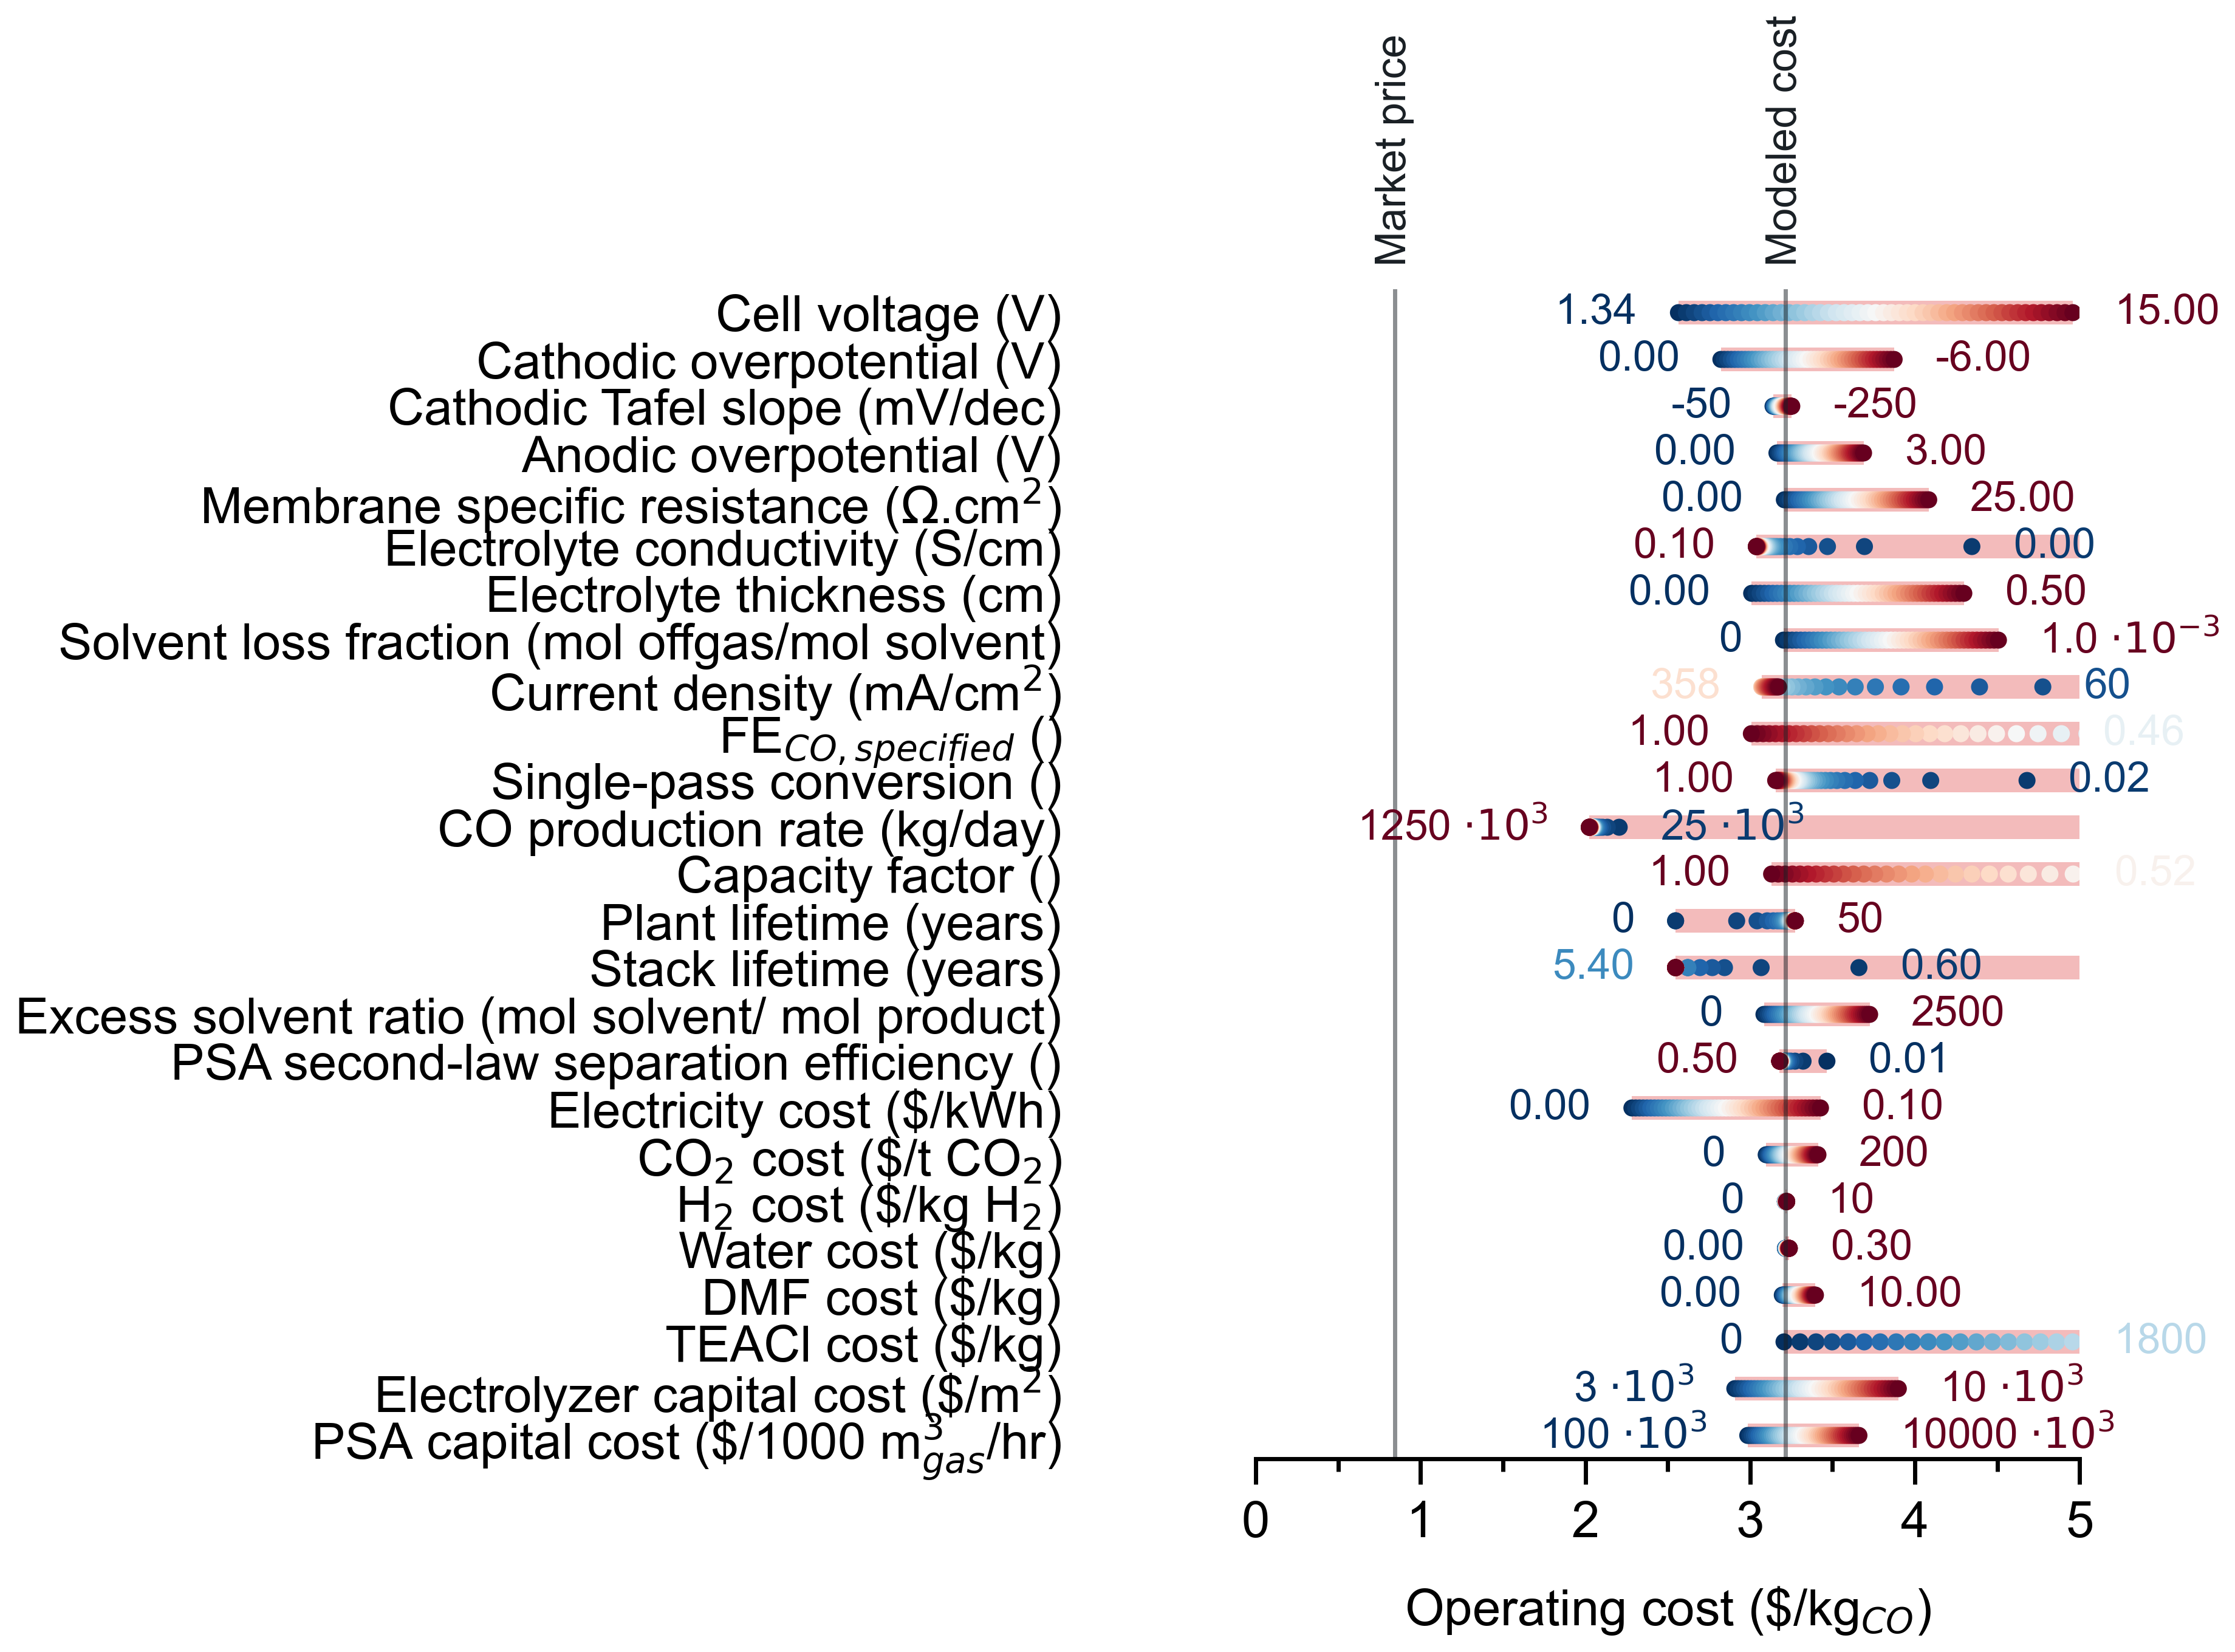

In [645]:
if override_onebyone == True:
    # Plot emissions per kg product over voltage range - bar chart

    if len(vbl_names) > 14:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 3)) # Set up plot
    else:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 1)) # Set up plot

    y_axis_min = 0.5
    y_axis_max = len(vbl_names) + 0.5
    
    x_axis_max = opex_x_axis_max
    x_axis_min = opex_x_axis_min 
    x_axis_step = 1 # 1 # 0.4
#     x_axis_num = 6
    x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
    x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
#     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

    label_padding = abs(x_axis_max - x_axis_min)/20

    ## Axis labels
    axs.set_xlabel('Operating cost (\$/kg$_{{{}}}$)'.format(product_name))

    ## Hide or show plot borders 
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.spines['bottom'].set_visible(True)
    
    ## Handle axis ticks
    axs.minorticks_off()
    axs.tick_params(bottom = True, top = False, left = False, right = False)
            
    ## Draw axis ticks
    axs.tick_params(axis = 'y', pad = 80) # Spacing between y-axis and origin
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, 
                                                     # then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot bar charts  
    axs.barh(np.arange(1, len(vbl_names) + 1), width = [opex_maxima[i] - opex_minima[i] for i in range(len(vbl_names))], 
             label='', left=opex_minima, height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
            color = theme_colors[5], alpha = 0.4)
    
    ## Plot lines for average cost and price
    axs.plot([product_cost_USD_kgprod, product_cost_USD_kgprod], [y_axis_min - 1, y_axis_max], 
             c = theme_colors[6], alpha = 0.5)
    axs.text(product_cost_USD_kgprod, y_axis_min - 0.5, 
             'Market price', 
             ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
              rotation = 90, c = theme_colors[6])
    
    axs.plot([df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)], df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]], 
             [y_axis_min - 1, y_axis_max], 
             c = theme_colors[6], alpha = 0.5)
    axs.text(df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)], y_axis_min - 0.5, 
             'Modeled cost', 
             ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
              rotation = 90, c = theme_colors[6])
            
    ## Plot scatter and min/max labels
    for i, vbl_name in enumerate(vbl_names):
        # Scatterplot
        axs.scatter(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'], 
                    (i+1)*np.ones(len(dict_sensitivity_cleaned[vbl_name]['Range'])),
                   s = 50, marker = 'o', c = dict_sensitivity_cleaned[vbl_name]['Colors'])
        
        # Labels - format text to a couple of significant figs
        if vbl_name == '{} production rate'.format(product_name) or vbl_name == 'Electrolyzer capital cost' or vbl_name == 'PSA capital cost' or vbl_name == 'Liquid separation capital cost':
            # unit - thousands
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]]/1000)),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_maxima_idx[i]] + label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]]/1000)),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Current density' or vbl_name == 'Excess solvent ratio' or vbl_name == 'Plant lifetime' or vbl_name == 'CO$_2$ cost' or vbl_name == 'Cathodic Tafel slope' or vbl_name == 'H$_2$ cost' or vbl_name == '{} cost'.format(supporting_electrolyte_name):
            # round numbers
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_maxima_idx[i]] + label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]])),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Solvent loss fraction':
            # scientific notation
            if dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]] == 0: # handle case if minimum is 0 and log is undefined
                axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_minima_idx[i]])
            else:
                axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]])))),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_maxima_idx[i]] + label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]])))),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        else:
            # 2 decimal places 
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_minima_idx[i]] - label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][opex_minima_idx[i]]),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Production cost'][opex_maxima_idx[i]] + label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][opex_maxima_idx[i]]),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][opex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
            
    ## Legend
#     axs.legend(bbox_to_anchor=(1, 1), loc='upper left') 
    # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position
    
    ## Flip the horizontal bars
    axs.invert_yaxis()
    
    ## Save figure 
    opex_sens_fig_name = os.path.join(OP_folder,'{} Opex sensitivity {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(opex_sens_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_sens_fig_name + '.jpg', transparent = True, dpi = 80, ) 
    # fig.savefig(opex_sens_fig_name + '.pdf', transparent = True )
    # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + opex_sens_fig_name )
    
    plt.show()

## 5.5. Plot capex sensitivity

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\224503243.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label='', left=[i/1e6 for i in capex_minima], height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\224503243.py:113: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding,
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\224503243.py:117: FutureWarning: Series.__getitem__ tr

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Capex sensitivity CO 05-29PM


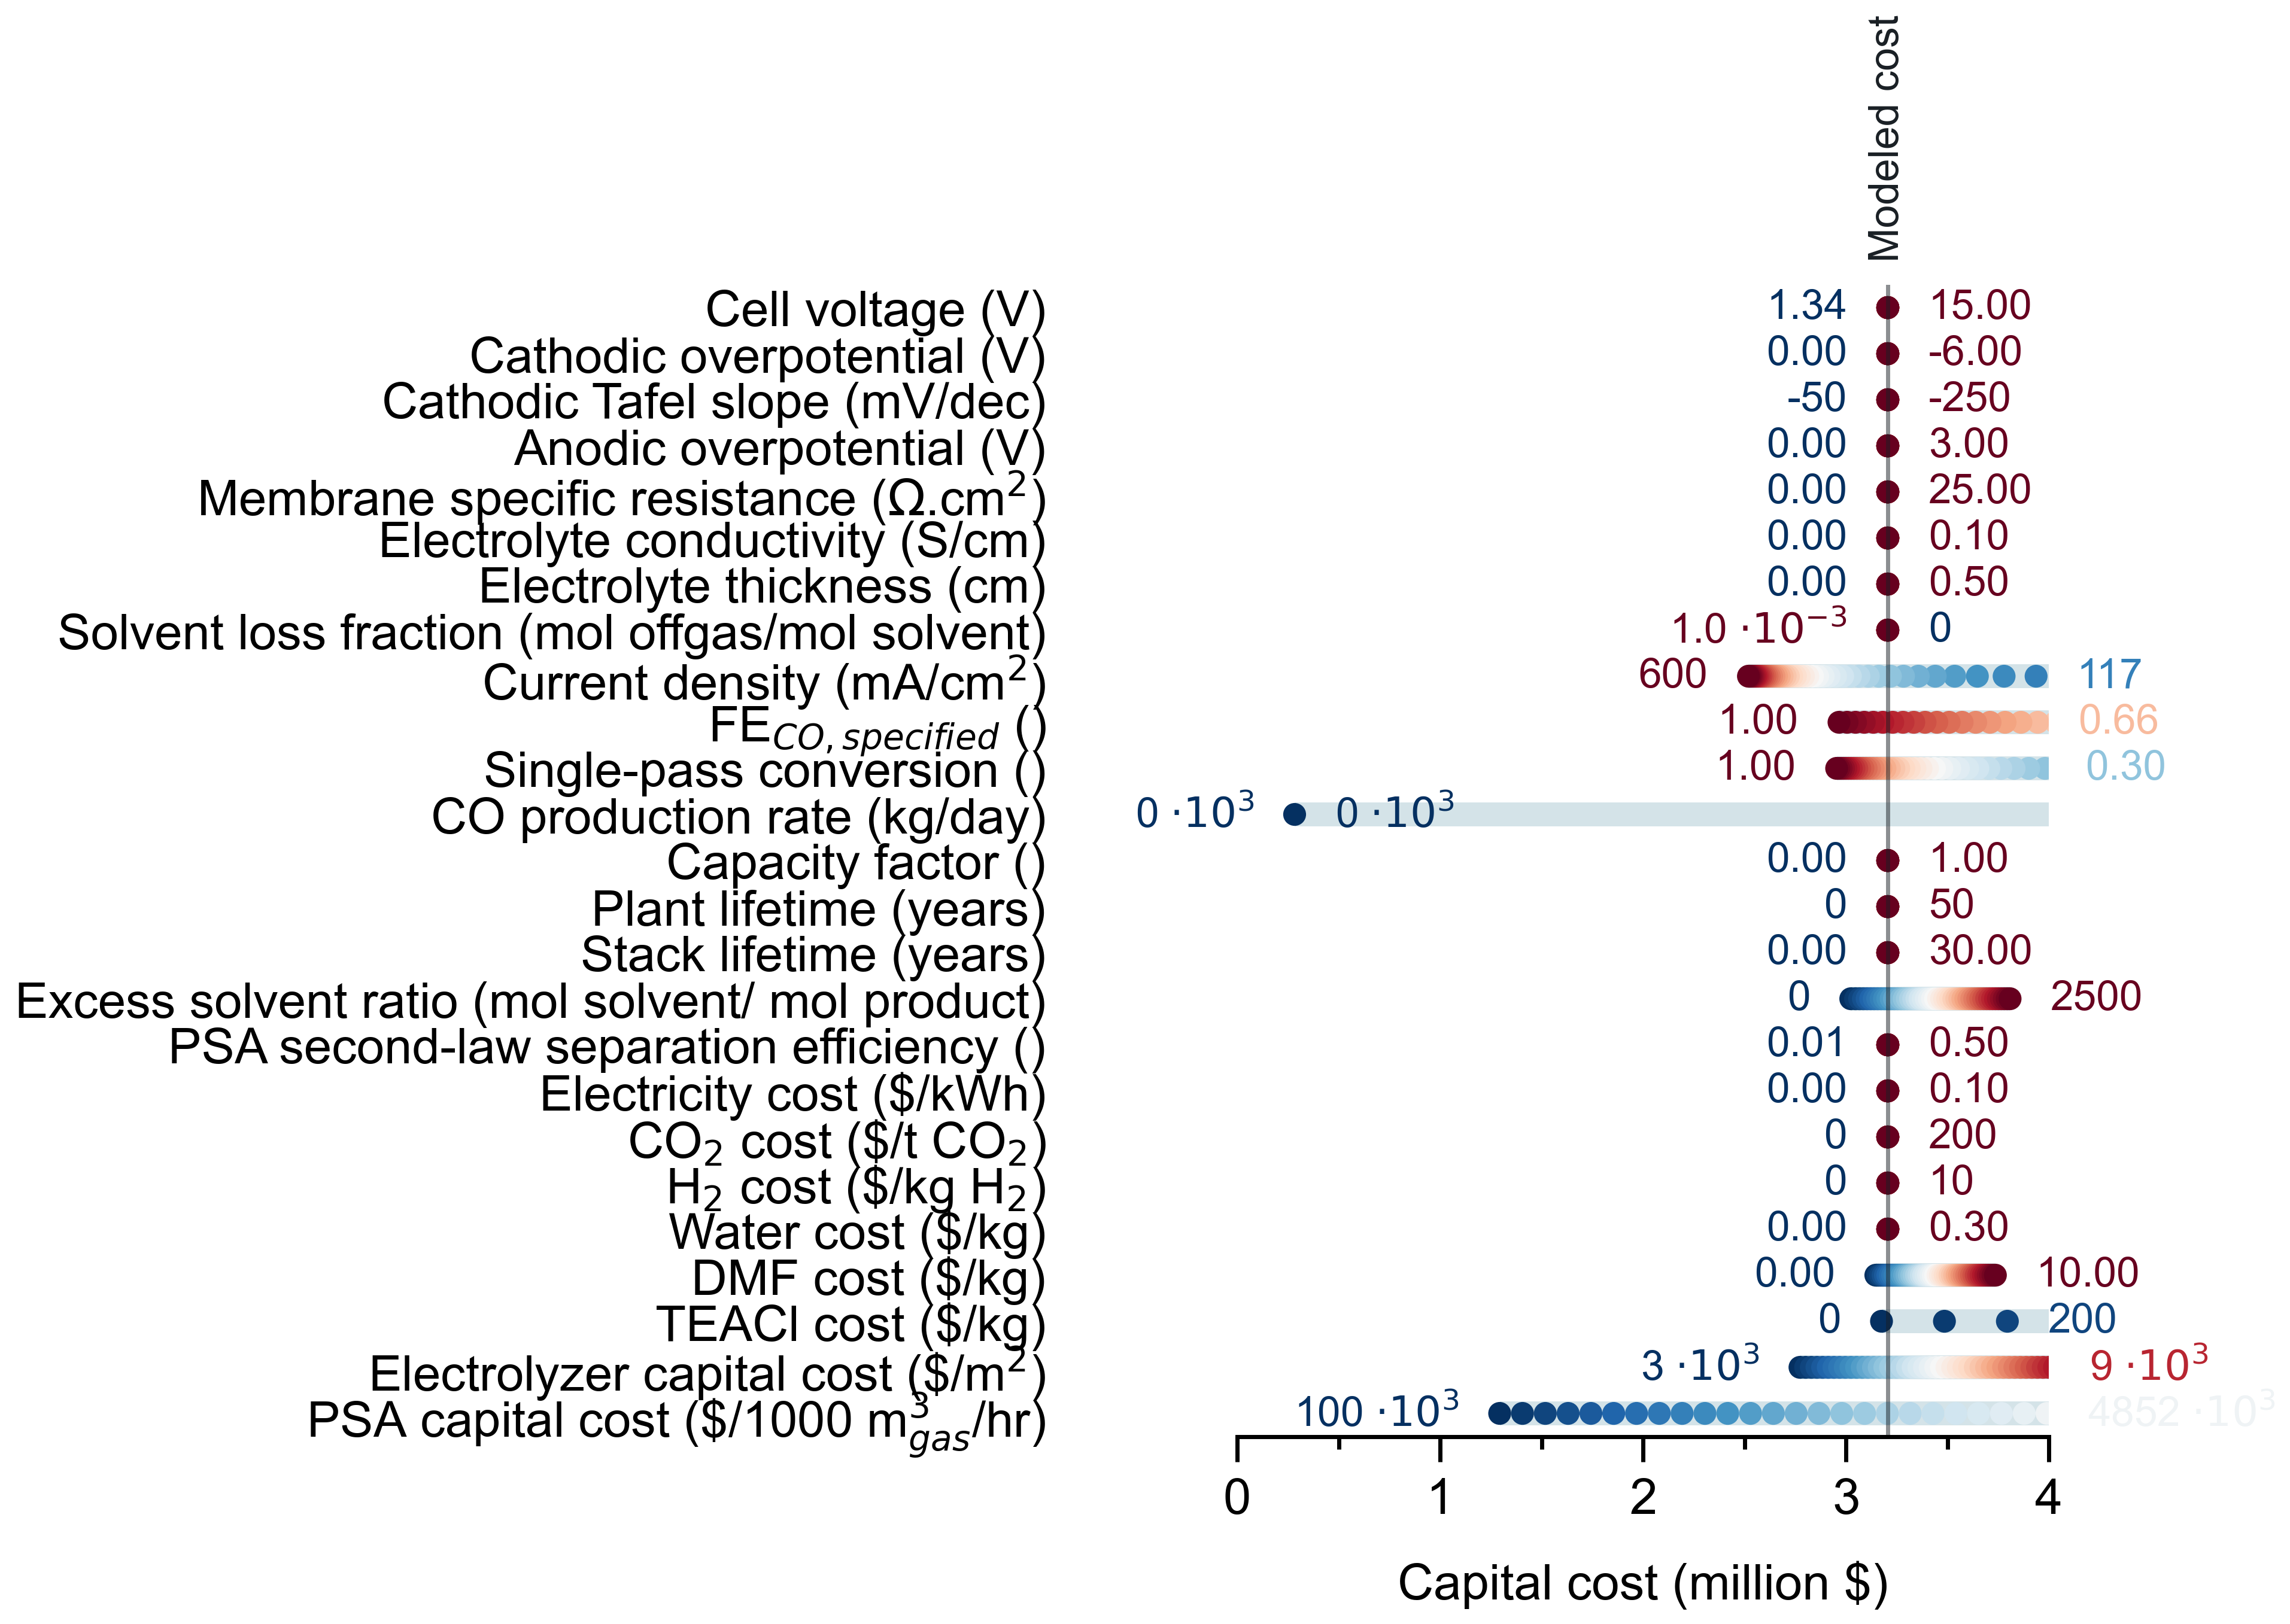

In [646]:
if override_onebyone == True:
    # Plot emissions per kg product over voltage range - bar chart

    if len(vbl_names) > 14:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 3)) # Set up plot
    else:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 1)) # Set up plot

    y_axis_min = 0.5
    y_axis_max = len(vbl_names) + 0.5
    
    x_axis_max = capex_x_axis_max # 500 # np.ceil(max(capex_maxima)/1e6)   # round to nearest million
    x_axis_min = capex_x_axis_min # np.floor(min(capex_minima)/1e6) 
    x_axis_step = 1
#     x_axis_num = 6
    x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
    x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
#     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

    label_padding = abs(x_axis_max - x_axis_min)/20

    ## Axis labels
    axs.set_xlabel('Capital cost (million \$)'.format(product_name))

    ## Hide or show plot borders 
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.spines['bottom'].set_visible(True)
    axs.tick_params(bottom = True, top = False, left = False, right = False)
    
    ## Handle axis ticks
    axs.minorticks_off()
    axs.tick_params(bottom = True, top = False, left = False, right = False)
            
    ## Draw axis ticks
    axs.tick_params(axis = 'y', pad = 80) # Spacing between y-axis and origin
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, 
                                                     # then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series  
    # All capex except working capital, which is recovered during operation
    axs.barh(np.arange(1, len(vbl_names) + 1), width = [(capex_maxima[i] - capex_minima[i])/1e6 for i in range(len(vbl_names))], 
             label='', left=[i/1e6 for i in capex_minima], height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
             alpha = 0.3,
            color = theme_colors[3])
    
    axs.plot([df_capex_totals.loc['Total permanent investment', 'Cost ($)']/1e6, df_capex_totals.loc['Total permanent investment', 'Cost ($)']/1e6], 
             [y_axis_min - 1, y_axis_max], 
             c = theme_colors[6], alpha = 0.5)
    axs.text(df_capex_totals.loc['Total permanent investment', 'Cost ($)']/1e6, y_axis_min - 0.5, 
             'Modeled cost', 
             ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
              rotation = 90, c = theme_colors[6])
     
    ## Plot scatter and min/max labels    
    for i, vbl_name in enumerate(vbl_names):
        # Scatterplot
        axs.scatter(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment']/1e6, 
                    (i+1)*np.ones(len(dict_sensitivity_cleaned[vbl_name]['Range'])),
                   s = 100, marker = 'o', c = dict_sensitivity_cleaned[vbl_name]['Colors'])
        
        # Labels - format text to a couple of significant figs
        if vbl_name == '{} production rate'.format(product_name) or vbl_name == 'Electrolyzer capital cost' or vbl_name == 'PSA capital cost' or vbl_name == 'Liquid separation capital cost':
            # unit - thousands
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]/1000)),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6 + label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]/1000)),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Current density' or vbl_name == 'Excess solvent ratio' or vbl_name == 'Plant lifetime' or vbl_name == 'CO$_2$ cost' or vbl_name == 'Cathodic Tafel slope' or vbl_name == 'H$_2$ cost' or vbl_name == '{} cost'.format(supporting_electrolyte_name):
            # round numbers
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6 + label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]])),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Solvent loss fraction':
            # scientific notation
            if dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]] == 0: # handle case if minimum is 0 and log is undefined
                axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
            else:
                axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]])))),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
            if dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]] == 0: # handle case if minimum is 0 and log is undefined
                axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6 + label_padding, 
                     i+1, '{:.0f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
            else:
                axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6 + label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]])))),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        else:
            # 2 decimal places 
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6 - label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6 + label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                    fontsize = SMALL_SIZE)



        # if vbl_name == '{} production rate'.format(product_name) or vbl_name == 'Electrolyzer capital cost':
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6) - label_padding, 
        #             i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]/1000)),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6) + label_padding, 
        #              i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]/1000)),
        #             horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
        #             fontsize = SMALL_SIZE)  
        # elif vbl_name == 'Current density' or vbl_name == 'Plant lifetime' or vbl_name == 'CO$_2$ cost':
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6) - label_padding, 
        #              i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]])),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6) + label_padding, 
        #              i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]])),
        #             horizontalalignment = 'left', verticalalignment = 'center',c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
        #         fontsize = SMALL_SIZE) 
        # else:
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_minima_idx[i]]/1e6) - label_padding, 
        #              i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][capex_minima_idx[i]]),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_minima_idx[i]])
        #     axs.text((dict_sensitivity_cleaned[vbl_name]['Capex vs vbl'].loc['Total permanent investment'][capex_maxima_idx[i]]/1e6) + label_padding, 
        #              i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][capex_maxima_idx[i]]),
        #             horizontalalignment = 'left', verticalalignment = 'center',c = dict_sensitivity_cleaned[vbl_name]['Colors'][capex_maxima_idx[i]],
                # fontsize = SMALL_SIZE) 
      
    ## Flip the horizontal bars
    axs.invert_yaxis()

    ## Legend
#     axs.legend(bbox_to_anchor=(1, 1), loc='upper left') 
    # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    capex_sens_fig_name = os.path.join(OP_folder,'{} Capex sensitivity {} {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(capex_sens_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(capex_sens_fig_name + '.jpg', transparent = True, dpi = 80, ) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(capex_sens_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + capex_sens_fig_name )
    
    plt.show()

## 5.6. Plot levelized cost sensitivity

C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3427303666.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label='', left=levelized_minima, height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3427303666.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding,
C:\Users\shash\AppData\Local\Temp\ipykernel_21996\3427303666.py:128: FutureWarning: Series.__getitem__ treating keys as p

Saved at E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 Levelized sensitivity CO 05-29PM


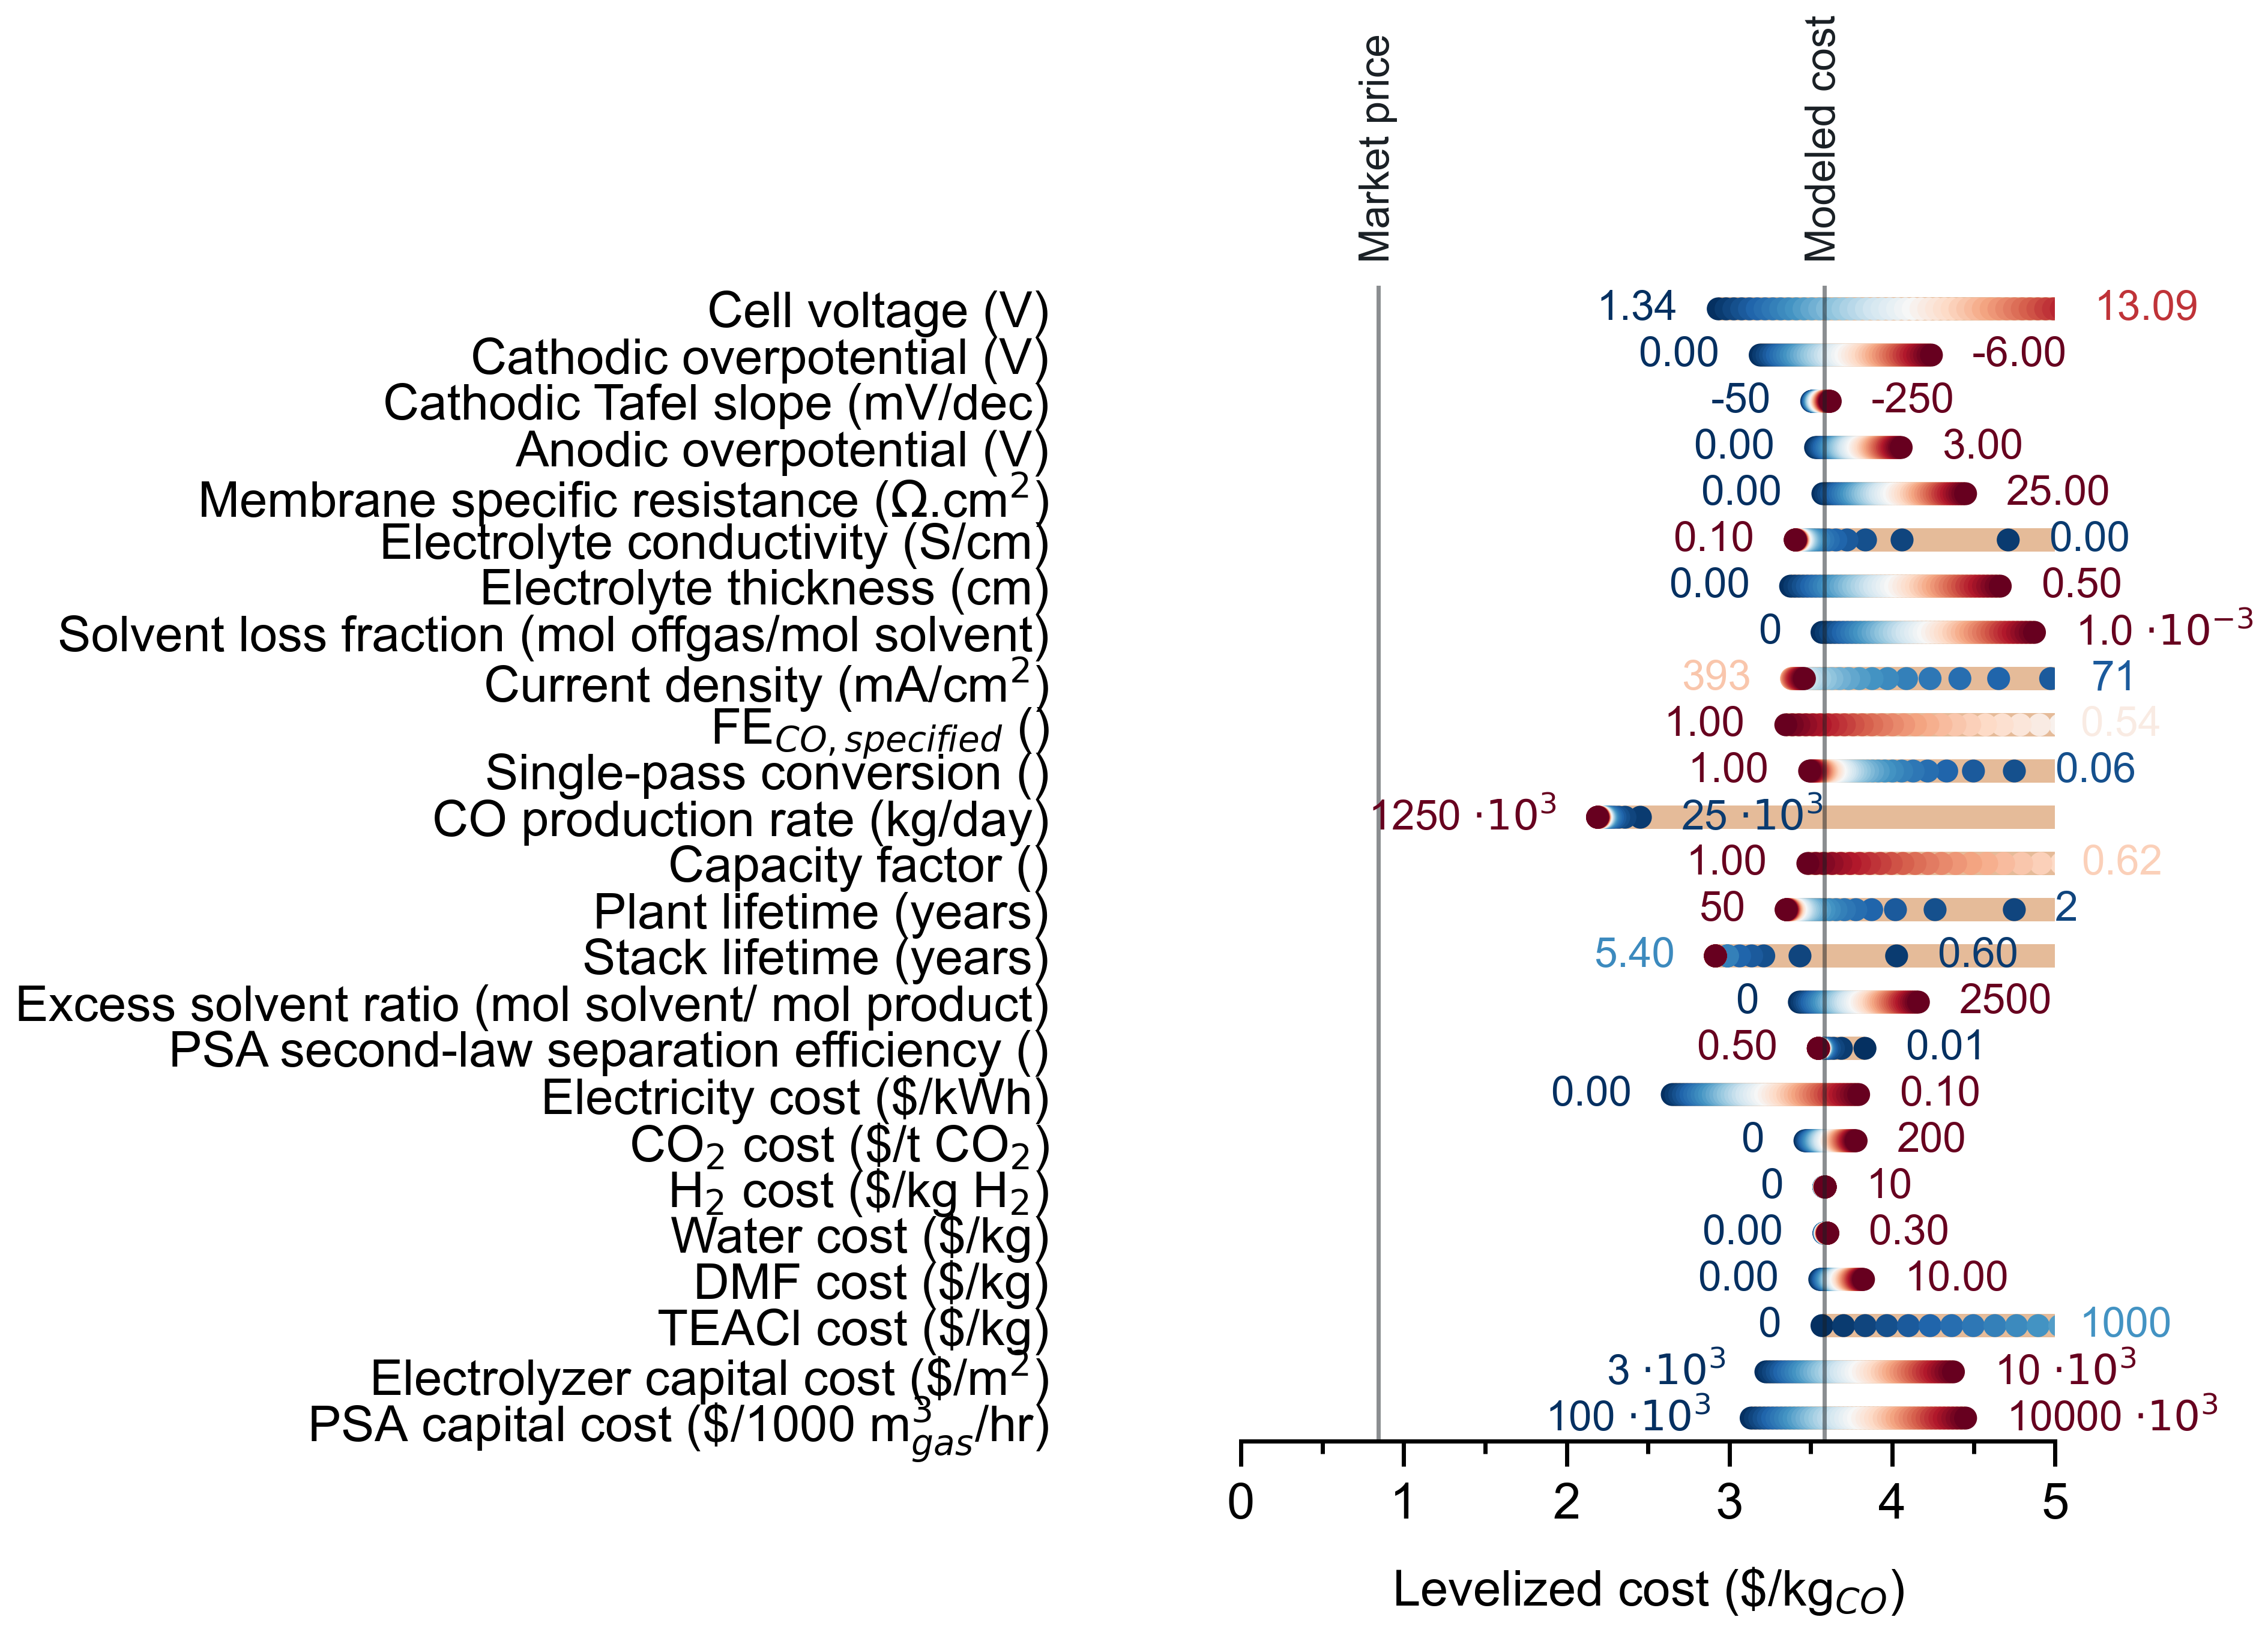

In [647]:
if override_onebyone == True:
    # Plot emissions per kg product over voltage range - bar chart

    if len(vbl_names) > 14:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 3)) # Set up plot
    else:
        fig, axs = plt.subplots(figsize = (7, 7*aspect_ratio + 1)) # Set up plot
 
    y_axis_min = 0.5
    y_axis_max = len(vbl_names) + 0.5
    
    x_axis_max =  levelized_x_axis_max 
    x_axis_min = levelized_x_axis_min     
    x_axis_step = 1 # 2

#     x_axis_num = 6
    x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
    x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
#     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

    label_padding = abs(x_axis_max - x_axis_min)/20

    ## Axis labels
    axs.set_xlabel('Levelized cost (\$/kg$_{{{}}}$)'.format(product_name))

    ## Hide or show plot borders 
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.spines['bottom'].set_visible(True)
    axs.tick_params(bottom = True, top = False, left = False, right = False)
            
    ## Handle axis ticks
    axs.minorticks_off()
    axs.tick_params(bottom = True, top = False, left = False, right = False)
            
    ## Draw axis ticks
    axs.tick_params(axis = 'y', pad = 80) # Spacing between y-axis and origin
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, 
                                                     # then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot bars   
    axs.barh(np.arange(1, len(vbl_names) + 1), width = [levelized_maxima[i] - levelized_minima[i] for i in range(len(vbl_names))], 
             label='', left=levelized_minima, height = barwidth, tick_label = ['{} ({})'.format(vbl_names[i], vbl_units[i]) for i in range(len(vbl_names))],
            color = theme_colors[0], alpha = 0.4) 
    
    ## Plot lines for average cost and price
    axs.plot([product_cost_USD_kgprod, product_cost_USD_kgprod], [y_axis_min - 1, y_axis_max], 
             c = theme_colors[6], alpha = 0.5)
    axs.text(product_cost_USD_kgprod, y_axis_min - 0.5, 
             'Market price', 
             ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
              rotation = 90, c = theme_colors[6])
    
    ## Plot scatter and min/max labels
    # Levelized cost includes all capex except working capital, which is recovered during operation
    axs.plot([  (df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)] + \
            df_capex_totals.loc['Total permanent investment', 'Cost ($)']/(df_costing_assumptions.loc['Plant lifetime', 'Cost']* \
            365*df_costing_assumptions.loc['Capacity factor', 'Cost']) / df_electrolyzer_assumptions.loc['Production rate', 'Value']) , 
               (df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)] + \
            df_capex_totals.loc['Total permanent investment', 'Cost ($)']/(df_costing_assumptions.loc['Plant lifetime', 'Cost']* \
            365*df_costing_assumptions.loc['Capacity factor', 'Cost']) / df_electrolyzer_assumptions.loc['Production rate', 'Value']) 
               ], 
             [y_axis_min - 1, y_axis_max], 
             c = theme_colors[6], alpha = 0.5)
    axs.text((df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)] + \
            df_capex_totals.loc['Total permanent investment', 'Cost ($)']/(df_costing_assumptions.loc['Plant lifetime', 'Cost']* \
            365*df_costing_assumptions.loc['Capacity factor', 'Cost']) / df_electrolyzer_assumptions.loc['Production rate', 'Value']) , 
             y_axis_min - 0.5, 
             'Modeled cost', 
             ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
              rotation = 90, c = theme_colors[6])
    
    for i, vbl_name in enumerate(vbl_names):
        # Scatter points 
        axs.scatter(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'], 
                    (i+1)*np.ones(len(dict_sensitivity_cleaned[vbl_name]['Range'])),
                   s = 100, marker = 'o', c = dict_sensitivity_cleaned[vbl_name]['Colors'])

        # Labels - format text to a couple of significant figs
        if vbl_name == '{} production rate'.format(product_name) or vbl_name == 'Electrolyzer capital cost' or vbl_name == 'PSA capital cost' or vbl_name == 'Liquid separation capital cost':
            # unit - thousands
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]/1000)),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
                     i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]/1000)),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Current density' or vbl_name == 'Excess solvent ratio' or vbl_name == 'Plant lifetime' or vbl_name == 'CO$_2$ cost' or vbl_name == 'Cathodic Tafel slope' or vbl_name == 'H$_2$ cost' or vbl_name == '{} cost'.format(supporting_electrolyte_name):
            # round numbers
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]])),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        elif vbl_name == 'Solvent loss fraction':
            # scientific notation
            if dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]] == 0: # handle case if minimum is 0 and log is undefined
                axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
                     i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]])),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
            else:
                axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]])))),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
                     i+1, '{:.1f} $ \cdot 10^{{{}}}$'.format((dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]/ 10 ** np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]))), int(np.floor(np.log10(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]])))),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
        else:
            # 2 decimal places 
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]),
                    horizontalalignment = 'right', verticalalignment = 'center',
                    fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
            axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
                     i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]),
                    horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
                    fontsize = SMALL_SIZE)
            
        # # Label text, formatted to basically maintain 2-3 sig figs
        # if vbl_name == '{} production rate'.format(product_name) or vbl_name == 'Electrolyzer capital cost':
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
        #              i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]/1000)),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
        #              i+1, '{:.0f} $ \cdot 10^3$'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]/1000)),
        #             horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
        #             fontsize = SMALL_SIZE)  
        # elif vbl_name == 'Current density' or vbl_name == 'Plant lifetime' or vbl_name == 'CO$_2$ cost':
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
        #              i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]])),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
        #              i+1, '{:.0f}'.format(round(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]])),
        #             horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
        #             fontsize = SMALL_SIZE)
        # else:            
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_minima_idx[i]] - label_padding, 
        #              i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_minima_idx[i]]),
        #             horizontalalignment = 'right', verticalalignment = 'center',
        #             fontsize = SMALL_SIZE, c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_minima_idx[i]])
        #     axs.text(dict_sensitivity_cleaned[vbl_name]['Opex totals vs vbl'].loc['Levelized cost'][levelized_maxima_idx[i]] + label_padding, 
        #              i+1, '{:.2f}'.format(dict_sensitivity_cleaned[vbl_name]['Range'][levelized_maxima_idx[i]]),
        #             horizontalalignment = 'left', verticalalignment = 'center', c = dict_sensitivity_cleaned[vbl_name]['Colors'][levelized_maxima_idx[i]],
        #             fontsize = SMALL_SIZE)   
    
    ## Flip the horizontal bars
    axs.invert_yaxis()

    ## Legend
#     axs.legend(bbox_to_anchor=(1, 1), loc='upper left') 
    # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    levelized_sens_fig_name = os.path.join(OP_folder, '{} Levelized sensitivity {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(levelized_sens_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(levelized_sens_fig_name + '.jpg', transparent = True, dpi = 80, ) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(levelized_sens_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + levelized_sens_fig_name )
    
    plt.show()

## 5.7 Save sensitivity results to Excel

In [648]:
if override_onebyone == True:
    excel_file_name = os.path.join(OP_folder, '{} {} sensitivity at {}'.format(current_date, product_name, current_time) )
    excel_file_name = excel_file_name.replace(".", ",") + '.xlsx'
        
    ### Save modeled results to Excel
    print('Writing new file {} \n'.format(excel_file_name)) # Print
    
    # With an ExcelWriter object, write to Excel using openpyxl        
    with pd.ExcelWriter(excel_file_name, engine='openpyxl', mode = 'w', 
                    datetime_format = 'YYYY-MM-DD HH:MM:SS') as writer_obj:  # Open a writer object in mode write ('w'); it will close itself at the end of with loop
        
        # Write constants and imports first
        df_constants.reset_index(inplace = False).to_excel(writer_obj, 
                                                           sheet_name = params_sheet_name, 
                                                           startcol = 0, startrow = 0) # write to Excel - file names
        df_utility_imports.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + 4) # write to Excel - constants
        df_solvents.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + 4) # write to Excel - constants
        df_supporting.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + df_solvents.shape[0] + 4) # write to Excel - constants
        
        # Iterate through variables
        for vbl_name in vbl_names:
            # Sheet name skeletons
            results_sheet_name = 'Results vs {}'.format(vbl_name)[:30]  # Name results sheet
            streams_sheet_name = 'Streams vs {}'.format(vbl_name)[:30]
            econ_sheet_name = 'Economics vs {}'.format(vbl_name)[:30]
            
            # Iterate through vbl range and save each stream and econ table
            for i, j in enumerate(dict_sensitivity[vbl_name]['Range']):
            
                # Economics writing
                row = 0 # row counter
                for df in [dict_sensitivity[vbl_name][j]['Economics'][df_costing_assumptions.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_capex_BM.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_capex_totals.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_opex.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_opex_totals.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_sales.index.name],  
                       dict_sensitivity[vbl_name][j]['Economics'][df_feedstocks.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_utilities.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_operations.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_maintenance.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_replacement.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_overhead.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_taxes.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_depreciation.index.name], 
                       dict_sensitivity[vbl_name][j]['Economics'][df_general.index.name]]:
                    df.reset_index(inplace=False).to_excel(writer_obj, 
                                                            sheet_name = econ_sheet_name, 
                                                            startrow = row, 
                                                            startcol = i*8) # write to Excel - output sheet
                    row += (2 + df.shape[0])
                    

                # Stream and energy table writing            
                row = 0 # row counter
                for df in [dict_sensitivity[vbl_name][j]['Streams'][df_streams_formatted.index.name], 
                           dict_sensitivity[vbl_name][j]['Streams'][df_electrolyzer_assumptions.index.name], 
                           dict_sensitivity[vbl_name][j]['Streams'][df_outlet_assumptions.index.name], 
                           dict_sensitivity[vbl_name][j]['Streams'][df_energy.index.name], 
                           dict_sensitivity[vbl_name][j]['Streams'][df_potentials.index.name]]:
                    df.reset_index(inplace=False).to_excel(writer_obj, 
                                                        sheet_name = streams_sheet_name, 
                                                        startrow = row, 
                                                        startcol = i*26) # write to Excel - output sheet
                    row += (2 + df.shape[0])

            # Write completed "summary" dataframes for variable
            row = 0 # row counter
            for df in [dict_sensitivity[vbl_name]['Opex vs vbl'],
                       dict_sensitivity[vbl_name]['Bare-module investment vs vbl'],
                       dict_sensitivity[vbl_name]['Capex vs vbl'],
                      dict_sensitivity[vbl_name]['Potentials vs vbl'],
                      dict_sensitivity[vbl_name]['Emissions vs vbl'],
                      dict_sensitivity[vbl_name]['Electrolyzer assumptions vs vbl'],
                      dict_sensitivity[vbl_name]['Costing assumptions vs vbl']]:

                df.reset_index(inplace=False).to_excel(writer_obj, 
                                                       sheet_name = results_sheet_name, 
                                                       startrow = row, 
                                                       startcol = 0) # write to Excel - output sheet
                row += (2 + df.shape[0])

            print('Done writing sheets for {}'.format(vbl_name))

        # # Format all sheets
        # book_format(writer = writer_obj) # apply sheet formatting

        # print('\n')
        # print('Done formatting sheets \n')

        ## Write figure to Excel
        book  = writer_obj.book # Get workbook
        sheet = writer_obj.sheets[results_sheet_name] # Get worksheet of last variable  

        counter = 1
        for fig_name in [opex_sens_fig_name, capex_sens_fig_name, levelized_sens_fig_name]:
                img = openpyxl.drawing.image.Image(fig_name + '.jpg') # Image cannot be a .svg
                img.width = 300*aspect_ratio #px
                img.height = 300
                sheet.add_image(img, 'G' + str(counter)) # Add to the sheet

                counter += 20

        print('Saved figures \n')

    print('Written to file ', excel_file_name) # Print 

Writing new file E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\LCA TEA non-aq results on 20250314\20250314 CO sensitivity at 05-29PM.xlsx 

Done writing sheets for Cell voltage
Done writing sheets for Cathodic overpotential
Done writing sheets for Cathodic Tafel slope
Done writing sheets for Anodic overpotential
Done writing sheets for Membrane specific resistance
Done writing sheets for Electrolyte conductivity
Done writing sheets for Electrolyte thickness
Done writing sheets for Solvent loss fraction
Done writing sheets for Current density
Done writing sheets for FE$_{CO , specified}$
Done writing sheets for Single-pass conversion
Done writing sheets for CO production rate
Done writing sheets for Capacity factor
Done writing sheets for Plant lifetime
Done writing sheets for Stack lifetime
Done writing sheets for Excess solvent ratio
Done writing sheets for PSA second-law separation efficiency
Done writing sheets for Electricity cost
Done writing sh

----

# 6. Two-variable sensitivity

## 6.1 Range in variables

### 6.1.1 Choose variables

In [ ]:
# Choose variables to vary independently
answer = input('Do you want to vary multiple assumptions together? (y/n) \n ')

if answer.lower() == 'y':
    override_multivbl = True # are you varying any basis? set to true by default, below will falsify if needed
else:
    override_multivbl = False 

In [ ]:
if override_multivbl== True:
    display(df_flags.reset_index(inplace = False, drop = False)) # print df_flags

    answer = input('Enter 2 comma-separated row numbers from the below table (x-axis, y-axis): \n')

    vbl_rows = answer.split(',')

    # Clear flags
    df_flags['T/F?'] = False # add column for truth value of given override

    try:
        vbl_rows = [int(vbl_row) for vbl_row in vbl_rows] # convert input into integer
        vbl_names = df_flags.index[vbl_rows] # set vbl_name from those rows
        vbl_units = df_flags['Unit'].iloc[vbl_rows] # set vbl_unit from those rows
        df_flags.iloc[vbl_rows, df_flags.keys()=='T/F?'] = True # set those flags to be True

    except ValueError:
        print('Valid values were not entered')

# 4,1
# 6,9
# 8,4

### 6.1.2 Choose range

In [ ]:
### Get user to input variables to calculate process costs over

print('NOTE: cathodic overpotentials are NEGATIVE if they are higher!')

dict_multivbl = {}

if override_multivbl == True:
    answer = input('Change from default values? y/n \n \n')

    for i, vbl_name in enumerate(vbl_names):
        
        if answer.lower() != 'y':
            vbl_min = df_flags.loc[vbl_name, 'Range min']
            vbl_max = df_flags.loc[vbl_name, 'Range max']
            vbl_range = np.linspace(start = vbl_min, stop = vbl_max, num = 51, endpoint = True)
            answer_range = 2

        else:    
            vbl_unit = vbl_units[i]
            vbl_min, vbl_max, vbl_range, answer_range = generate_range(vbl_name)
            
        vbl_range_text = ['{} {}'.format(x, vbl_units[i]) for x in vbl_range]
        print(vbl_range_text, '\n')
        dict_multivbl[vbl_name] = {'Range': vbl_range}

# 50 - 1000 mA/cm2
# 0.01 - 10 ohm.cm2, logscale
# 0 - 0.1 $/kWh
# 3000 - 10000 $/m2 electrolyzer
# 300 - 3e6 kg/day, logscale
# 0.0005 - 0.10 S/cm
# 0 - -4 V cathodic
# 0.01 - 0.9 SPC%
# 0.1 - 1.0 FE%

## 6.2 Generate and save results
### 6.2.1 Process model over variable range

In [ ]:
## Make decisions about FE-SPC tradeoff

if override_multivbl:
    answer = input('Do you want to model the FE-SPC tradeoff using catholyte model? y/n \n \n')

    if answer.lower() == 'y':
        model_FE = 'Kas'
        print('Using Kas and Smith model for FE-SPC tradeoff')

    else:
        # model_FE = 'Hawks'
        # print('Using Hawks and Baker model for FE-SPC tradeoff')
                
        model_FE = None
        print('Using manually specified selectivity - NO model')
        
        SPC_original = SPC # Uncomment for Fig 4f, 4i, S_d-f, S_g-i

In [ ]:
## Make decisions about battery

if override_multivbl:
    answer = input('Do you want to include a battery system? y/n \n \n')

    if answer.lower() == 'y':
                
        # Handle battery to flatten curve and maximize capacity
        is_battery = True
        avbl_renewables = float(input('What is the minimum fraction of time when renewables power the electrolyzer? \n \n'))
        battery_capacity = 1 - avbl_renewables # assumes daily storage battery
        capacity_factor = 350/365 # capacity is re-maximized
        
    else:
        is_battery = False
        battery_capacity = 0

### 6.2.2 Two-variable heatmap

In [ ]:
### Generate modeling results for variable range 

if override_multivbl == True:
    
    #### Iterate through first 2 variables being changed
    vbl_name_1, vbl_name_2 = vbl_names

    vbl_range_text_1 = ['{} {}'.format(x, vbl_units[0]) for x in dict_multivbl[vbl_name_1]['Range'] ]
    vbl_range_text_2 = ['{} {}'.format(x, vbl_units[1]) for x in dict_multivbl[vbl_name_2]['Range'] ]

    meshgrid_multi_capex = np.zeros([ len(dict_multivbl[vbl_name_2]['Range']), len(dict_multivbl[vbl_name_1]['Range'])])
    meshgrid_multi_opex = np.zeros([len(dict_multivbl[vbl_name_2]['Range']), len(dict_multivbl[vbl_name_1]['Range'])])
    meshgrid_multi_levelized = np.zeros([len(dict_multivbl[vbl_name_2]['Range']), len(dict_multivbl[vbl_name_1]['Range'])])

    
    #### Loop through variable 1
    
    if vbl_name_1 != 'Cell voltage' and vbl_name_1 != 'Cathodic overpotential' and vbl_name_1 != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
        value_original_1 = globals()[df_flags.loc[vbl_name_1,'Python variable']] # Save the original value of the adjusted variable

    if vbl_name_2 != 'Cell voltage' and vbl_name_2 != 'Cathodic overpotential' and vbl_name_2 != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
                value_original_2 = globals()[df_flags.loc[vbl_name_2,'Python variable']] # Save the original value of the adjusted variable
        
    for i, vbl_1 in enumerate(dict_multivbl[vbl_name_1]['Range']):    
        # Storage for individual runs
        dict_stream_tables = {}
        dict_econ_tables = {}

        # Storage for summary results across varied independent variable
        df_potentials_vs_vbl = pd.DataFrame()
        df_energy_vs_vbl = pd.DataFrame()
        df_emissions_vs_vbl = pd.DataFrame()
        df_electrolyzer_assumptions_vs_vbl = pd.DataFrame()
        df_outlet_assumptions_vs_vbl = pd.DataFrame()
        df_opex_vs_vbl = pd.DataFrame()
        df_opex_totals_vs_vbl = pd.DataFrame()
        df_capex_BM_vs_vbl = pd.DataFrame()
        df_capex_totals_vs_vbl = pd.DataFrame()
        df_costing_assumptions_vs_vbl = pd.DataFrame()
        df_sales_vs_vbl = pd.DataFrame()

        ### Update variable in its place
        globals()[df_flags.loc[vbl_name_1,'Python variable']] = vbl_1 # Overwrite the global variable whose override flag is True

        #### Loop through variable 2
        for j, vbl_2 in enumerate(dict_multivbl[vbl_name_2]['Range']):
            globals()[df_flags.loc[vbl_name_2,'Python variable']] = vbl_2 # Overwrite the global variable whose override flag is True
            
            ### Update the value of 
            dict_multivbl[vbl_name_1][vbl_1] = {'{}'.format(vbl_name_2) : {vbl_2: ''}}
            
            ### Handle battery to flatten curve
            if is_battery:
                battery_capacity = 1 - avbl_renewables # assumes daily storage battery
                capacity_factor = 350/365 # capacity is re-maximized
            else:
                battery_capacity = 0

            ### Generate physical and costing model
            df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
                    df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
                    df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
                    cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,                  
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = '', # No overrides per run
                                                                        overridden_value = np.NaN, # No overrides per run
                                                                        overridden_unit = '', # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)

            ### Store results of models  
            if df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)] != 0 and df_capex_totals.loc['Total permanent investment', 'Cost ($)'] != 0:
                meshgrid_multi_opex[j, i] = df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
                meshgrid_multi_capex[j, i] = df_capex_totals.loc['Total permanent investment', 'Cost ($)'] # All capex except working capital, which is recovered during operation
                meshgrid_multi_levelized[j, i] = df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
            else:
                meshgrid_multi_opex[j, i] = np.NaN
                meshgrid_multi_capex[j, i] = np.NaN
                meshgrid_multi_levelized[j, i] = np.NaN
                                
            dict_multivbl[vbl_name_1][vbl_1][vbl_name_2][vbl_2] = { 'Streams' : {
                df_streams_formatted.index.name: df_streams_formatted, 
                df_electrolyzer_assumptions.index.name: df_electrolyzer_assumptions, 
                df_outlet_assumptions.index.name: df_outlet_assumptions, 
                df_energy.index.name: df_energy,
                df_potentials.index.name: df_potentials
                }
                }

            dict_multivbl[vbl_name_1][vbl_1][vbl_name_2][vbl_2]['Economics']= {
             df_costing_assumptions.index.name: df_costing_assumptions, 
             df_capex_BM.index.name: df_capex_BM,
             df_capex_totals.index.name: df_capex_totals, 
             df_opex.index.name: df_opex, 
             df_opex_totals.index.name: df_opex_totals, 
             df_sales.index.name: df_sales, 
             df_feedstocks.index.name: df_feedstocks, 
             df_utilities.index.name: df_utilities, 
             df_operations.index.name: df_operations, 
             df_maintenance.index.name: df_maintenance, 
             df_replacement.index.name: df_replacement, 
             df_overhead.index.name: df_overhead,
             df_taxes.index.name: df_taxes, 
             df_depreciation.index.name: df_depreciation, 
             df_general.index.name: df_general,
            }

            df_potentials_vs_vbl = pd.concat([df_potentials_vs_vbl, 
                                          df_potentials['Value']], axis = 1)  # Store cell voltages
            df_energy_vs_vbl = pd.concat([df_energy_vs_vbl, 
                                        df_energy['Energy (kJ/kg {})'.format(product_name)]], axis = 1) # Store energy utility for plotting
            df_emissions_vs_vbl = pd.concat([df_emissions_vs_vbl, 
                                         pd.concat([pd.Series(df_outlet_assumptions.loc['Carbon capture loss', 'Value']), df_energy['Emissions (kg CO2/kg {})'.format(product_name)]]) ], 
                                        axis = 1) # Store emissions for plotting
            df_electrolyzer_assumptions_vs_vbl = pd.concat([df_electrolyzer_assumptions_vs_vbl, 
                                                            df_electrolyzer_assumptions['Value']], axis = 1) # Store assumptions
            df_outlet_assumptions_vs_vbl = pd.concat([df_outlet_assumptions_vs_vbl, 
                                                      df_outlet_assumptions['Value']], axis = 1) # Store assumptions
            df_opex_vs_vbl = pd.concat([df_opex_vs_vbl, 
                                        df_opex['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
            df_opex_totals_vs_vbl = pd.concat([df_opex_totals_vs_vbl, 
                                        df_opex_totals['Cost ($/kg {})'.format(product_name)]], axis = 1) # Store opex for plotting
            df_capex_BM_vs_vbl = pd.concat([df_capex_BM_vs_vbl, 
                                        df_capex_BM['Cost ($)']], axis = 1) # Store capex for plotting
            df_capex_totals_vs_vbl = pd.concat([df_capex_totals_vs_vbl, 
                                        df_capex_totals['Cost ($)']], axis = 1) # Store capex for plotting
            df_costing_assumptions_vs_vbl = pd.concat([df_costing_assumptions_vs_vbl, 
                                        df_costing_assumptions['Cost']], axis = 1) # Store costing assumptions for plotting
            df_sales_vs_vbl = pd.concat([df_sales_vs_vbl, 
                                    df_sales['Earnings ($/yr)']], axis = 1) # Store costing assumptions for plotting

            ### Adjust FE_product, SPC, capacity_factor and variable back to their original values in globals()
            if vbl_name_2 != 'Cell voltage' and vbl_name_2 != 'Cathodic overpotential' and vbl_name_2 != 'Anodic overpotential' and vbl_name != 'Cathodic Tafel slope':
                globals()[df_flags.loc[vbl_name_2,'Python variable']] = value_original_2

            print('Done testing {} = {:.2f}/ {} = {:.2f}; levelized cost = ${:.3f}/ kg {} \n'.format(vbl_name_1, vbl_1, vbl_name_2, vbl_2, df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)], product_name))

            ### End inner loop (vbl values)
        
        ### Format completed "summary" dataframes
        for df in [df_energy_vs_vbl, df_potentials_vs_vbl,  df_emissions_vs_vbl,
                       df_electrolyzer_assumptions_vs_vbl, df_outlet_assumptions_vs_vbl, df_costing_assumptions_vs_vbl, 
                       df_capex_BM_vs_vbl, df_capex_totals_vs_vbl, df_opex_vs_vbl, df_sales_vs_vbl
                      ]:
            df.columns = vbl_range_text_2 # rename columns   

        ## Rename index (rows) for collected dataframes; columns will be renamed in the next section
        ## Add in units column but only after duplicating the df, otherwise indexing for plots is very complicated
        df_electrolyzer_assumptions_vs_vbl.index = df_electrolyzer_assumptions.index
    #         df_electrolyzer_assumptions_vs_vbl_2 = df_electrolyzer_assumptions_vs_vbl.copy()
    #         df_electrolyzer_assumptions_vs_vbl_2.insert(0, 'Units', df_electrolyzer_assumptions['Units'])

        df_outlet_assumptions_vs_vbl.index = df_outlet_assumptions.index
    #         df_outlet_assumptions_vs_vbl_2 = df_outlet_assumptions_vs_vbl.copy()
    #         df_outlet_assumptions_vs_vbl_2.insert(0, 'Units', df_outlet_assumptions['Units'])

        df_costing_assumptions_vs_vbl.index = df_costing_assumptions.index
    #         df_costing_assumptions_vs_vbl_2 = df_costing_assumptions_vs_vbl.copy()
    #         df_costing_assumptions_vs_vbl_2.insert(0, 'Units', df_costing_assumptions['Units'])

        df_potentials_vs_vbl.index = df_potentials.index
    #         df_potentials_vs_vbl_2 = df_potentials_vs_vbl.copy()
    #         df_potentials_vs_vbl_2.insert(0, 'Units', df_potentials['Units'])

        df_opex_vs_vbl.index = df_opex.index
    #         df_opex_vs_vbl_2 = df_opex_vs_vbl.copy()
    #         df_opex_vs_vbl_2.insert(0, 'Units', '\$/kg {}'.format(product_name))

        df_sales_vs_vbl.index = df_sales.index
    #         df_sales_vs_vbl_2 = df_sales_vs_vbl.copy()
    #         df_sales_vs_vbl_2.insert(0, 'Units', '\$/yr')

        try:
            df_capex_BM_vs_vbl.index = df_capex_BM.index 
        except:
            df_capex_BM_vs_vbl.index = np.append(df_capex_BM.index, 'Battery storage')
    #         df_capex_BM_vs_vbl_2 = df_capex_BM_vs_vbl.copy()
    #         df_capex_BM_vs_vbl_2.insert(0, 'Units', '\$')

        df_capex_totals_vs_vbl.index = df_capex_totals.index
    #         df_capex_BM_vs_vbl_2 = df_capex_BM_vs_vbl.copy()
    #         df_capex_BM_vs_vbl_2.insert(0, 'Units', '\$')

        df_energy_vs_vbl.index = df_energy.index    
    #         df_energy_vs_vbl_2 = df_energy_vs_vbl.copy()    
    #         df_energy_vs_vbl_2.index.name  = 'Energy'
    #         df_energy_vs_vbl_2.insert(0, 'Units', 'kJ/kg {}'.format(product_name))

        df_emissions_vs_vbl.index = np.append('Carbon capture', df_energy.index)
    #         df_emissions_vs_vbl_2 = df_emissions_vs_vbl.copy()  
    #         df_emissions_vs_vbl_2.index.name  = 'Emissions'
    #         df_emissions_vs_vbl_2.insert(0, 'Units', 'kg CO2/kg {}'.format(product_name))

        for df in [df_energy_vs_vbl, df_emissions_vs_vbl,
                       df_capex_BM_vs_vbl,  df_opex_vs_vbl, 
                      ]:
            # Add totals rows
            df.loc['Total'] = df.sum(axis = 0)

        # Levelized cost includes all capex except working capital, which is recovered during operation
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Potentials vs vbl'] = df_potentials_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Energy vs vbl'] = df_energy_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Emissions vs vbl'] = df_emissions_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Electrolyzer assumptions vs vbl'] = df_electrolyzer_assumptions_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Opex vs vbl'] = df_opex_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Opex totals vs vbl'] = df_opex_totals_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Bare-module investment vs vbl'] = df_capex_BM_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Capex vs vbl'] = df_capex_totals_vs_vbl
        dict_multivbl[vbl_name_1][vbl_1][vbl_name_2]['Costing assumptions vs vbl'] = df_costing_assumptions_vs_vbl

    ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
    reset_constants()

    ### End outer loop (vbls of choice)        

### 6.2.3 Single run at default variable values

This the assumed "standard" or "center point" cost


In [ ]:
# Single run of electrolyzer model    

if override_multivbl:
### Generate modeling results for variable range 

    ### Generate physical and costing model
    
    # Handle battery to flatten curve
    if is_battery:
        battery_capacity = 1 - avbl_renewables # assumes daily storage battery
        capacity_factor = 350/365 # capacity is re-maximized
    else:
        battery_capacity = 0
        
    ### Generate physical and costing model
    df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
            df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
            df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
            cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                        solvent_name = solvent_name, 
                                                                        supporting_electrolyte_name = supporting_electrolyte_name,
                                                                        df_products = df_products, 
                                                                        
                                                                        product_rate_kg_day = product_rate_kg_day, 
                                                                        model_FE = model_FE,  
                                                                         
                                                                        FE_CO2R_0 = FE_CO2R_0, 
                                                                        FE_product_specified = FE_product_specified, 
                                                                        j_total_mA_cm2 = j_total_mA_cm2,
                                                                        SPC = SPC, 
                                                                        crossover_ratio = crossover_ratio, 
                                                                        P = P, 
                                                                        T_streams = T_streams, 

                                                                        R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                        electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                        
                                                                        an_E_eqm = an_E_eqm,
                                                                        an_eta_ref = an_eta_ref, 
                                                                        an_Tafel_slope = an_Tafel_slope, 
                                                                        an_j_ref = an_j_ref, 

                                                                        cathode_outlet_humidity = cathode_outlet_humidity,
                                                                        excess_water_ratio = excess_water_ratio,
                                                                        excess_solvent_ratio = excess_solvent_ratio,
                                                                        catholyte_conc_M = catholyte_conc_M, 
                                                                        anolyte_conc_M = anolyte_conc_M,  
                                                                        water_density_kg_m3 = water_density_kg_m3,
                                                                        electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                        solvent_loss_fraction = solvent_loss_fraction,
                                                                        
                                                                        LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                        PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                        T_sep = T_sep, 
                                                                        CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                        
                                                                        carbon_capture_efficiency = carbon_capture_efficiency,
                                                                        electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                        heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                        
                                                                        electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                        heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                        product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                        H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                        water_cost_USD_kg = water_cost_USD_kg,
                                                                        CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                        electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                        PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                        LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                        solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                        electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                        
                                                                        lifetime_years = lifetime_years,
                                                                        stack_lifetime_years = stack_lifetime_years,
                                                                        capacity_factor = capacity_factor,
                                                                        
                                                                        battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                        battery_capacity = battery_capacity, 
                                                                        
                                                                        viscosity_cP = viscosity_cP,              
                                                                        kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                        
                                                                        overridden_vbl = '', # No overrides per run
                                                                        overridden_value = np.NaN, # No overrides per run
                                                                        overridden_unit = '', # No overrides per run
                                                                        override_optimization =  override_optimization, # No overrides per run
                                                                        exponent = exponent, 
                                                                        scaling = scaling,
                                                                        
                                                                        MW_CO2 = MW_CO2, 
                                                                        MW_H2O = MW_H2O, 
                                                                        MW_O2 = MW_O2,  
                                                                        MW_MX = MW_K2CO3, # Anode salt specified here
                                                                        MW_solvent = MW_solvent, 
                                                                        MW_supporting = MW_supporting,
                                                                        ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                        R = R,
                                                                        F = F)
    
    ### Adjust FE_product, SPC, capacity_factor and variable back to their original values by overwriting globals()       
    reset_constants()

    print('Done with single run')

    ### Write model results to Excel
    current_date = date_now.strftime("%Y%m%d") # format as string
    current_time = time_now.strftime("%I-%M%p") # format as string
    
    excel_file_name = os.path.join(OP_folder, '{} {} single run at {}'.format(current_date, product_name, current_time) )
    excel_file_name = excel_file_name.replace(".", ",") + '.xlsx'

    # Define Excel sheet names
    streams_sheet_name = 'Streams'
    econ_sheet_name = 'Economics'
    params_sheet_name = 'Parameters'
 
    # With an ExcelWriter object, write to Excel using openpyxl        
    with pd.ExcelWriter(excel_file_name, engine='openpyxl', mode = 'w',  
                        datetime_format = 'YYYY-MM-DD HH:MM:SS') as writer_obj:  
        
        # Write constants and imports first
        df_constants.reset_index(inplace = False).to_excel(writer_obj, 
                                                           sheet_name = params_sheet_name, 
                                                           startcol = 0, startrow = 0) # write to Excel - file names
        df_utility_imports.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + 4) # write to Excel - constants
        df_solvents.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + 4) # write to Excel - constants
        df_supporting.reset_index(inplace = False).to_excel(writer_obj, 
                                                         sheet_name = params_sheet_name, 
                                                         startcol = 0, startrow = df_constants.shape[0] + df_utility_imports.shape[0] + df_solvents.shape[0] + 4) # write to Excel - constants
        
        # Economics writing
        row = 0 # row counter
        for df in [df_costing_assumptions,df_capex_BM, 
                   df_capex_totals, 
                   df_opex, 
                   df_opex_totals, 
                   df_sales,  
                   df_feedstocks, 
                   df_utilities, 
                   df_operations, 
                   df_maintenance, 
                   df_replacement,
                   df_overhead, 
                   df_taxes, 
                   df_depreciation, 
                   df_general]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                    sheet_name = econ_sheet_name, 
                                                    startrow = row, 
                                                    startcol = 0) # write to Excel - output sheet
#             df.fillna(-1e-20) # replace NaNs with approximately 0 to plot 
            row += (2 + df.shape[0])

        # Stream and energy table writing            
        row = 0 # row counter
        for df in [df_streams_formatted, 
                   df_electrolyzer_assumptions, 
                   df_outlet_assumptions, 
                   df_energy, 
                   df_potentials]:
            df.reset_index(inplace=False).to_excel(writer_obj, 
                                                sheet_name = streams_sheet_name, 
                                                startrow = row, 
                                                startcol = 0) # write to Excel - output sheet
#             df.fillna(-1e-20) # replace NaNs with approximately 0 to plot 
            row += (2 + df.shape[0])
        book_format(writer = writer_obj) # apply sheet formatting

    print('Written single run to file {}'.format(excel_file_name))

## 6.3 Plot 

### 6.3.1 Axis setup

In [ ]:
if override_multivbl == True:
    ## Define axis limits and ticks - see note below for options
    x_axis_max = max(dict_multivbl[vbl_name_1]['Range'])
    x_axis_min = min(dict_multivbl[vbl_name_1]['Range'])

    if answer_range != 3:
        if len(dict_multivbl[vbl_name_1]['Range']) < 7:
            x_axis_major_ticks = dict_multivbl[vbl_name_1]['Range']
        else:
            x_axis_step = (x_axis_max - x_axis_min) / 5 # Generate 6 linearly spaced ticks
            x_axis_major_ticks = np.arange(x_axis_min, x_axis_max, step = x_axis_step)
            x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
    else:
        if len(vbl_range) < 7:
            x_axis_major_ticks = dict_multivbl[vbl_name_1]['Range']
        else:
            x_axis_major_ticks = np.logspace(np.log10(x_axis_min), np.log10(x_axis_max), 6, endpoint = True)

    # Some options for ticks:
    # np.arange(min, max, step): returns a list of step-spaced entries between min and max EXCLUDING max
    # np.linspace(min, max, n): returns a list of n linearly spaced entries between min and max, including max
    # np.logspace(min, max, n, base=10.0): returns a list of n log-spaced entries between min and max
    # axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(n)): sets axis ticks to be multiples of 
                                                                 #n within the data range
        
    y_axis_max = max(dict_multivbl[vbl_name_2]['Range'])
    y_axis_min = min(dict_multivbl[vbl_name_2]['Range'])

    if answer_range != 3:
        if len(dict_multivbl[vbl_name_2]['Range']) < 7:
            y_axis_major_ticks = dict_multivbl[vbl_name_2]['Range']
        else:
            y_axis_step = (y_axis_max - y_axis_min) / 5 # Generate 6 linearly spaced ticks
            y_axis_major_ticks = np.arange(y_axis_min, y_axis_max, step = y_axis_step)
            y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
    else:
        if len(vbl_range) < 7:
            y_axis_major_ticks = dict_multivbl[vbl_name_2]['Range']
        else:
            y_axis_major_ticks = np.logspace(np.log10(y_axis_min), np.log10(y_axis_max), 6, endpoint = True)


In [ ]:
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format string
current_time = time_now.strftime("%I-%M%p") # format string

In [ ]:
# Manually override ranges - if yes, then code in next block will be executed
if override_multivbl == True:
    answer = input('Do you want to change axis parameters? y/n \n')

In [ ]:
if override_multivbl == True:
    if answer.lower() == 'y':
        x_axis_min = 1 # 0.1 # 0 #1 # 0 
        x_axis_max = 7 # 1 # 1500 # 1200 # 300 # 50000 #0.1 # 1500
        x_axis_step = 2 # 0.2 # 500 #300 # 10000 # 0.02 
        x_axis_major_ticks = np.arange(x_axis_min, x_axis_max, x_axis_step)
        x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max)    
        
        y_axis_min = 1000 # 0.1 # 3000 # 100 # 3000 # 0 # 0.01
        y_axis_max = 1e5 # 1e6 # 0.5 # 10000 # 0.5 # 10000 # 1e6 # 10000 # 0.1 # 100 # 25 # 10 # 50000 
        y_axis_step = 100 # 0.1 # 0.1 # 1000 # 0.02 # 10 # 1 # 10000 # 0.02 # 300 # 0.2 # 0.1 # 0.2
        y_axis_major_ticks = np.arange(y_axis_min, y_axis_max, y_axis_step)
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max)    

In [ ]:
opex_colorbar_min = 0
capex_colorbar_min = 0
levelized_colorbar_min = 0

opex_colorbar_max = 30 # 3 # 2 #3
capex_colorbar_max = 70 # 100 # 700 # 200
levelized_colorbar_max = 30 # 3 # 5 # 2 

opex_colorbar_step = 2 # 0.25 # 1 # 0.5 # 0.25 # 0.3
capex_colorbar_step = 10 # 20
levelized_colorbar_step = 2 # 0.25 # 1 # 0.5 # 0.25 # 0.4

opex_colorbar_labels = np.arange(opex_colorbar_min, opex_colorbar_max, step = opex_colorbar_step)
opex_colorbar_labels  = np.append(opex_colorbar_labels , opex_colorbar_max) # since arange omits the last point, have to add it back in manually
capex_colorbar_labels = np.arange(capex_colorbar_min, capex_colorbar_max, step = capex_colorbar_step)
capex_colorbar_labels = np.append(capex_colorbar_labels, capex_colorbar_max) # since arange omits the last point, have to add it back in manually
levelized_colorbar_labels = np.arange(levelized_colorbar_min, levelized_colorbar_max, step = levelized_colorbar_step)
levelized_colorbar_labels = np.append(levelized_colorbar_labels, levelized_colorbar_max) # since arange omits the last point, have to add it back in manually

### 6.3.2 Opex heatmap

In [ ]:
if override_multivbl == True:

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    ## Axis labels
    axs.set_xlabel('{} ({})'.format(vbl_name_1, vbl_units[0]))
    axs.set_ylabel('{} ({})'.format(vbl_name_2, vbl_units[1]))
    if vbl_name_2 == 'Electrolyzer capital cost':
        axs.set_ylabel('{} \n ({})'.format(vbl_name_2, vbl_units[1]))
    
    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series    
    contour_plot = axs.contourf(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_opex, 
                                cmap = 'viridis', levels = 80) # , vmin = 0, vmax = 2, Filled contour
    contour_lines = axs.contour(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_opex, # levels = contour_plot.levels[::4],
                                linewidths = 0.4, alpha = 1, 
                                colors = 'w', )
                                # levels = contour_plot.levels[::2]) # , vmin = 0, vmax = 2, Lines for contour
#     axs.scatter(500, 0.05, c = 'red')

    # Show a colorbar
    colorbar = plt.colorbar(contour_plot, label = 'Opex (\$/kg$_{{{}}}$)'.format(product_name),  ticks = opex_colorbar_labels)
#     plt.clabel(contour_lines, colors = 'k', inline=True, fontsize=8)

    #     colorbar.set_ticks([0, 2])

    if vbl_name_2 == 'Specific resistance':
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**1]) #10**np.log10(y_axis_max)])
    elif vbl_name_2 == 'Electrolyte conductivity':
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**-1]) #10**np.log10(y_axis_max)])
    elif vbl_name_2 == '{} production rate'.format(product_name):
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**np.log10(y_axis_max)])
    else:
        plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
 
    ## Save figure 
    opex_2vbl_fig_name = os.path.join(OP_folder, '{} Opex per kg vs {} and {} {}'.format(current_date, vbl_name_1, vbl_name_2, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(opex_2vbl_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_2vbl_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(opex_2vbl_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + opex_2vbl_fig_name)

    # Show the plot
    plt.show()

### 6.3.3 Capex heatmap

In [ ]:
if override_multivbl == True:
 
    fig, axs = plt.subplots() # Set up plot

    ## Axis labels
    axs.set_xlabel('{} ({})'.format(vbl_name_1, vbl_units[0]))
    axs.set_ylabel('{} ({})'.format(vbl_name_2, vbl_units[1]))
    if vbl_name_2 == 'Electrolyzer capital cost':
        axs.set_ylabel('{} \n ({})'.format(vbl_name_2, vbl_units[1]))
        
    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
#     plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series    
    contour_plot = axs.contourf(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_capex/1e6, 
                                cmap = 'summer_r', levels = 80) # , vmin = 0, vmax = 2, Filled contour
    contour_lines = axs.contour(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_capex/1e6, linewidths = 0.4,levels = contour_plot.levels[::4],
                                colors = 'k', alpha = 1,)
                                # levels = contour_plot.levels[::2]) # , vmin = 0, vmax = 2, Lines for contour
#     axs.scatter(500, 0.05, c = 'red')
 
    # Show a colorbar
    colorbar = plt.colorbar(contour_plot, label = 'Capex (million $)', ticks = capex_colorbar_labels)
#     plt.clabel(contour_lines, colors = 'k', inline=True, fontsize=8)

#     colorbar.set_ticks([0, 2])
    if vbl_name_2 == 'Specific resistance':
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**1]) #10**np.log10(y_axis_max)])
    elif vbl_name_2 == '{} production rate'.format(product_name):
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**np.log10(y_axis_max)])
    else:
        plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
   
    ## Save figure 
    capex_2vbl_fig_name = os.path.join(OP_folder, '{} Capex vs {} and {} {}'.format(current_date, vbl_name_1, vbl_name_2, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(capex_2vbl_fig_name + '.svg', transparent = True, bbox_inches = 'tight', pad_inches = 0.2) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(capex_2vbl_fig_name + '.jpg', transparent = True, dpi = 80, bbox_inches = 'tight', pad_inches = 0.2) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(capex_2vbl_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + capex_2vbl_fig_name)

    # Show the plot
    plt.show()

### 6.3.4 Levelized capex and opex heatmap

In [ ]:
if override_multivbl == True:
 
    fig, axs = plt.subplots() # Set up plot

    ## Axis labels
    axs.set_xlabel('{} ({})'.format(vbl_name_1, vbl_units[0]))
    axs.set_ylabel('{} ({})'.format(vbl_name_2, vbl_units[1]))
    if vbl_name_2 == 'Electrolyzer capital cost':
        axs.set_ylabel('{} \n ({})'.format(vbl_name_2, vbl_units[1]))
    
    ## Draw axis ticks
    axs.xaxis.set_minor_locator(AutoMinorLocator(2)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
#     plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_xlim([x_axis_min,x_axis_max])
    axs.set_ylim([y_axis_min,y_axis_max])

    ## Plot series    
    # lev_exp = np.arange(np.floor(np.log10(meshgrid_multi_levelized.min())-1),
    #                np.ceil(np.log10(meshgrid_multi_levelized.max())+1))
    # levs = np.power(10, lev_exp)
    contour_plot = axs.contourf(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_levelized, # locator=ticker.LogLocator(base = 10, numticks = 2),
                                cmap = 'viridis', levels = 80) # , vmin = 0, vmax = 2, Filled contour
    contour_lines = axs.contour(dict_multivbl[vbl_name_1]['Range'], dict_multivbl[vbl_name_2]['Range'], 
                                meshgrid_multi_levelized, linewidths = 0.4, # levels = contour_plot.levels[::4],
                                colors = 'w', alpha = 1,) 
                                # levels = contour_plot.levels[::2])
                                # levels = contour_plot.levels[:-50:2]) # , vmin = 0, vmax = 2, Lines for contour
#     axs.scatter(500, 0.05, c = 'red')

    # Show a colorbar
    colorbar = plt.colorbar(contour_plot, ticks = levelized_colorbar_labels)
#     plt.clabel(contour_lines, colors = 'k', inline=True, fontsize= 12)

#     colorbar.set_ticks([0, 2])
    colorbar.set_label('Levelized cost (\$/kg$_{{{}}}$)'.format(product_name) , fontsize = SMALL_SIZE)
    
    if vbl_name_2 == 'Electricity cost':
        axs.text(x_axis_max*0.975, df_utility_imports.loc['Electricity - current US mix','Cost ($/kWh)'], 
                  'U.S. average', ha='right', va='bottom', c = 'w',
              fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - current US mix', 'Cost ($/kWh)']], 
                  alpha = 1,
             c = 'w',) # Plot line for cost 
        axs.text(x_axis_max*0.975,df_utility_imports.loc['Electricity - solar','Cost ($/kWh)'], 
                'Solar', ha='right', va='bottom', c = 'w',
              fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [df_utility_imports.loc['Electricity - solar', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - solar', 'Cost ($/kWh)']], 
                 alpha = 1,
             c = 'w',) # Plot line for cost 
        axs.text(x_axis_max*0.975,df_utility_imports.loc['Electricity - wind + storage','Cost ($/kWh)'], 
                'Wind with storage', ha='right', va='bottom', c = 'w',
              fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [df_utility_imports.loc['Electricity - wind + storage', 'Cost ($/kWh)'], df_utility_imports.loc['Electricity - wind + storage', 'Cost ($/kWh)']], 
                 alpha = 1,
             c = 'w',) # Plot line for cost 
    elif vbl_name_2 == 'Membrane specific resistance':
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**1]) #10**np.log10(y_axis_max)])
        axs.text(x_axis_max*0.975, R_membrane_ohmcm2, 
                  'Base case (AEM)', ha='right', va='bottom', c = 'w',
                  fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [R_membrane_ohmcm2,R_membrane_ohmcm2], 
                  alpha = 1,
                 c = 'w',) # Plot line for cost 
    elif vbl_name_2 == '{} production rate'.format(product_name):
        axs.set_yscale('log')
        axs.set_ylim([10**np.log10(y_axis_min), 10**np.log10(y_axis_max)])        
        axs.text(x_axis_max*0.975,  product_rate_kg_day, 
                  'Base case', ha='right', va='bottom', c = 'w',
                  fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [product_rate_kg_day, product_rate_kg_day], 
                  alpha = 1,
                 c = 'w',) # Plot line for cost 
    elif vbl_name_2 == 'Electricity cost':
        axs.text(x_axis_max*0.975, electricity_cost_USD_kWh, 
                  'Base case', ha='right', va='bottom', c = 'w',
                  fontsize = SMALL_SIZE)
        axs.plot([x_axis_min, x_axis_max],
                 [electricity_cost_USD_kWh, electricity_cost_USD_kWh], 
                  alpha = 1,
                 c = 'w',) # Plot line for cost         
    else:
        plt.yticks(y_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])
        
    ## Save figure 
    levelized_2vbl_fig_name = os.path.join(OP_folder, '{} Levelized per kg vs {} and {} {}'.format(current_date, vbl_name_1, vbl_name_2, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(levelized_2vbl_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(levelized_2vbl_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(levelized_2vbl_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + levelized_2vbl_fig_name)

    # Show the plot
    plt.show()

_______

# 7. Monte Carlo sampling

In [ ]:
# Choose variables to vary independently
answer = input('Do you want to run Monte Carlo? (y/n) \n ')

if answer.lower() == 'y':
    override_MC = True # are you varying any basis? set to true by default, below will falsify if needed
    model_FE = None 
else:
    override_MC = False

In [ ]:
if override_MC == True:
    display(df_flags.reset_index(inplace = False, drop = False)) # print df_flags

    answer = input('Enter comma-separated row numbers from the below table: \n')

    vbl_rows = answer.split(',')

    # Clear flags
    df_flags['T/F?'] = False # add column for truth value of given override

    try:
        vbl_rows = [int(vbl_row) for vbl_row in vbl_rows] # convert input into integer
        vbl_names = df_flags.index[vbl_rows] # set vbl_name from those rows
        vbl_units = df_flags['Unit'].loc[vbl_names] # set vbl_unit from that row
        df_flags.iloc[vbl_rows, df_flags.keys()=='T/F?'] = True # set those flags to be True

    except ValueError:
        print('Valid values were not entered')

# Electrolyte - CO
# 1,5,  8,9,10,   24,25
# Electrolyte - oxalic acid
# 1,5,7,8,9,10,19,24,25,28

In [ ]:
if override_MC == True:
   answer = input('Change range from default values? y/n \n \n')
   df_flags_reordered = df_flags.loc[df_flags['T/F?'] == True, :].copy()
   
   for vbl_name in df_flags_reordered.index: 
        # Generate a range to sample over
        if answer.lower() != 'y':
            vbl_min = df_flags.loc[vbl_name, 'Range min']
            vbl_max = df_flags.loc[vbl_name, 'Range max']
            vbl_unit = df_flags['Unit'].loc[vbl_name] # set vbl_unit from that row

        else:    
            vbl_min = float(input('Minimum {}:'.format(vbl_name)))
            vbl_max = float(input('Maximum {}:'.format(vbl_name)))
            # vbl_unit = df_flags['Unit'].loc[vbl_name] # set vbl_unit from that row
            # vbl_min, vbl_max, vbl_range, answer_range = generate_range(vbl_name)
            
        # Reorder max and min appropriately
        vbl_limits = [vbl_min, vbl_max]
        vbl_min = min(vbl_limits)
        vbl_max = max(vbl_limits)
        df_flags_reordered.loc[vbl_name, 'Range min'] = vbl_min
        df_flags_reordered.loc[vbl_name, 'Range max'] = vbl_max
        
   display(df_flags_reordered)

In [ ]:
# Get current date and time to name files
time_now = datetime.now().time()
date_now = datetime.now().date()
current_date = date_now.strftime("%Y%m%d") # format string
current_time = time_now.strftime("%I-%M%p") # format string

## 7.1 Sampling and execution function

In [ ]:
### Monte Carlo sampling function
# WARNING: currently, this functions as a single variable sensitivity

def monte_carlo_sampling(df_flags, n_samples=100):
    ## Generates costs for random combinations of values of df_flags' variables, within their ranges from df_flags
    ## Inputs: dataframe of flags (variable names, minimum, maximum values); number of points to generate in total

    results_opex = []
    results_capex = []
    results_levelized = []

    for _ in range(n_samples):
        print(_)
        # TODO: store vbl values somewhere

        # Iterate through all rows
        for vbl_name in df_flags_reordered.index: 
            # Generate a random value within the range
            vbl = rng.uniform(low = df_flags_reordered.loc[vbl_name, 'Range min'], high = df_flags_reordered.loc[vbl_name, 'Range max'] , ) # Random float in the specified range

            # This is highly suspect - directly overwrite the equivalent global variable with the random value
            globals()[df_flags.loc[vbl_name, 'Python variable']] = vbl
            # print(df_flags.loc[vbl_name, 'Python variable'], globals()[df_flags.loc[vbl_name, 'Python variable']] )

        # TODO: add optimization for j in here
        
        # Run the single_run_nonaq function with the sampled parameters
        df_capex_BM, df_capex_totals, df_costing_assumptions, df_depreciation, df_electrolyzer_assumptions, df_electrolyzer_streams_mol_s,\
                df_energy, df_feedstocks, df_general, df_maintenance, df_replacement, df_operations, df_opex, df_opex_totals, df_outlet_assumptions,\
                df_overhead, df_potentials, df_sales, df_streams, df_streams_formatted, df_taxes, df_utilities, df_cashflows, \
                cashflows, NPV, IRR, breakeven_price_USD_kgprod = single_run_nonaq(product_name = product_name,  
                                                                    solvent_name = solvent_name, 
                                                                    supporting_electrolyte_name = supporting_electrolyte_name,
                                                                    df_products = df_products, 
                                                                    
                                                                    product_rate_kg_day = product_rate_kg_day, 
                                                                    model_FE = model_FE,  
                                                                     
                                                                    FE_CO2R_0 = FE_CO2R_0, 
                                                                    FE_product_specified = FE_product_specified, 
                                                                    j_total_mA_cm2 = j_total_mA_cm2,
                                                                    SPC = SPC, 
                                                                    crossover_ratio = crossover_ratio, 
                                                                    P = P, 
                                                                    T_streams = T_streams, 

                                                                    R_membrane_ohmcm2 = R_membrane_ohmcm2,             
                                                                    electrolyte_thickness_cm = electrolyte_thickness_cm,
                                                                    
                                                                    an_E_eqm = an_E_eqm,
                                                                    an_eta_ref = an_eta_ref, 
                                                                    an_Tafel_slope = an_Tafel_slope, 
                                                                    an_j_ref = an_j_ref, 

                                                                    cathode_outlet_humidity = cathode_outlet_humidity,
                                                                    excess_water_ratio = excess_water_ratio,
                                                                    excess_solvent_ratio = excess_solvent_ratio,
                                                                    catholyte_conc_M = catholyte_conc_M, 
                                                                    anolyte_conc_M = anolyte_conc_M,  
                                                                    water_density_kg_m3 = water_density_kg_m3,
                                                                    electrolyte_density_kg_m3 = electrolyte_density_kg_m3,
                                                                    solvent_loss_fraction = solvent_loss_fraction,
                                                                    
                                                                    LL_second_law_efficiency = LL_second_law_efficiency, 
                                                                    PSA_second_law_efficiency = PSA_second_law_efficiency, 
                                                                    T_sep = T_sep, 
                                                                    CO2_solubility_mol_mol = CO2_solubility_mol_mol,
                                                                    
                                                                    carbon_capture_efficiency = carbon_capture_efficiency,
                                                                    electricity_emissions_kgCO2_kWh = electricity_emissions_kgCO2_kWh,
                                                                    heat_emissions_kgCO2_kWh = heat_emissions_kgCO2_kWh,
                                                                    
                                                                    electricity_cost_USD_kWh = electricity_cost_USD_kWh, 
                                                                    heat_cost_USD_kWh = heat_cost_USD_kWh,
                                                                    product_cost_USD_kgprod = product_cost_USD_kgprod,
                                                                    H2_cost_USD_kgH2 = H2_cost_USD_kgH2,
                                                                    water_cost_USD_kg = water_cost_USD_kg,
                                                                    CO2_cost_USD_tCO2 = CO2_cost_USD_tCO2,
                                                                    electrolyzer_capex_USD_m2 = electrolyzer_capex_USD_m2,
                                                                    PSA_capex_USD_1000m3_hr = PSA_capex_USD_1000m3_hr,
                                                                    LL_capex_USD_1000mol_hr = LL_capex_USD_1000mol_hr,
                                                                    solvent_cost_USD_kg = solvent_cost_USD_kg,
                                                                    electrolyte_cost_USD_kg = electrolyte_cost_USD_kg,    
                                                                    
                                                                    lifetime_years = lifetime_years,
                                                                    stack_lifetime_years = stack_lifetime_years,
                                                                    capacity_factor = capacity_factor,
                                                                    
                                                                    battery_capex_USD_kWh = battery_capex_USD_kWh,               
                                                                    battery_capacity = battery_capacity, 
                                                                    
                                                                    viscosity_cP = viscosity_cP,              
                                                                    kappa_electrolyte_S_cm = kappa_electrolyte_S_cm, 
                                                                    
                                                                    overridden_vbl = '', # TODO MODIFIED
                                                                    overridden_value = np.NaN, # TODO MODIFIED
                                                                    overridden_unit = '', # TODO MODIFIED
                                                                    override_optimization =  override_optimization,
                                                                    exponent = exponent, 
                                                                    scaling = scaling,
                                                                    
                                                                    MW_CO2 = MW_CO2, 
                                                                    MW_H2O = MW_H2O, 
                                                                    MW_O2 = MW_O2,  
                                                                    MW_MX = MW_K2CO3, # Anode salt specified here
                                                                    MW_solvent = MW_solvent, 
                                                                    MW_supporting = MW_supporting,
                                                                    ACN_CO2_solubility_mol_mol = ACN_CO2_solubility_mol_mol,
                                                                    R = R,
                                                                    F = F)

        ### Store results of models  - only if valid and under cutoff range
        if df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)] != 0 and df_capex_totals.loc['Total permanent investment', 'Cost ($)'] != 0:
            result_opex = df_opex_totals.loc['Production cost', 'Cost ($/kg {})'.format(product_name)]
            result_capex = df_capex_totals.loc['Total permanent investment', 'Cost ($)'] # All capex except working capital, which is recovered during operation
            result_levelized = df_opex_totals.loc['Levelized cost', 'Cost ($/kg {})'.format(product_name)]
            
            # Store the result
            results_opex.append(result_opex)
            results_capex.append(result_capex)
            results_levelized.append(result_levelized)
            # print(result_capex, result_opex, result_levelized)

        # Re-adjust all randomly adjusted variables to their original variables to their original values by overwriting globals()                            
        reset_constants()

    return results_opex, results_capex, results_levelized

## 7.2 Choose variables and execute sampling

In [ ]:
if override_MC:

   # Perform Monte Carlo sampling with the specified number of samples
   n_samples = 5000
   results_opex, results_capex, results_levelized = monte_carlo_sampling(df_flags = df_flags.loc[vbl_names],
                            n_samples = n_samples)


In [ ]:
if override_MC:
    results_opex.sort()
    results_capex.sort()
    results_levelized.sort()

In [ ]:
if override_MC:
    if product_name == 'CO':
        opex_x_axis_max = 9 # max(results_opex)# 10 
    elif product_name == 'Oxalic acid': 
        opex_x_axis_max = 15 # max(results_opex)# 10 
    results_opex_filtered = [x for x in results_opex if x < opex_x_axis_max] 
    heights_opex, bin_edges_opex = np.histogram(results_opex_filtered, bins=50)
    
    if product_name == 'CO':
        capex_x_axis_max = 10e6 # max(results_capex) # 10e6 
    elif product_name == 'Oxalic acid':
        capex_x_axis_max = 40e6 # max(results_capex) # 10e6 
    results_capex_filtered =  [x for x in results_capex if x < capex_x_axis_max]
    heights_capex, bin_edges_capex = np.histogram(results_capex_filtered, bins=50)

    if product_name == 'CO':
        levelized_x_axis_max = 10 # max(results_levelized) #10
    elif product_name == 'Oxalic acid':   
        levelized_x_axis_max = 20 # max(results_levelized) #10
    results_levelized_filtered = [x for x in results_levelized if x < levelized_x_axis_max] 
    heights_levelized, bin_edges_levelized = np.histogram(results_levelized_filtered, bins=50)

## 7.3 Histograms of Monte-Carlo data

In [ ]:
if override_MC:
    print(min(results_opex_filtered), max(results_opex_filtered))
# results_opex

In [ ]:
if override_MC:
    print(min(results_capex_filtered), max(results_capex_filtered))
# results_capex

In [ ]:
if override_MC:
    print(min(results_levelized), max(results_levelized))
# results_levelized

### 7.3.1 Opex

In [ ]:
if override_MC:
        fig, axs = plt.subplots() # Set up plot
        #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

        x_axis_min = 0 #  (np.floor(min(results_opex)/10) * 10) # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        x_axis_max = opex_x_axis_max
        x_axis_step = 3 # 1 # 0.4
        x_axis_major_ticks = np.arange(x_axis_min, x_axis_max, step = x_axis_step)
        # if x_axis_max // 10 == x_axis_max/10:
        x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
        #     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

        y_axis_min = 0
        if product_name == 'CO':
                y_axis_max = 0.1 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.02 # 10 # 30
        elif product_name == 'Oxalic acid':
                y_axis_max = 0.05 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.01 # 10 # 30
        # y_axis_num = 6
        y_axis_major_ticks = np.arange(y_axis_min, y_axis_max, step = y_axis_step)
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
        # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

        ## Apply axis limits
        axs.set_xlim([x_axis_min,x_axis_max])
        axs.set_ylim([y_axis_min,y_axis_max])

        ## Axis labels
        axs.set_xlabel('Operating cost (\$/kg$_{{{}}}$)'.format(product_name))
        axs.set_ylabel('Probability')

        ## Draw axis ticks
        axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        plt.yticks(y_axis_major_ticks)
        plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

        ## Plot series  
        # axs.hist(results_opex_filtered, # Filter results within plotted range
        #         bins=np.linspace(x_axis_min, x_axis_max, 50), color=diverging(0.5), 
        #         density = False, 
        #         edgecolor = 'w', linewidth = linewidth_calc,
        #         label='')
        axs.bar(bin_edges_opex[:-1], [x/len(results_opex_filtered) for x in heights_opex], 
                width=np.diff(bin_edges_opex), 
                color=diverging(0.5), 
                edgecolor='w', align='edge', linewidth = linewidth_calc,)

        ## Legend
        # axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

        ## Save figure 
        opex_MC_fig_name = os.path.join(OP_folder, '{} opex Monte-Carlo {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
        fig.savefig(opex_MC_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        # fig.savefig(opex_MC_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        fig.savefig(opex_MC_fig_name + '.jpg', transparent = True,  dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

        print('Saved at ' + opex_MC_fig_name)

        ## Show plot
        plt.show()

### 7.3.2 Capex

In [ ]:
if override_MC:
        fig, axs = plt.subplots() # Set up plot
        #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

        x_axis_min = 0 # np.floor(min(results_capex)/1e6 / 10) * 10 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        x_axis_max = capex_x_axis_max/1e6 # np.ceil(max(results_capex)/1e6 / 10) * 10
        if product_name == 'CO':
                x_axis_step = 2 # 1 # 0.4
        elif product_name == 'Oxalic acid':
                x_axis_step = 10 # 1 # 0.4
        x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
        # if x_axis_max // 10 == x_axis_max/10:
        x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
        #     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

        y_axis_min = 0
        if product_name == 'CO':
                y_axis_max = 0.1 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.02 # 10 # 30
        elif product_name == 'Oxalic acid':
                y_axis_max = 0.05 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.01 # 10 # 30
        # y_axis_num = 6
        y_axis_major_ticks =  np.arange(y_axis_min, y_axis_max, step = y_axis_step)
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
        # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

        ## Apply axis limits
        axs.set_xlim([x_axis_min,x_axis_max])
        axs.set_ylim([y_axis_min,y_axis_max])

        ## Axis labels
        axs.set_xlabel('Capex (million \$)')
        axs.set_ylabel('Probability')

        ## Draw axis ticks
        axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        plt.yticks(y_axis_major_ticks)
        plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

        ## Plot series  
        # adjusted_list = [results_capex_filtered]
        # axs.hist(adjusted_list,  bins=np.linspace(x_axis_min, x_axis_max, 50), 
        #         color=diverging(0.5),  
        #         density = True, # probability, not frequency
        #         edgecolor = 'w', linewidth = linewidth_calc,
        #         label='')
        axs.bar([x/1e6 for x in bin_edges_capex[:-1]], [x/len(results_capex_filtered) for x in heights_capex], 
                width=np.diff(bin_edges_capex)/1e6, 
                color=bright_summer_r(1e6), 
                edgecolor='w', align='edge', linewidth = linewidth_calc,)

        ## Legend
        # axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

        ## Save figure 
        capex_MC_fig_name = os.path.join(OP_folder, '{} capex Monte-Carlo {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
        fig.savefig(capex_MC_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        # fig.savefig(capex_MC_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        fig.savefig(capex_MC_fig_name + '.jpg', transparent = True,  dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

        print('Saved at ' + capex_MC_fig_name)

        ## Show plot
        plt.show()

### 7.3.3 Levelized

In [ ]:
if override_MC:
        fig, axs = plt.subplots() # Set up plot
        #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

        x_axis_min = 0 # np.floor(min(results_levelized)/10) * 10 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
        x_axis_max = levelized_x_axis_max # np.ceil(10*product_cost_USD_kgprod/10) * 10
        if product_name == 'CO':
                x_axis_step = 2 # 1 # 0.4
        elif product_name == 'Oxalic acid':
                x_axis_step = 5 # 1 # 0.4
        x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
        # if x_axis_max // 10 == x_axis_max/10:
        x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
        #     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 
        
        y_axis_min = 0
        if product_name == 'CO':
                y_axis_max = 0.1 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.02 # 10 # 30
        elif product_name == 'Oxalic acid':
                y_axis_max = 0.05 # round to nearest 0.01) # max(30 # max(10
                y_axis_step = 0.01 # 10 # 30
        # y_axis_num = 6
        y_axis_major_ticks = np.arange(y_axis_min, y_axis_max, step = y_axis_step)
        y_axis_major_ticks = np.append(y_axis_major_ticks, y_axis_max) # since arange omits the last point, have to add it back in manually
        # y_axis_major_ticks = np.linspace(y_axis_min, y_axis_max, num = y_axis_num, endpoint = True) # 

        axs.plot([product_cost_USD_kgprod, product_cost_USD_kgprod], [y_axis_min - 1, y_axis_max], 
                c = theme_colors[6], alpha = 0.5)
        axs.text(product_cost_USD_kgprod, y_axis_max+0.05*(y_axis_max-y_axis_min), 
                'Market price', 
                ha = 'center', va = 'bottom', fontsize = SMALL_SIZE,
                rotation = 90, c = theme_colors[6])

        ## Apply axis limits
        axs.set_xlim([x_axis_min,x_axis_max])
        axs.set_ylim([y_axis_min,y_axis_max])

        ## Axis labels
        axs.set_xlabel('Levelized cost (\$/kg$_{{{}}}$)'.format(product_name))
        axs.set_ylabel('Probability')

        ## Draw axis ticks
        axs.yaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
        plt.yticks(y_axis_major_ticks)
        plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

        ## Plot series  
        # axs.hist(results_levelized_filtered,  
        #         bins=np.linspace(x_axis_min, x_axis_max, 50),
        #         color=diverging(0.5),  
        #         density = True, # probability, not frequency
        #         edgecolor = 'w', linewidth = linewidth_calc,
        #         label='')
        axs.bar(bin_edges_levelized[:-1], [x/len(results_levelized_filtered) for x in heights_levelized], 
                width=np.diff(bin_edges_levelized), 
                color=diverging(1e6), 
                edgecolor='w', align='edge', linewidth = linewidth_calc,)

        ## Legend
        # axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

        ## Save figure 
        levelized_MC_fig_name = os.path.join(OP_folder, '{} levelized Monte-Carlo {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
        fig.savefig(levelized_MC_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        # fig.savefig(levelized_MC_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
        fig.savefig(levelized_MC_fig_name + '.jpg', transparent = True,  dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

        print('Saved at ' + levelized_MC_fig_name)

        ## Show plot
        plt.show()

# 8. Compare files

In [ ]:
# Choose variables to vary independently
answer = input('Do you want to compare two files? (y/n) \n ')

if answer.lower() == 'y':
    override_2files = True # are you varying any basis? set to true by default, below will falsify if needed
else:
    override_2files = False

## 8.1 Open and label files

In [ ]:
if override_2files:
    # Choose a product to compare
    answer = input('Please confirm the product number being compared: \n \
                    (1) CO \n \
                    (2) oxalic acid \n \
                    (3) formic acid \n'
    )

    if answer != '1' and answer != '2' and answer != '3' and answer != '4' :
        print('Using default product, CO')
        answer = 1
                
    product_name = ['CO', 'Oxalic acid', 'Formic acid'][int(answer)-1] # fix indexing from 0 to extract product name from this list

In [ ]:
# Open two files 

if override_2files:
    # Non-aqueous file
    if product_name == 'CO':
        file_1 = r"E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\Non-aqueous\Non-aqueous figureset\Subfigures\20250304 CO single run at 08-47AM.xlsx"
    elif product_name == 'Oxalic acid':
        file_1 = r"E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\Non-aqueous\Non-aqueous figureset\Subfigures\20250304 Oxalic acid single run at 08-48AM.xlsx"
    # r"{}".format(input('Enter filepath for first file \
    #                   \n \n').replace('"', '')

    df_file1 = pd.DataFrame # Create dataframe for product data
    xlsx = pd.ExcelFile(file_1) # Read each data Excel file
    df_file1 = xlsx.parse(sheet_name = 'Economics') # Read the sheet with the product data
    df_file1.set_index('Assumed variable - inputs and costing', drop = True, inplace = True) # reset index to product name
    xlsx.close() # close xlsx file
        
    df_file1

In [ ]:
# Open two files 

if override_2files:
    # Aqueous file
    if product_name == 'CO':
        file_2 = r"E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\Non-aqueous\Non-aqueous figureset\Subfigures\20250225 CO single run at 04-08PM.xlsx"
    elif product_name == 'Oxalic acid':
        file_2 = r"E:\OneDrive - The University of Texas at Austin\RCL Experimental\LCA TEA for CO2R\Non-aqueous\Non-aqueous figureset\Subfigures\20250225 Ethylene single run at 04-10PM.xlsx"

    # r"{}".format(input('Enter filepath for first file \
    #                   \n \n').replace('"', '')

    df_file2 = pd.DataFrame # Create dataframe for product data
    xlsx = pd.ExcelFile(file_2) # Read each data Excel file
    df_file2 = xlsx.parse(sheet_name = 'Economics') # Read the sheet with the product data
    df_file2.set_index('Assumed variable - inputs and costing', drop = False, inplace = True) # reset index to product name
    xlsx.close() # close xlsx file
        
    df_file2

### 8.1.1 Extract data

In [ ]:
# WARNING: Hardcoded column structure
if override_2files:

    df_capex_BM_1 = df_file1['Unnamed: 4'].iloc[df_file1.index.get_loc('Bare-module cost')+1:df_file1.index.get_loc('Balance of plant')+4] # Last 2 rows are named different things depending on product
    df_opex_1 = df_file1['Unnamed: 4'].iloc[df_file1.index.get_loc('Opex')+1:df_file1.index.get_loc('General expenses')+1]
     
    df_capex_BM_1.loc['Total'] = sum(df_capex_BM_1)
    df_opex_1.loc['Total'] = sum(df_opex_1)  
    levelized_cost_1  = df_file1['Units'].iloc[df_file1.index.get_loc('Levelized cost')]

In [ ]:
# WARNING: Hardcoded column structure
if override_2files:

    df_capex_BM_2 = df_file2['Unnamed: 4'].iloc[df_file2.index.get_loc('Bare-module cost')+1:df_file2.index.get_loc('Anode PSA - CO$_2$/O$_2$')+1]
    df_opex_2 = df_file2['Unnamed: 4'].iloc[df_file2.index.get_loc('Opex')+1:df_file2.index.get_loc('General expenses')+1]

    df_capex_BM_2.loc['Total'] = sum(df_capex_BM_2)
    df_opex_2.loc['Total'] = sum(df_opex_2) 
    df_opex_2.rename(index={'Stack replacement': 'Stack and material replacement'}, inplace=True)
    levelized_cost_2  = df_file2['Units'].iloc[df_file2.index.get_loc('Levelized cost')]

In [ ]:
# Combine into dataframe to line up indices
if override_2files:
    df_capex_compared = pd.concat([df_capex_BM_1.copy(), df_capex_BM_2.copy()], axis=1)
    df_opex_compared = pd.concat([df_opex_1.copy(), df_opex_2.copy()], axis=1)
    df_capex_compared.columns = ('Non-aqueous', 'Aqueous')

    # Move total row to the end
    row_to_move = df_capex_compared.loc['Total']
    df_capex_compared = df_capex_compared.drop('Total')
    df_capex_compared.loc['Total'] = row_to_move

## 8.2 Plot formatting

### 8.2.1 Colors

In [ ]:
### Define colors
## WARNING: HARDCODED!

if override_2files == True:
    if is_battery:
        # Capex colors for bare modules
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_compared.index)-2)] # battery gets its own color, so 1 less than capex length for other units
        BM_capex_colors.append('#cccccc') # add in battery 
    else:
        # Capex colors
        BM_capex_colors = [bright_summer_r(i) for i in np.linspace(0, 1, len(df_capex_compared.index)-1)]
    BM_capex_colors.append('#000000')
        
    # Blues from 0.2 to 1 not bad but low contrast; YlGnbu not but looks jank with PuOr; winter_r is best
    # Opex colors
    opex_colors = [diverging(i) for i in np.linspace(0, 1, len(df_opex_compared.index)-1)]
    opex_colors.append('#000000') # Color for total
    #PuOr okay but low contrast at ends
    # # Emissions colors
    # emissions_colors = [RdYlBu(i) for i in np.linspace(0, 1, sum(~df_emissions_vs_vbl.T.isnull().all()) - 1 )  ] # len(df_energy_vs_vbl.index) - 2)] # last rows are totals

    # # Potentials colors
    # potentials_colors = [RdYlBu(i) for i in np.linspace(0, 1, np.shape(df_potentials_vs_vbl.iloc[2:7])[0] )  ] # last rows are totals

    # # Energy colors
    # energy_colors = emissions_colors # [RdYlBu(i) for i in np.linspace(0, 1, sum(~df_energy_vs_vbl.iloc[:-3].T.isnull().all())  )  ] # len(df_energy_vs_vbl.index) - 2)] # last rows are totals


In [ ]:
linewidth_calc = 1.4 # 1.4769 

### 8.2.2 Current timestamp

In [ ]:
# Get current date and time to name files
if override_2files == True:
    time_now = datetime.now().time()
    date_now = datetime.now().date()
    current_date = date_now.strftime("%Y%m%d") # format string
    current_time = time_now.strftime("%I-%M%p") # format string

## 8.3 Plotting

### 8.3.1 Capex formatting

In [ ]:
# Set bar width
if override_2files:
    barwidth = 1/(2.5*len(df_capex_compared.index)) * (1)

In [ ]:
if override_2files == True:
    posn_capex_1 = np.linspace(0, 1, len(df_capex_compared.index))
    posn_capex_2 = [posn + barwidth for posn in posn_capex_1]

### 8.3.2 Capex plotting

In [ ]:
# Plot capex

if override_2files == True:
    # Plot capital costs for lifetime over voltage range - bar chart

    fig, axs = plt.subplots() # Set up plot
    #fig.subplots_adjust(left=0.9, bottom=0.9, right=1, top=1, wspace=None, hspace=None)

    x_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
    if product_name == 'CO':
        x_axis_max = 3 # 15 # np.ceil(max([df_capex_BM_1['Total'],df_capex_BM_2['Total']])/1e6 / 5) * 5  # round to nearest 5 million
        x_axis_step = 1
    elif product_name == 'Oxalic acid':
        x_axis_max = 9
        x_axis_step = 3
#     x_axis_num = 6
    x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = x_axis_step)
    # if x_axis_max // 10 == x_axis_max/10:
    x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
#     x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

    ## Axis labels
    axs.set_xlabel('Capital cost (million \$)')

    ## Draw axis ticks
    axs.yaxis.set_minor_locator(AutoMinorLocator(1e-10)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.yticks([posn + barwidth/2 for posn in posn_capex_1], labels = df_capex_compared.index[::-1], fontsize = SMALL_SIZE)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_ylim([-1.5*barwidth,1+3*barwidth])
    axs.set_xlim([x_axis_min,x_axis_max])

    ## Plot series  
    cumsum = 0
    axs.barh(posn_capex_1[::-1], df_capex_compared.iloc[:,0]/1e6, color=BM_capex_colors, 
             height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            label='Non-aqueous')
    axs.barh(posn_capex_2[::-1], df_capex_compared.iloc[:,1]/1e6, color=BM_capex_colors, 
            height=barwidth, edgecolor='w', 
            label='Aqueous', 
            hatch = 'xxxxx')

    ## Legend
    axs.legend(bbox_to_anchor=(1, 1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    capex_comparison_fig_name = os.path.join(OP_folder, '{} Capex comparison {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(capex_comparison_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    # fig.savefig(capex_comparison_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(capex_comparison_fig_name + '.jpg', transparent = True,  dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + capex_comparison_fig_name)

    plt.show()

### 8.3.3 Opex formatting

In [ ]:
# Set bar width
if override_2files:
    barwidth = 1/(2.5*len(df_opex_1.index)) * (1)

In [ ]:
if override_2files == True:
    posn_opex_1 = np.linspace(0, 1, len(df_opex_1.index))
    posn_opex_2 = [posn + barwidth for posn in posn_opex_1]

### 8.3.4 Opex plotting

In [ ]:
# Plot opex

if override_2files == True:
    # Plot operating costs per product over voltage range - bar chart. Not designed for variable product cost

    fig, axs = plt.subplots() # Set up plot

    x_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
    if product_name == 'CO':
        x_axis_max = 4 # 10
        x_axis_num = 5
    elif product_name == 'Oxalic acid':
        x_axis_max = 8
        x_axis_num = 5

#     x_axis_step = 0.02
#     x_axis_major_ticks =  np.arange(x_axis_min, x_axis_max, step = y_axis_step)
#     x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
    x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) # 

    ## Axis labels
    if product_name == 'CO':
        axs.set_xlabel('Operating cost (\$/kg$_{{{}}}$)'.format(product_name))
    elif product_name == 'Oxalic acid':     
        axs.set_xlabel('Operating cost (\$/kg)')

    ## Draw axis ticks
    axs.yaxis.set_minor_locator(AutoMinorLocator(1e-10)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.yticks([posn + barwidth/2 for posn in posn_opex_1], labels = df_opex_1.index[::-1], fontsize = SMALL_SIZE)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_ylim([-1.5*barwidth,1+3*barwidth])
    axs.set_xlim([x_axis_min,x_axis_max])
    
    ## Plot series
    if product_name == 'CO':
        axs.plot([df_products.loc[product_name, 'Cost ($/kg product)'],df_products.loc[product_name, 'Cost ($/kg product)']], 
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6]) # Plot line for cost 
        axs.text(product_cost_USD_kgprod, 1.125, 'Market price', ha='center', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)
        
    elif product_name == 'Oxalic acid':
        axs.plot([df_products.loc[product_name, 'Cost ($/kg product)'],df_products.loc[product_name, 'Cost ($/kg product)']], 
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6]) # Plot line for cost 
        axs.text(product_cost_USD_kgprod, 1.125, 'Market price - oxalic acid', ha='center', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)     
        # TODO: extract market price of ethylene from file 2
        axs.plot([0.95871,0.95871],  # TODO: hardcoded since ethylene is not a non-aq product
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6], linestyle = '--') # Plot line for cost 
        axs.text(0.95871, 1.125, 'Market price - ethylene', ha='left', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)   # TODO: hardcoded since ethylene is not a non-aq product

    ## Plot series  
    cumsum = 0
    axs.barh(posn_opex_1[::-1], df_opex_1, color=opex_colors, 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            label='Non-aqueous')
    axs.barh(posn_opex_2[::-1], df_opex_2, color=opex_colors, 
            height=barwidth, edgecolor='w', 
            label='Aqueous', 
            hatch = 'xxxx')

    ## Legend
    axs.legend(bbox_to_anchor=(1, 1.1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    opex_fig_name = os.path.join(OP_folder, '{} Opex comparison {} {}'.format(current_date, product_name, current_time).replace('.',','))  # CHANGE to change the figure name 
    fig.savefig(opex_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#     fig.savefig(opex_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
     
    print('Saved at ' + opex_fig_name)
    
    plt.show()

### 8.3.5 Levelized cost formatting

In [ ]:
# Set bar width
if override_2files:
    barwidth = 1/(2.5*((len(df_capex_compared.index)-1) + (len(df_opex_1.index)-1))) * (1)

In [ ]:
if override_2files == True:
    posn_levelized_1 = np.linspace(0, 1, (len(df_capex_compared.index)+len(df_opex_1.index)-1))
    posn_levelized_2 = [posn + barwidth for posn in posn_levelized_1] 

### 8.3.6 Levelized cost plotting

In [ ]:
# Plot levelized cost

if override_2files == True:
    # Plot capex and opex per kg product over voltage range - bar chart

    fig, axs = plt.subplots(figsize=(5,9)) # Set up plot

    x_axis_min = 0 # np.floor(min(cost_vs_vbl)/0.01) * 0.01 
    if product_name == 'CO':
        x_axis_max = 4 # 6
        x_axis_num = 5
    elif product_name == 'Oxalic acid':
        x_axis_max = 9
        x_axis_num = 4        
#     x_axis_step = 0.02
#     x_axis_major_ticks =  np.arange(x_axis_min,x_axis_max, step = x_axis_step)
#     x_axis_major_ticks = np.append(x_axis_major_ticks, x_axis_max) # since arange omits the last point, have to add it back in manually
    x_axis_major_ticks = np.linspace(x_axis_min, x_axis_max, num = x_axis_num, endpoint = True) 

    ## Axis labels
    if product_name == 'CO':
        axs.set_xlabel('Levelized cost (\$/kg$_{{{}}}$)'.format(product_name))
    elif product_name == 'Oxalic acid':     
        axs.set_xlabel('Levelized cost (\$/kg)')
        
    ## Draw axis ticks
    axs.yaxis.set_minor_locator(AutoMinorLocator(1e-10)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    axs.xaxis.set_minor_locator(AutoMinorLocator(5)) # subdivide major ticks into this many minor divisions (eg. major step = 5 V, then autominorlocator(5) will mark off every 1 V)
    plt.yticks([posn + barwidth/2 for posn in posn_levelized_1], 
               labels = np.concatenate([np.array(df_capex_compared.index[:-1]), 
               np.array(df_opex_1.index[:-1]), ['Total']])[::-1], 
               fontsize = SMALL_SIZE)
    plt.xticks(x_axis_major_ticks) # tick locations as a list, eg. plt.xticks([0,10,20])

    ## Apply axis limits
    axs.set_ylim([-1.5*barwidth,1+3*barwidth])
    axs.set_xlim([x_axis_min,x_axis_max])
    
    ## Plot series
    if product_name == 'CO':
        axs.plot([df_products.loc[product_name, 'Cost ($/kg product)'],df_products.loc[product_name, 'Cost ($/kg product)']], 
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6]) # Plot line for cost 
        axs.text(product_cost_USD_kgprod, 1.1, 'Market price', ha='center', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)
        
    elif product_name == 'Oxalic acid':
        axs.plot([df_products.loc[product_name, 'Cost ($/kg product)'],df_products.loc[product_name, 'Cost ($/kg product)']], 
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6]) # Plot line for cost 
        axs.text(product_cost_USD_kgprod, 1.1, 'Market price - oxalic acid', ha='center', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)     
        # TODO: extract market price of ethylene from file 2
        axs.plot([0.95871,0.95871],  # TODO: hardcoded
                [-0.5*barwidth-(2.5*barwidth),1+1.5*barwidth+(2.5*barwidth)], 
                alpha = 1, c = theme_colors[6], linestyle = '--') # Plot line for cost 
        axs.text(0.95871, 1.1, 'Market price - ethylene', ha='left', va='bottom', 
                fontsize = SMALL_SIZE, rotation = 90)   
        
    ## Plot series  
    cumsum = 0
    # TODO: extract process parameters (df_costing_assumptions)!!
    axs.barh(posn_levelized_1[::-1][:len(df_capex_compared.index)-1], df_capex_compared.iloc[:-1, 0]/(lifetime_years*365*capacity_factor*product_rate_kg_day),
            color=BM_capex_colors, 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,)
    axs.barh(posn_levelized_1[::-1][len(df_capex_compared.index)-1:-1], df_opex_1[:-1], color=opex_colors, 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            label='Non-aqueous')    
    axs.barh(posn_levelized_2[::-1][:len(df_capex_compared.index)-1], df_capex_compared.iloc[:-1, 1]/(lifetime_years*365*capacity_factor*product_rate_kg_day),
            color=BM_capex_colors, 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            hatch = 'xxxx')
    axs.barh(posn_levelized_2[::-1][len(df_capex_compared.index)-1:-1], df_opex_2[:-1], color=opex_colors, 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            label='Aqueous', hatch = 'xxxx')
    axs.barh(posn_levelized_1[::-1][-1], levelized_cost_1,
            color='k', 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,)
    axs.barh(posn_levelized_2[::-1][-1], levelized_cost_2, 
            color='k', 
            height=barwidth, edgecolor = 'w', linewidth = linewidth_calc,
            hatch = 'xxxx') 
    
    ## Legend
    axs.legend(bbox_to_anchor=(1, 1.1), loc='upper left', reverse = True) # -> bbox_to_anchor docks the legend to a position, loc specifies which corner of legend is that position

    ## Save figure 
    opex_capex_fig_name = os.path.join(OP_folder, '{} Opex and capex comparison {} {}'.format(current_date, product_name, current_time).replace('.',',') ) # CHANGE to change the figure name 
    fig.savefig(opex_capex_fig_name + '.svg', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#     fig.savefig(opex_capex_fig_name + '.pdf', transparent = True) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
    fig.savefig(opex_capex_fig_name + '.jpg', transparent = True, dpi = 80) # Save figure - format = eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
 
    print('Saved at ' + opex_capex_fig_name)
    
    plt.show()